In [1]:
import pandas as pd
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set options
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

train_x_raw = pd.read_csv("X_train.csv", low_memory = True, index_col=0)
train_y_raw = pd.read_csv("y_train.csv", low_memory = True, index_col=0)
test_x_raw = pd.read_csv("X_test.csv", low_memory=True, index_col=0)

df_train = pd.DataFrame(train_x_raw)
df_test = pd.DataFrame(test_x_raw)
df_y = pd.DataFrame(train_y_raw)




### Variable 1 - 146 Preprocessing
columns_to_drop = ['c_abrv', 'f46_IT', 'v72_DE', 'v73_DE', 'v74_DE', 'v75_DE', 'v76_DE', 'v77_DE', 'v78_DE', 'v79_DE']
df_train.drop(columns=columns_to_drop, inplace=True)
df_test.drop(columns=columns_to_drop, inplace=True)

### Variable 147 - 292 Preprocessing
### Function to find the targeted colname
def find_colname_start(data, target):
  temp = []
  for varname in data.columns:
      if varname.startwith(target):
        temp.append(varname)
  return(temp)
  
def find_colname_end(data, target):
  temp = []
  for varname in data.columns:
      if varname.endswith(target):
        temp.append(varname)
  return(temp)

def merge_columns(dat, colname):
    for name in colname:
        name_org = name.replace("_11c", "")
        dat.loc[dat[name_org] == -4, name_org] = dat.loc[dat[name_org] == -4, name]



### Variable 293 - 438 Preprocessing
## removed string type data
df_train.drop('v228b', inplace=True, axis=1) 
df_test.drop('v228b', inplace=True, axis=1) 

df_train.fillna({'v228b_r': -3}, inplace=True)
df_test.fillna({'v228b_r': -3}, inplace=True)

df_train.drop('v231b', inplace=True, axis=1) 
df_test.drop('v231b', inplace=True, axis=1)

df_train.fillna({'v231b_r': -3}, inplace=True)
df_test.fillna({'v231b_r': -3}, inplace=True)

df_train.drop('v233b', inplace=True, axis=1)
df_test.drop('v233b', inplace=True, axis=1)

df_train.fillna({'v233b_r': -3}, inplace=True)
df_test.fillna({'v233b_r': -3}, inplace=True)

df_train.drop('v251b', inplace=True, axis=1)
df_test.drop('v251b', inplace=True, axis=1) 

df_train.fillna({'v251b_r': -3}, inplace=True)
df_test.fillna({'v251b_r': -3}, inplace=True)

df_train.drop('f252_edulvlb_CH', inplace=True, axis=1)
df_test.drop('f252_edulvlb_CH', inplace=True, axis=1)

## removed the column having 'DE'
df_train.drop(list(df_train.filter(regex='DE')), axis=1, inplace=True)
df_test.drop(list(df_test.filter(regex='DE')), axis=1, inplace=True)

## removed the column having 'GB'
df_train.drop(list(df_train.filter(regex='GB')), axis=1, inplace=True)
df_test.drop(list(df_test.filter(regex='GB')), axis=1, inplace=True)

df_train.drop('v281a', inplace=True, axis=1)
df_test.drop('v281a', inplace=True, axis=1)

label_mapping = {-1: 0, 1: 1, 2: 2, 3: 3, 4: 4}
df_y = df_y.replace(label_mapping)

df_train.drop('v275b_N2', inplace=True, axis=1)
df_test.drop('v275b_N2', inplace=True, axis=1)

df_train.drop('v275b_N1', inplace=True, axis=1)
df_test.drop('v275b_N1', inplace=True, axis=1) 


corr = df_train.corr()
pairs = []

for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):  # i+1 to exclude self-correlation
        if (0.95 <= corr.iloc[i, j] <= 1) or (-1 <= corr.iloc[i, j] <= -0.95):
            pairs.append((corr.columns[i], corr.columns[j]))


set_pairs = []

for e in pairs:
     set_pairs.append(set(e))

x = list(set().union(*set_pairs))

dic = {}
for e in x:
    dic[e] = df_train[e].corr(df_y['label'])

remainder = []
for i in set_pairs:
    i = list(i)
    if abs(dic[i[0]]) > abs(dic[i[1]]):
        remainder.append(i[0])
    else:
        remainder.append(i[1])
dropped = []
for i in set_pairs:
    i = list(i)
    if abs(dic[i[0]]) < abs(dic[i[1]]):
        dropped.append(i[0])
    else:
        dropped.append(i[1])
for e in dropped:
    if not e in df_train.columns :
        continue
    df_train.drop(e, inplace=True, axis=1)
    df_test.drop(e, inplace=True, axis=1)


--------------------------------------------------
col: year


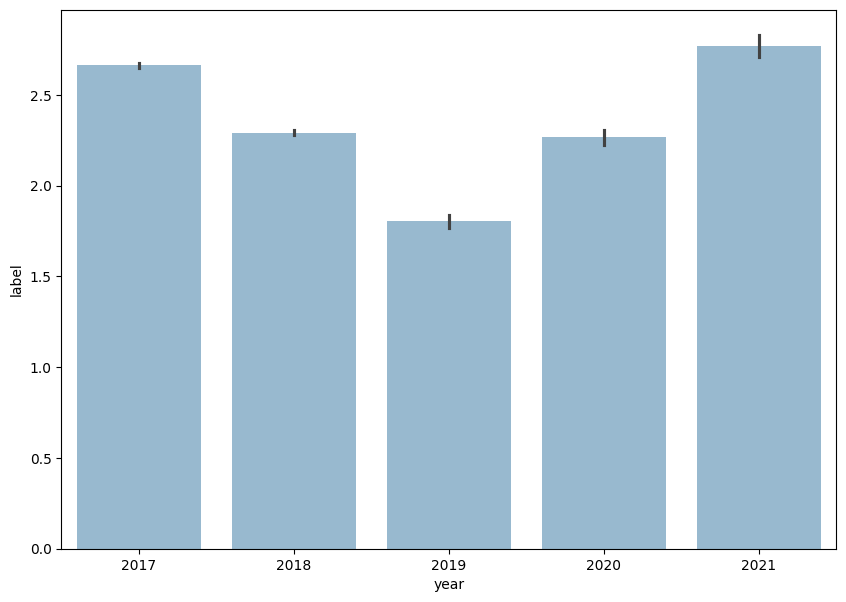

--------------------------------------------------
col: fw_end


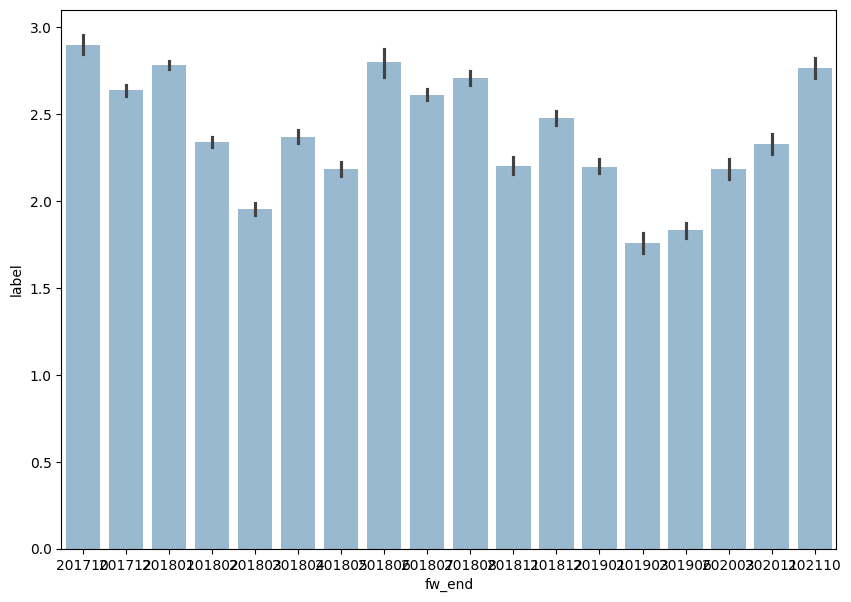

--------------------------------------------------
col: country


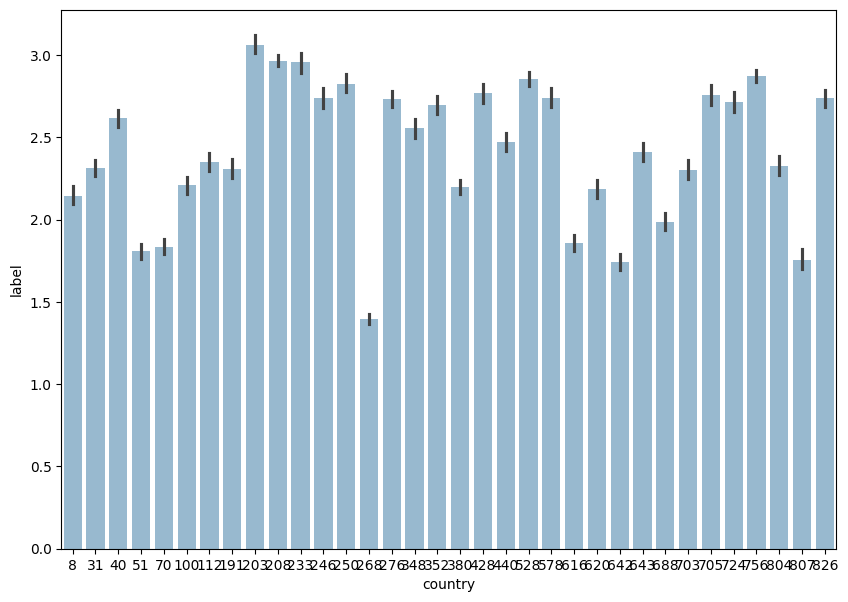

--------------------------------------------------
col: v1


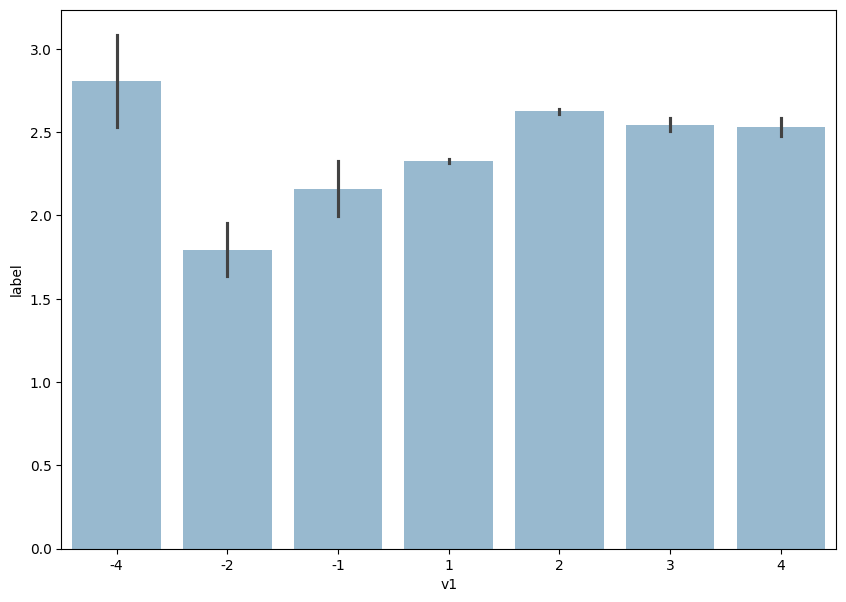

--------------------------------------------------
col: v2


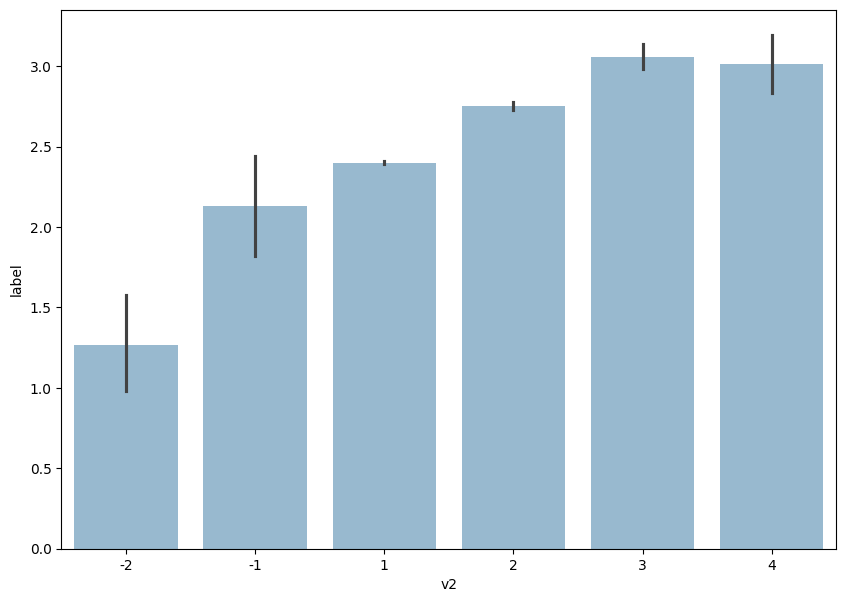

--------------------------------------------------
col: v3


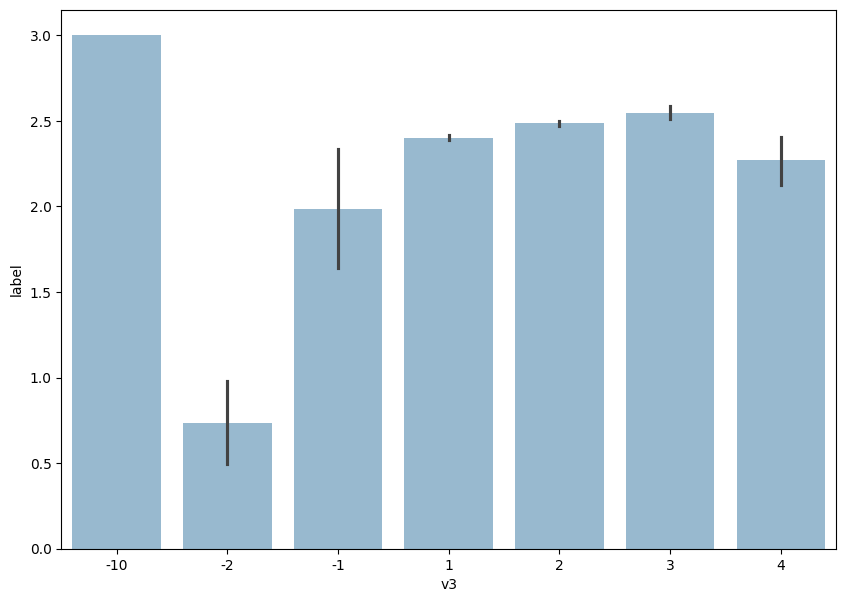

--------------------------------------------------
col: v4


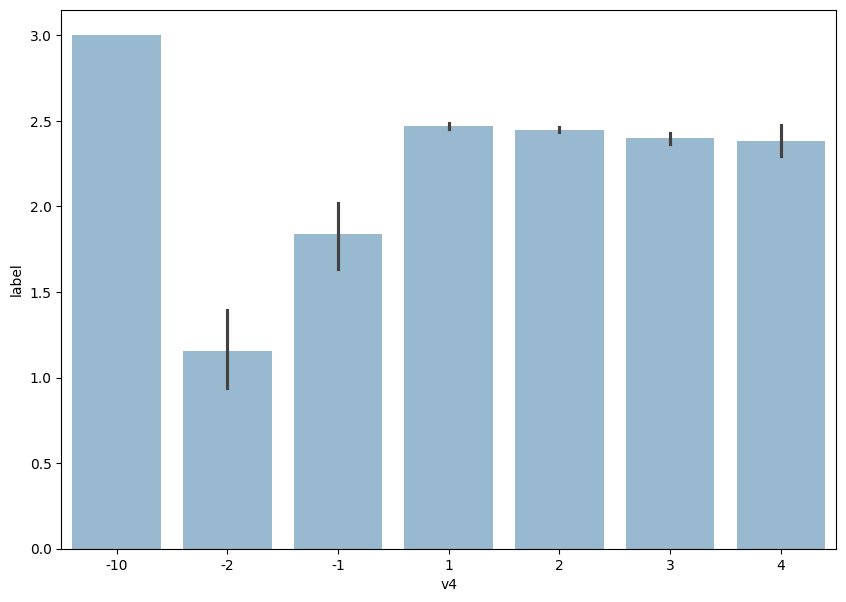

--------------------------------------------------
col: v5


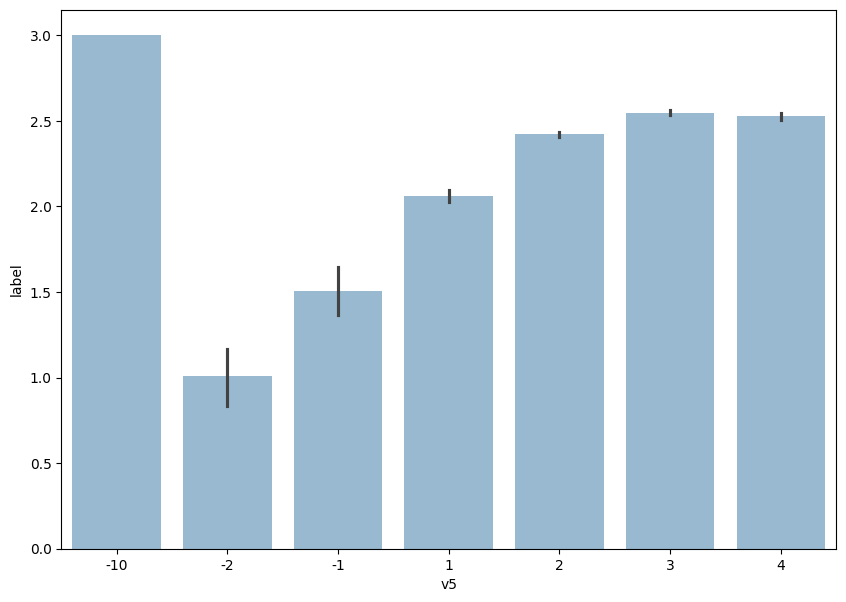

--------------------------------------------------
col: v7


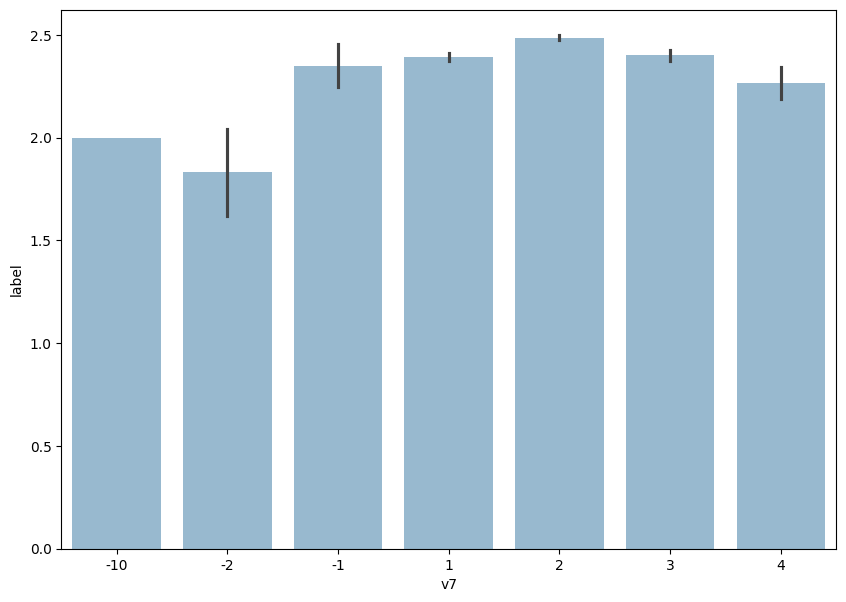

--------------------------------------------------
col: v8


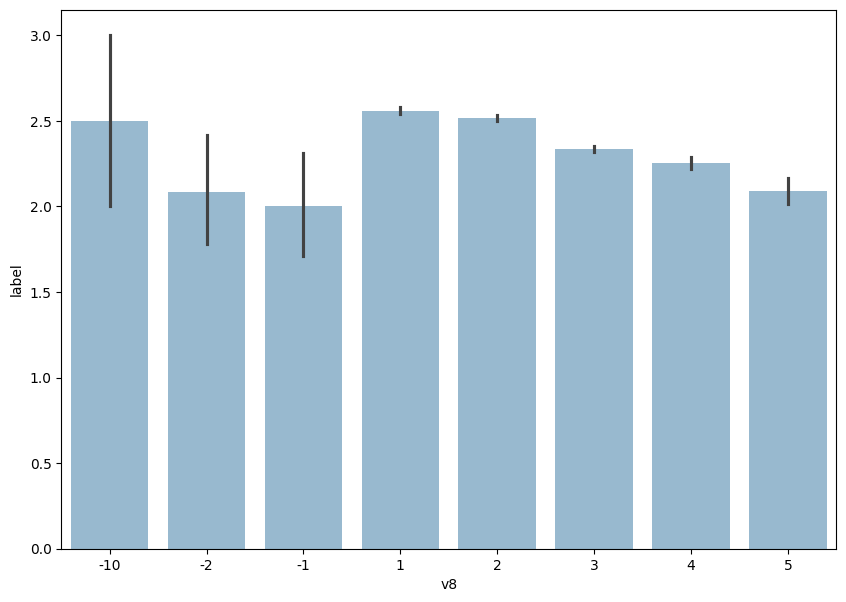

--------------------------------------------------
col: v9


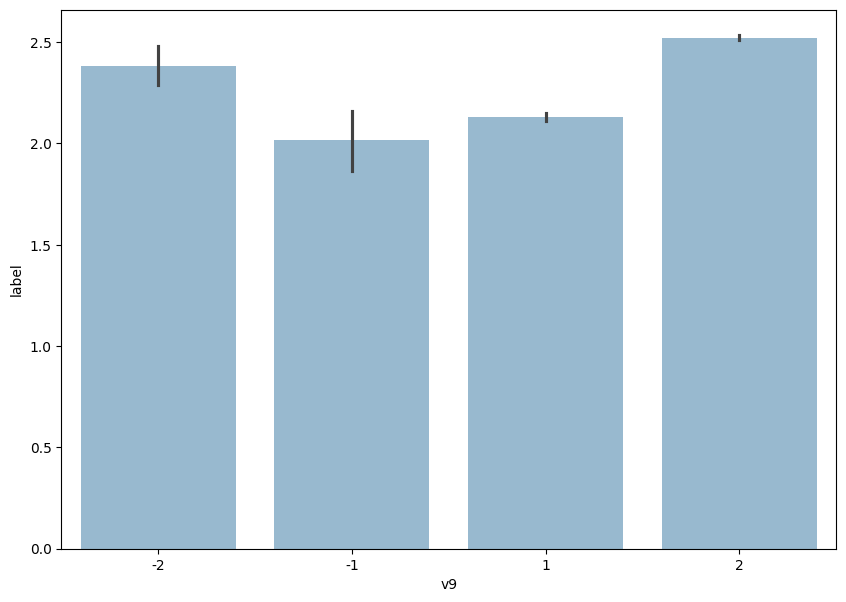

--------------------------------------------------
col: v10


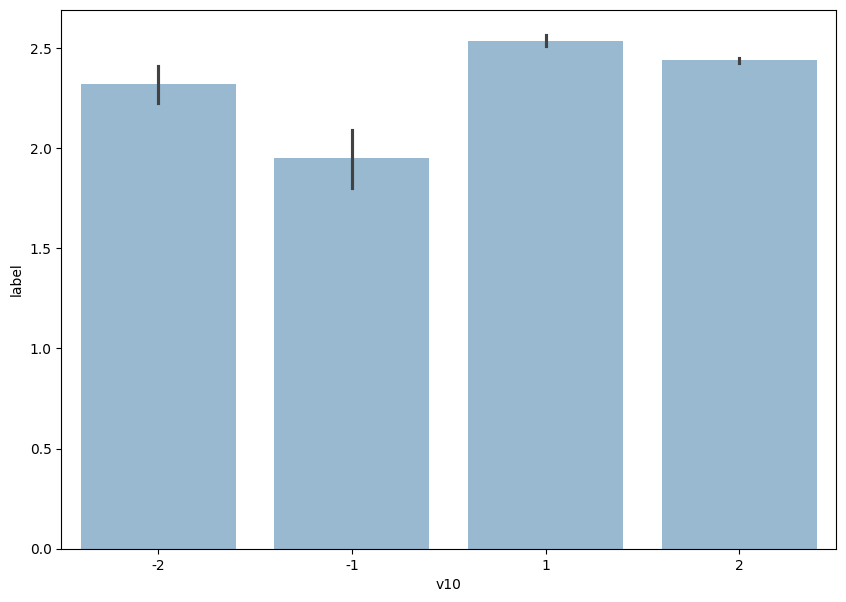

--------------------------------------------------
col: v11


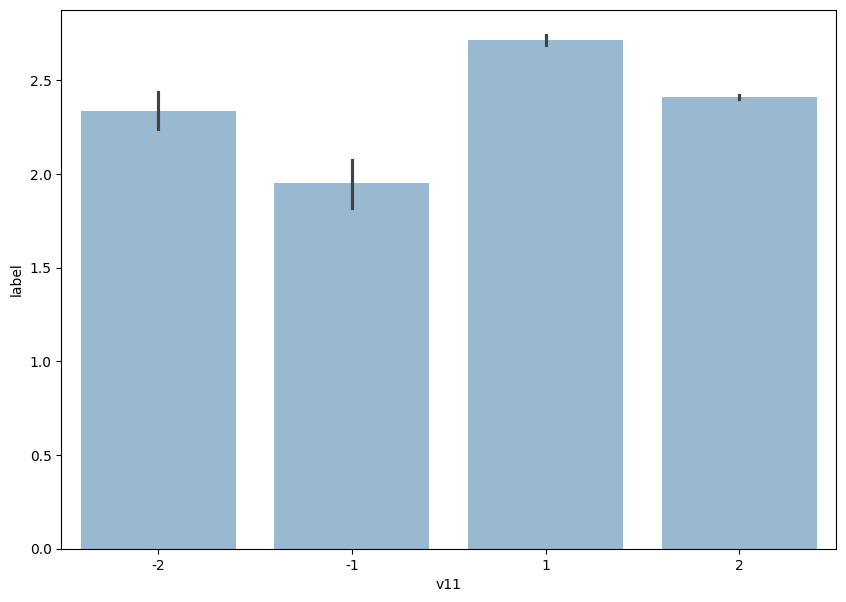

--------------------------------------------------
col: v12


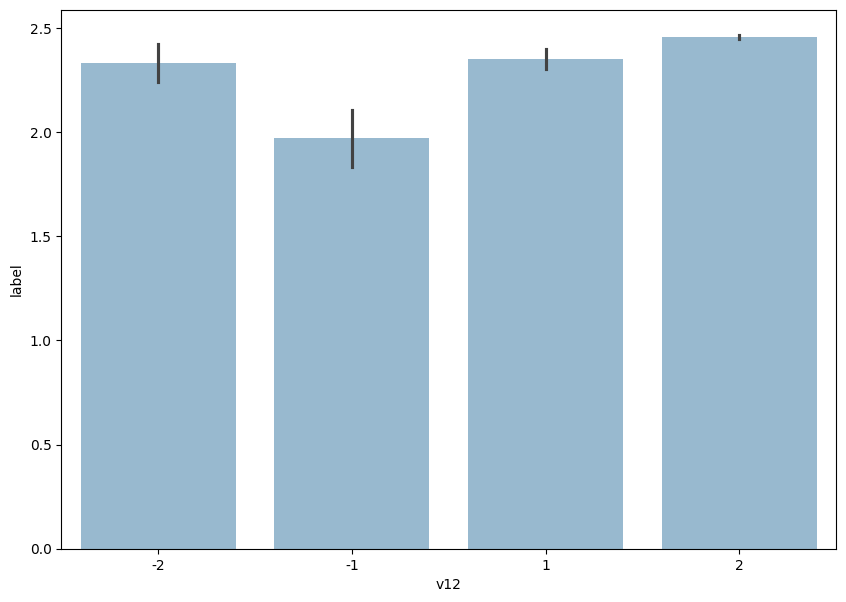

--------------------------------------------------
col: v13


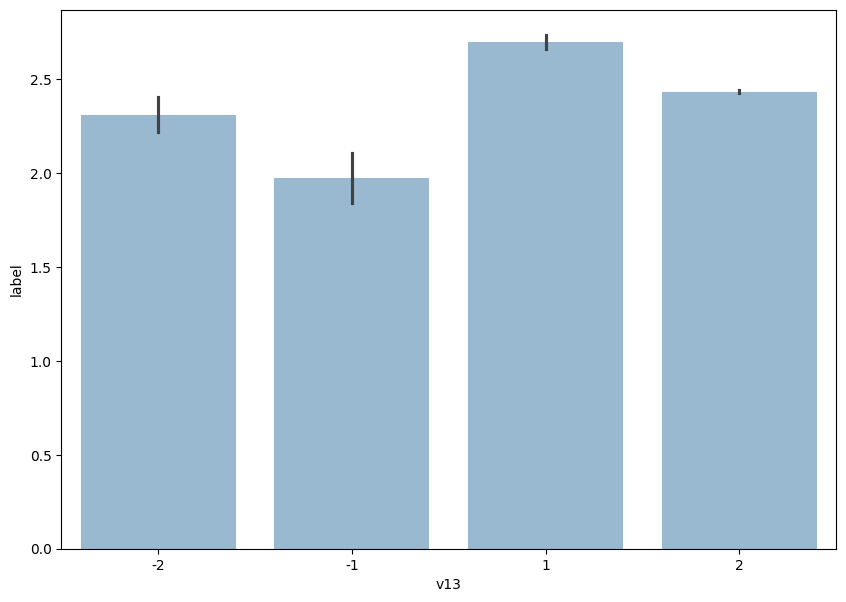

--------------------------------------------------
col: v14


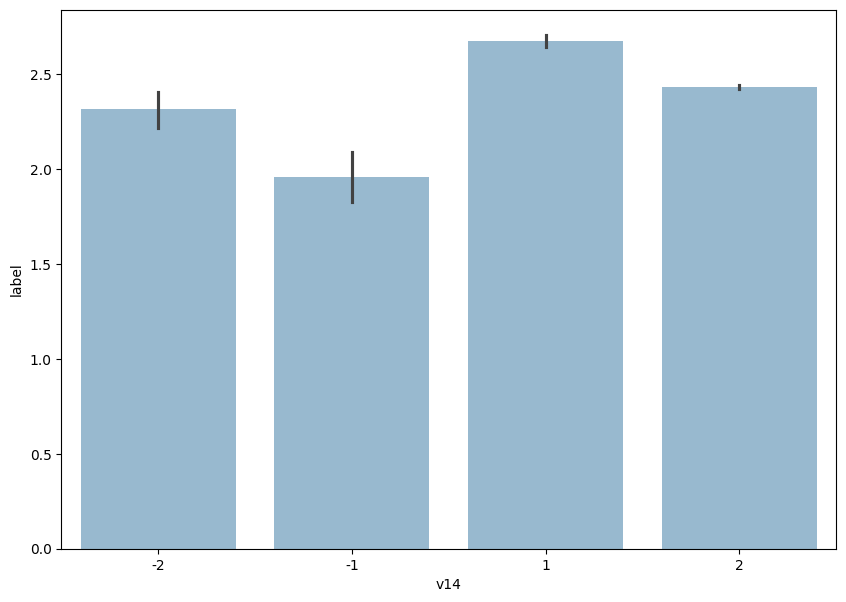

--------------------------------------------------
col: v15


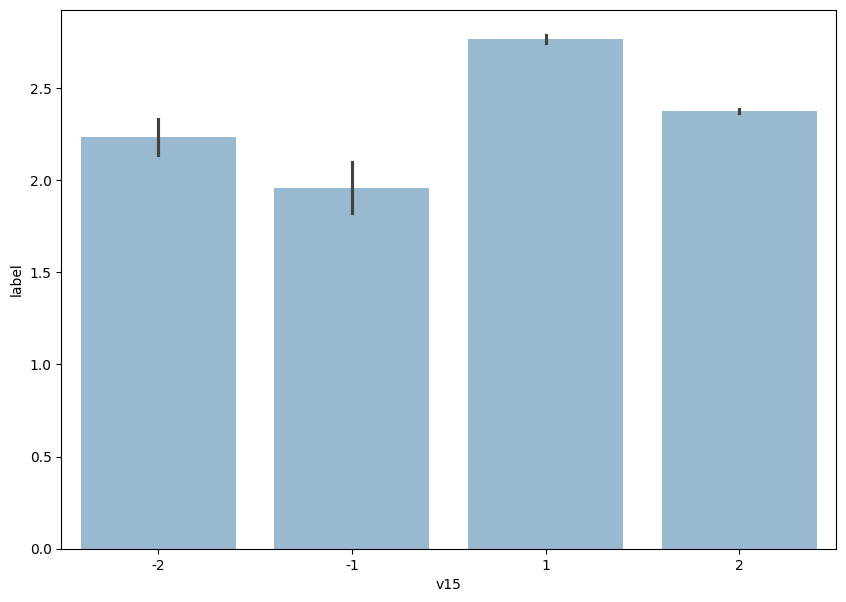

--------------------------------------------------
col: v16


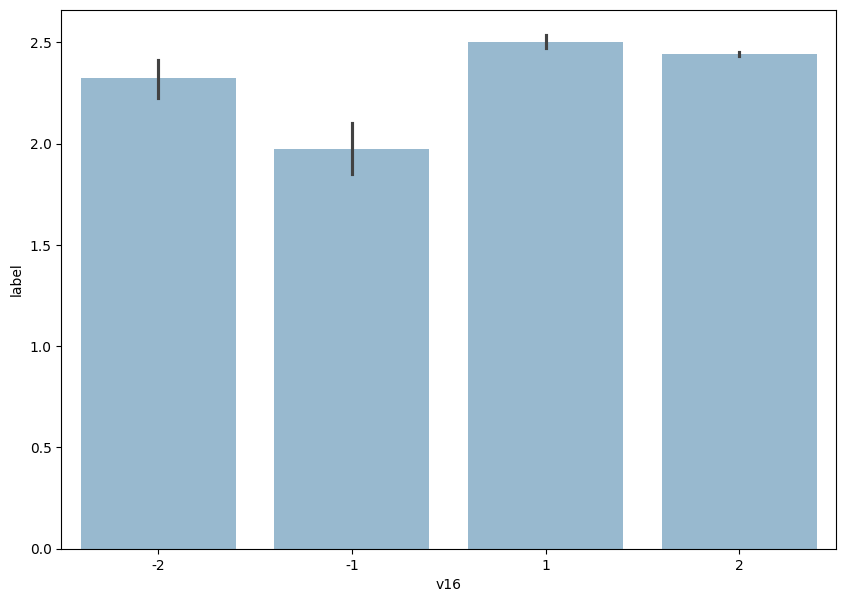

--------------------------------------------------
col: v17


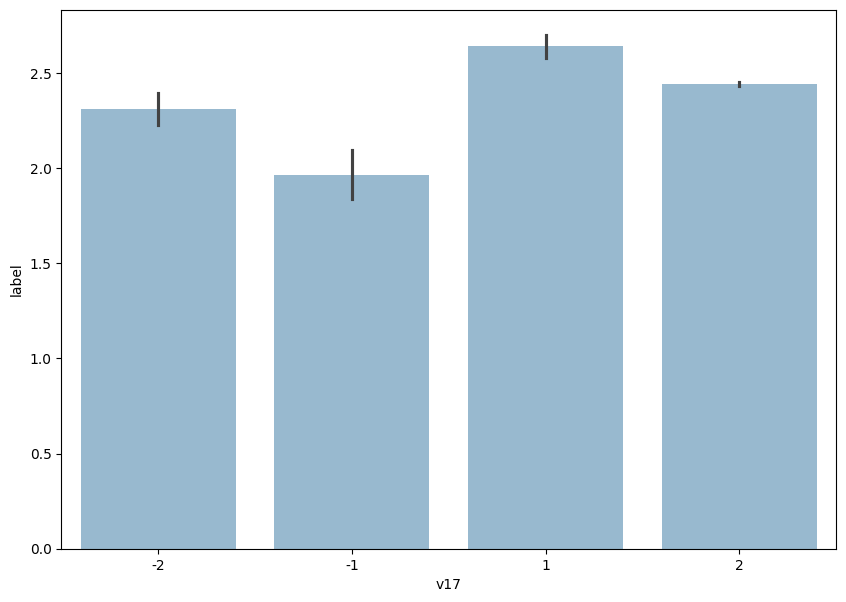

--------------------------------------------------
col: v18


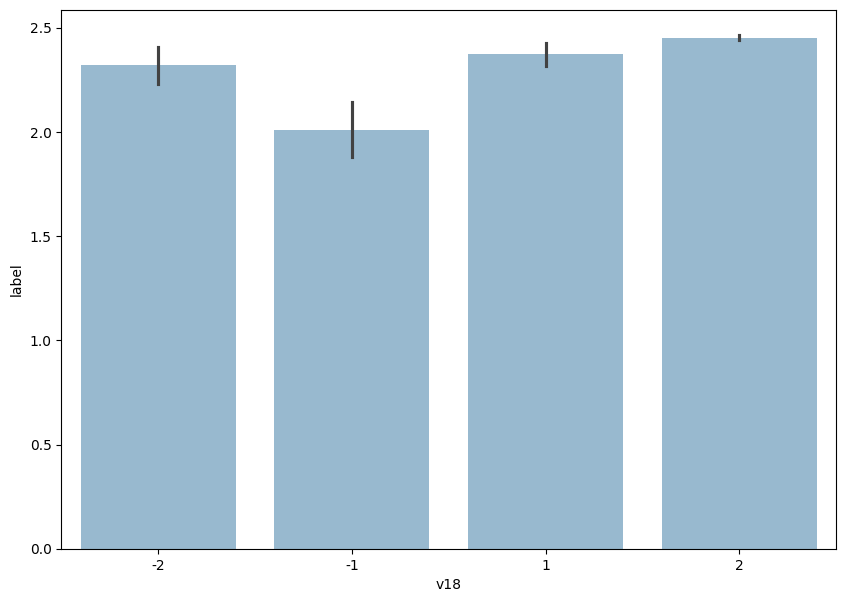

--------------------------------------------------
col: v19


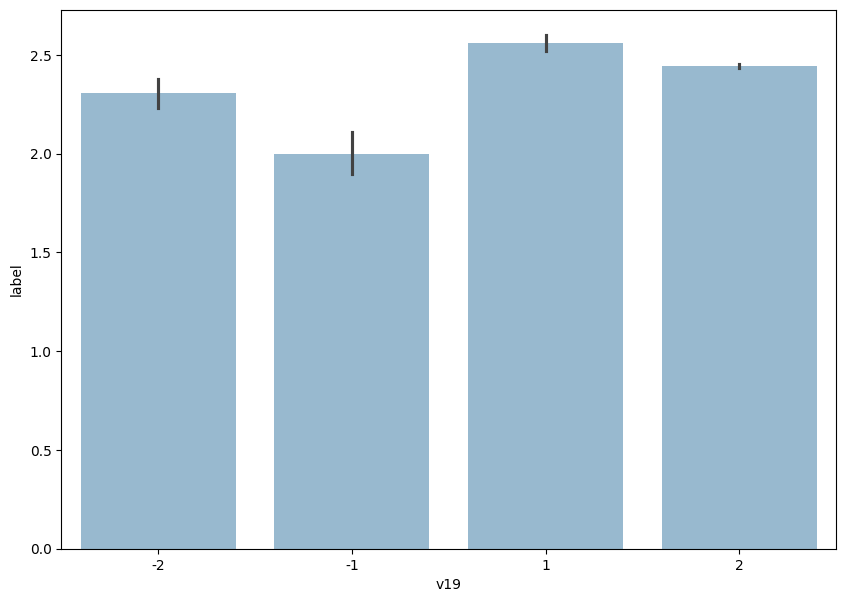

--------------------------------------------------
col: f20


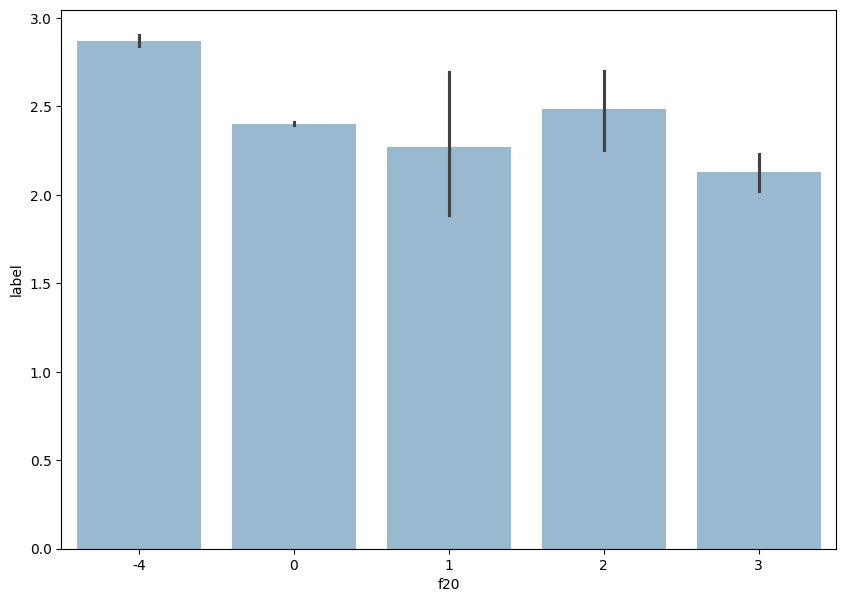

--------------------------------------------------
col: v20


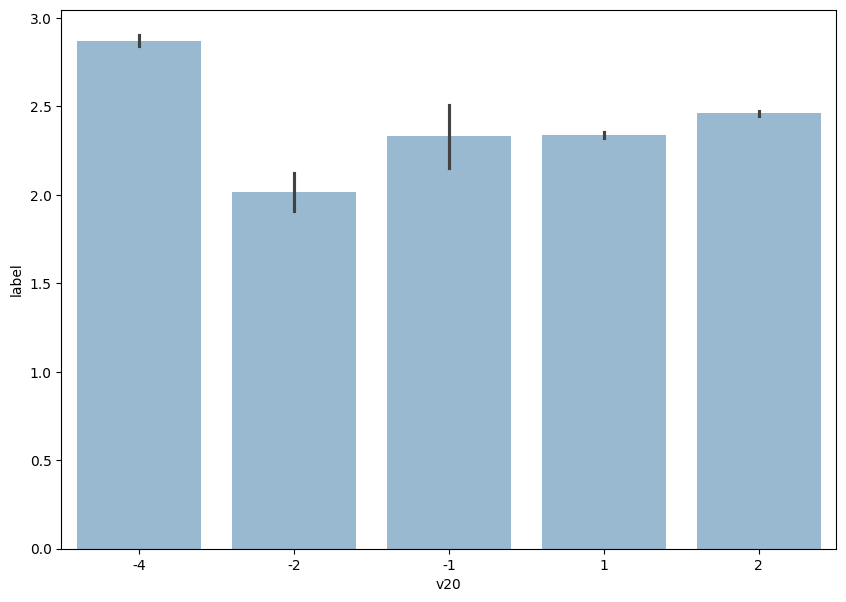

--------------------------------------------------
col: v20b


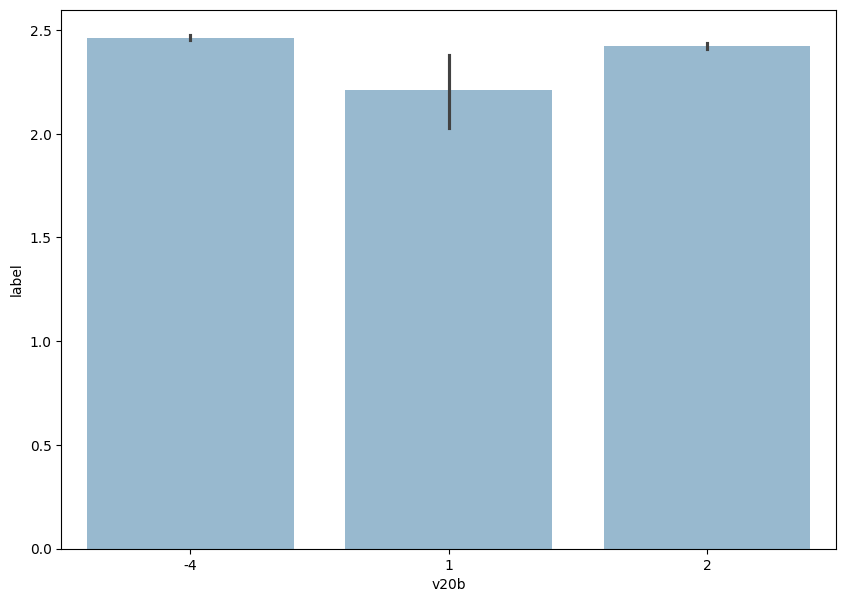

--------------------------------------------------
col: v21


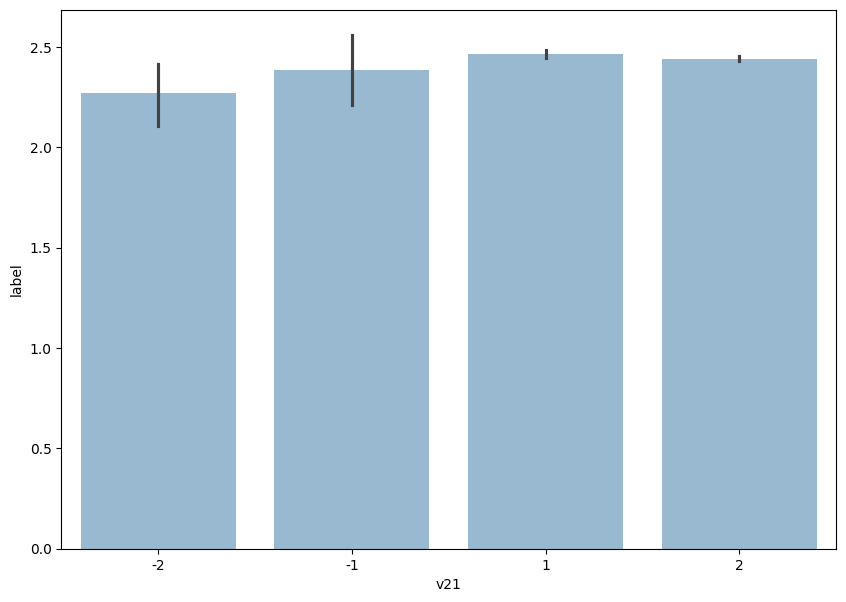

--------------------------------------------------
col: v22


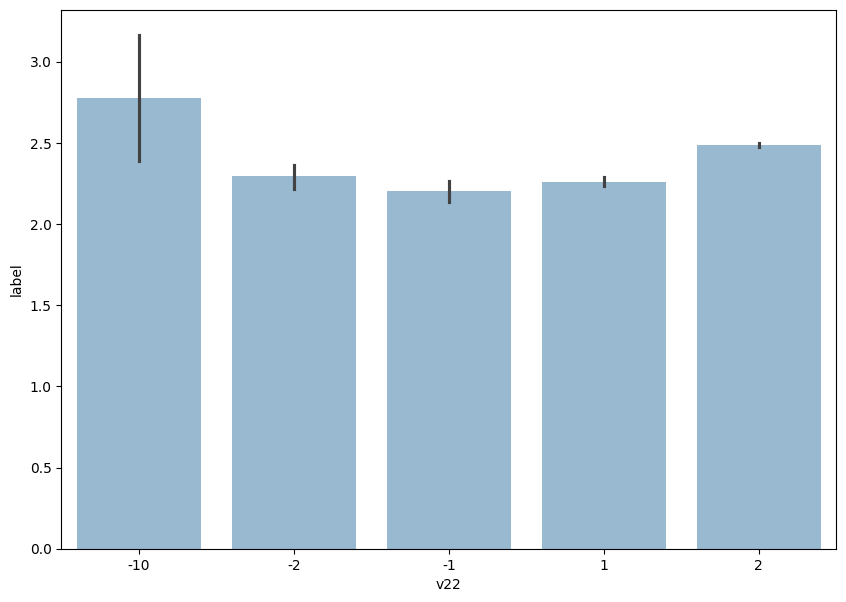

--------------------------------------------------
col: v23


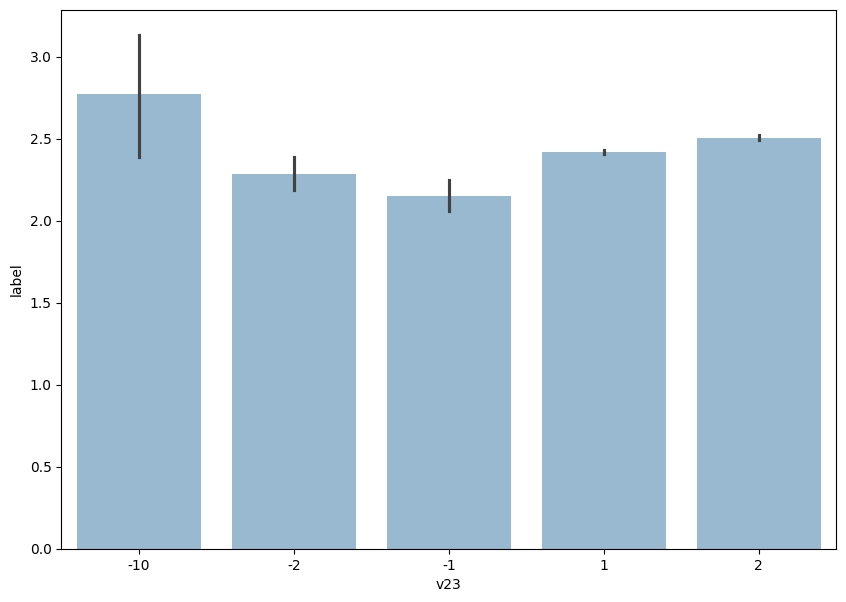

--------------------------------------------------
col: v24


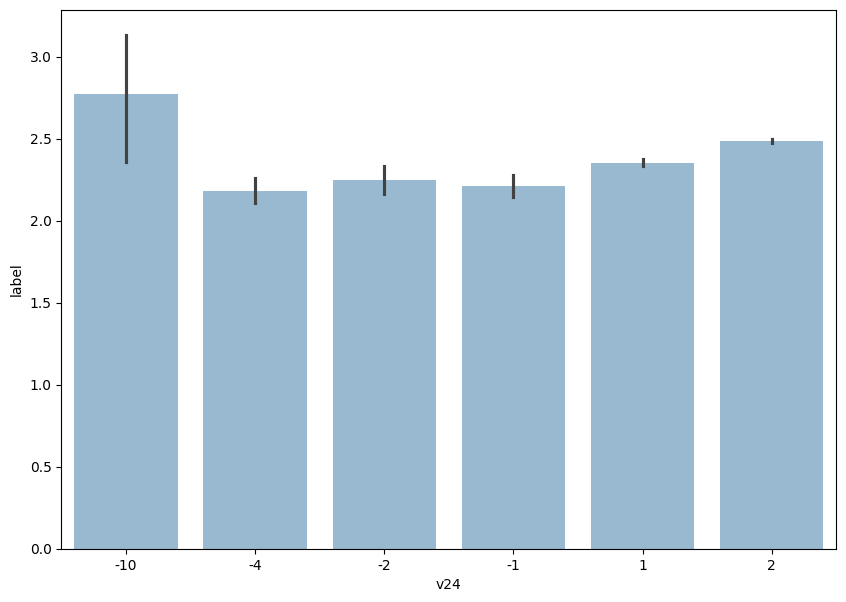

--------------------------------------------------
col: f24_IT


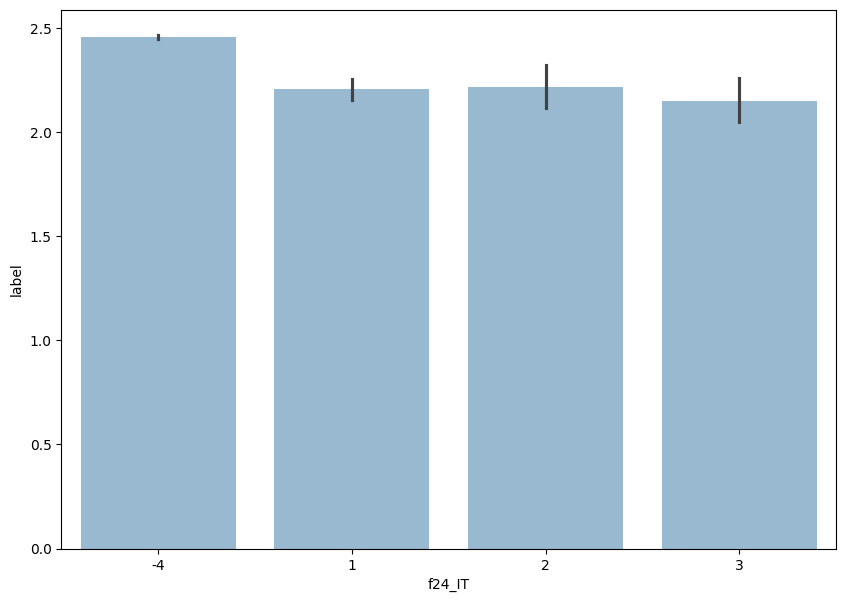

--------------------------------------------------
col: v24a_IT


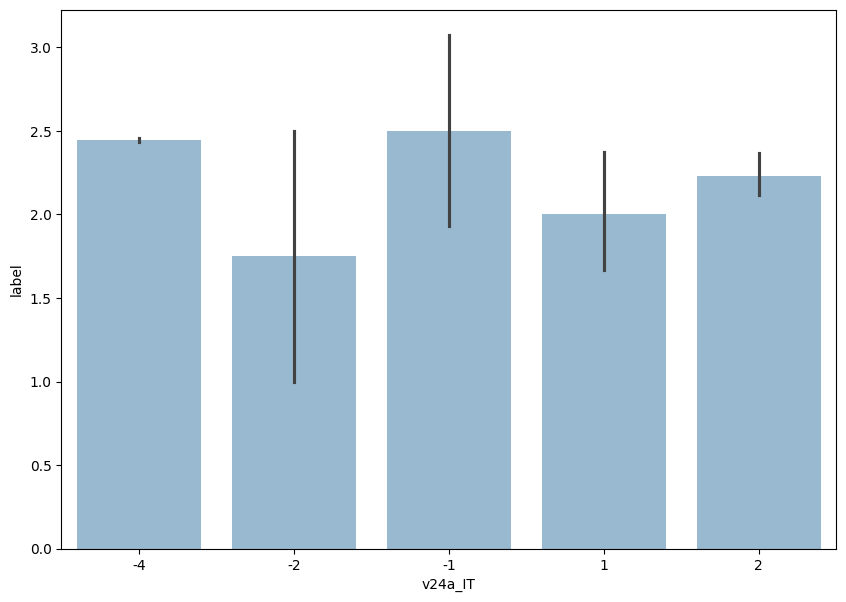

--------------------------------------------------
col: v24b_IT


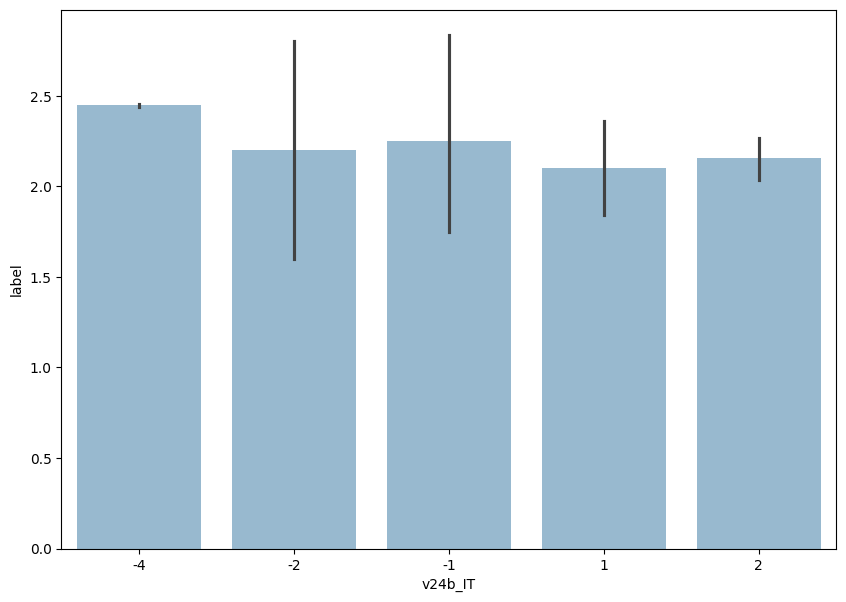

--------------------------------------------------
col: v25


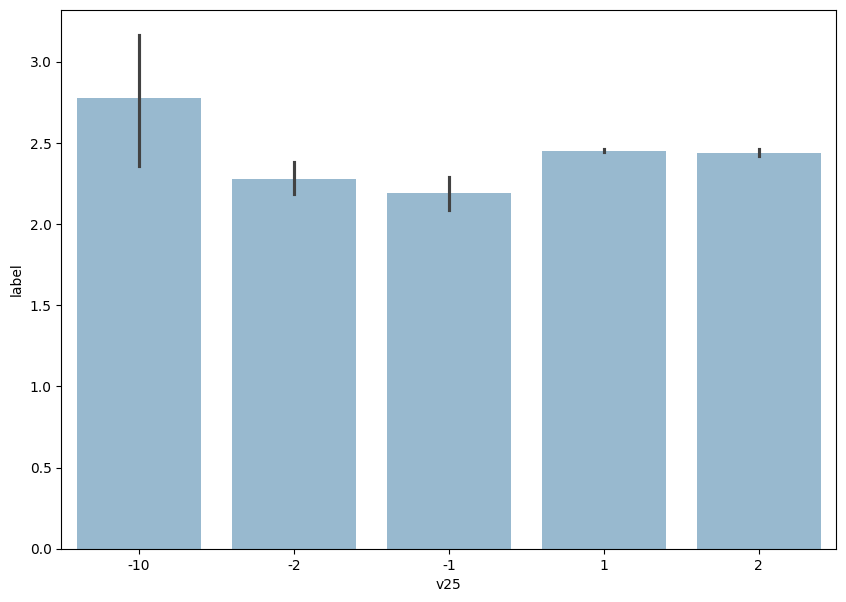

--------------------------------------------------
col: v26


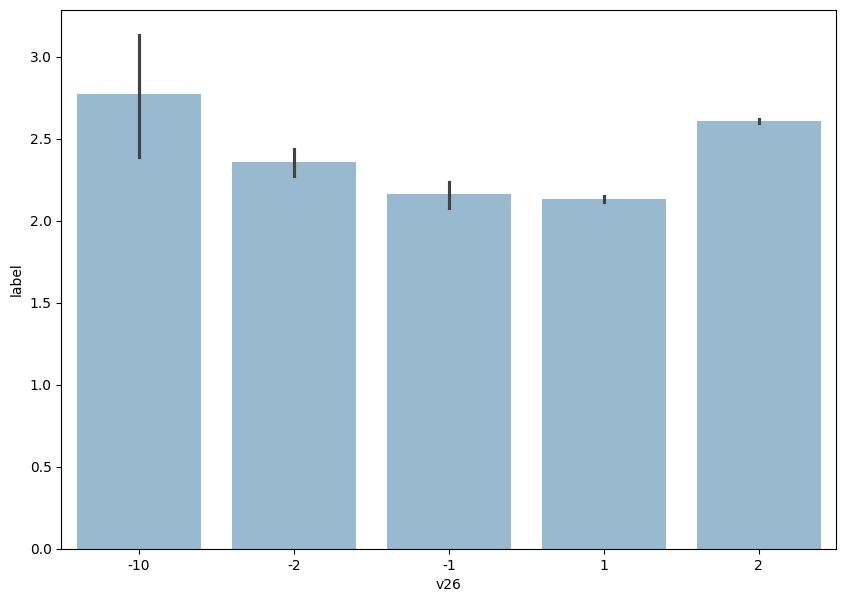

--------------------------------------------------
col: v27


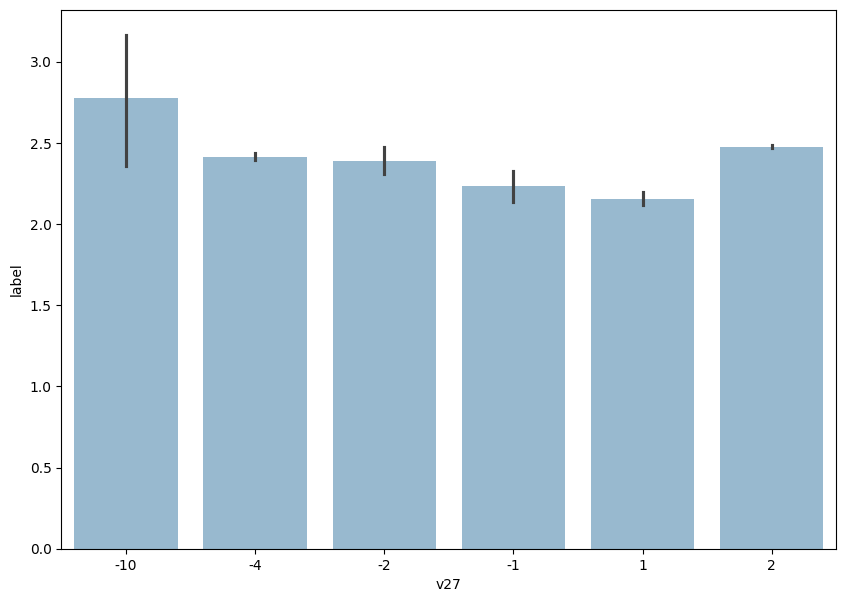

--------------------------------------------------
col: v28


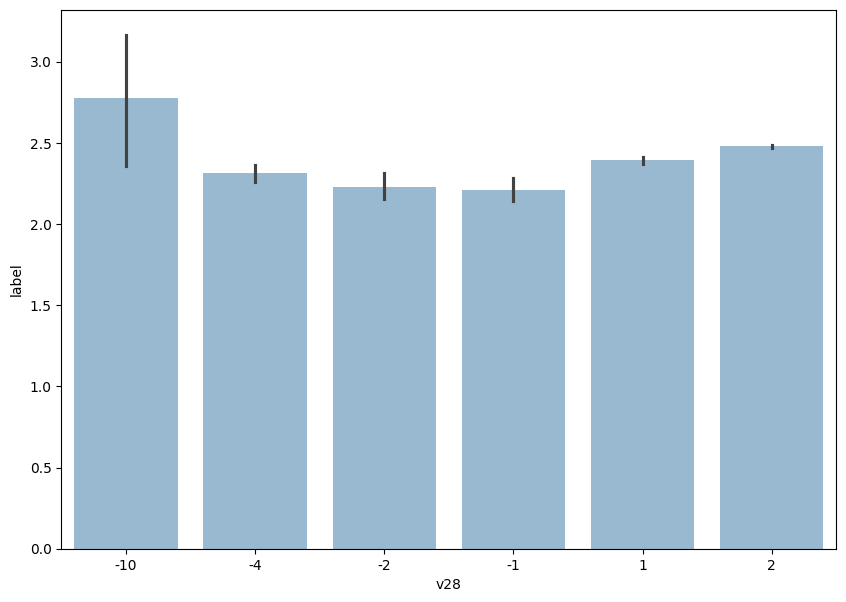

--------------------------------------------------
col: v29


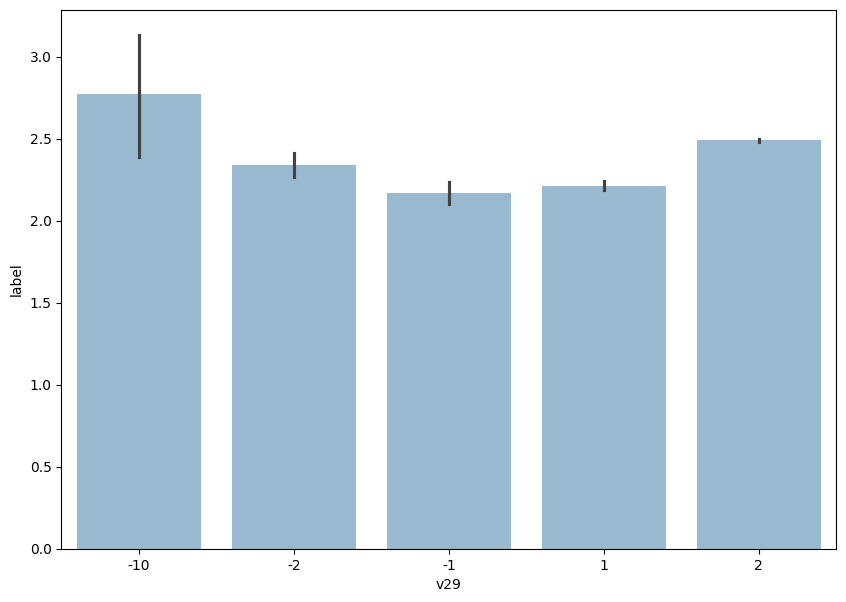

--------------------------------------------------
col: v30


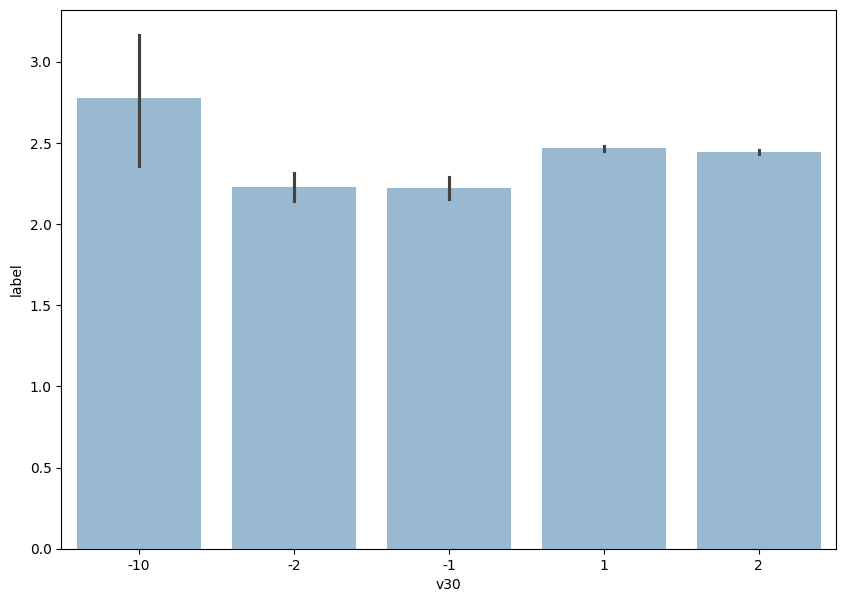

--------------------------------------------------
col: f30a


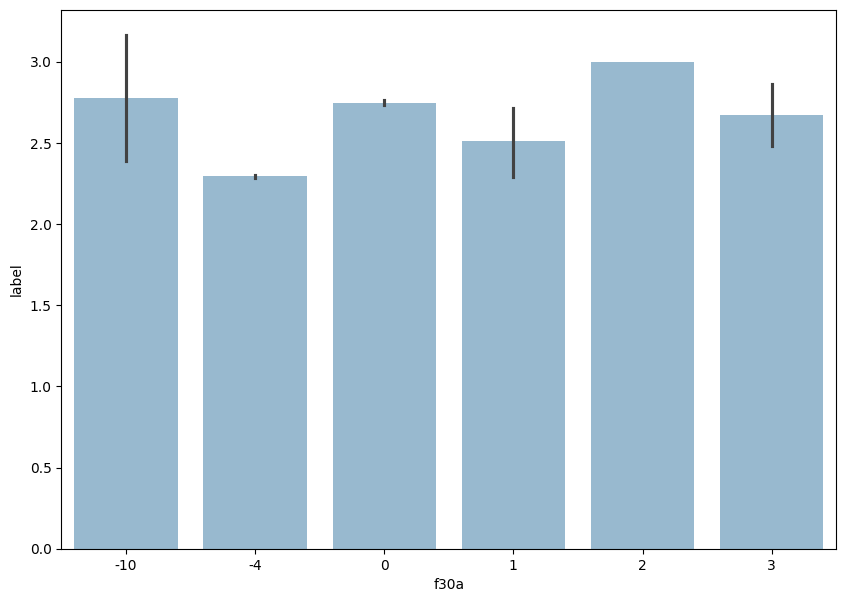

--------------------------------------------------
col: v30a


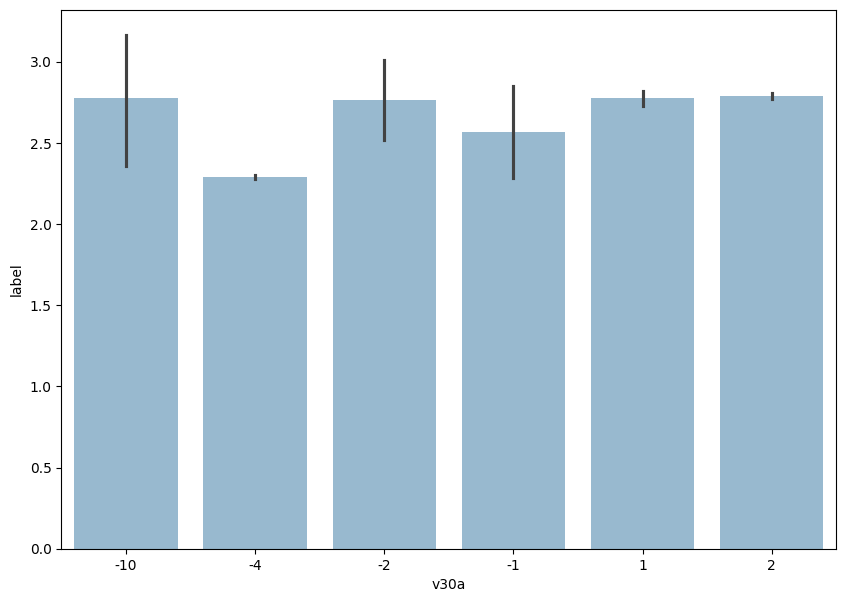

--------------------------------------------------
col: v30c


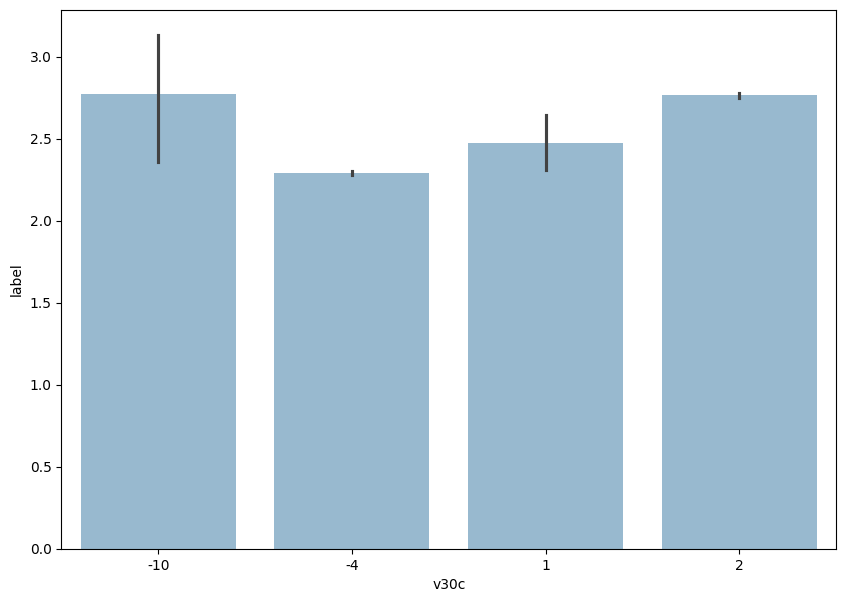

--------------------------------------------------
col: v31


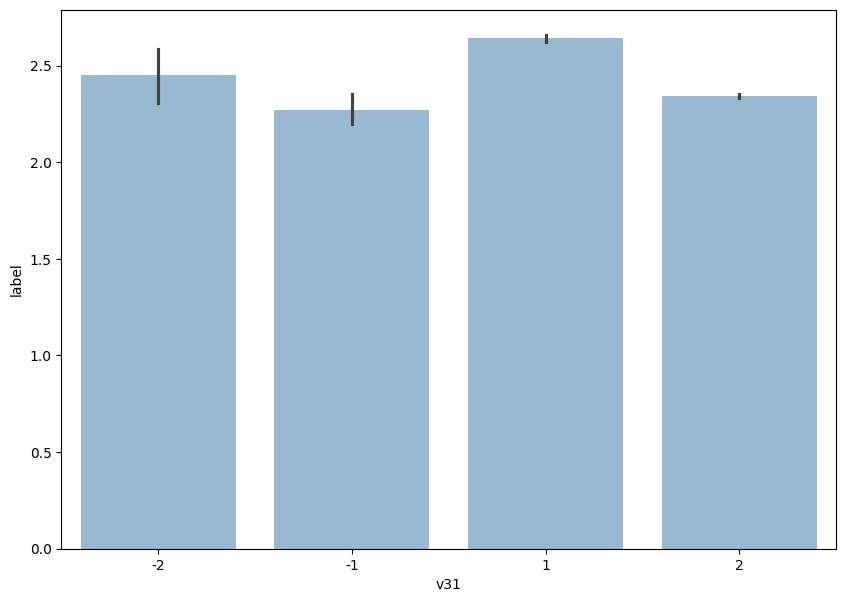

--------------------------------------------------
col: v32


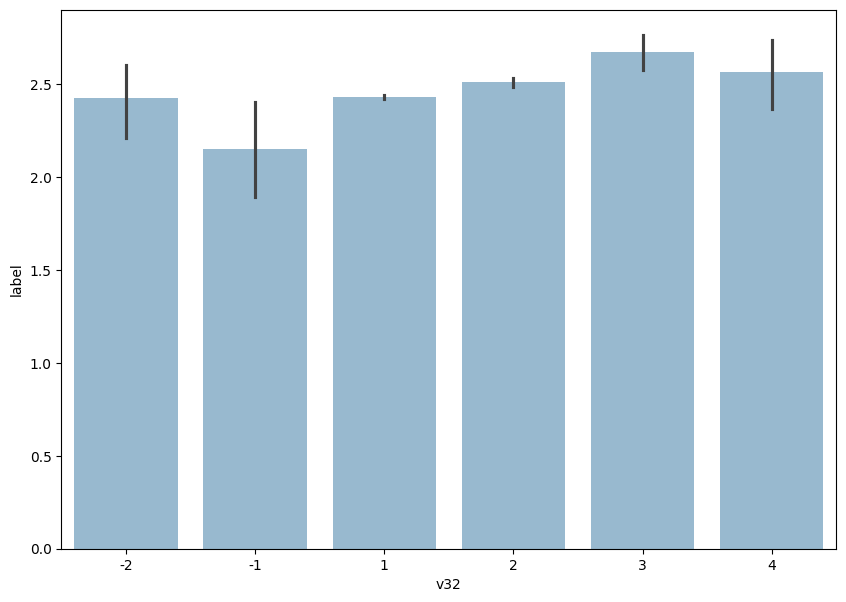

--------------------------------------------------
col: v33


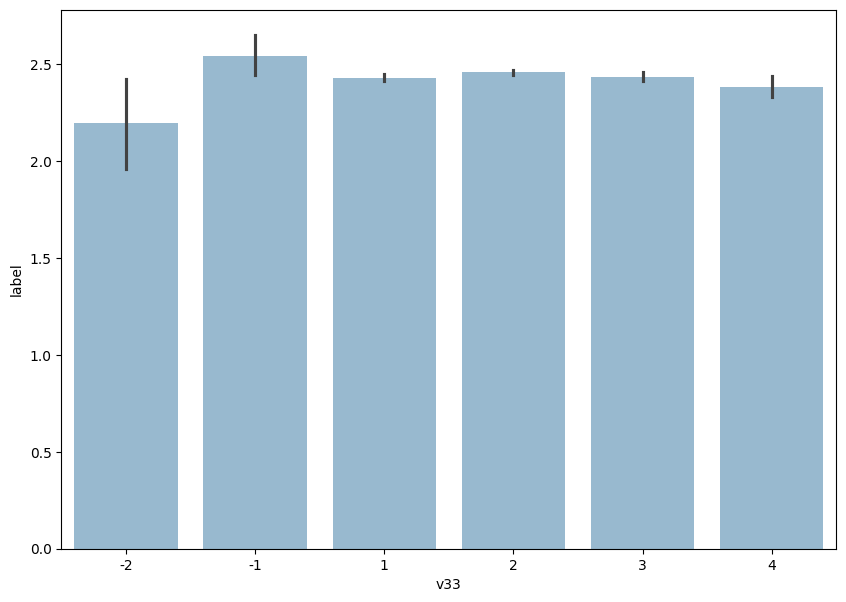

--------------------------------------------------
col: v34


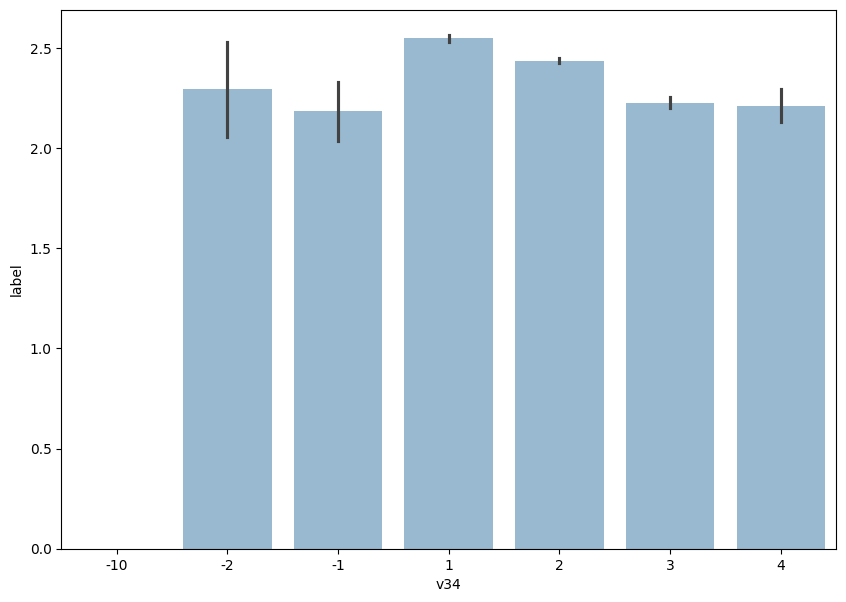

--------------------------------------------------
col: v35


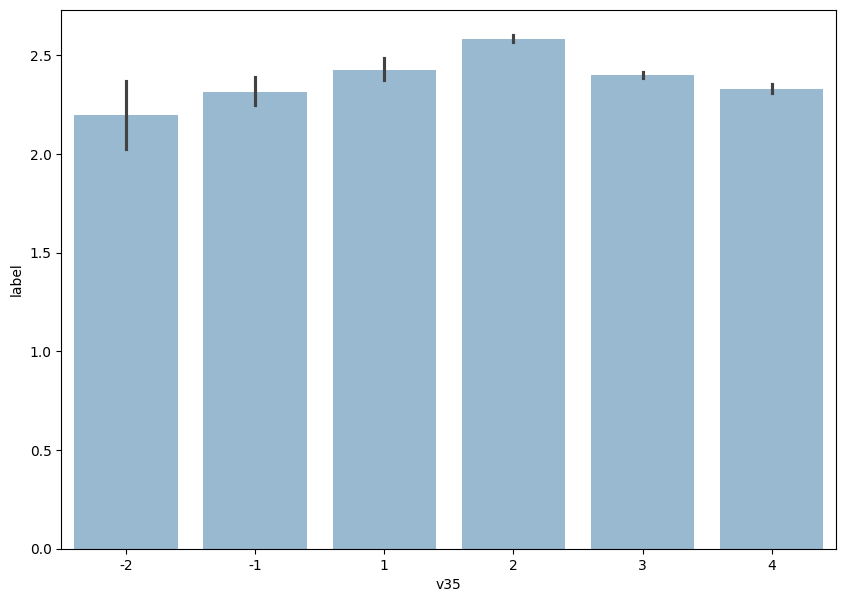

--------------------------------------------------
col: v36


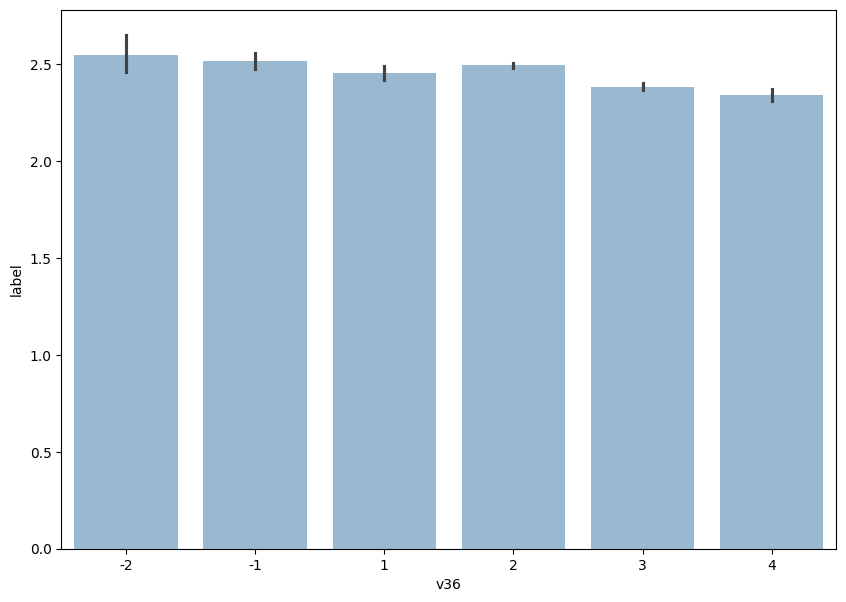

--------------------------------------------------
col: v37


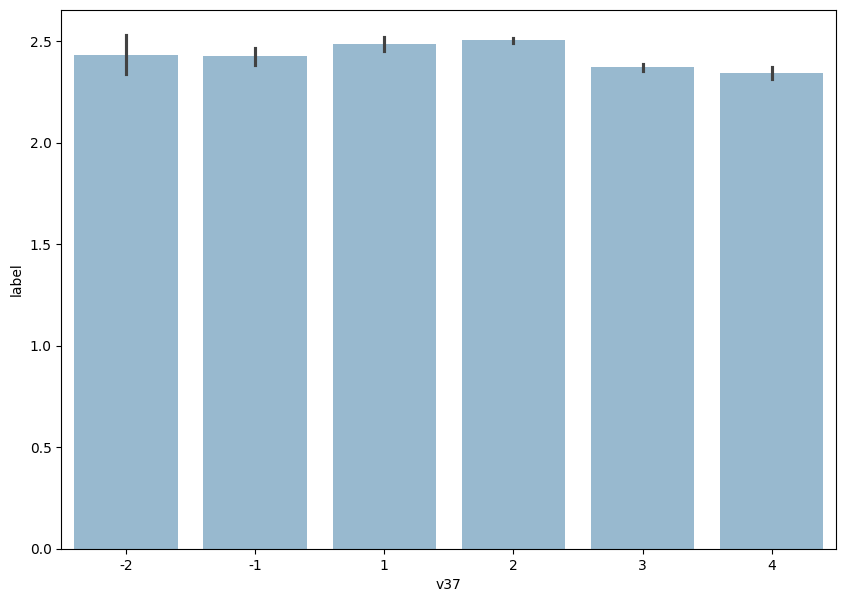

--------------------------------------------------
col: v38


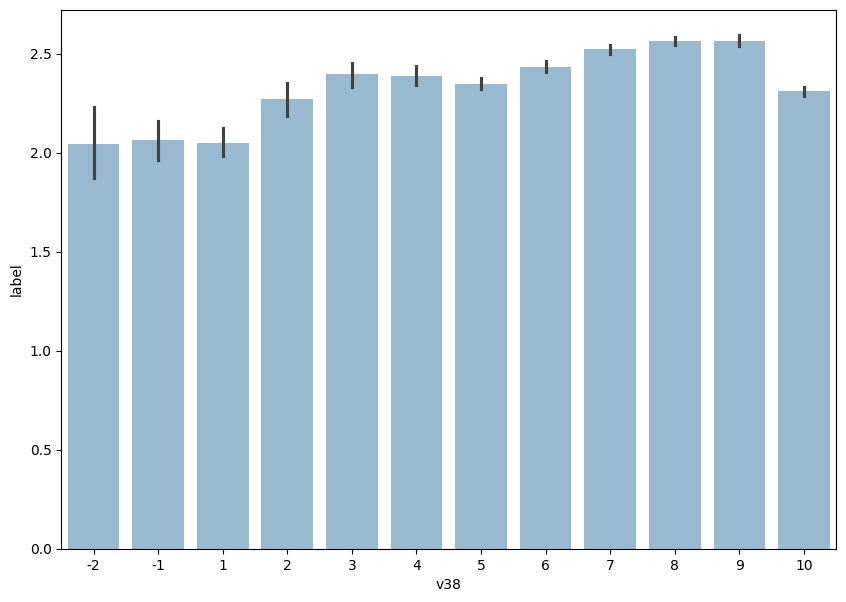

--------------------------------------------------
col: v39


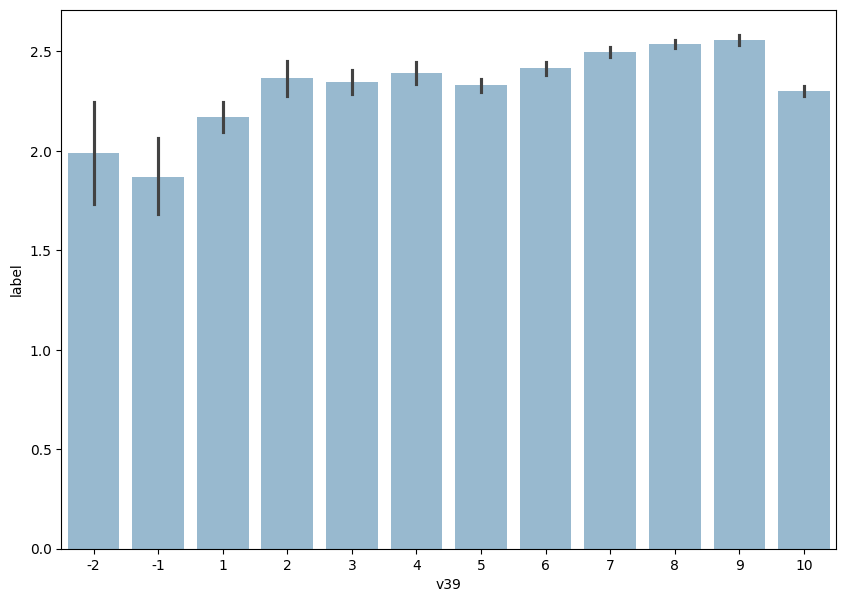

--------------------------------------------------
col: v40


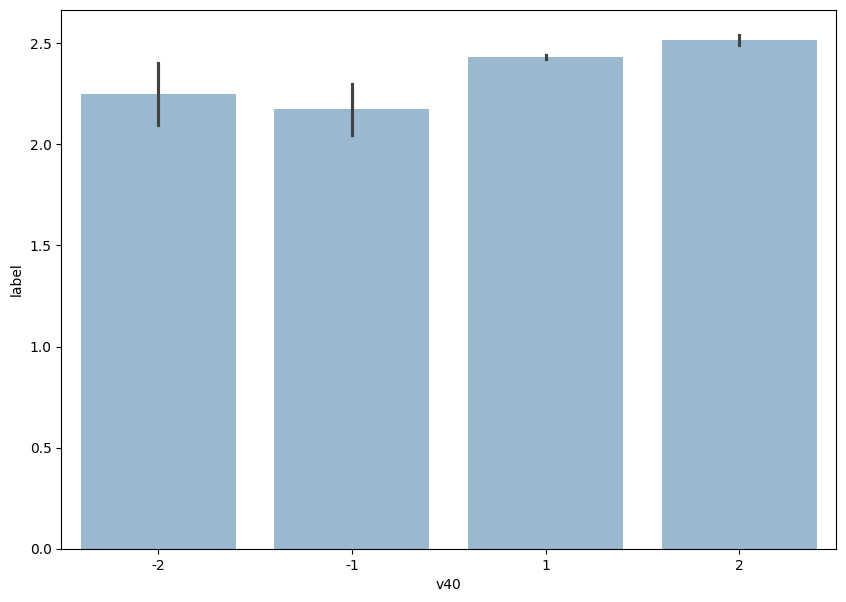

--------------------------------------------------
col: v41


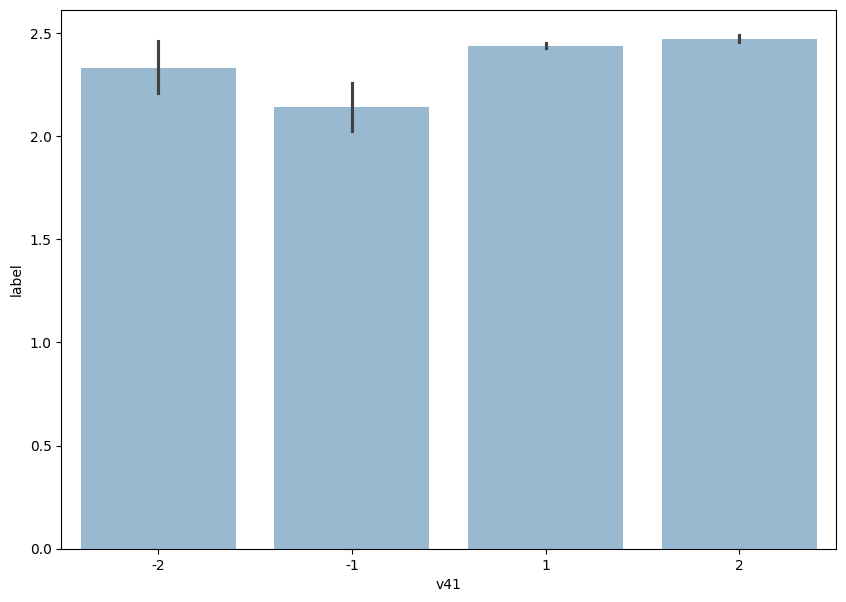

--------------------------------------------------
col: v42


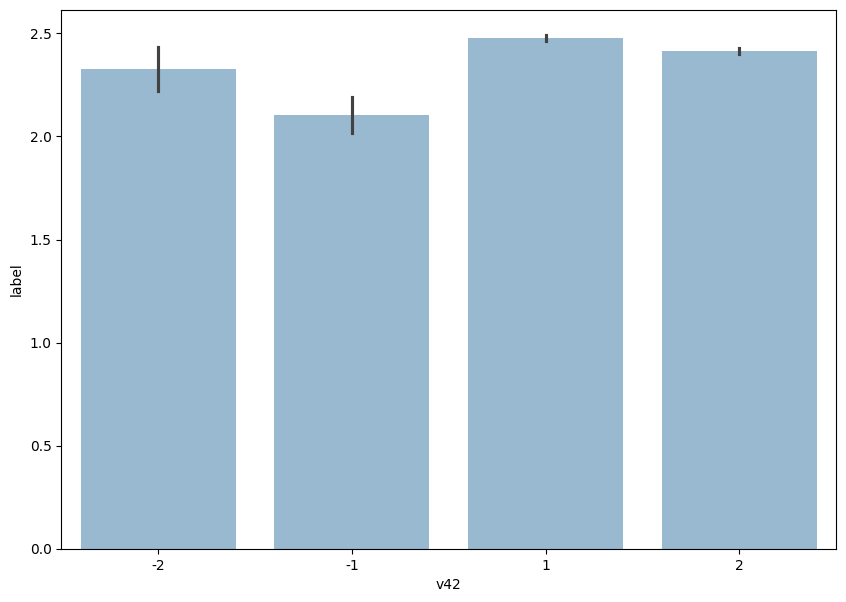

--------------------------------------------------
col: v43


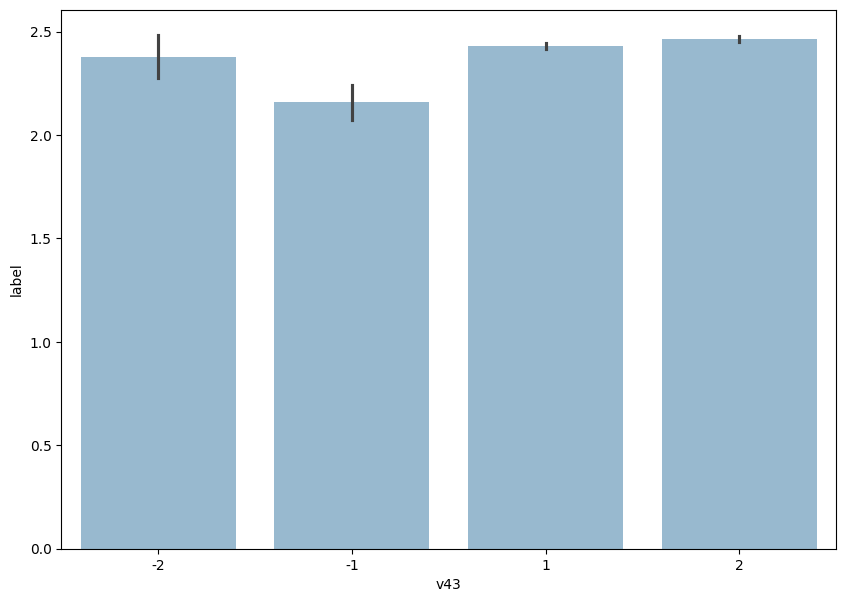

--------------------------------------------------
col: v44


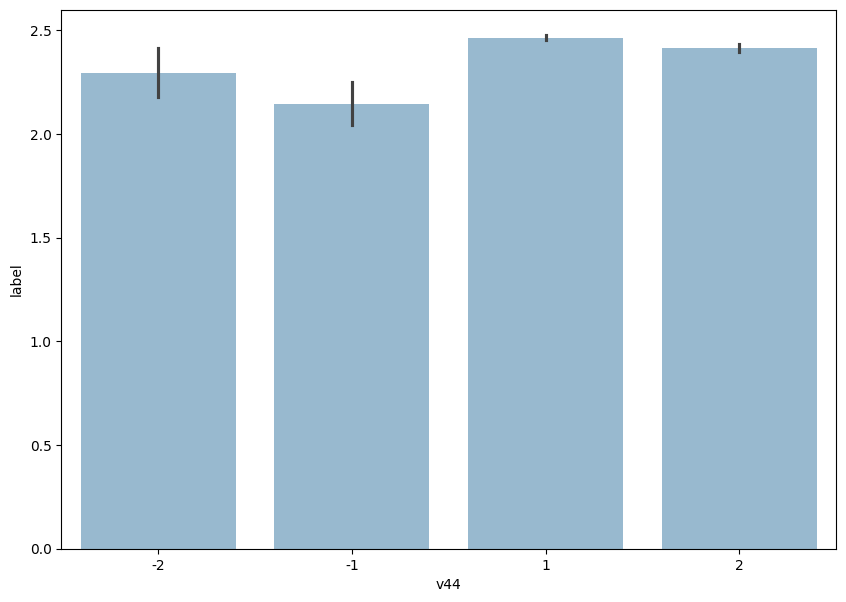

--------------------------------------------------
col: v45


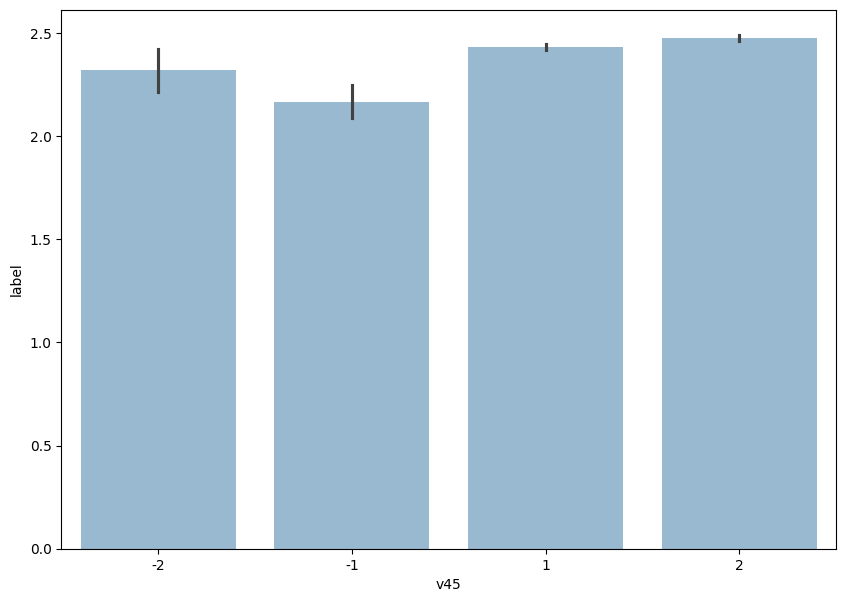

--------------------------------------------------
col: f45a


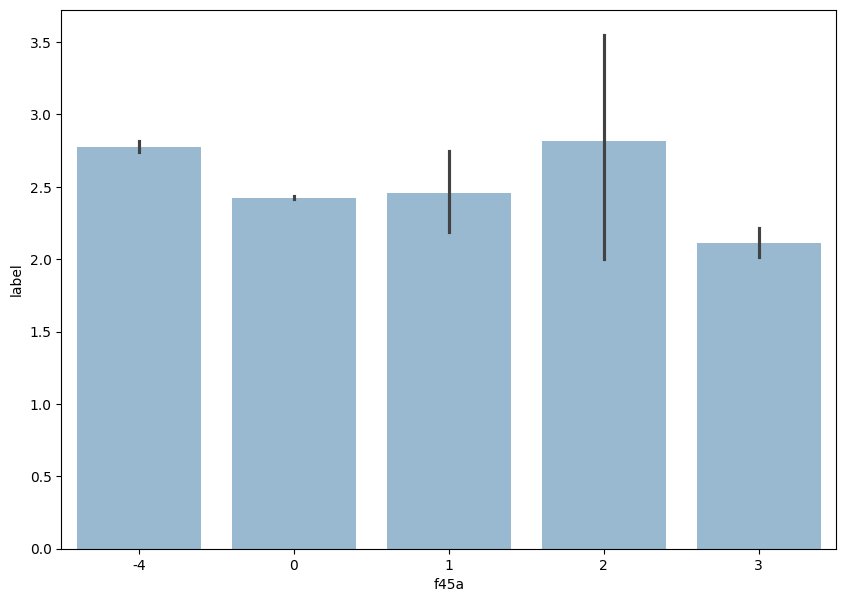

--------------------------------------------------
col: v45a


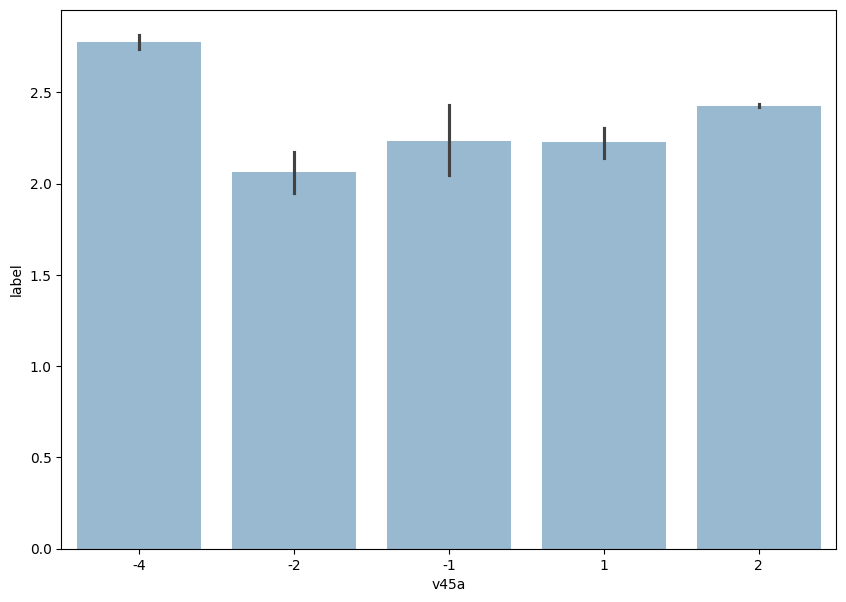

--------------------------------------------------
col: v45c


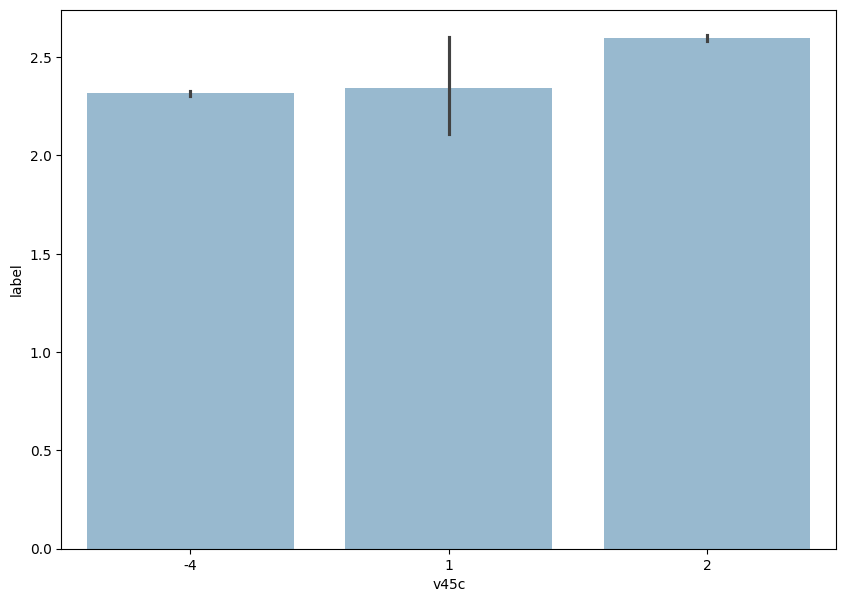

--------------------------------------------------
col: v46


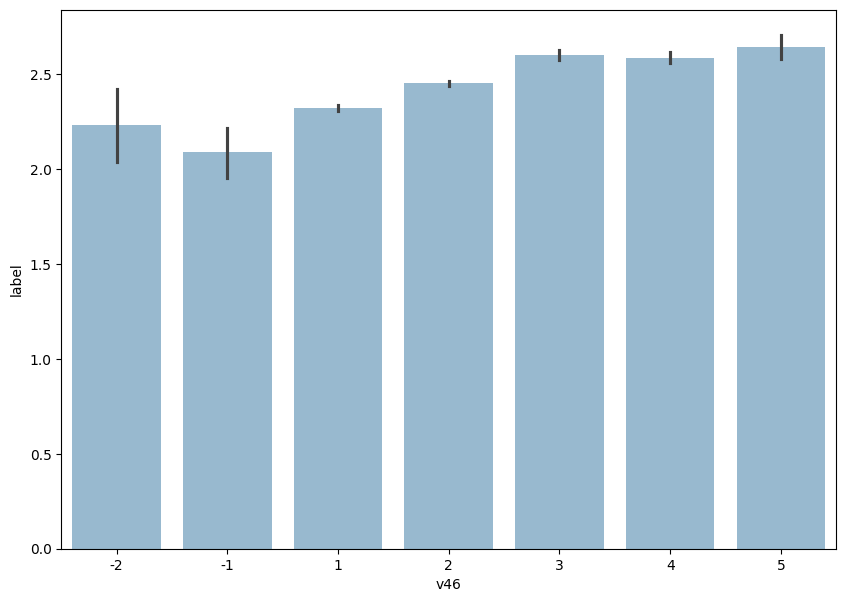

--------------------------------------------------
col: v47


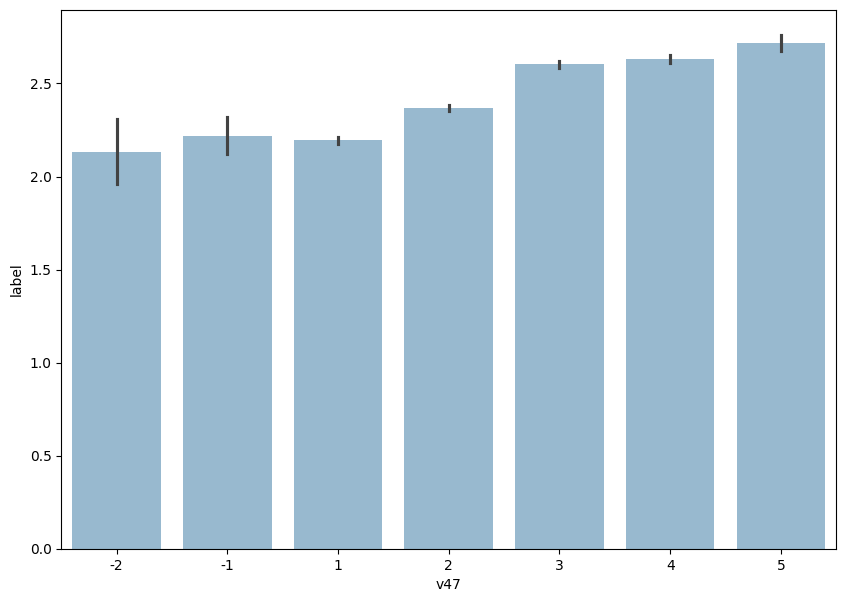

--------------------------------------------------
col: v48


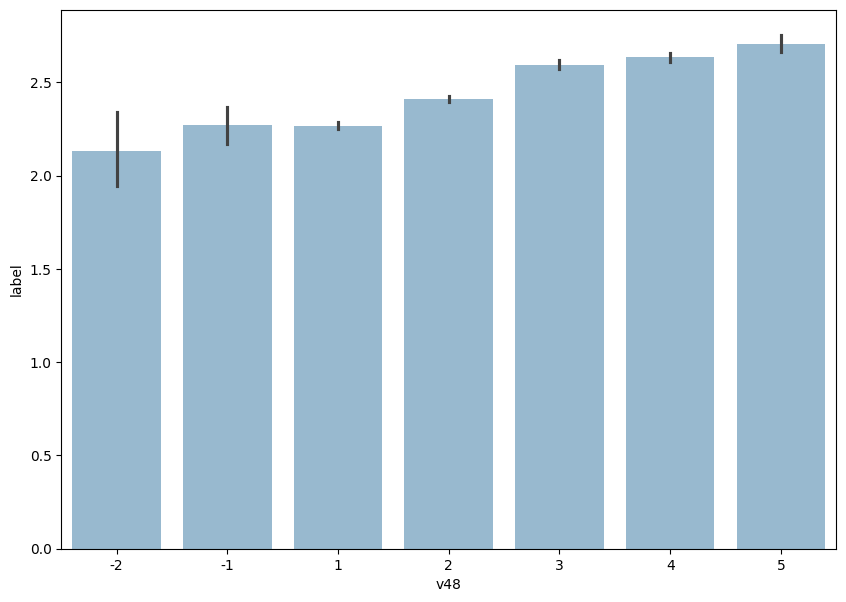

--------------------------------------------------
col: v49


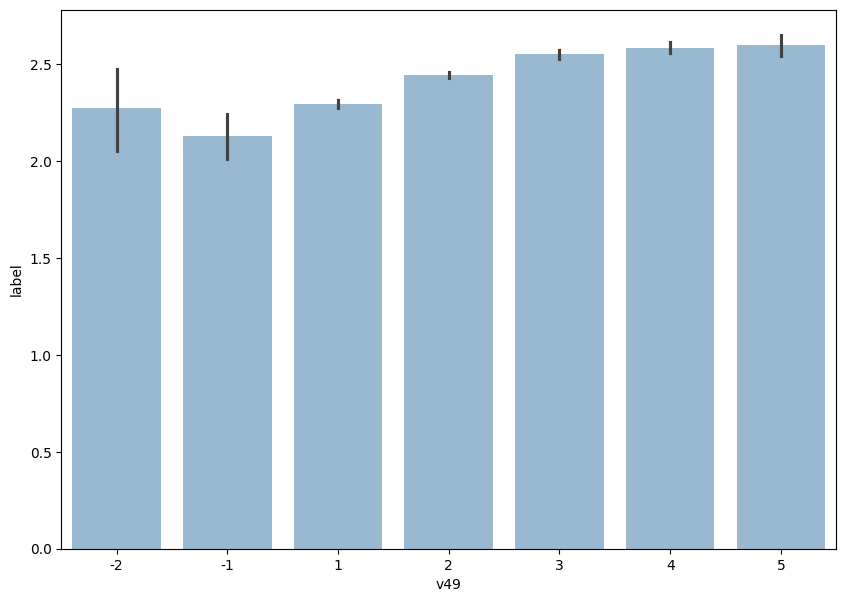

--------------------------------------------------
col: v50


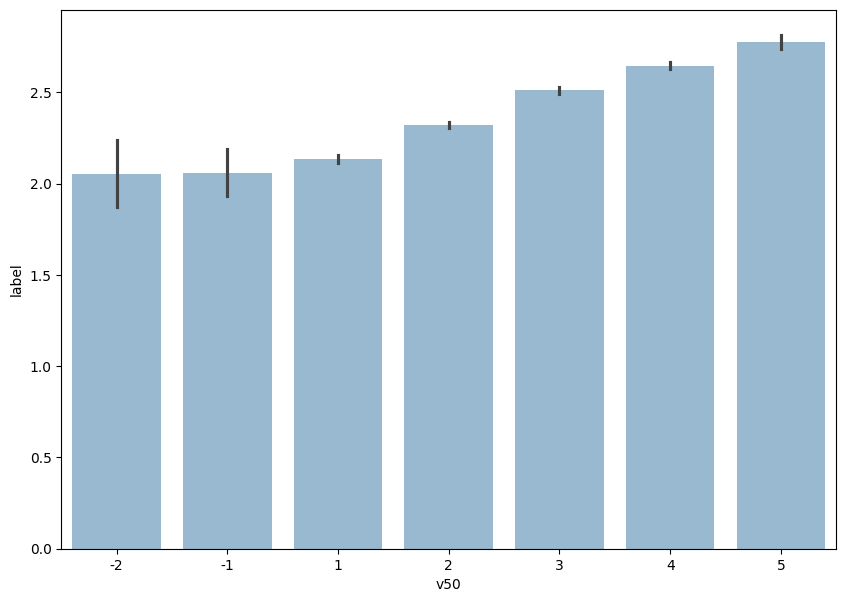

--------------------------------------------------
col: v51


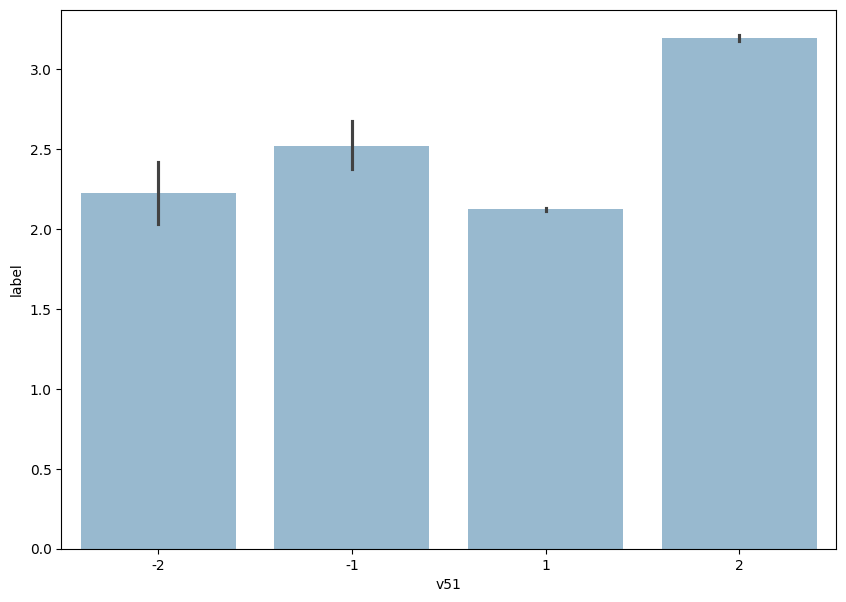

--------------------------------------------------
col: v52


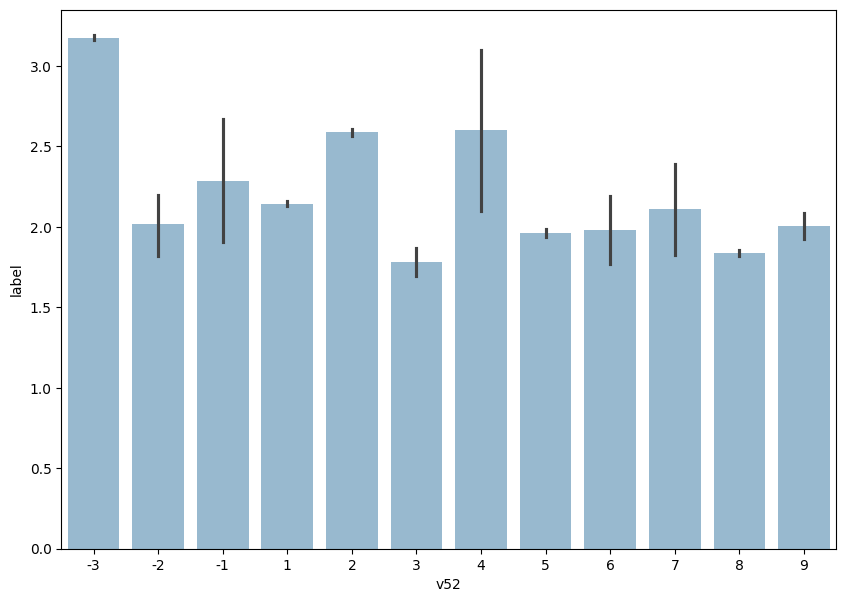

--------------------------------------------------
col: v52_cs


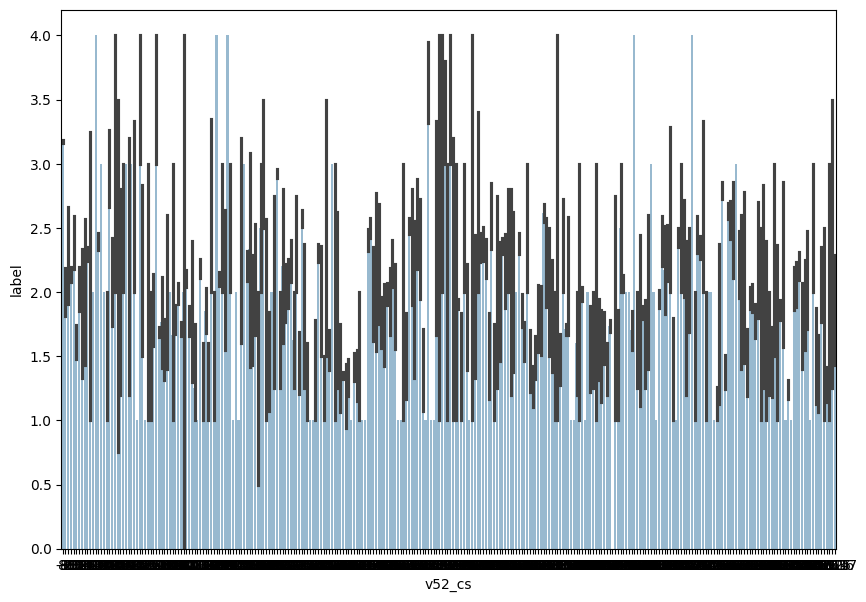

--------------------------------------------------
col: v53


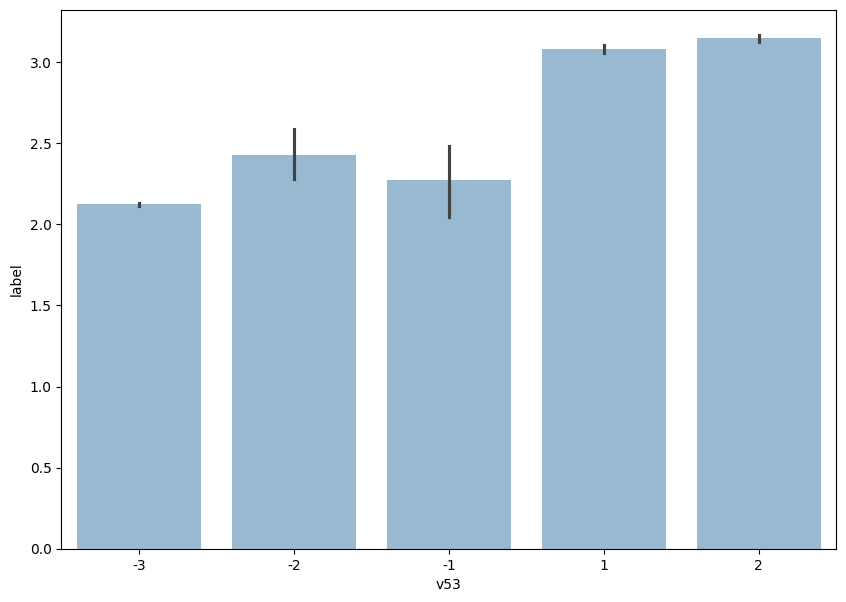

--------------------------------------------------
col: v54


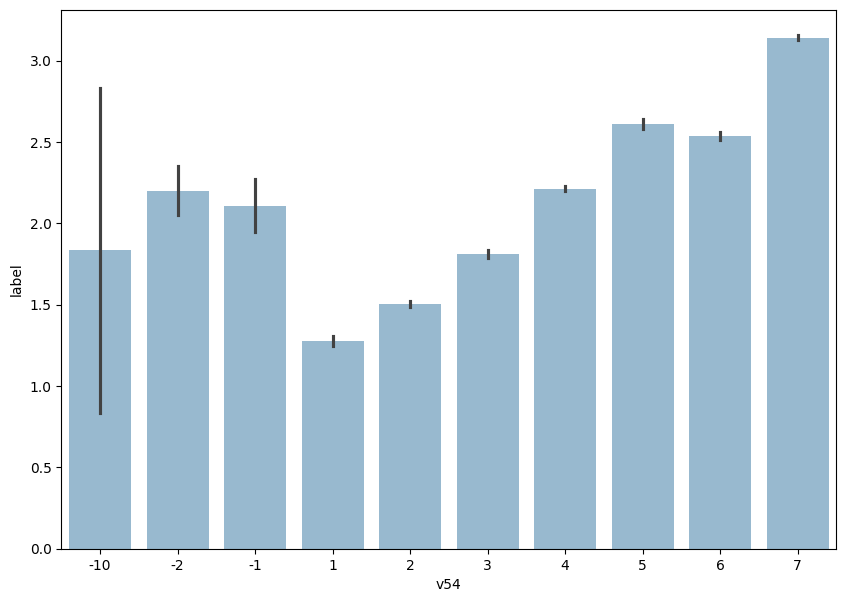

--------------------------------------------------
col: v55


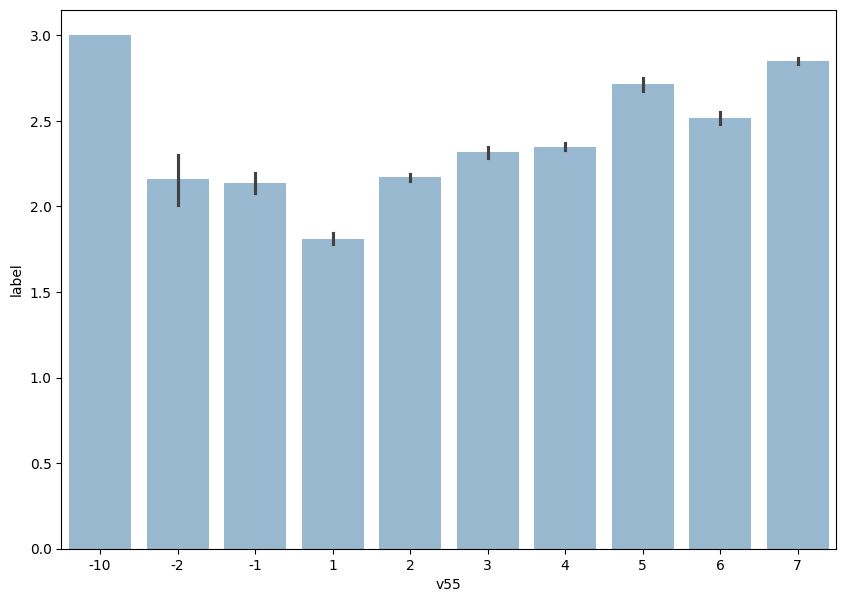

--------------------------------------------------
col: v56


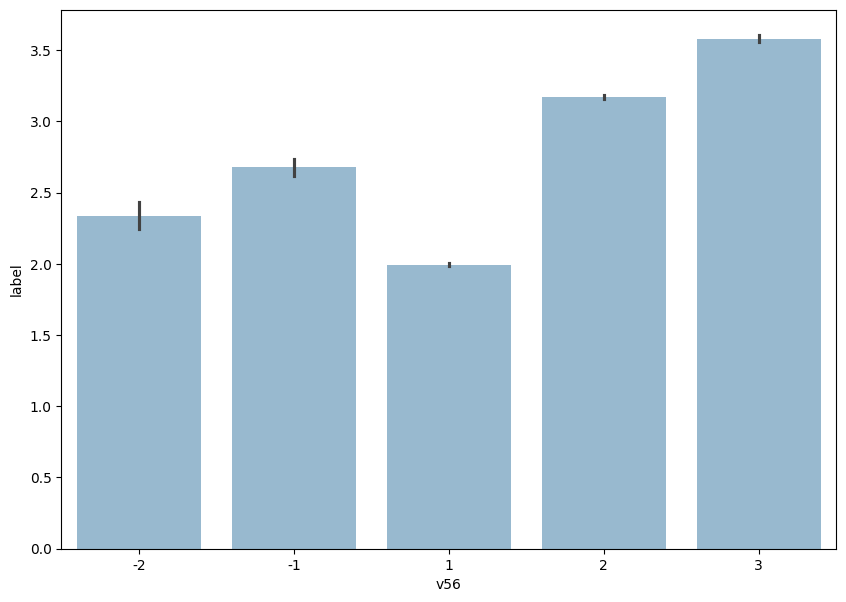

--------------------------------------------------
col: v57


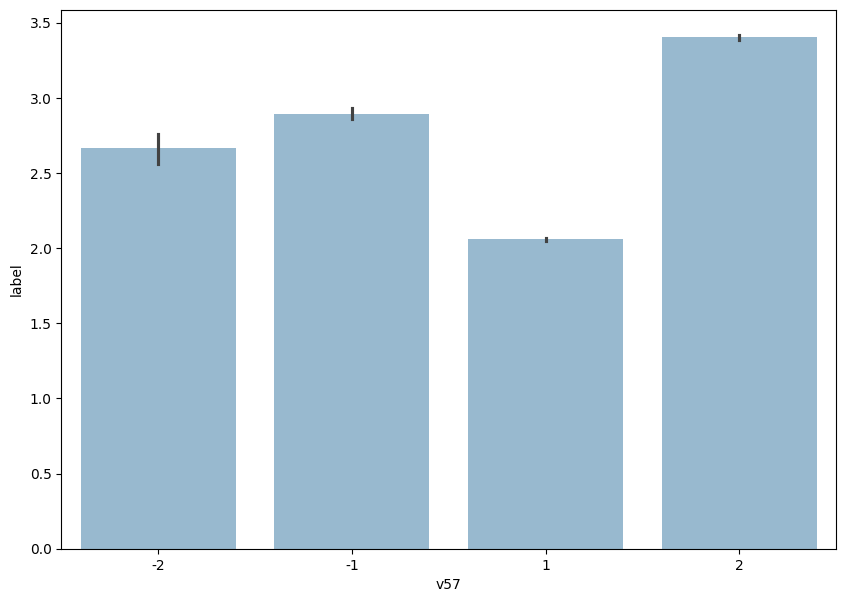

--------------------------------------------------
col: v58


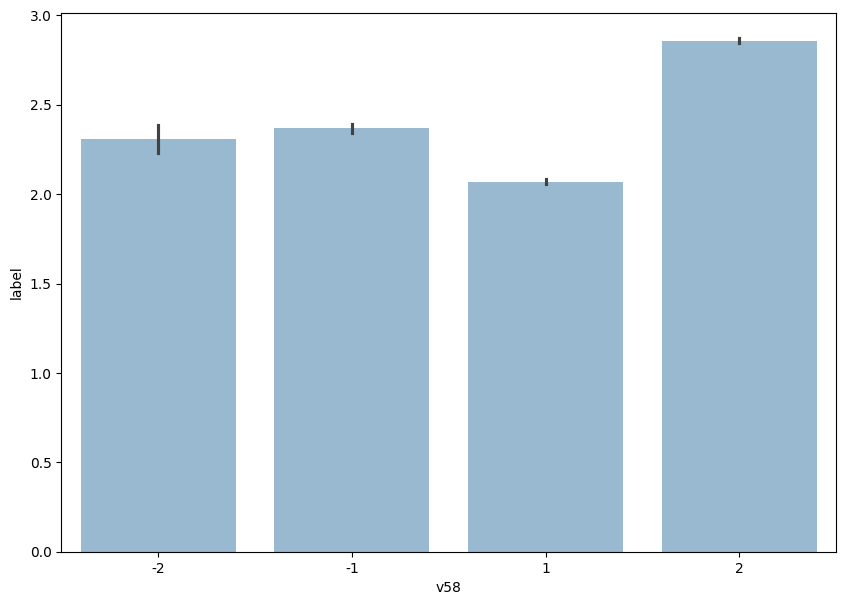

--------------------------------------------------
col: v59


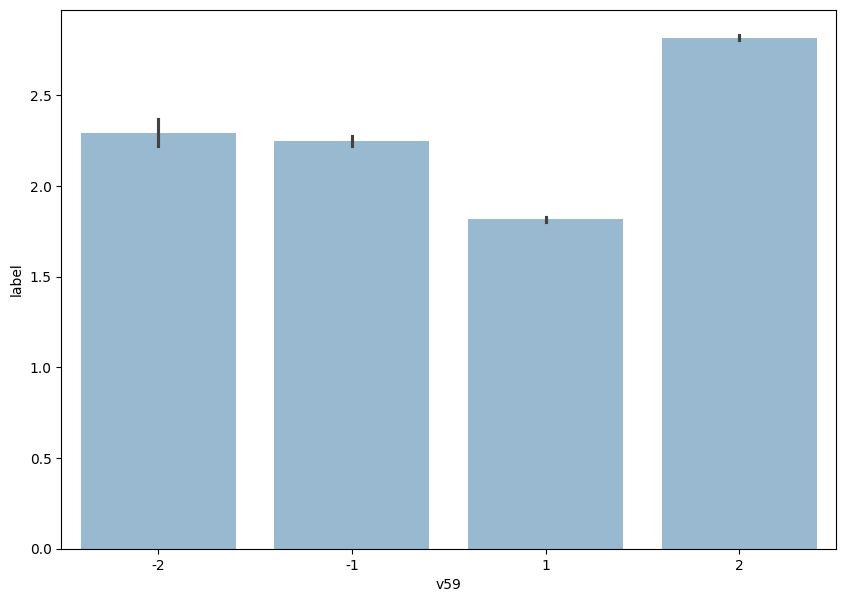

--------------------------------------------------
col: v60


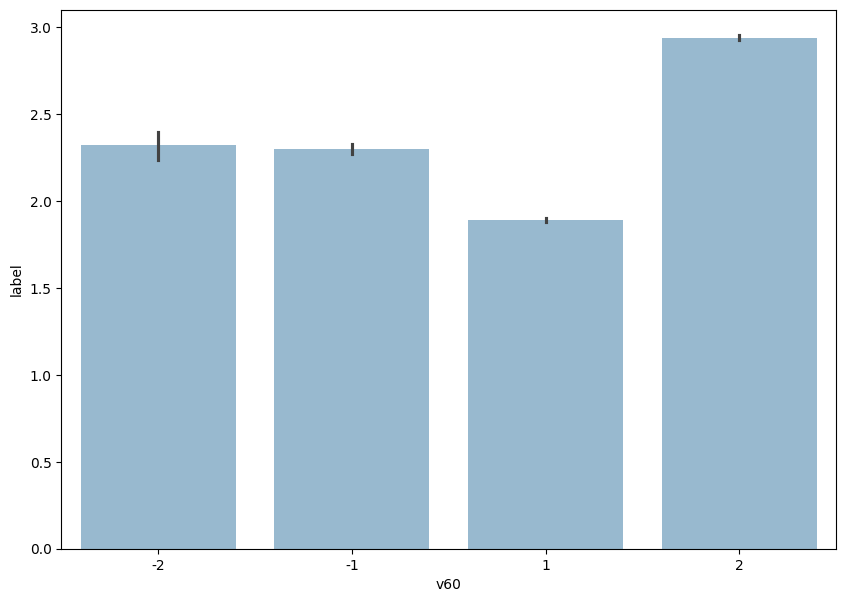

--------------------------------------------------
col: v61


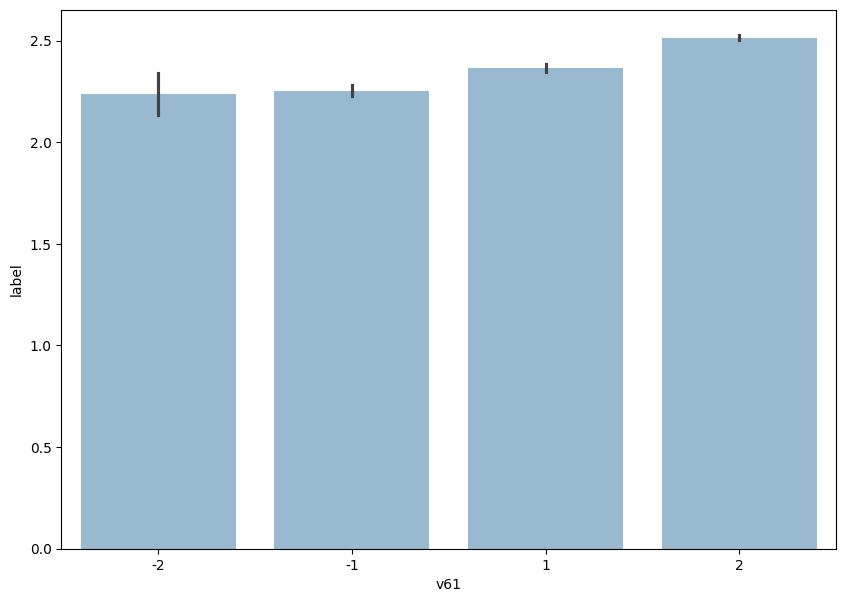

--------------------------------------------------
col: v62


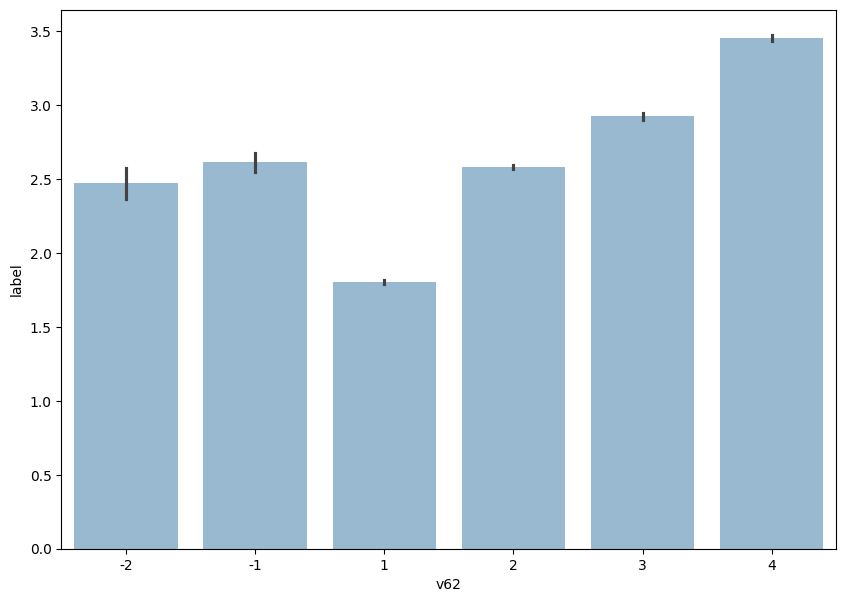

--------------------------------------------------
col: v63


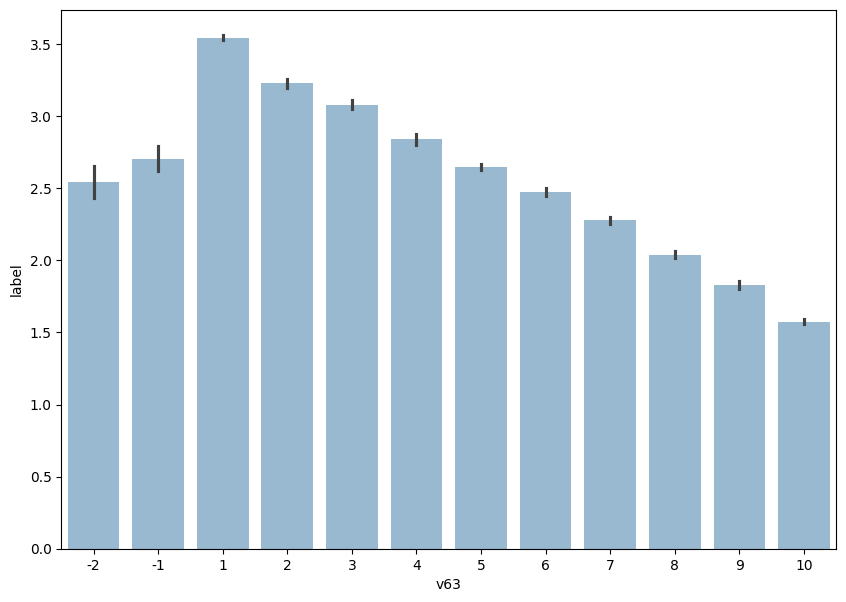

--------------------------------------------------
col: v64


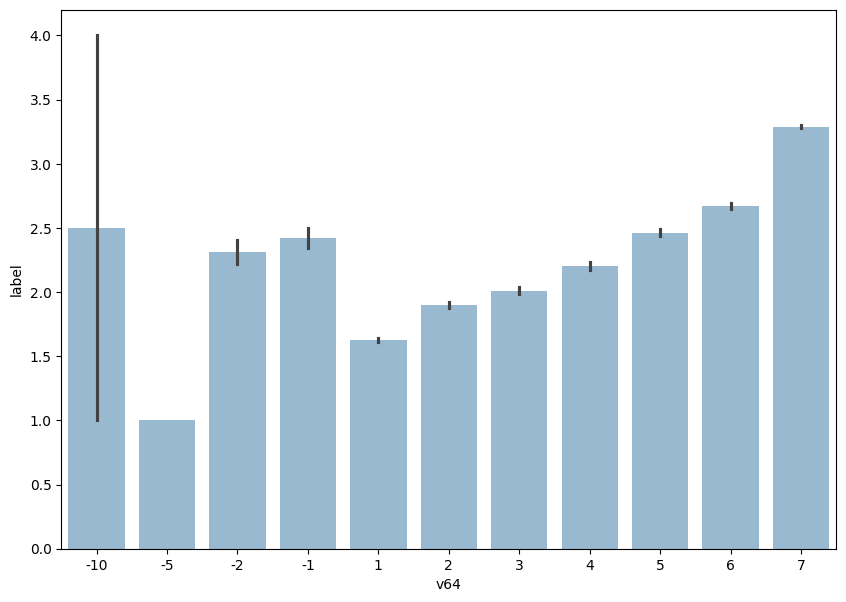

--------------------------------------------------
col: v65


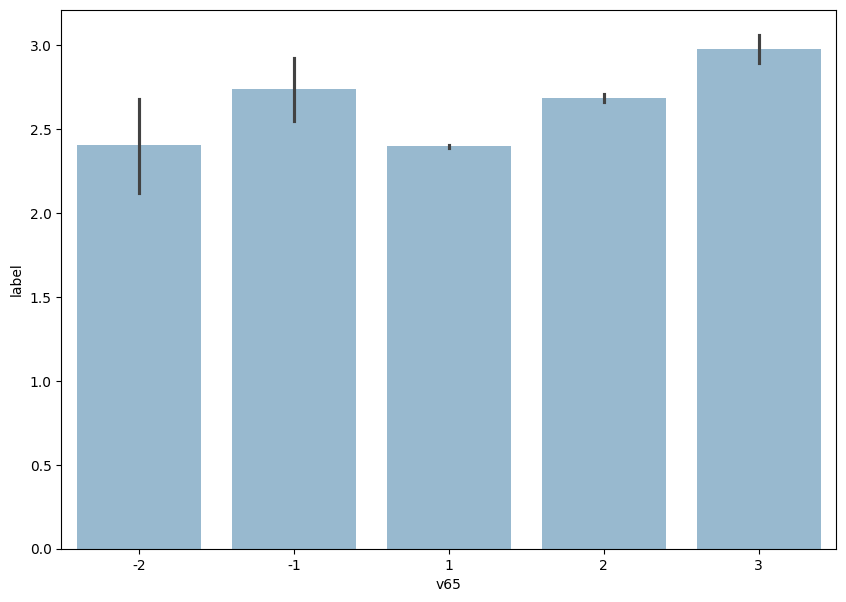

--------------------------------------------------
col: v66


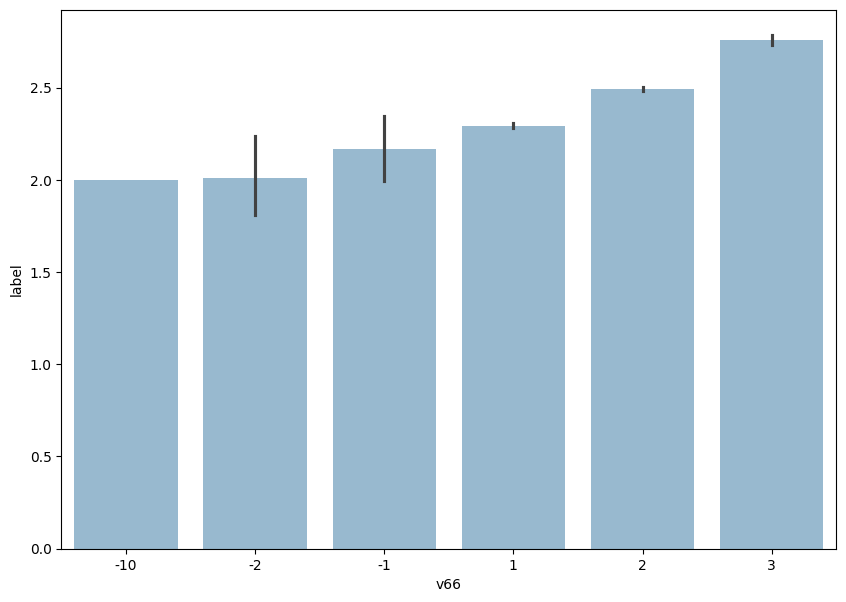

--------------------------------------------------
col: v67


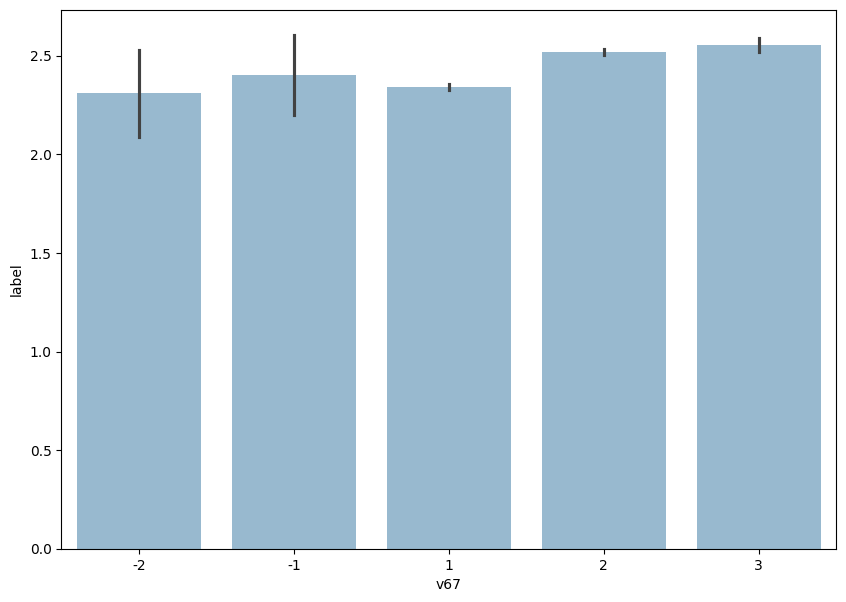

--------------------------------------------------
col: v68


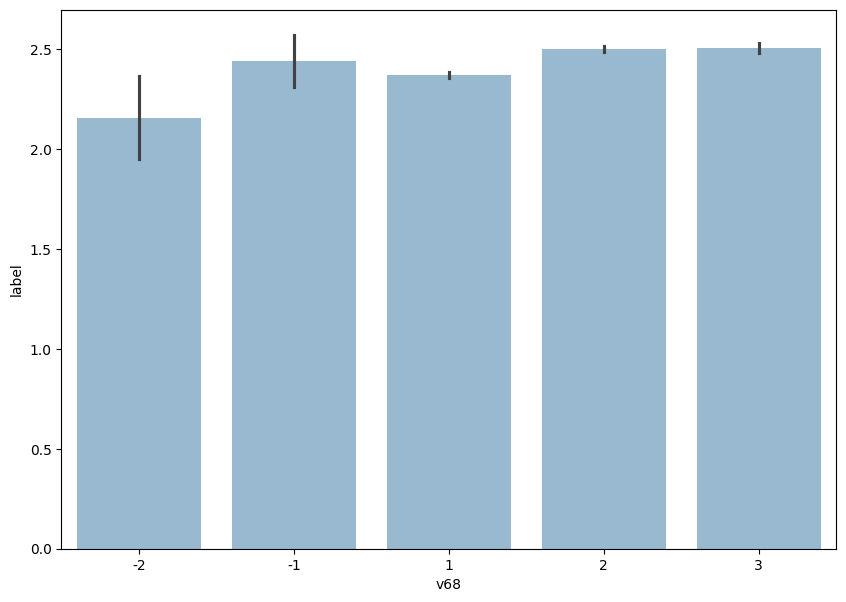

--------------------------------------------------
col: v69


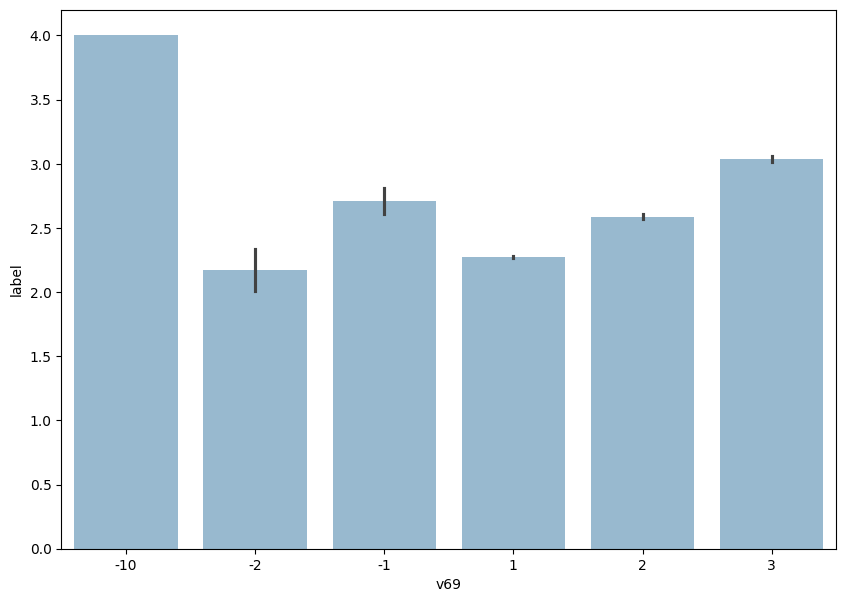

--------------------------------------------------
col: v70


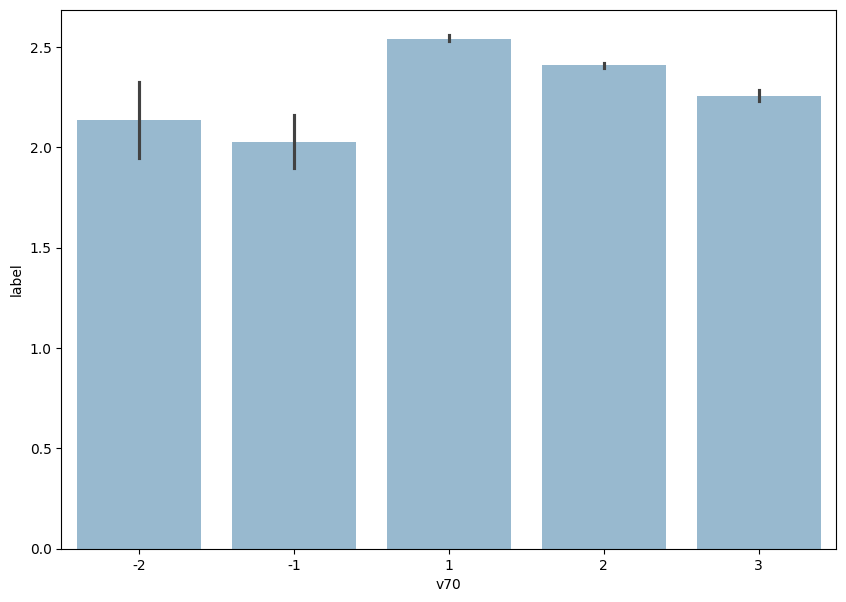

--------------------------------------------------
col: v71


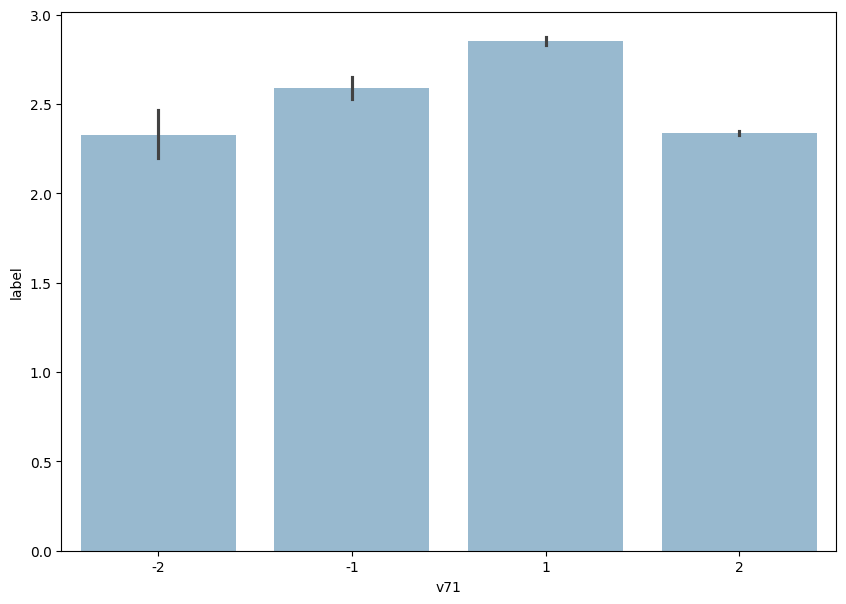

--------------------------------------------------
col: v72


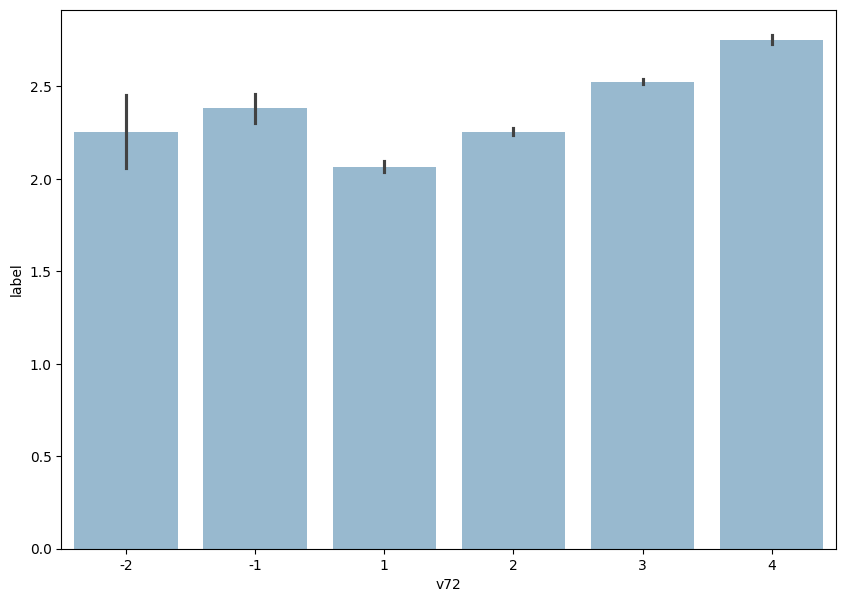

--------------------------------------------------
col: v73


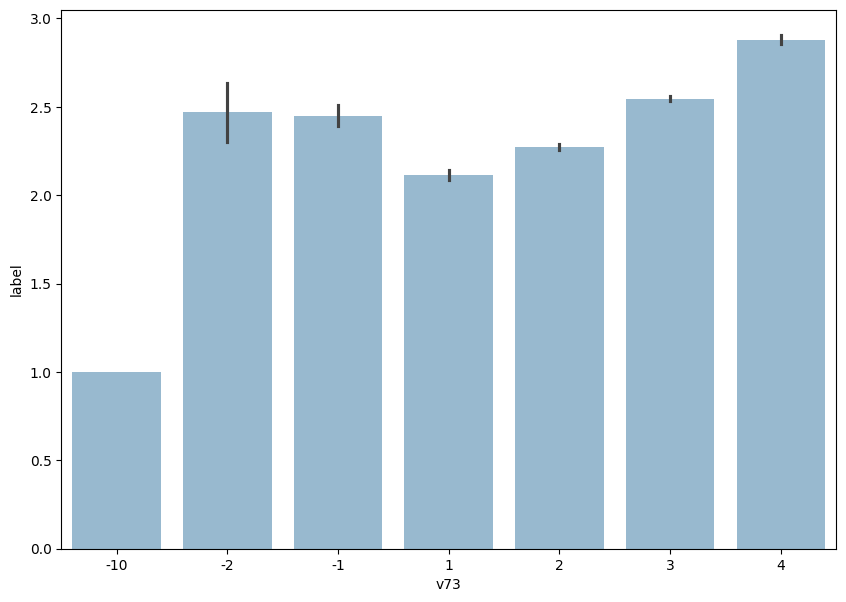

--------------------------------------------------
col: v74


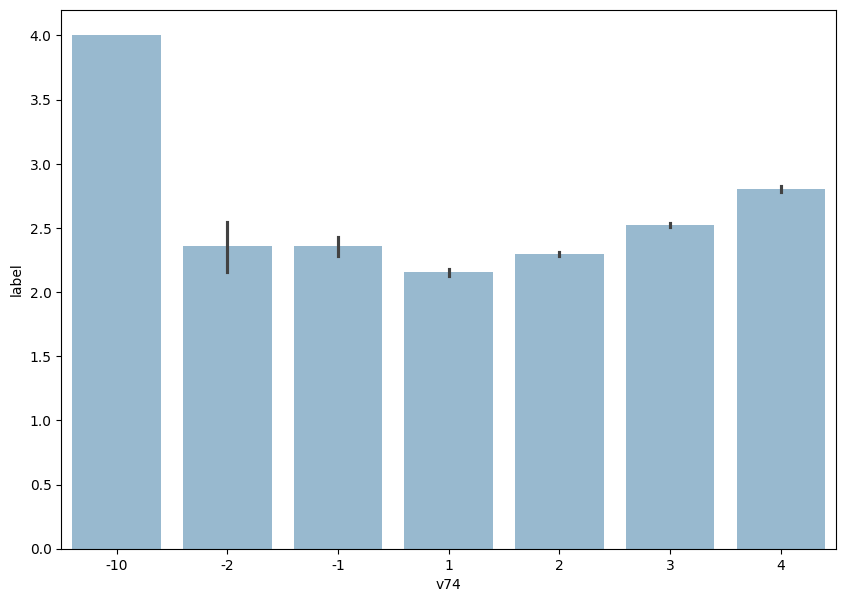

--------------------------------------------------
col: v75


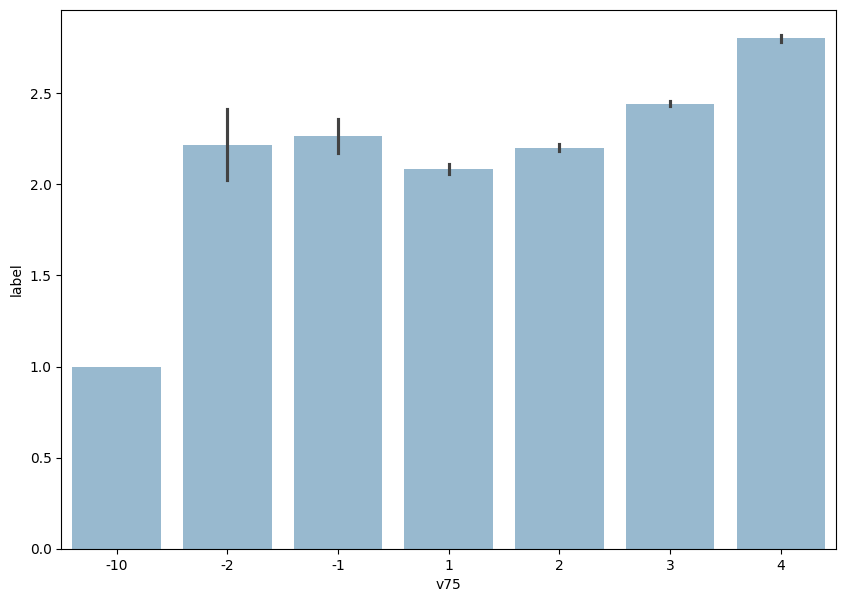

--------------------------------------------------
col: v76


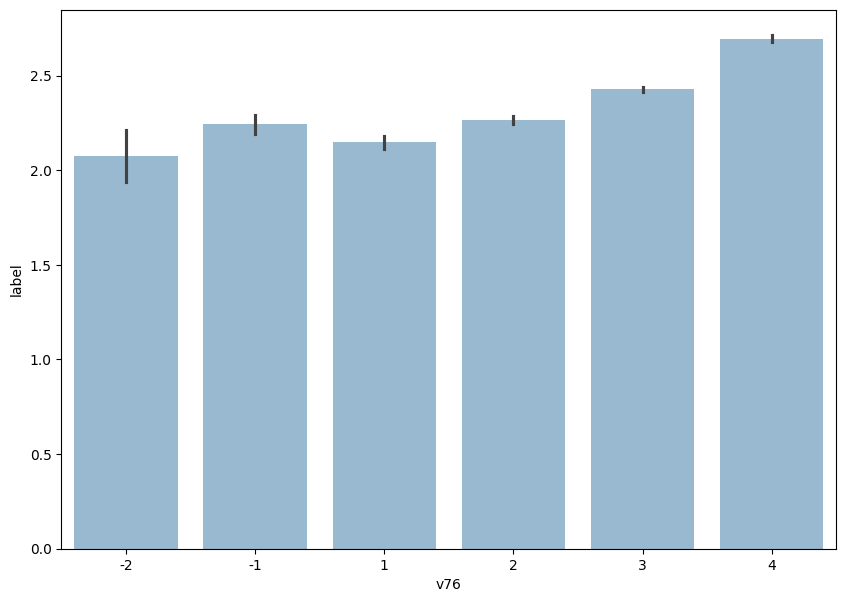

--------------------------------------------------
col: v77


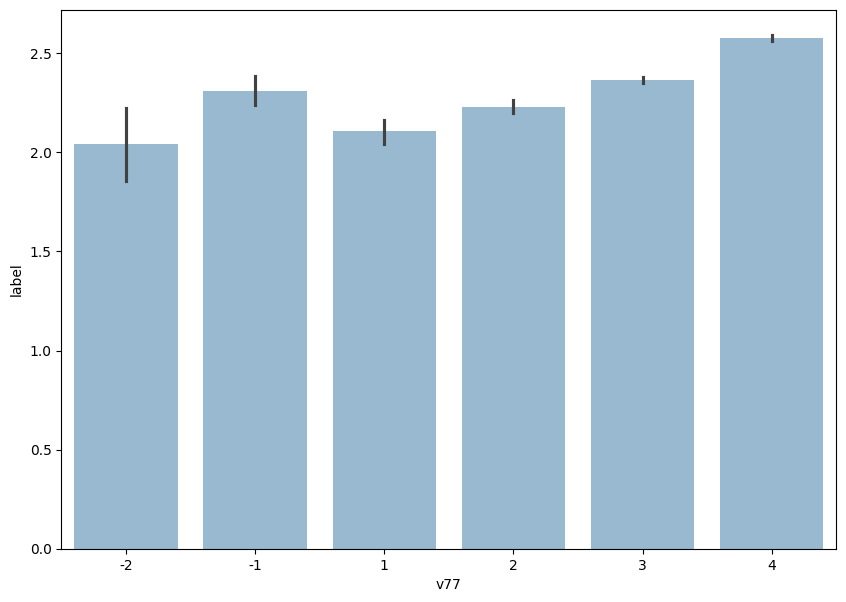

--------------------------------------------------
col: v78


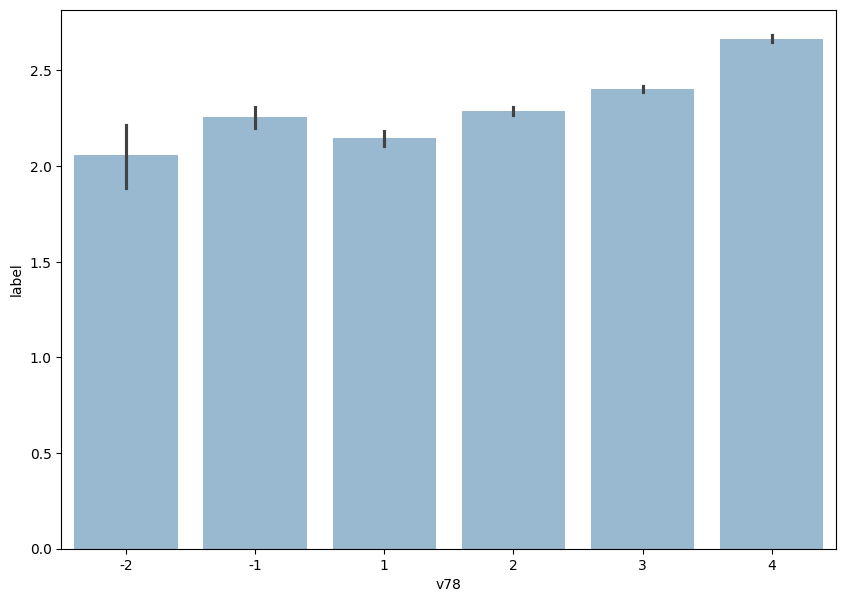

--------------------------------------------------
col: v79


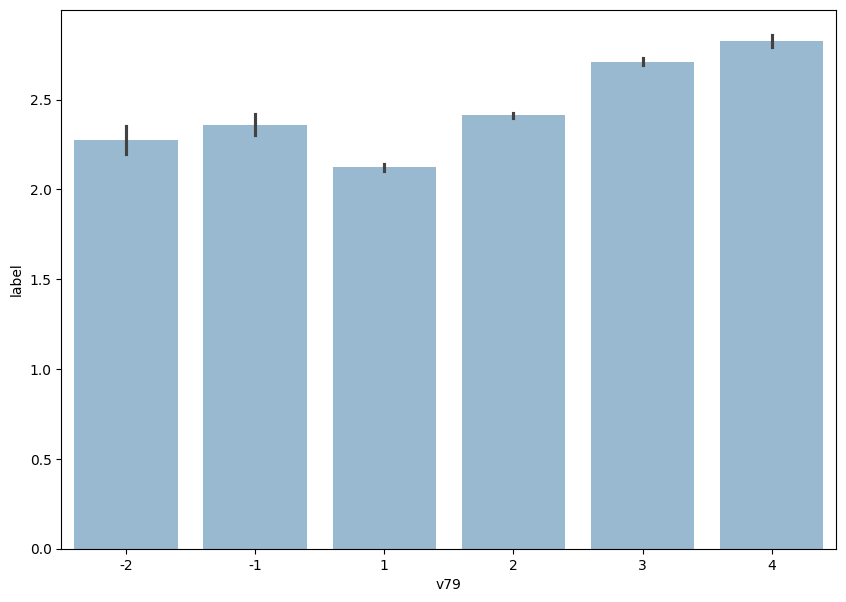

--------------------------------------------------
col: v80


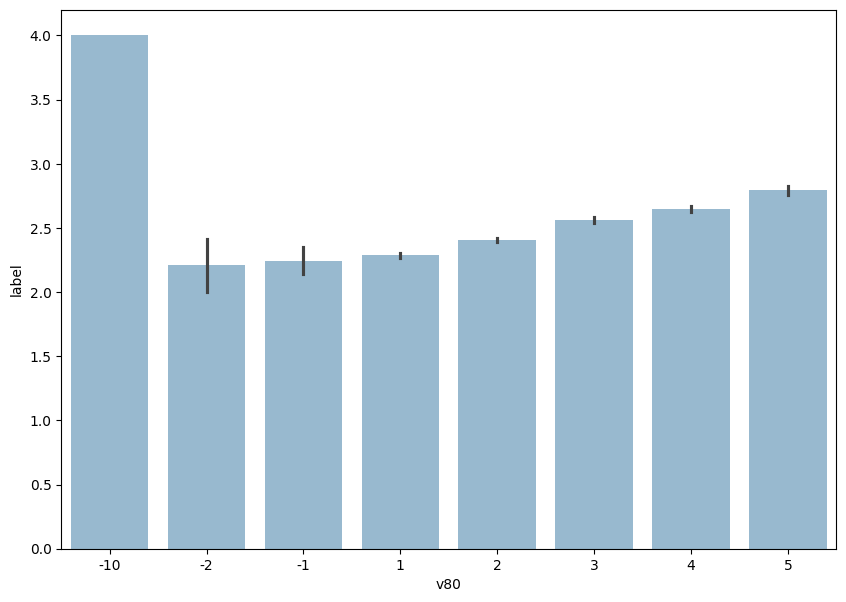

--------------------------------------------------
col: v81


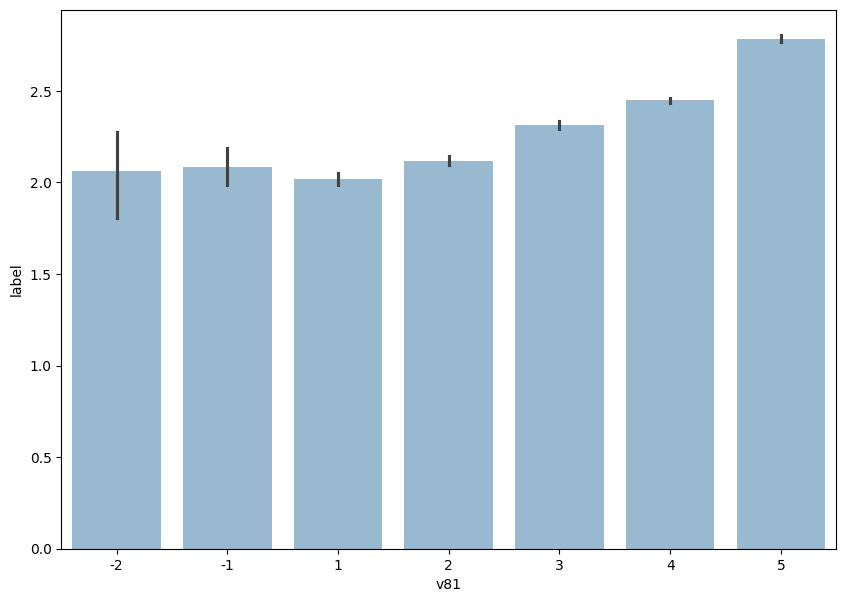

--------------------------------------------------
col: v82


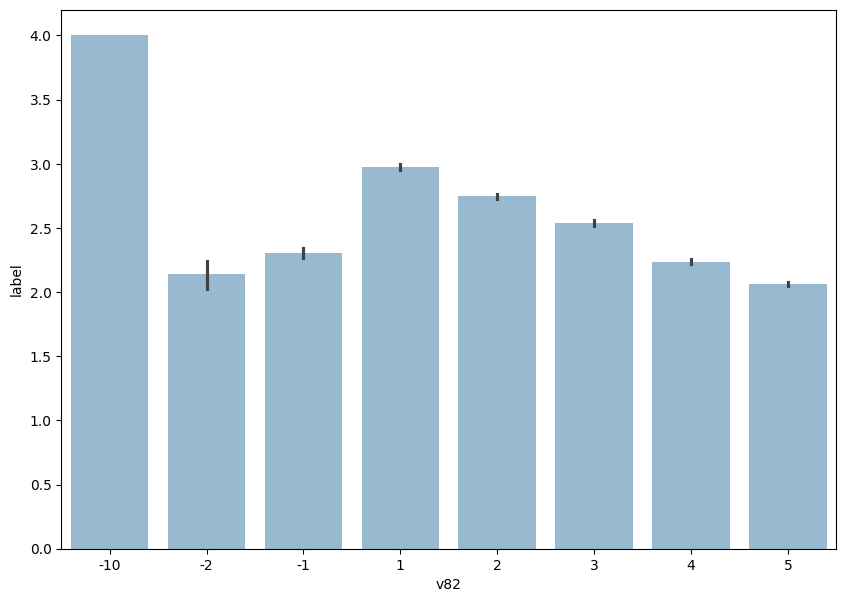

--------------------------------------------------
col: v83


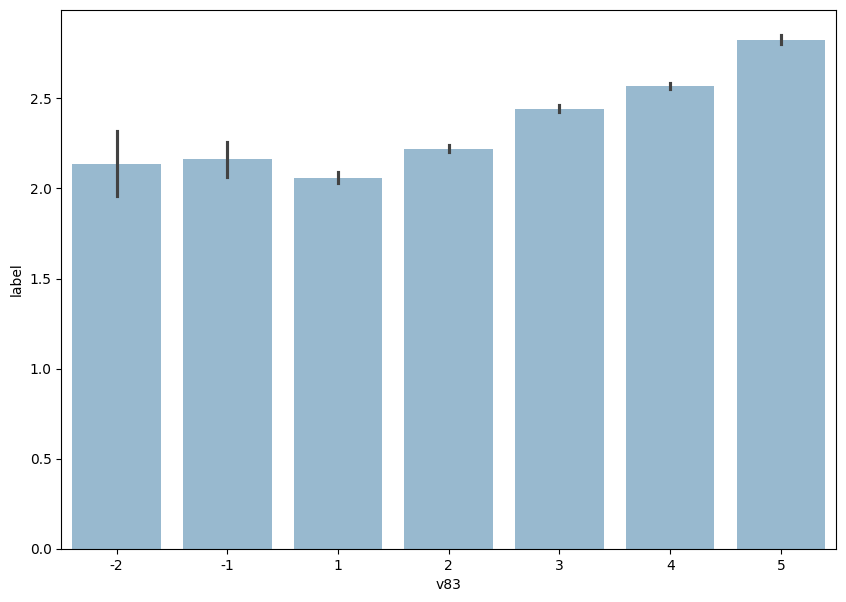

--------------------------------------------------
col: v84


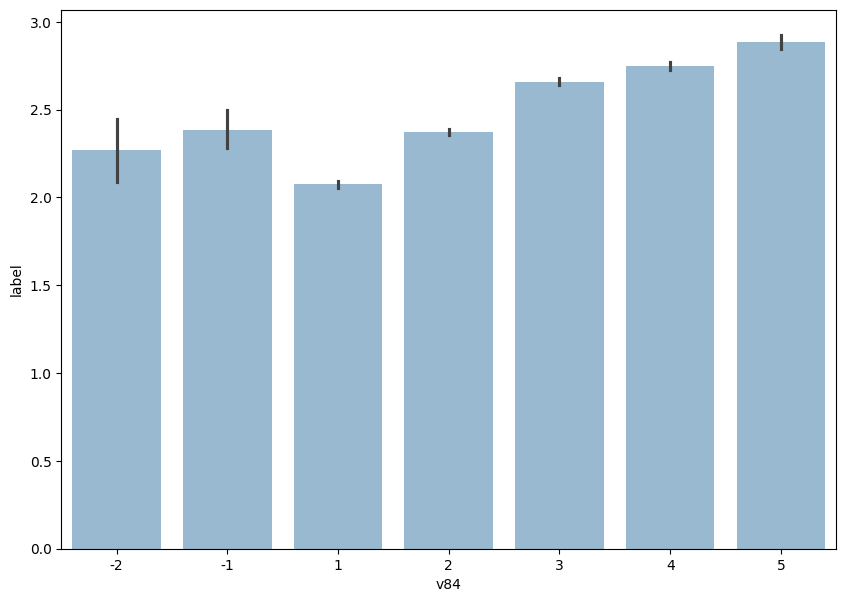

--------------------------------------------------
col: f85


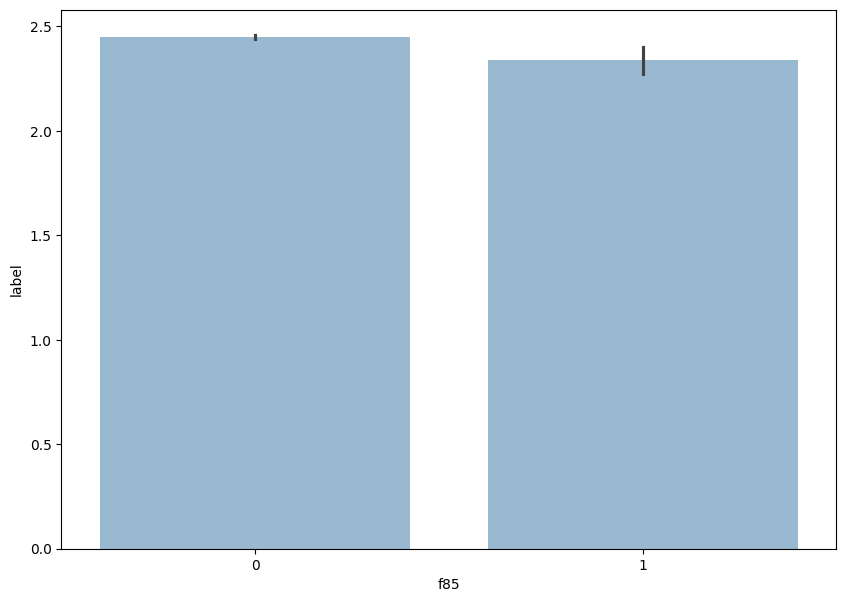

--------------------------------------------------
col: v85


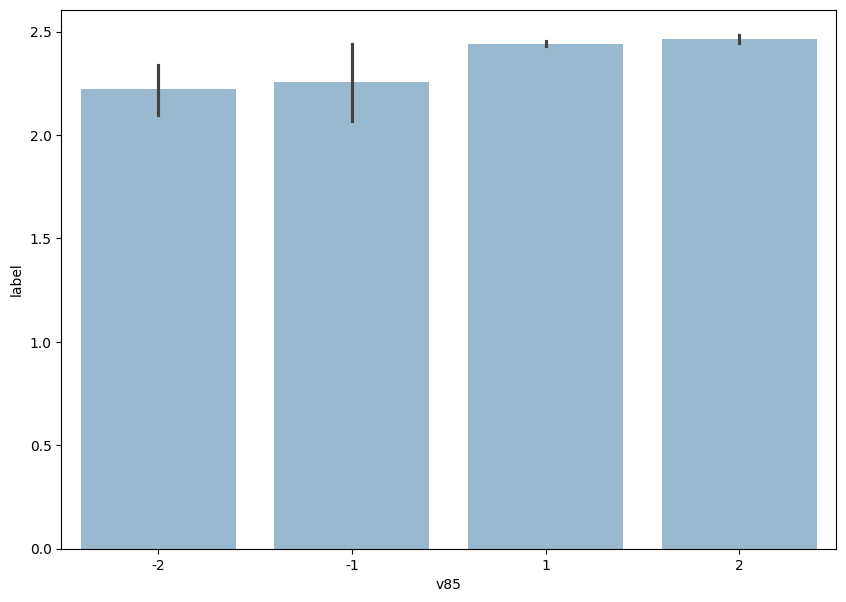

--------------------------------------------------
col: v86


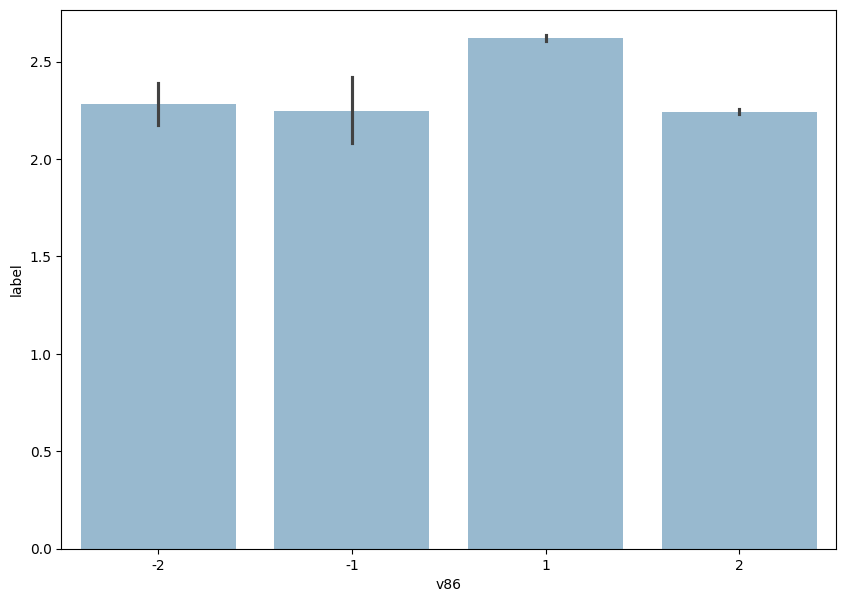

--------------------------------------------------
col: v87


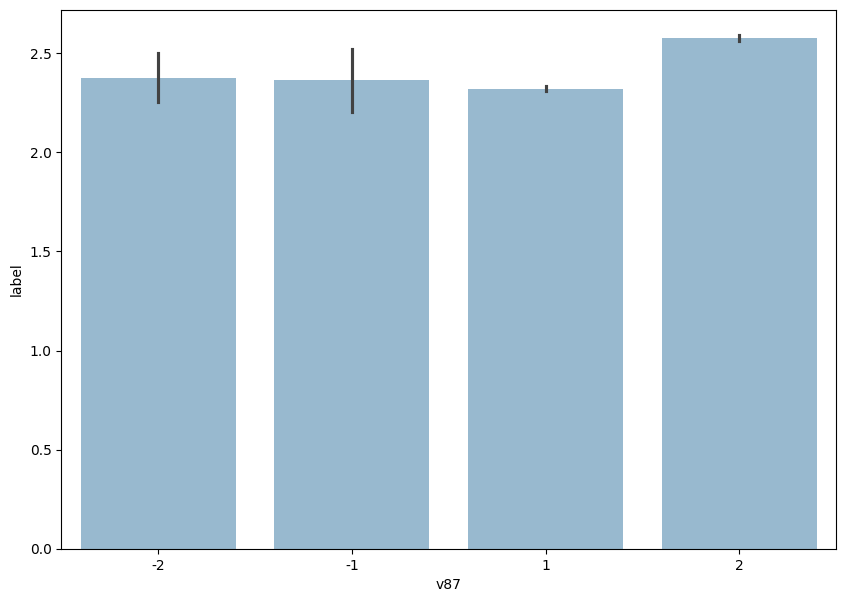

--------------------------------------------------
col: v88


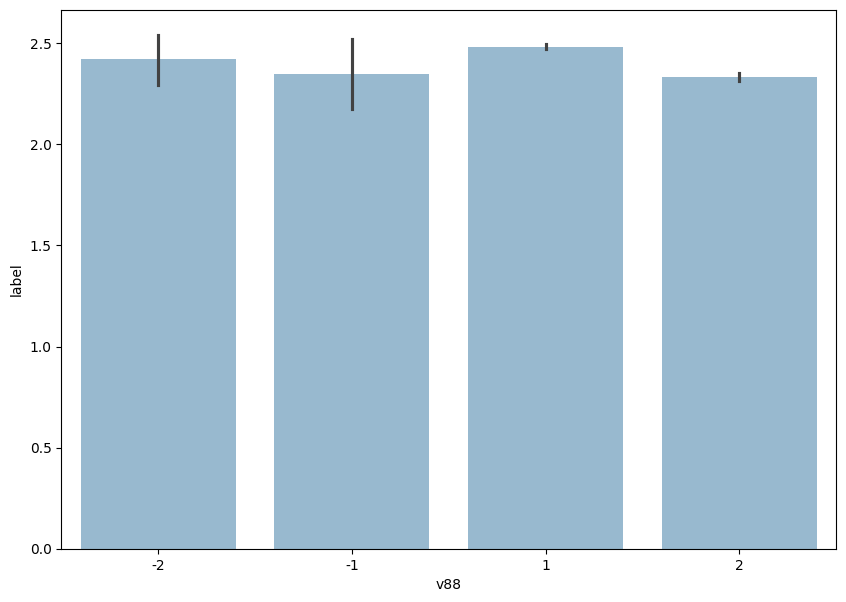

--------------------------------------------------
col: v89


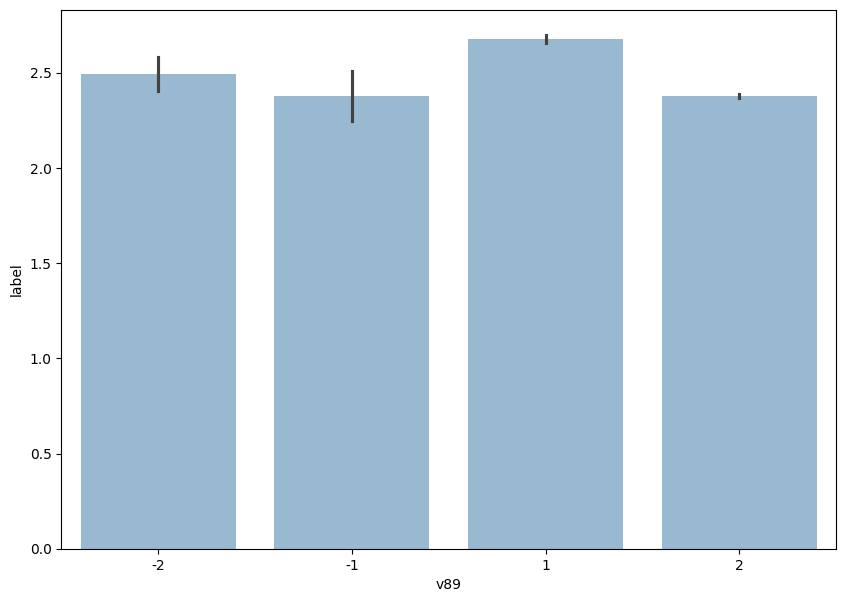

--------------------------------------------------
col: v90


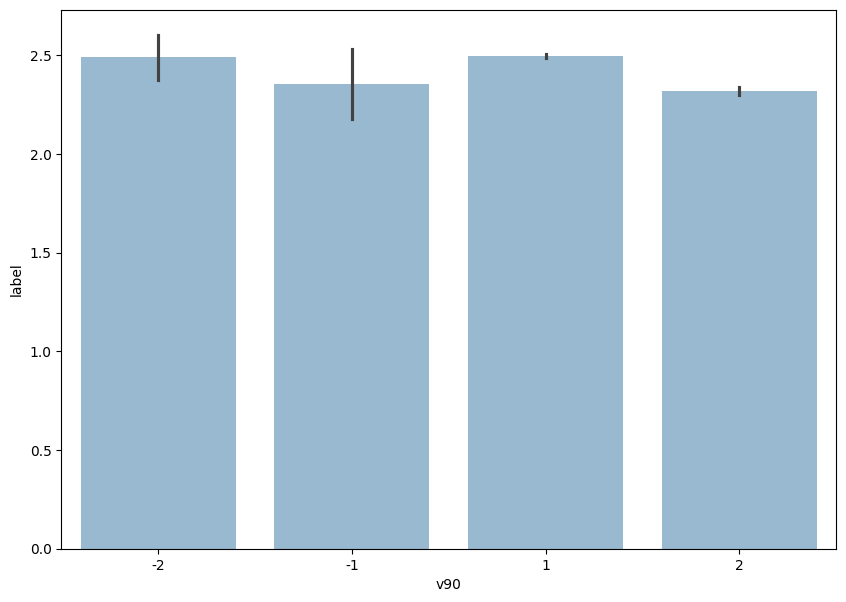

--------------------------------------------------
col: v91


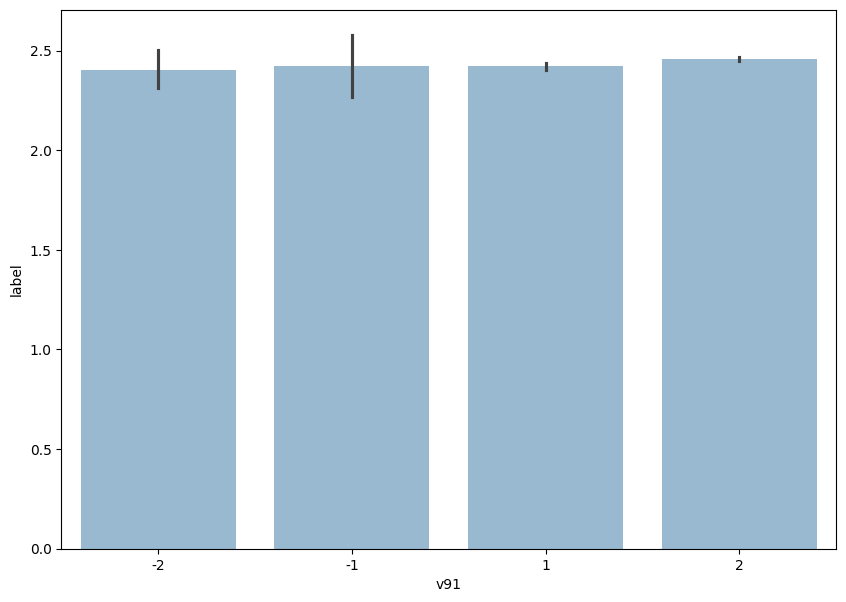

--------------------------------------------------
col: v92


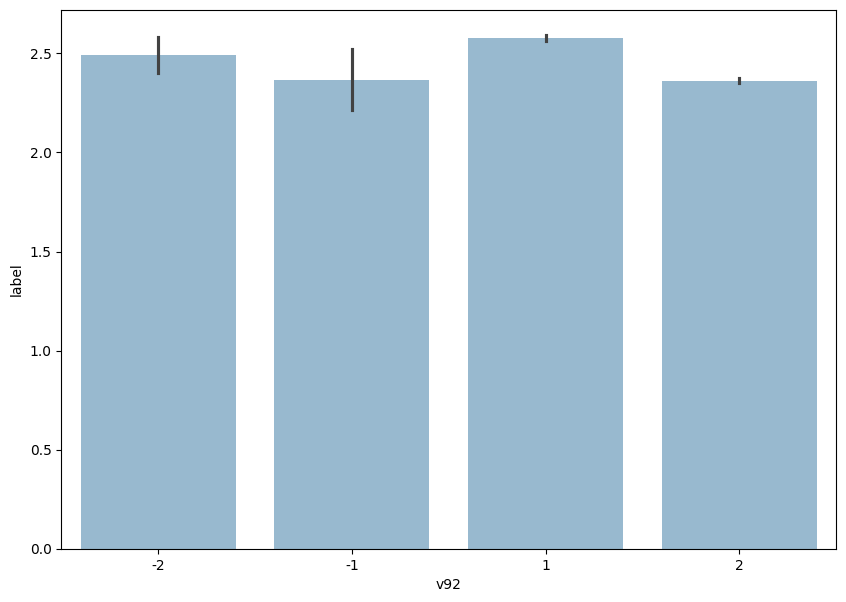

--------------------------------------------------
col: v93


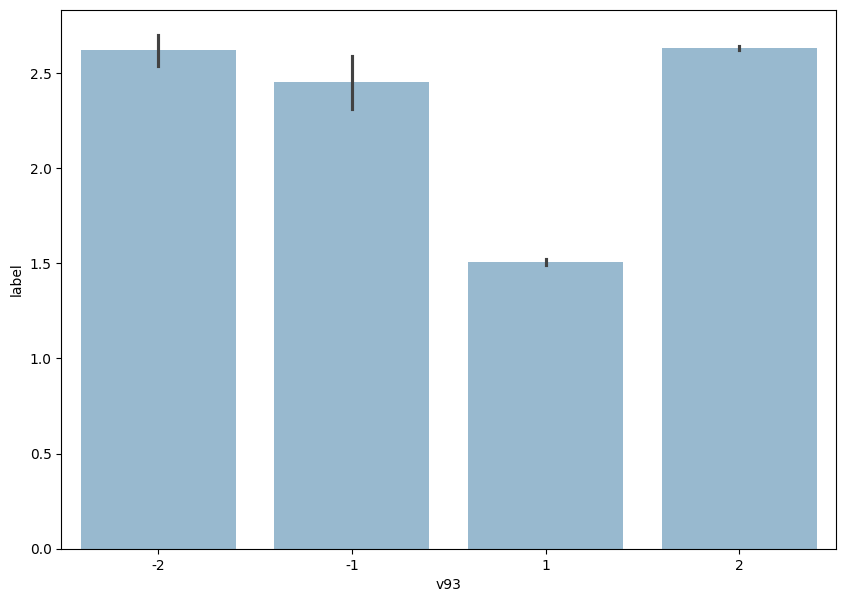

--------------------------------------------------
col: v94


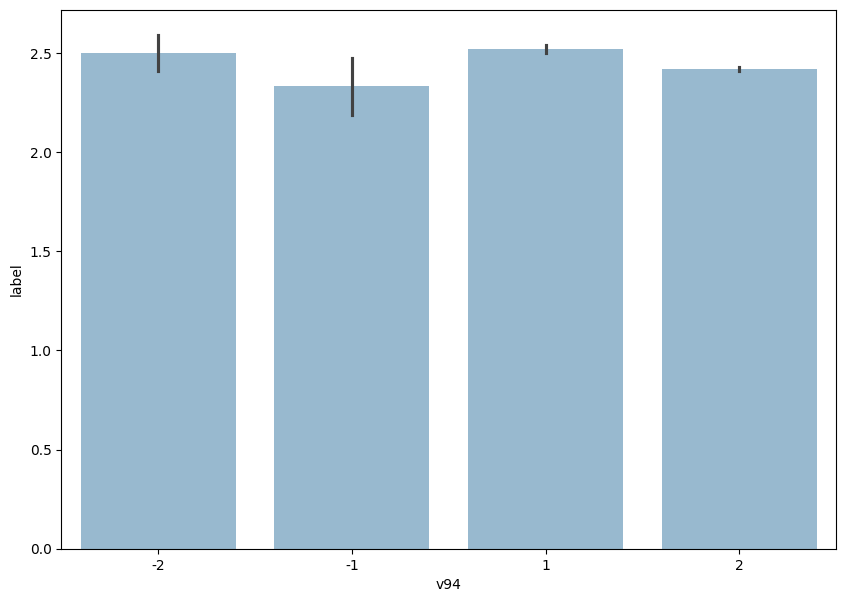

--------------------------------------------------
col: v95


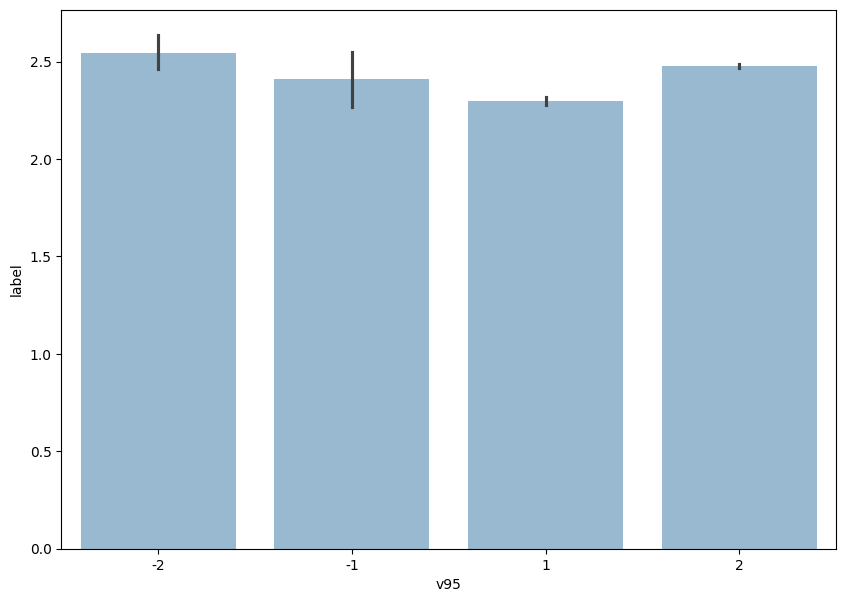

--------------------------------------------------
col: f96


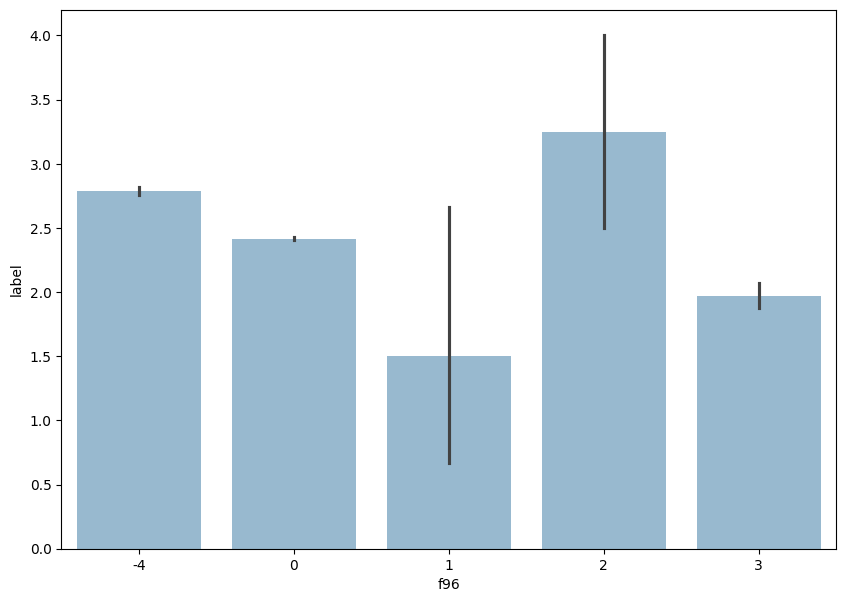

--------------------------------------------------
col: v96


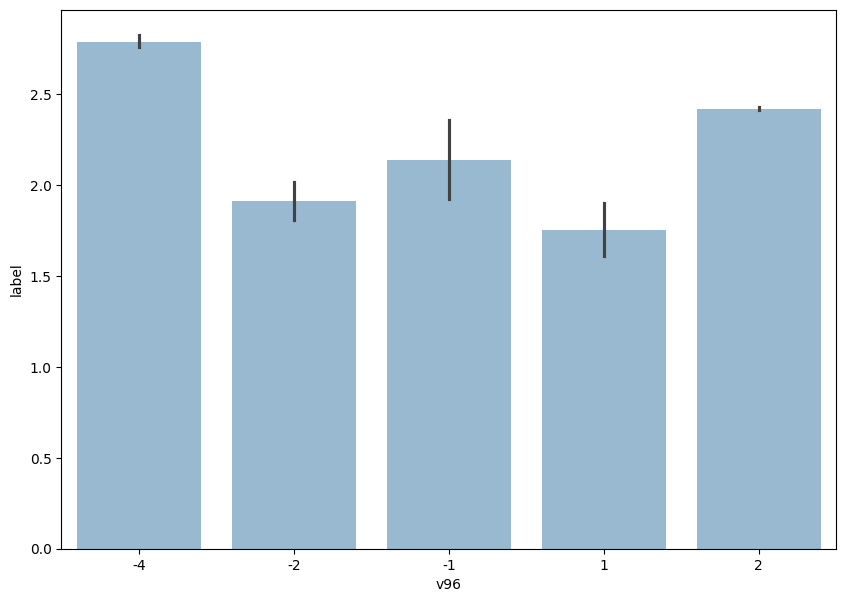

--------------------------------------------------
col: v96b


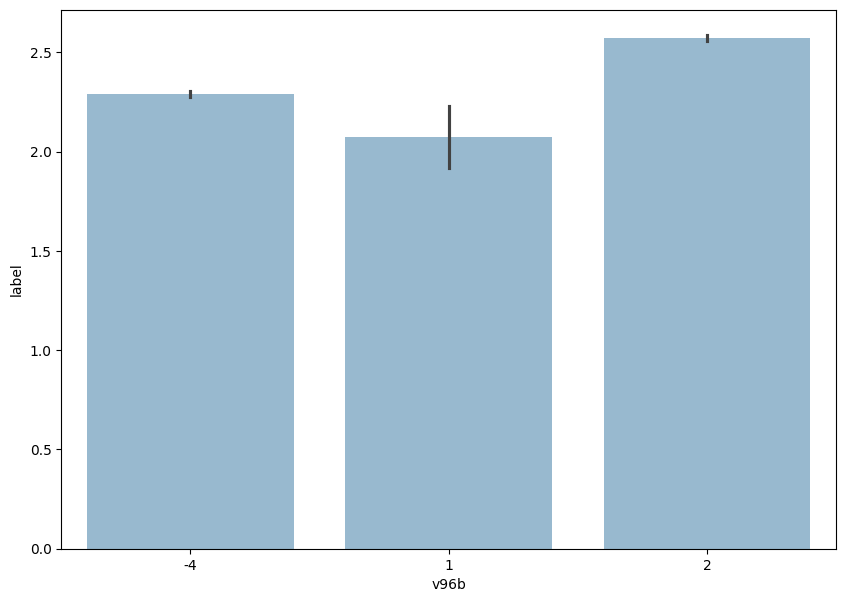

--------------------------------------------------
col: v97


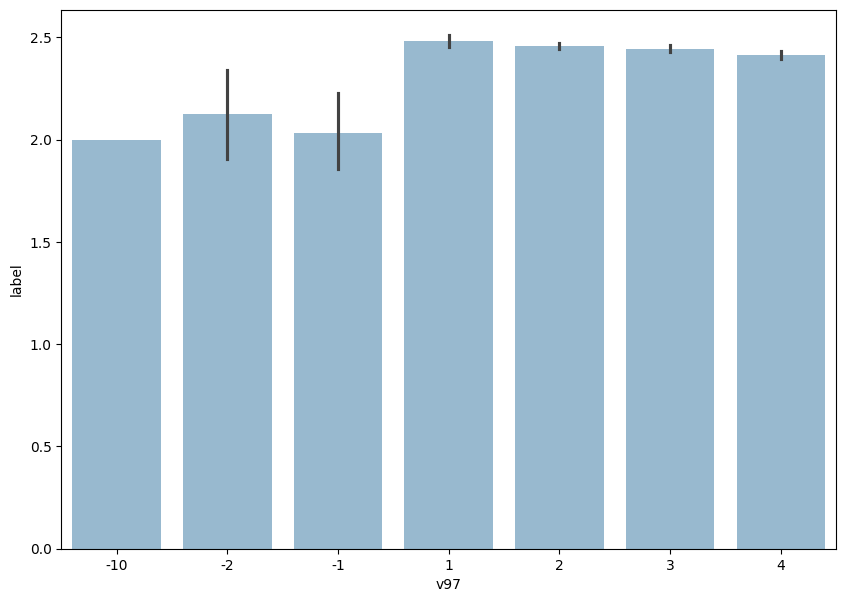

--------------------------------------------------
col: v98


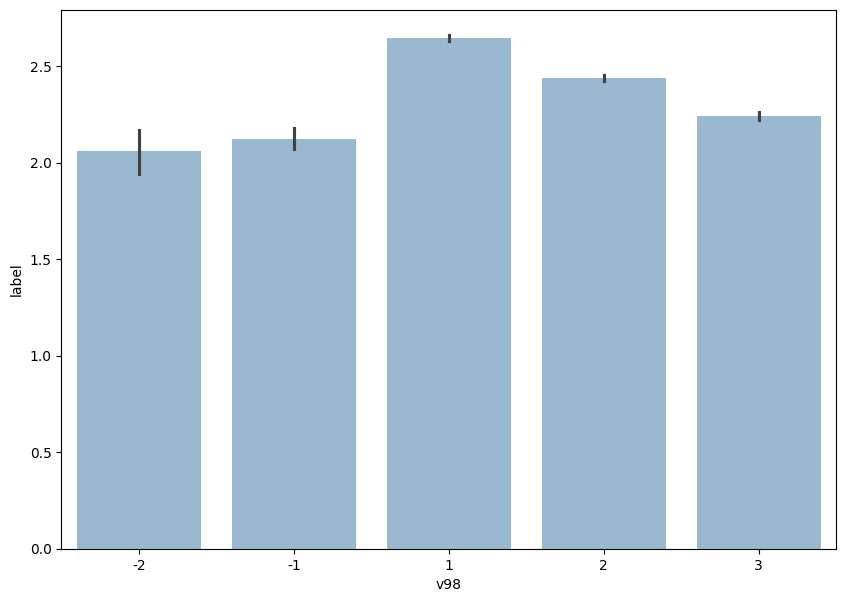

--------------------------------------------------
col: v99


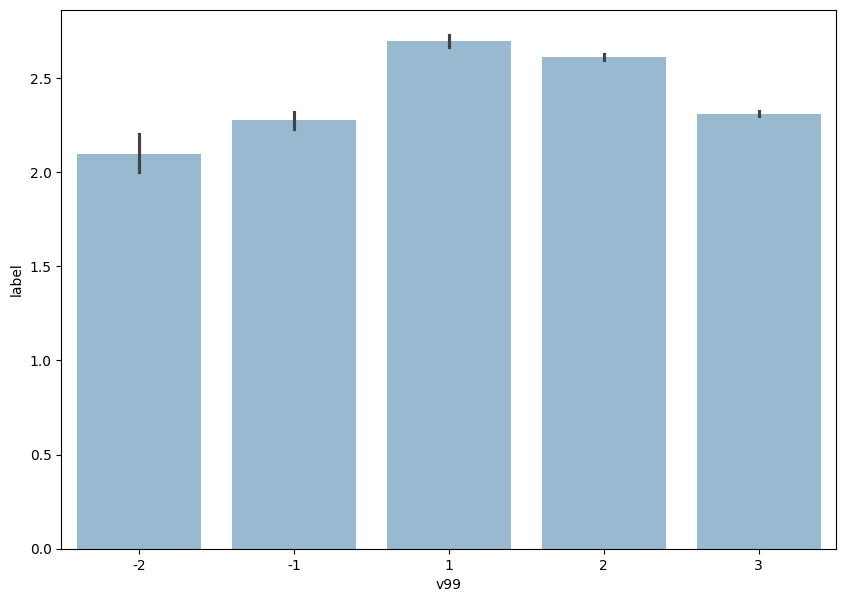

--------------------------------------------------
col: v100


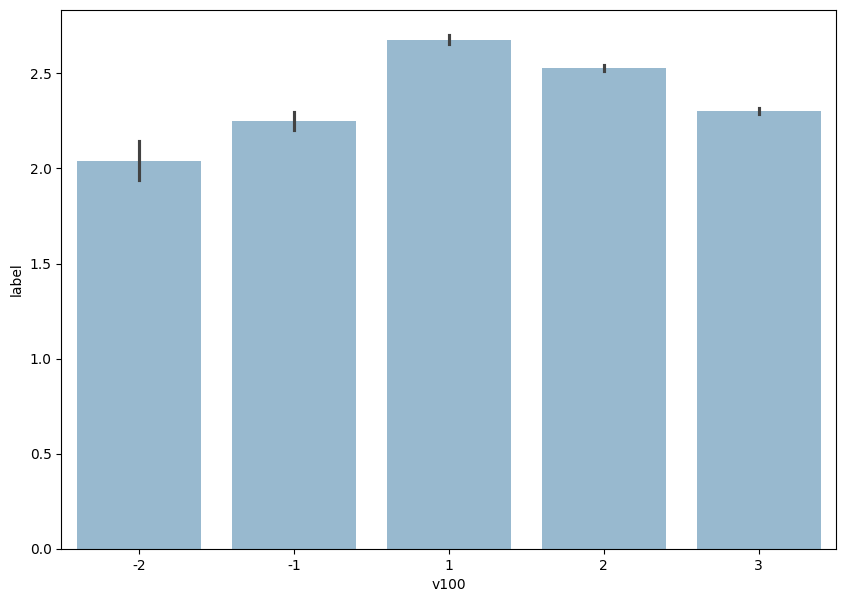

--------------------------------------------------
col: v101


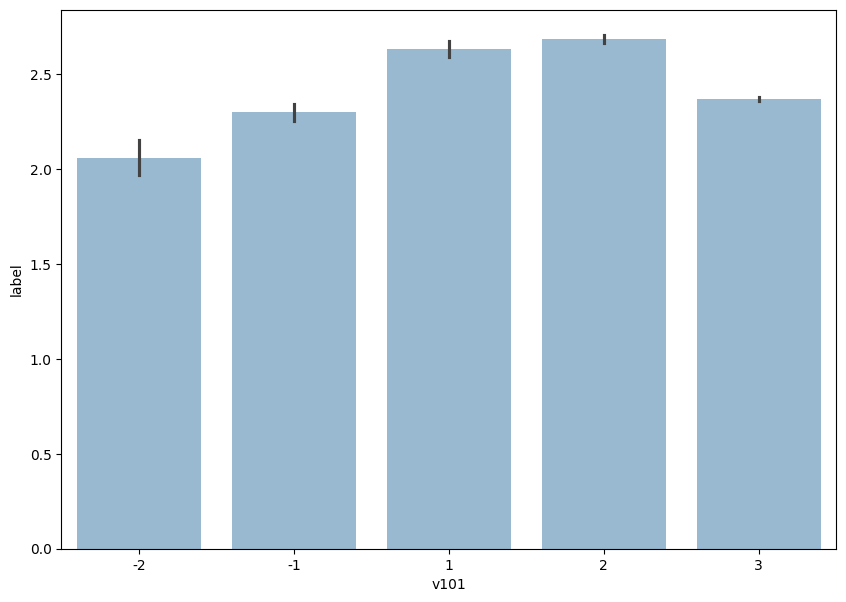

--------------------------------------------------
col: v102


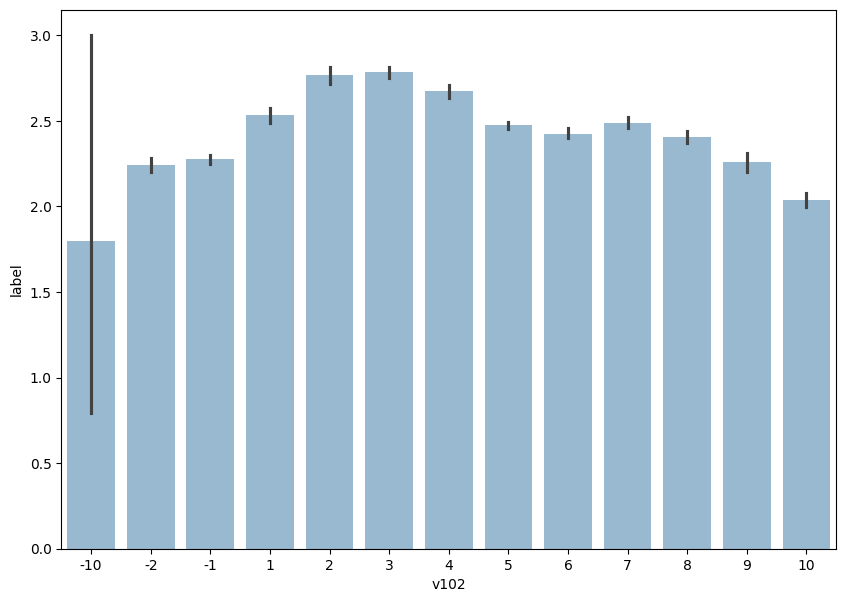

--------------------------------------------------
col: v103


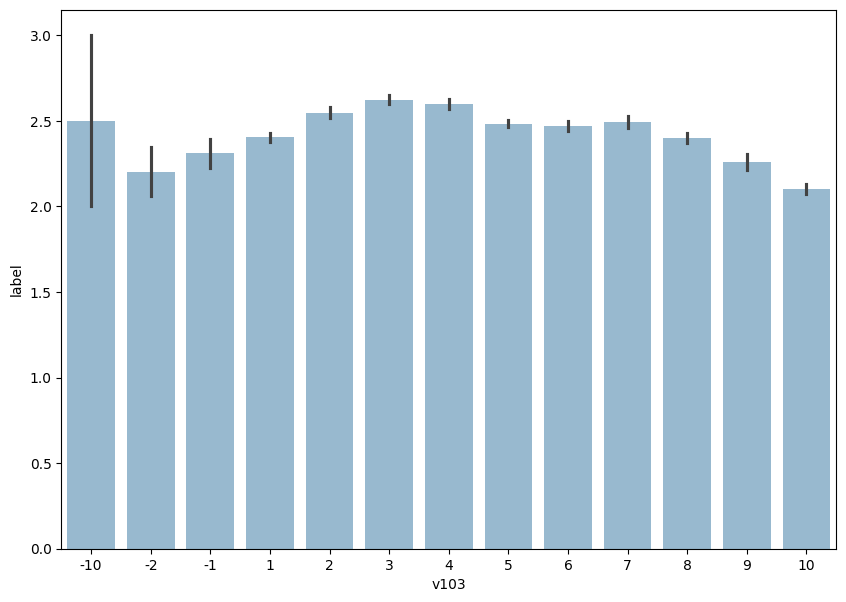

--------------------------------------------------
col: v104


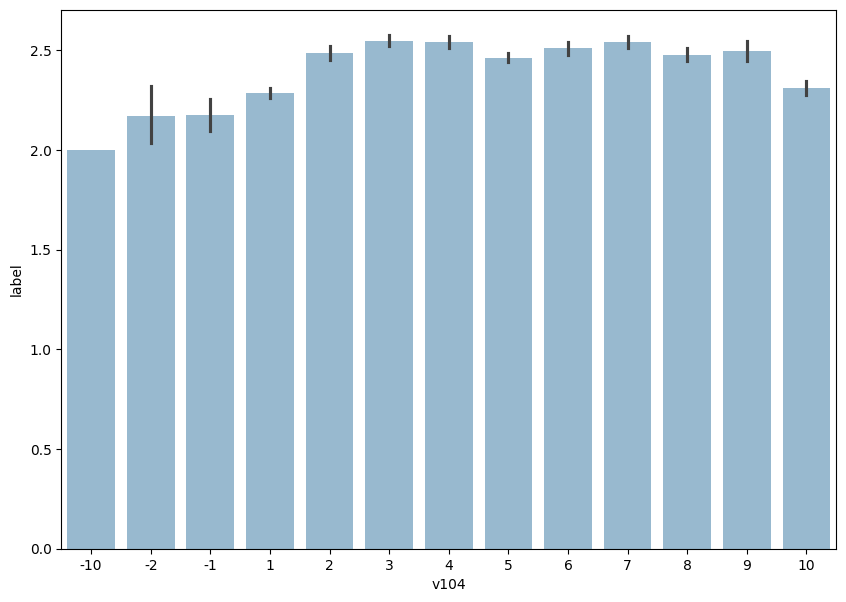

--------------------------------------------------
col: v105


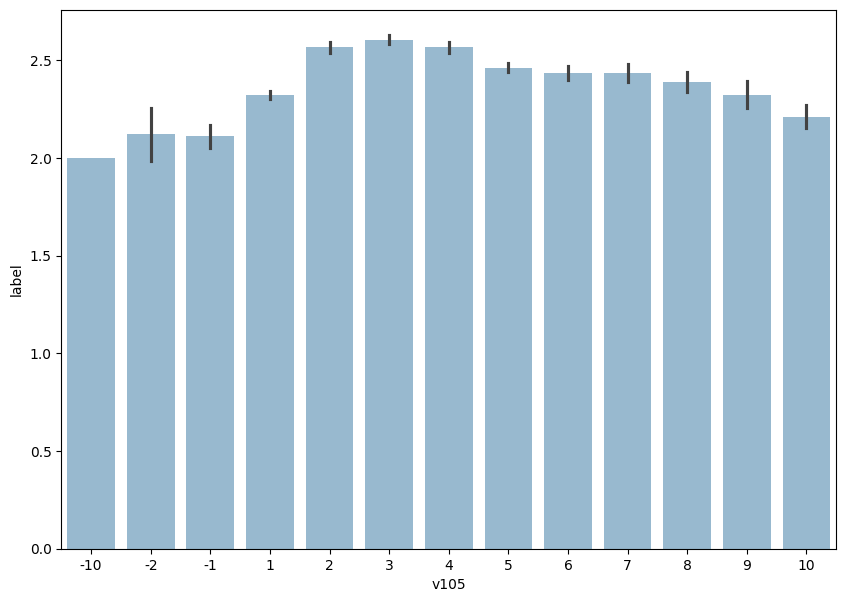

--------------------------------------------------
col: v106


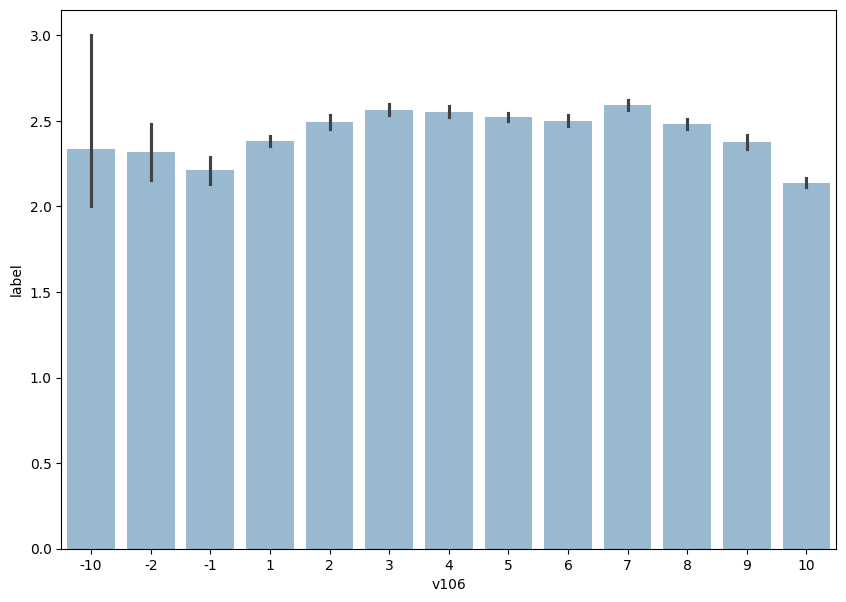

--------------------------------------------------
col: v107


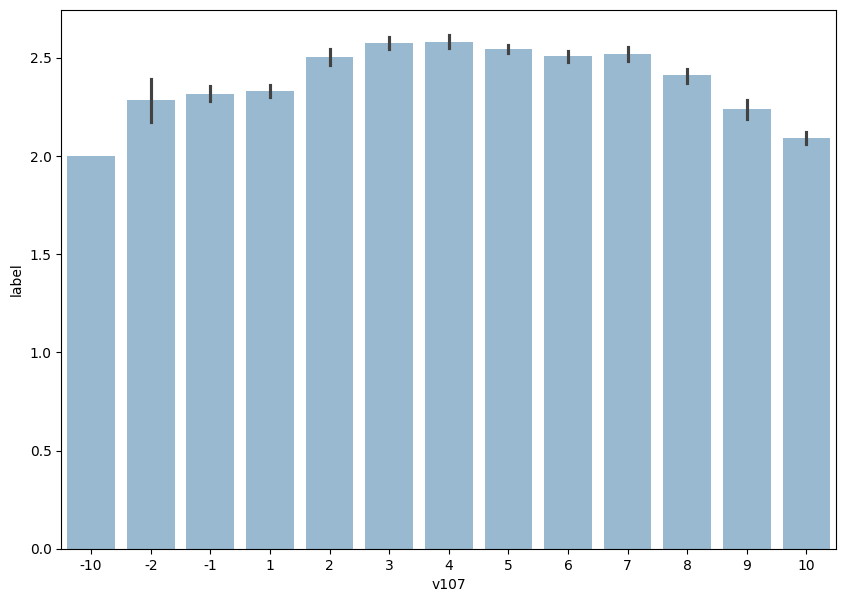

--------------------------------------------------
col: f108


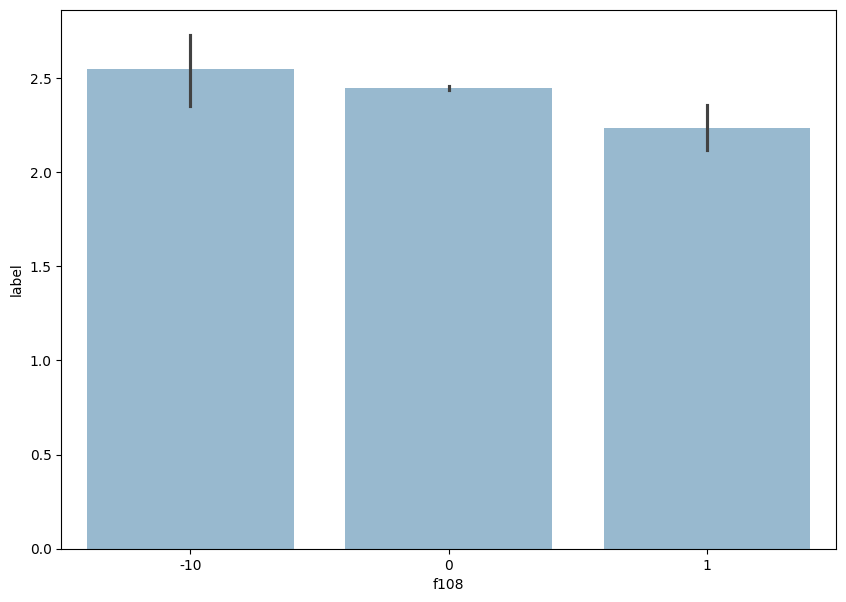

--------------------------------------------------
col: v108


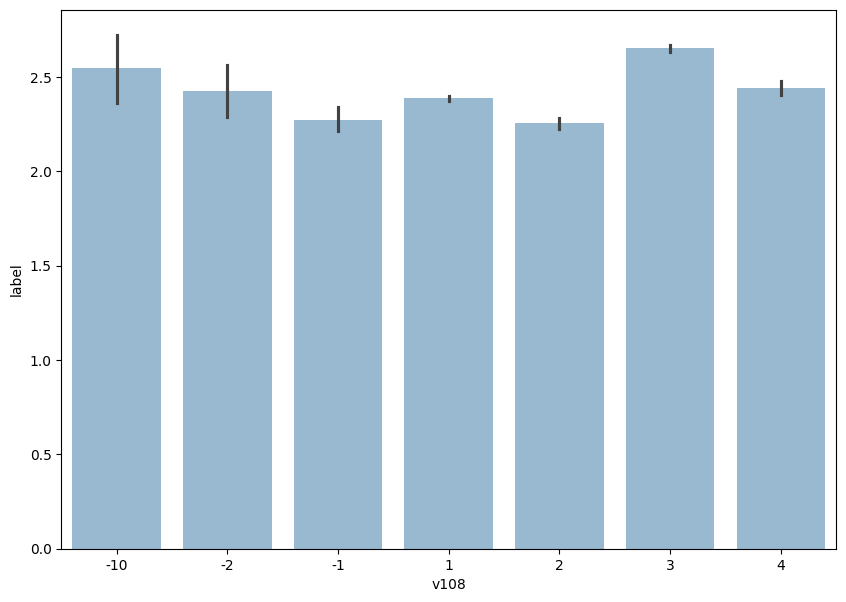

--------------------------------------------------
col: v109


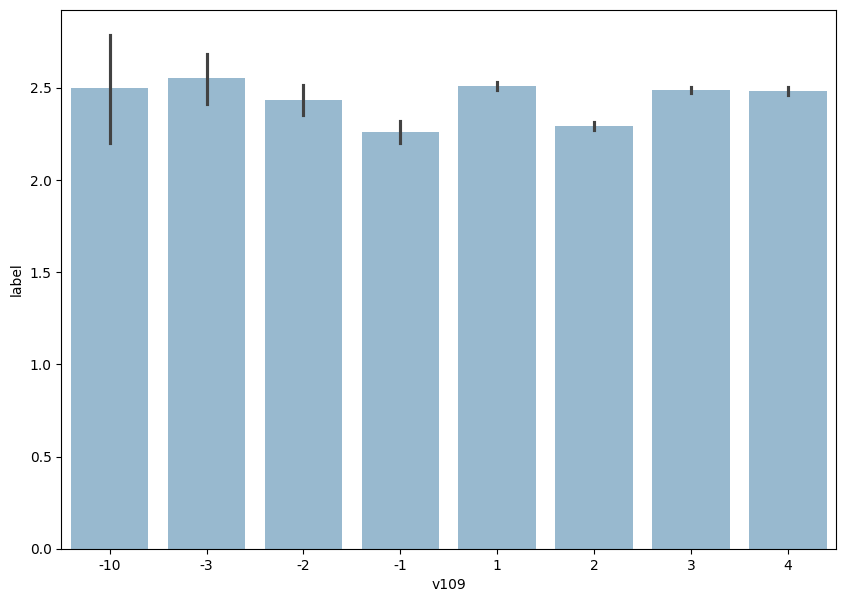

--------------------------------------------------
col: f110


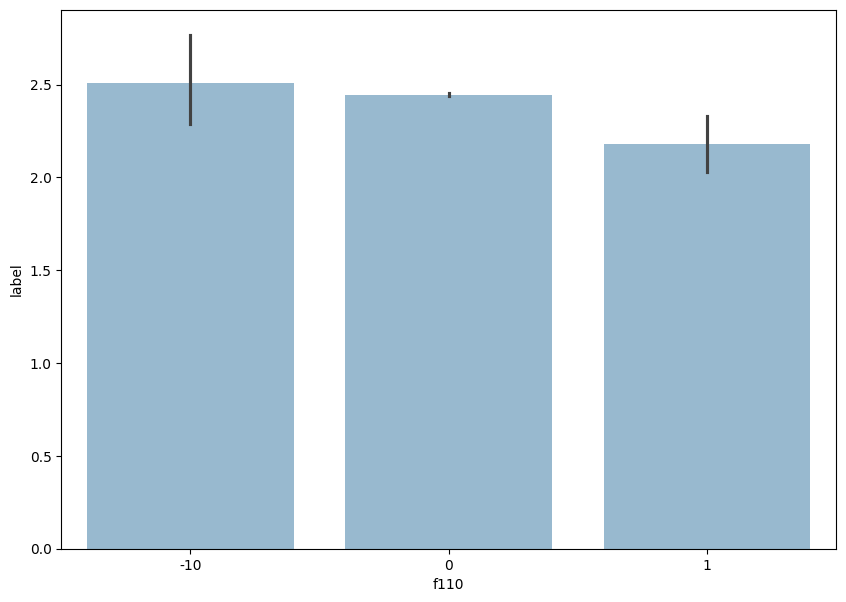

--------------------------------------------------
col: v110


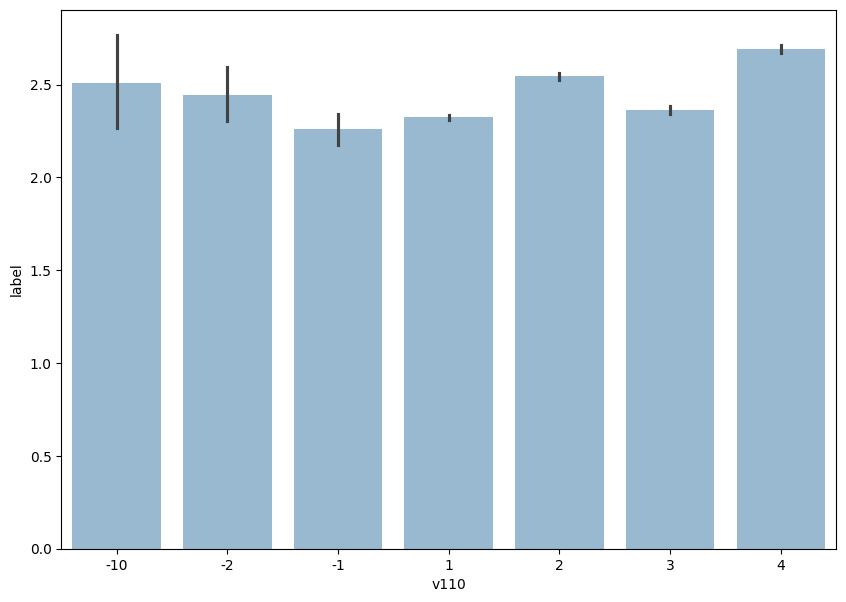

--------------------------------------------------
col: v111


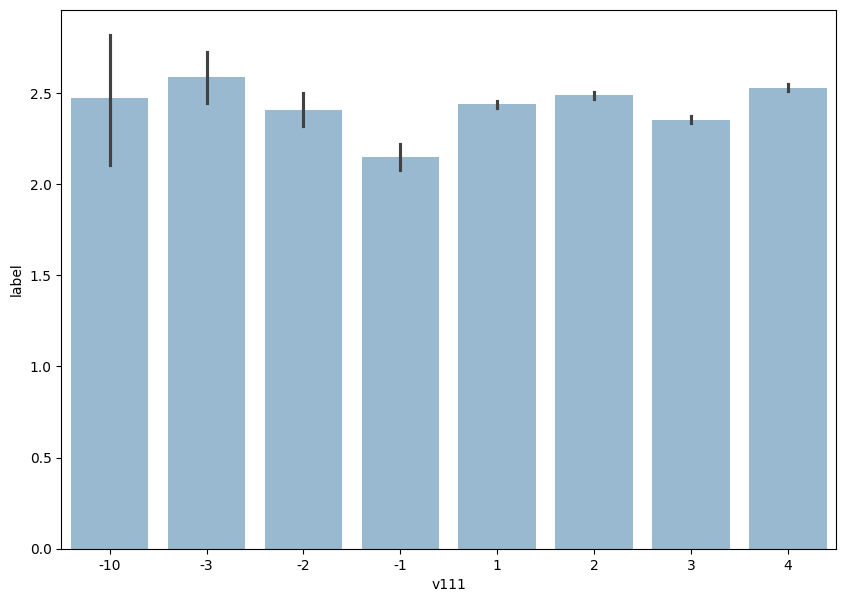

--------------------------------------------------
col: v111_4


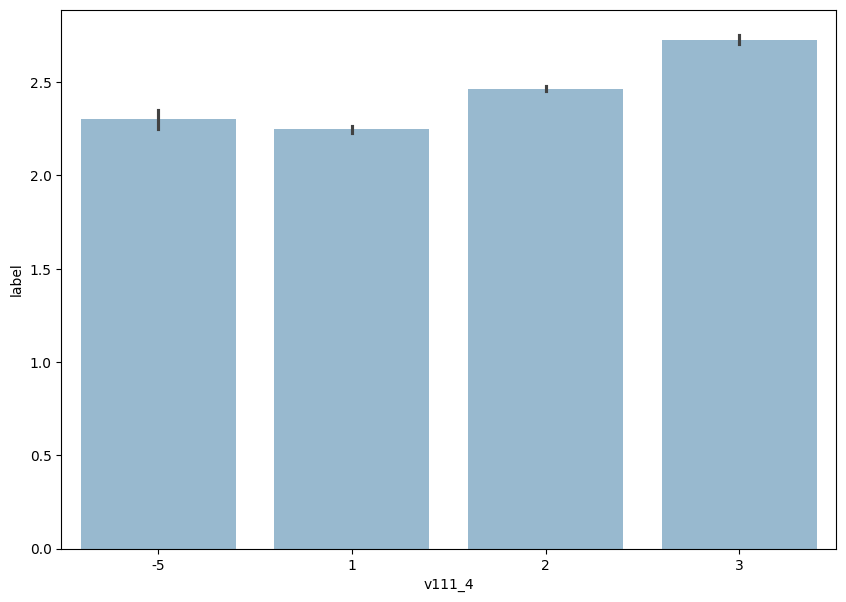

--------------------------------------------------
col: v112


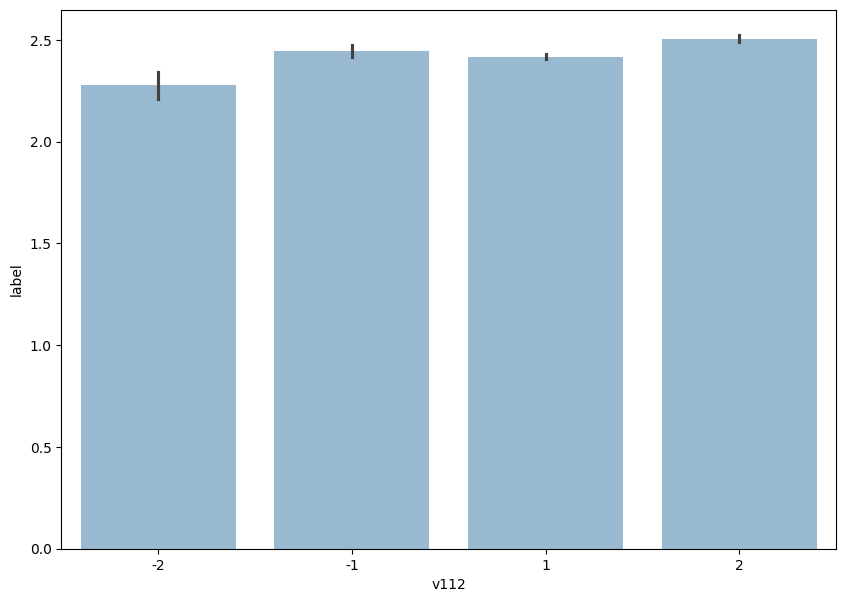

--------------------------------------------------
col: f112_SE


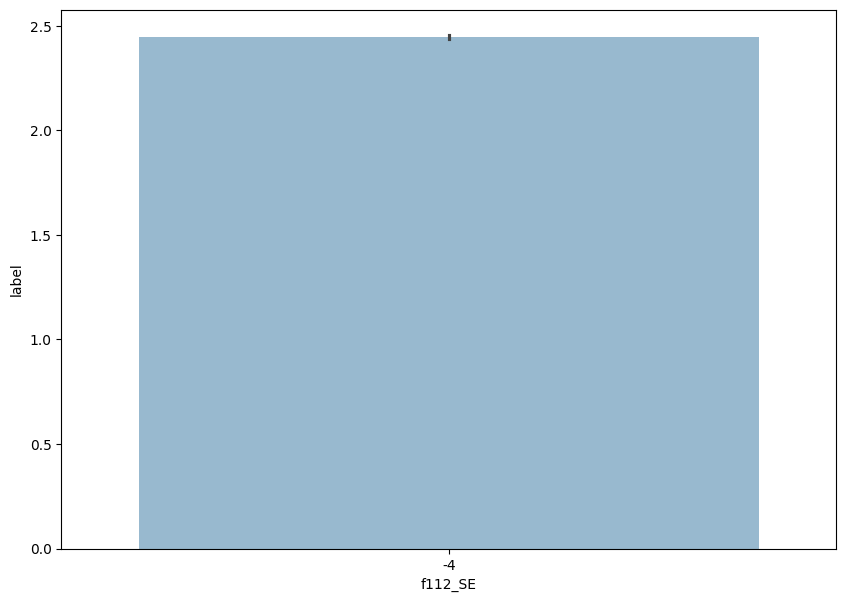

--------------------------------------------------
col: v113


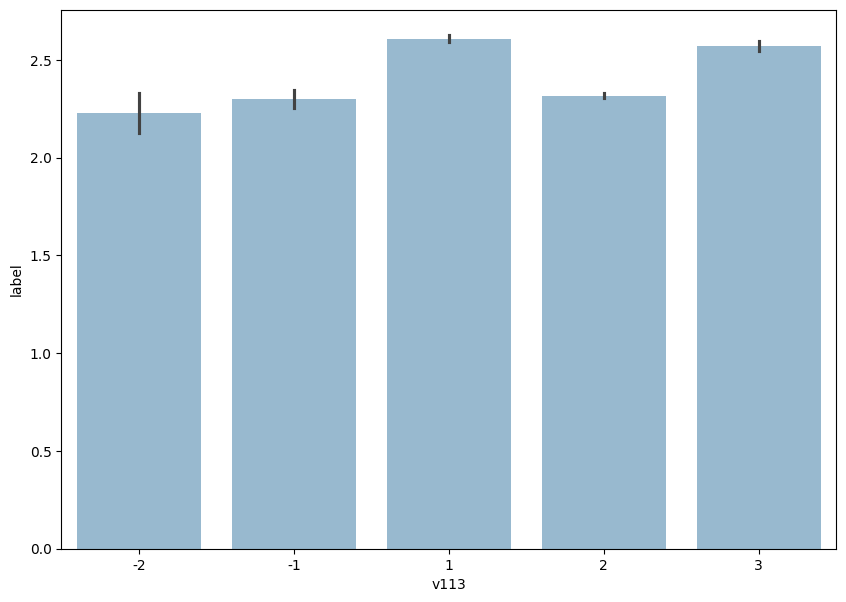

--------------------------------------------------
col: v114


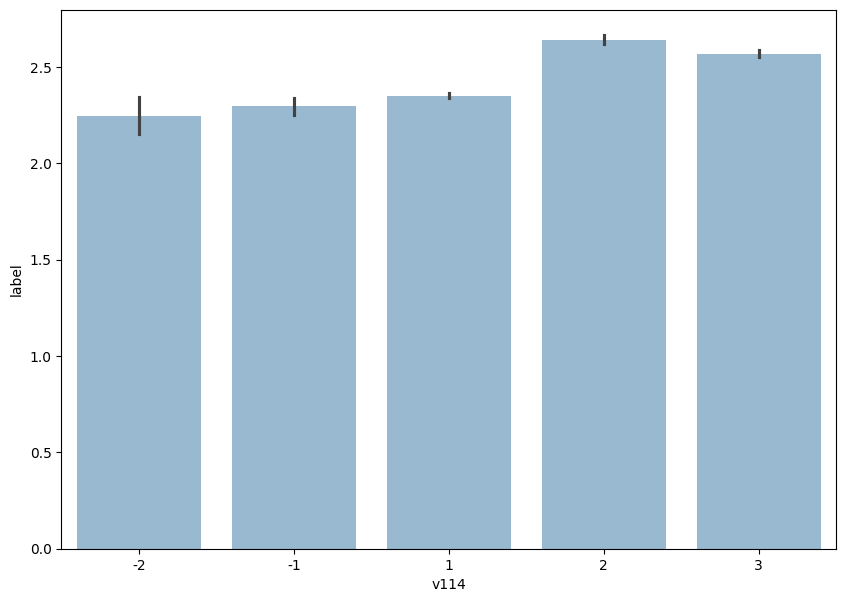

--------------------------------------------------
col: v115


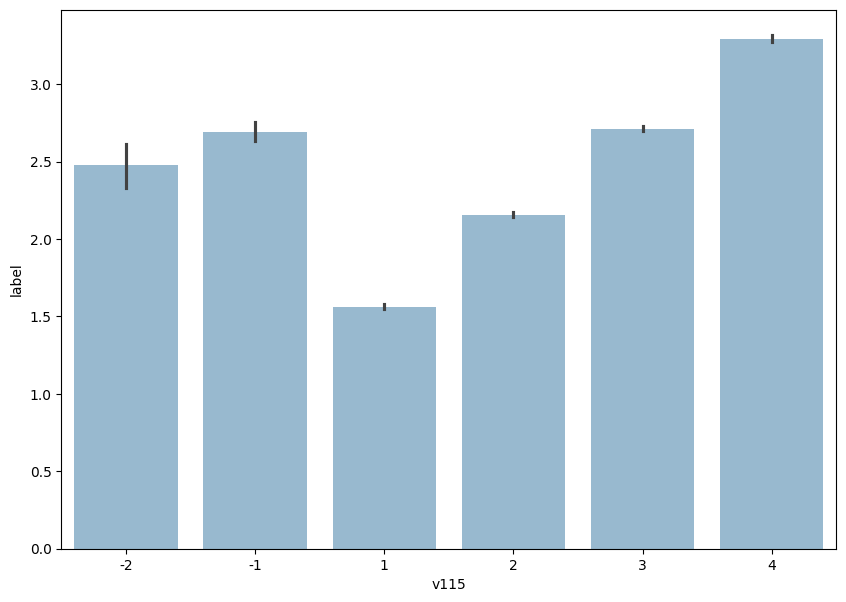

--------------------------------------------------
col: v116


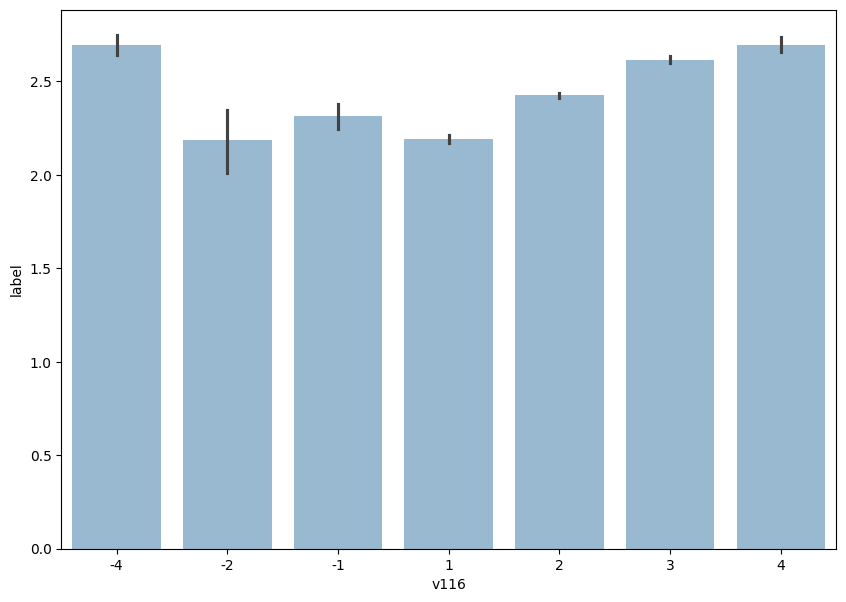

--------------------------------------------------
col: v117


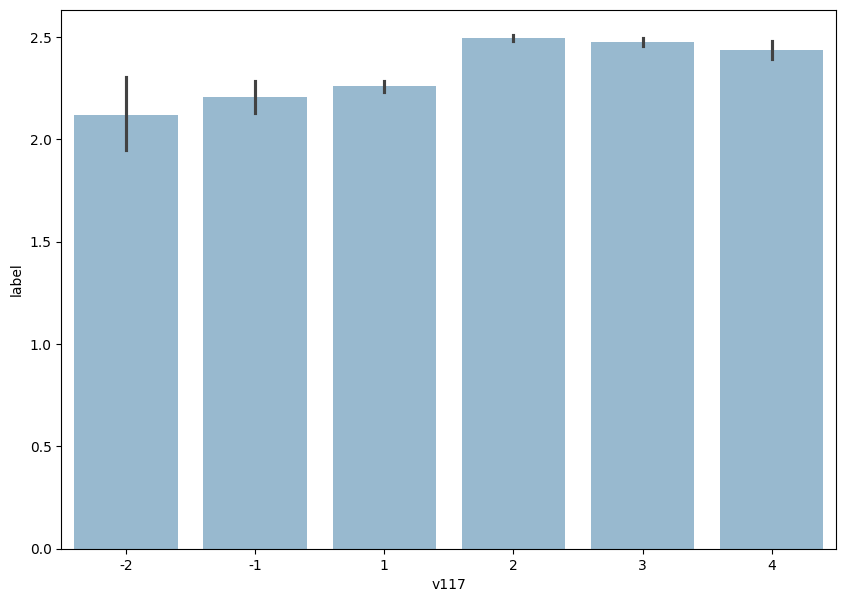

--------------------------------------------------
col: v118


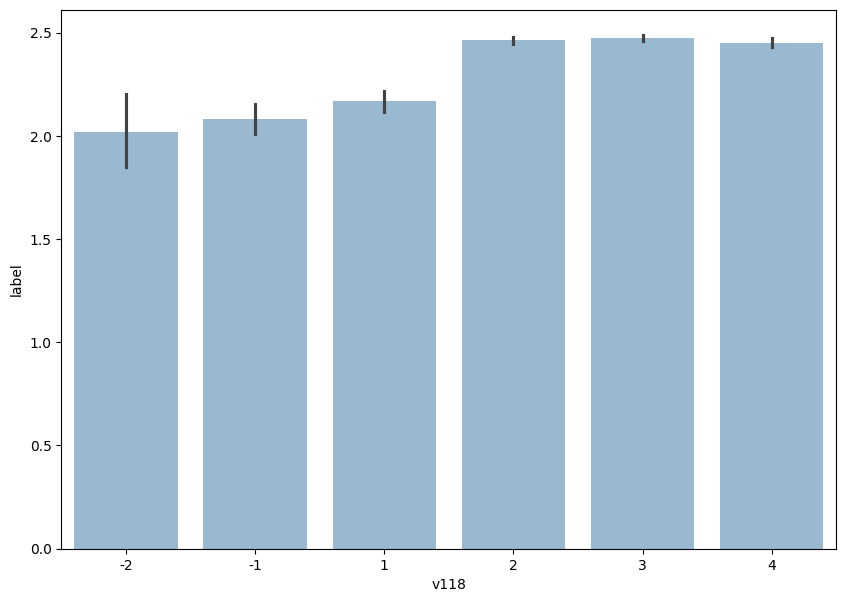

--------------------------------------------------
col: v119


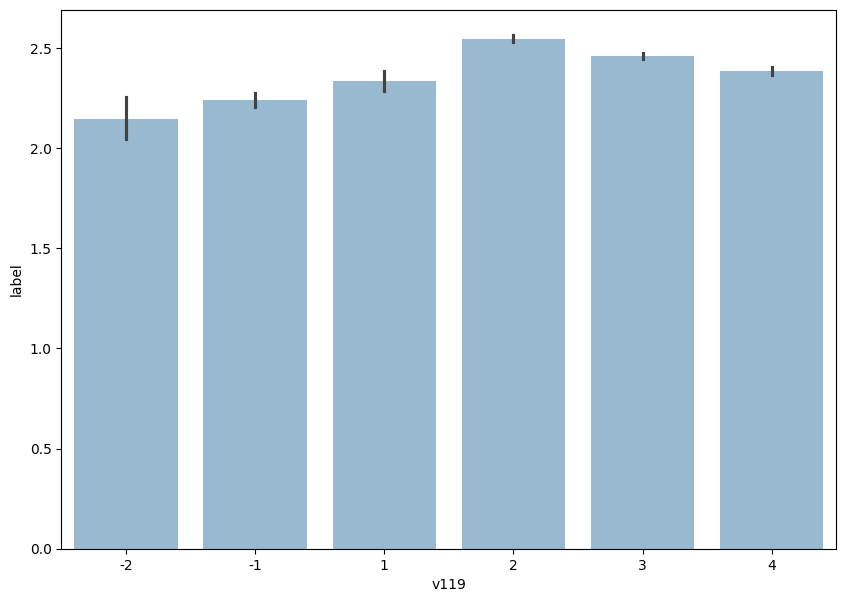

--------------------------------------------------
col: v120


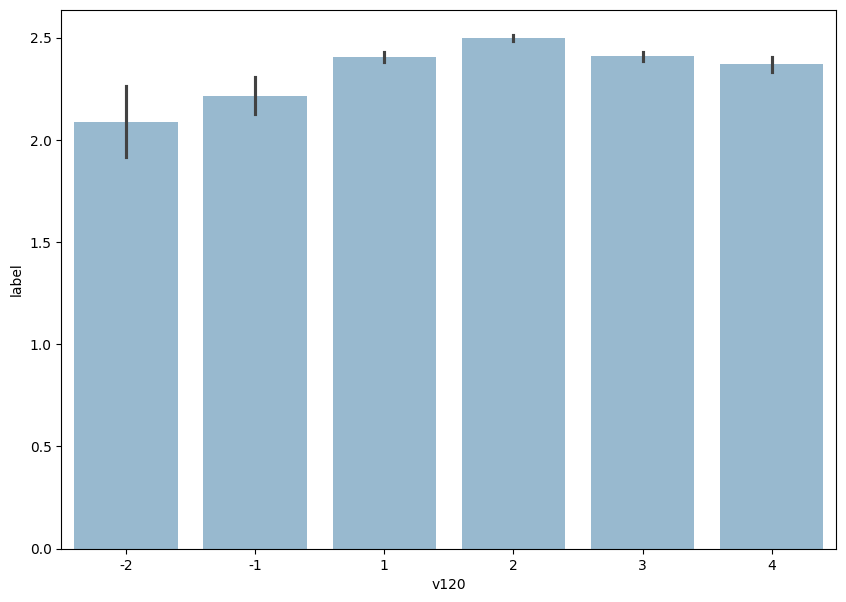

--------------------------------------------------
col: v121


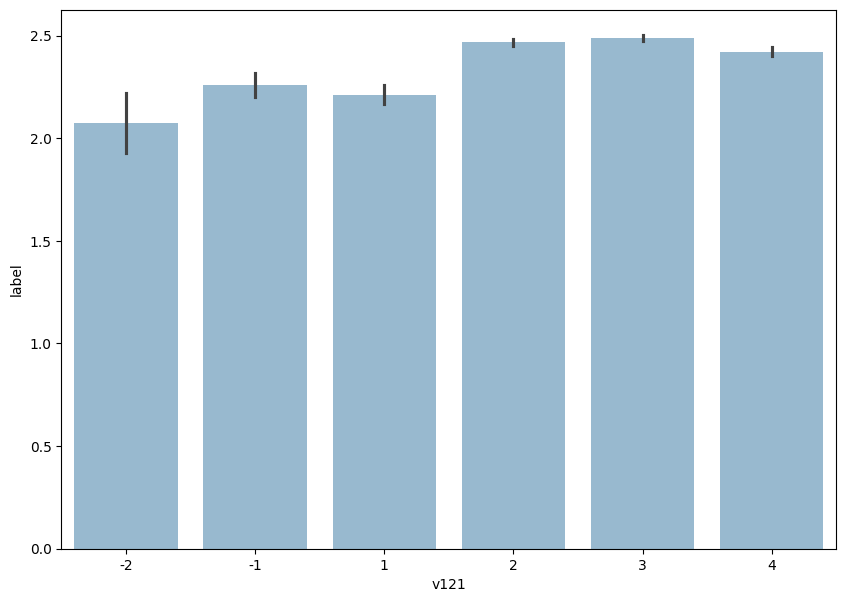

--------------------------------------------------
col: v122


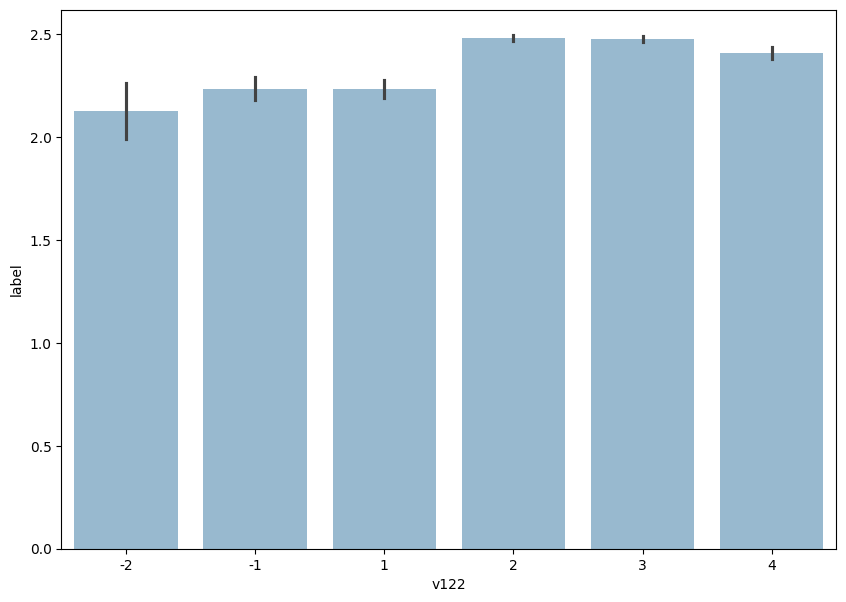

--------------------------------------------------
col: v123


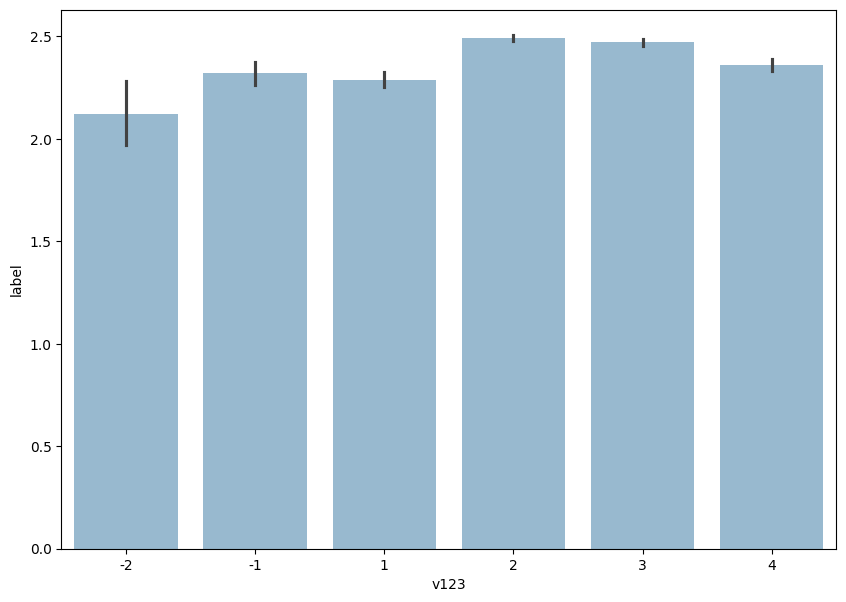

--------------------------------------------------
col: v124


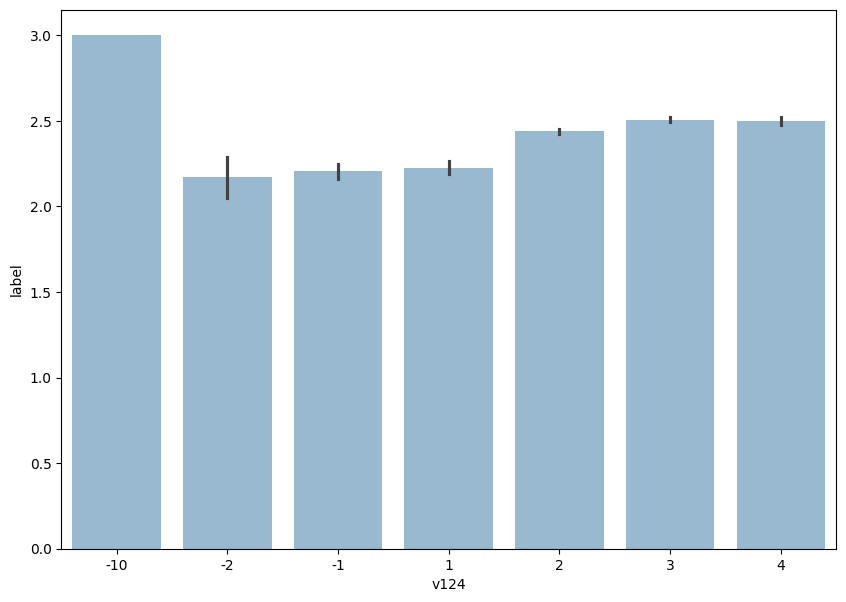

--------------------------------------------------
col: v125


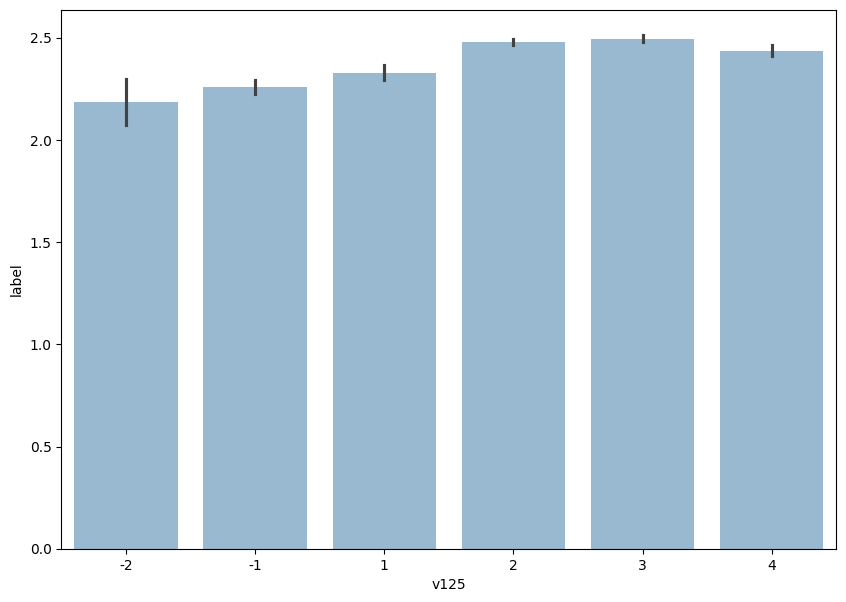

--------------------------------------------------
col: v126


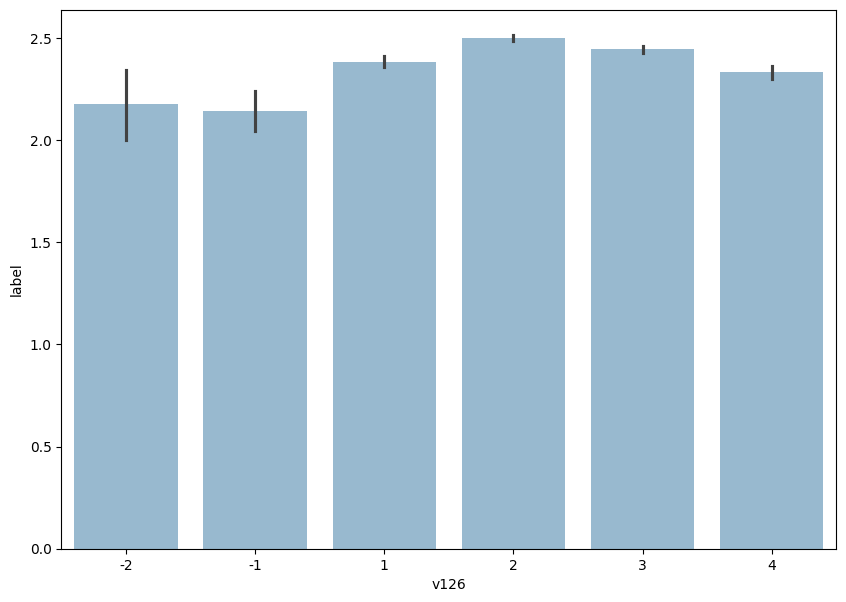

--------------------------------------------------
col: v127


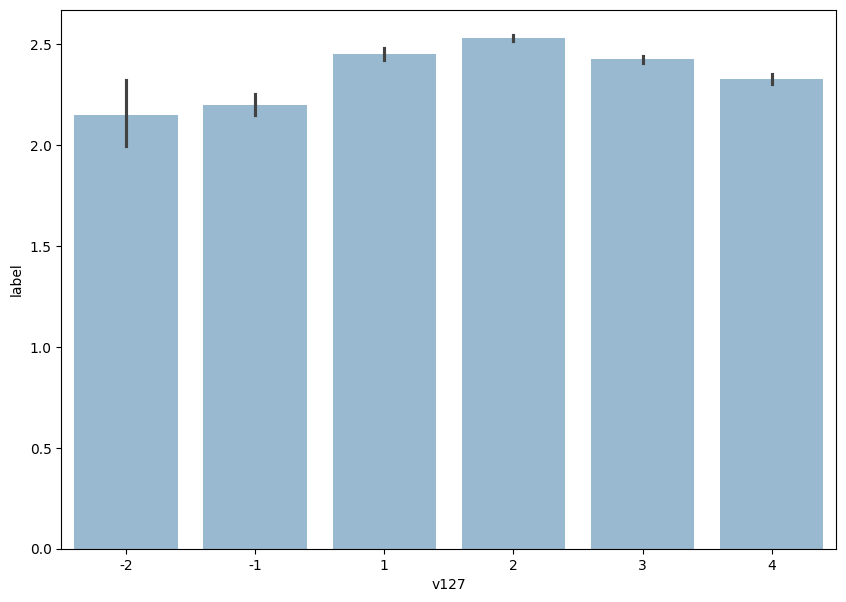

--------------------------------------------------
col: v128


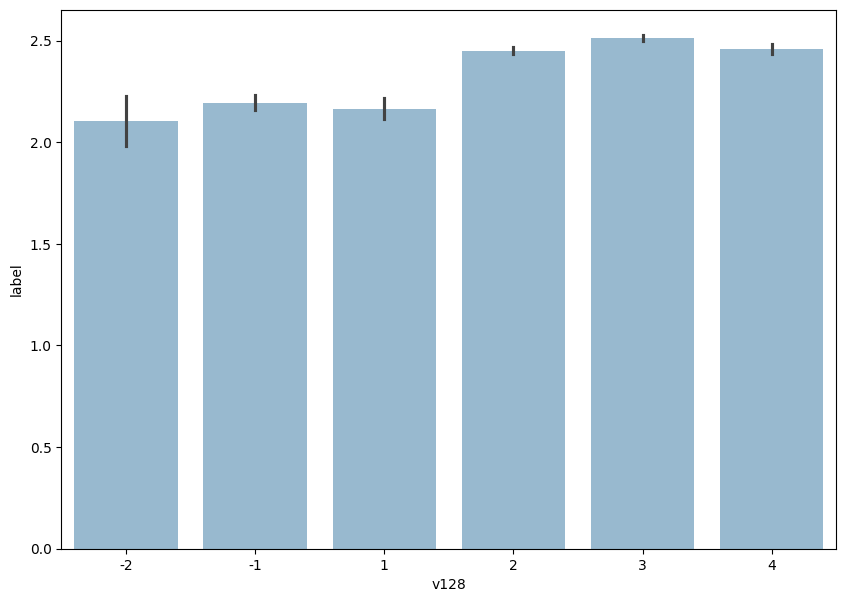

--------------------------------------------------
col: v129


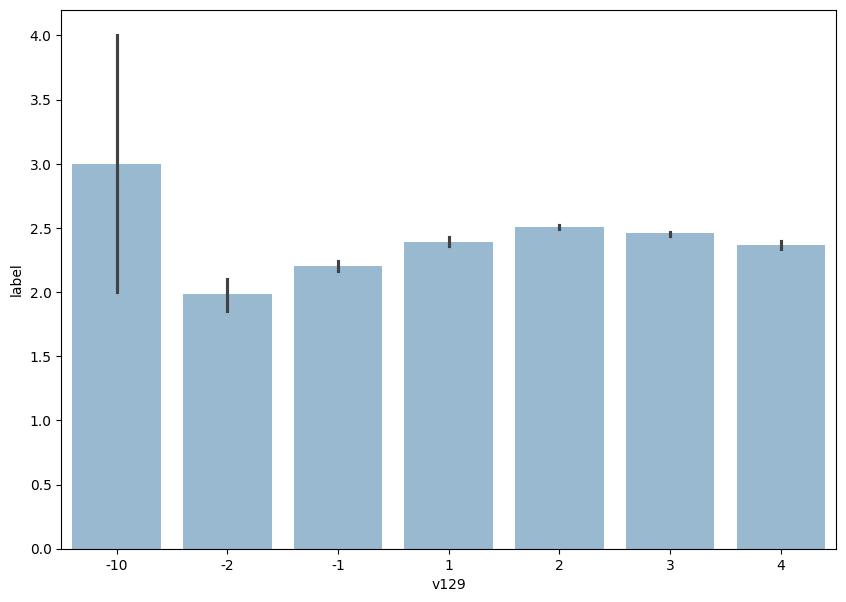

--------------------------------------------------
col: v130


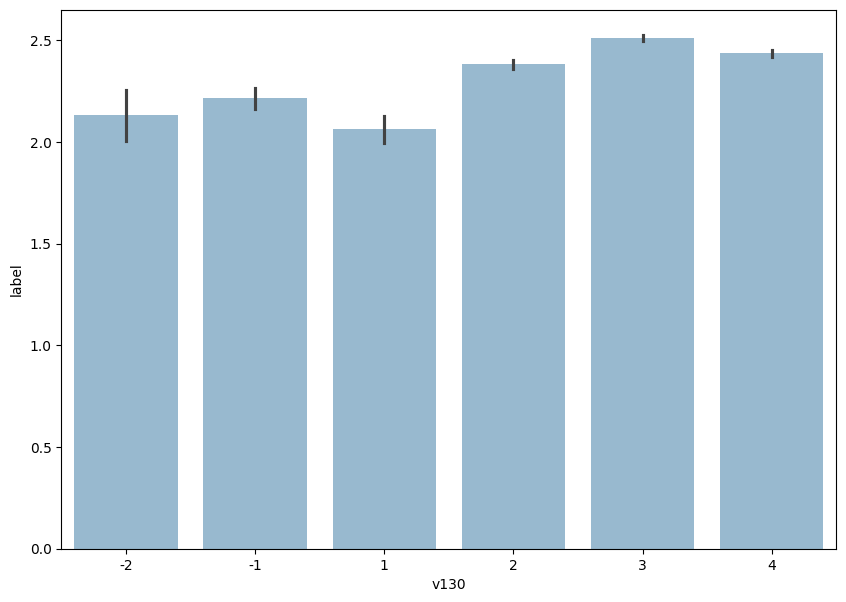

--------------------------------------------------
col: v131


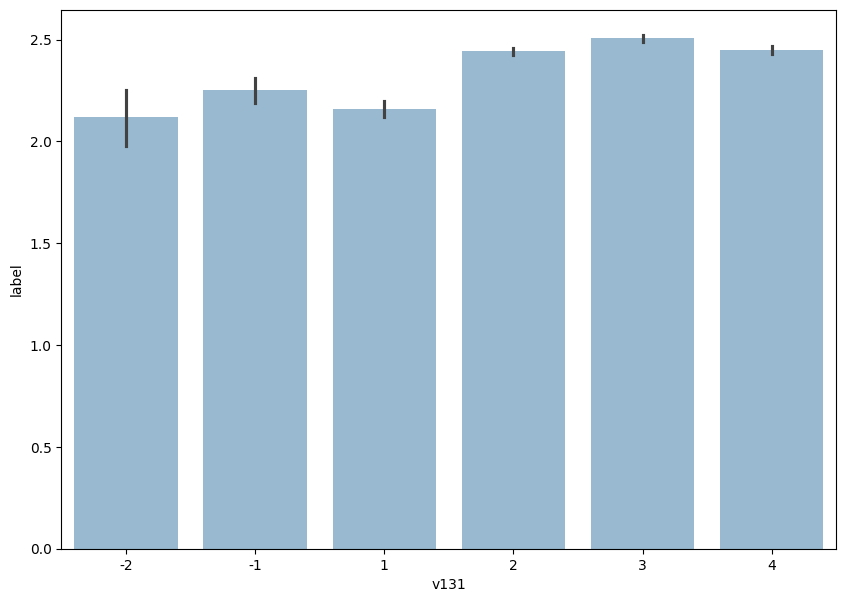

--------------------------------------------------
col: v132


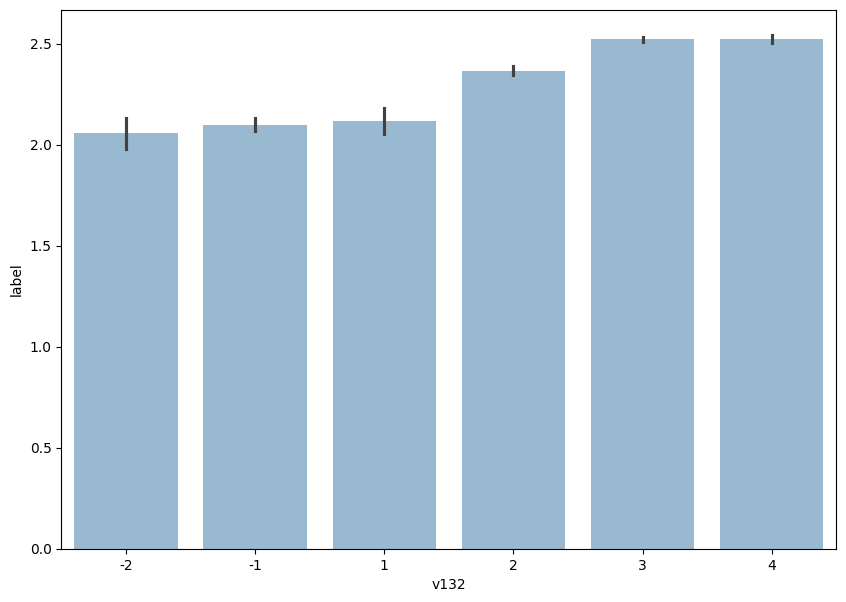

--------------------------------------------------
col: v133


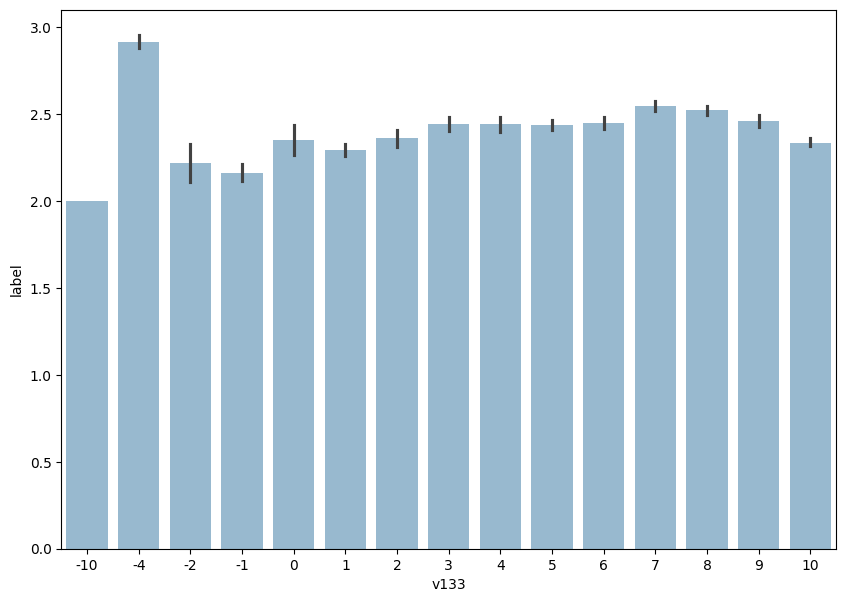

--------------------------------------------------
col: v133_11c


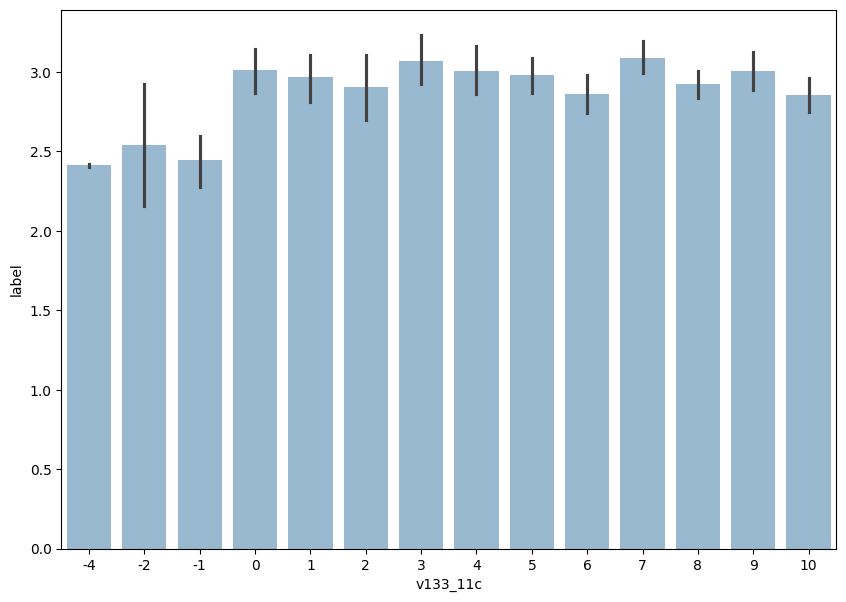

--------------------------------------------------
col: v134


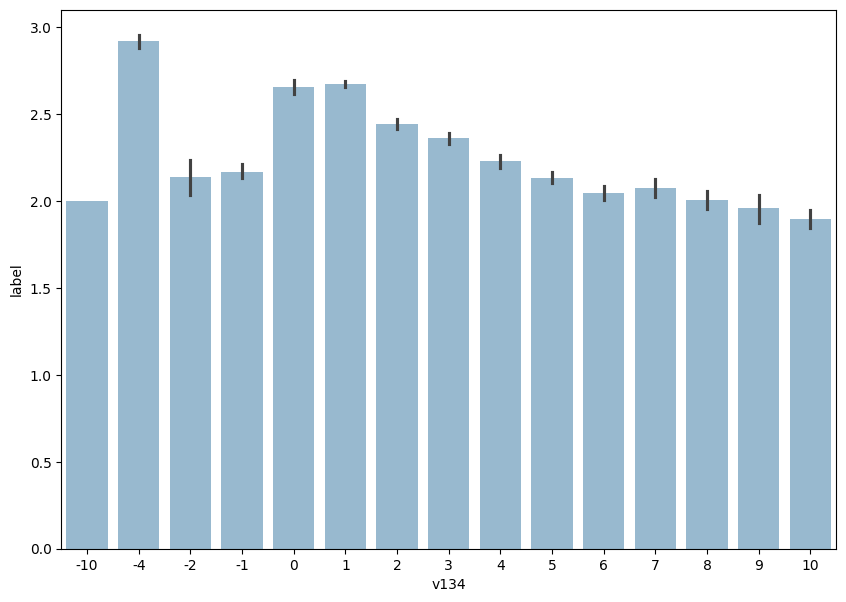

--------------------------------------------------
col: v134_11c


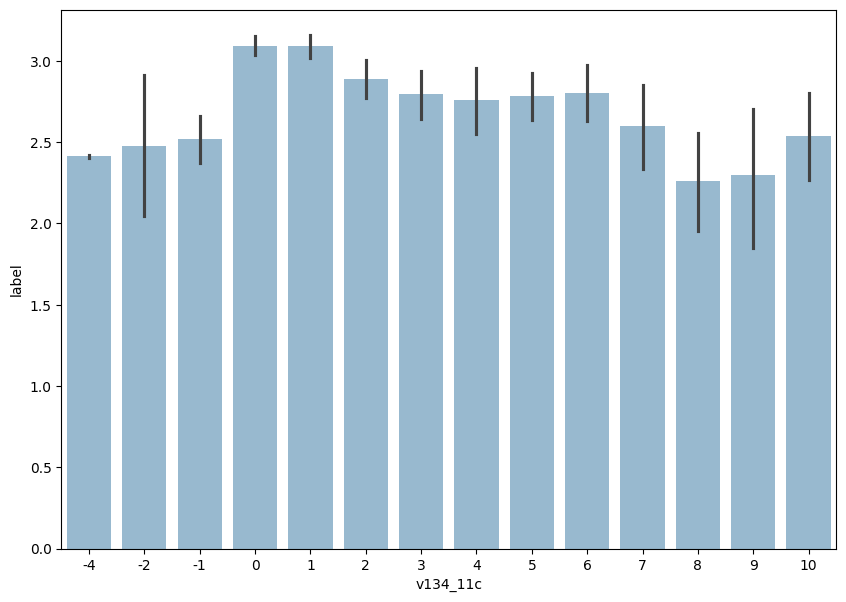

--------------------------------------------------
col: v135


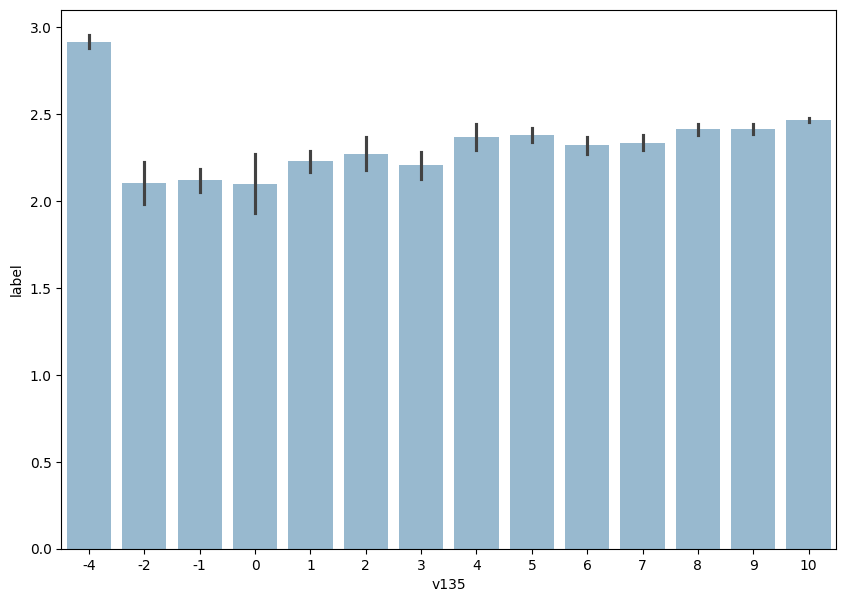

--------------------------------------------------
col: v136


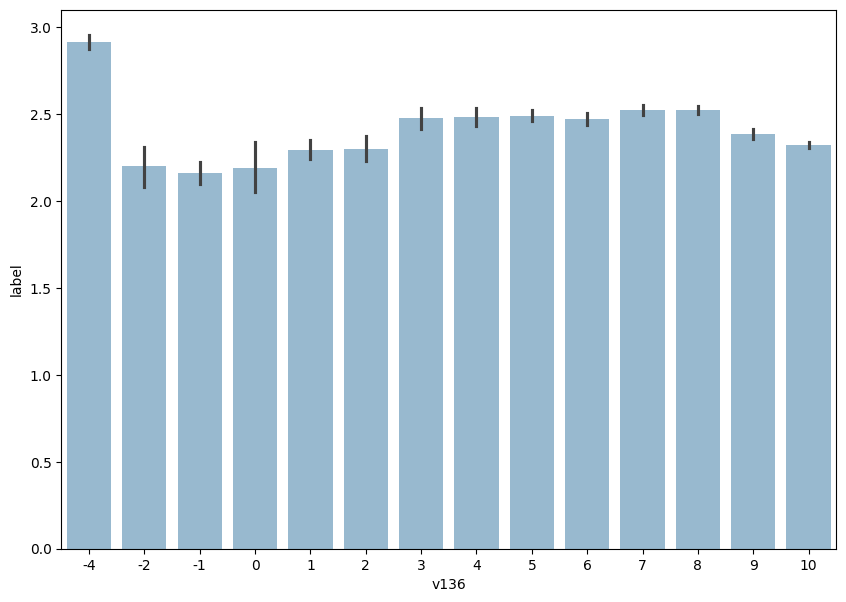

--------------------------------------------------
col: v137


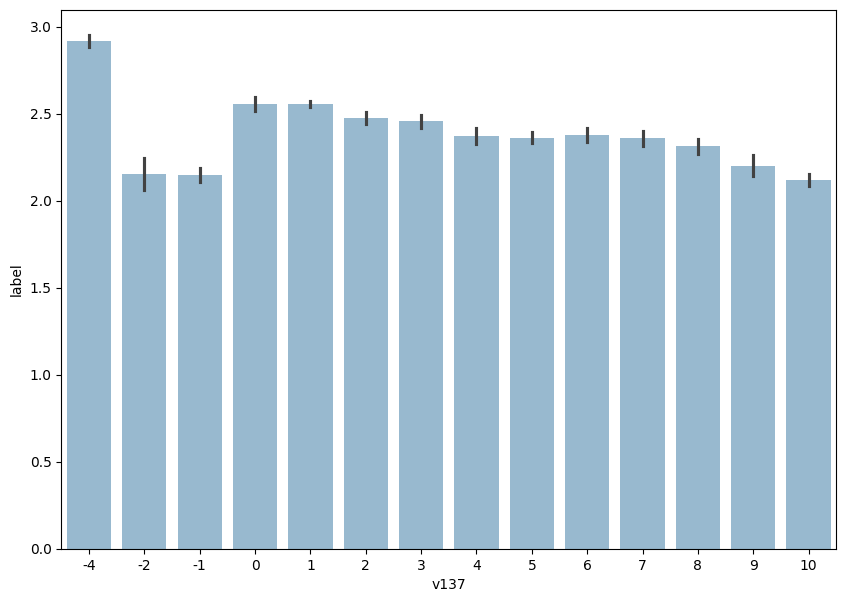

--------------------------------------------------
col: v137_11c


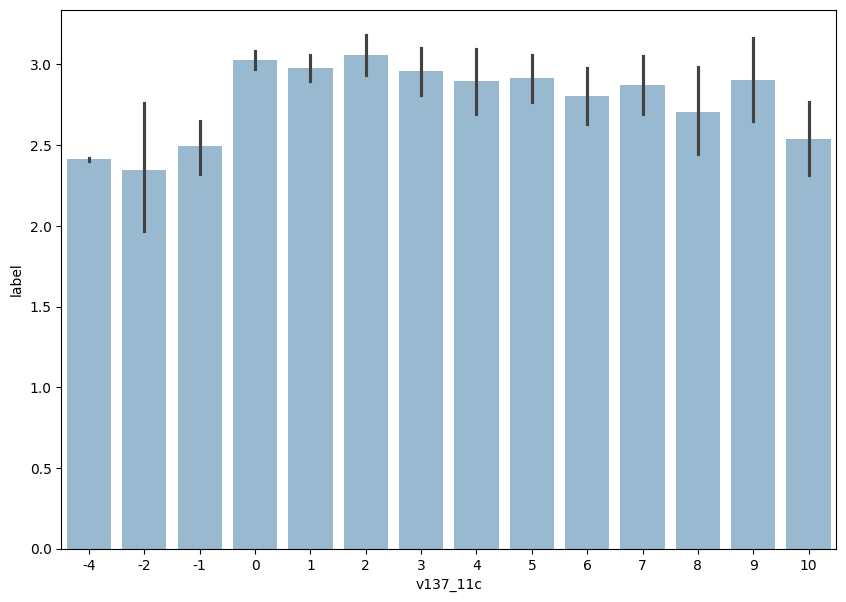

--------------------------------------------------
col: v138


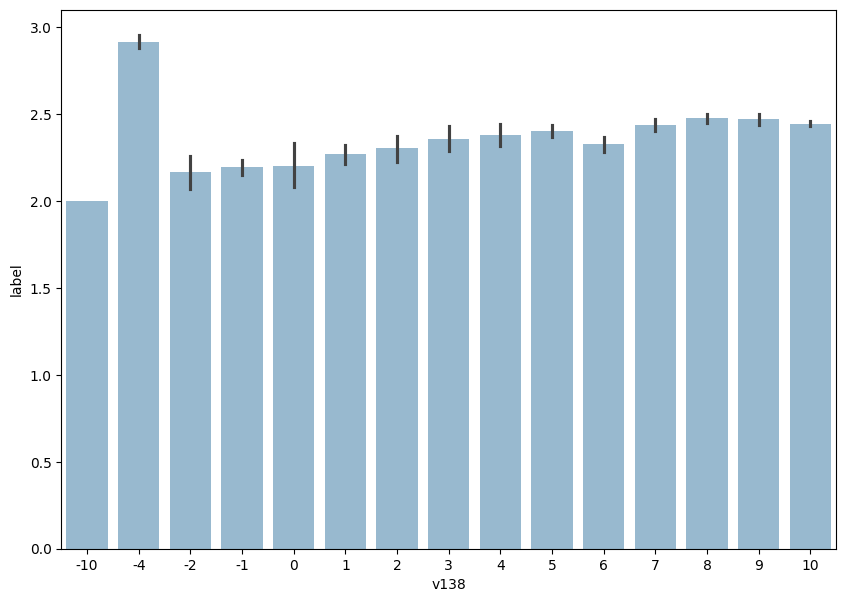

--------------------------------------------------
col: v138_11c


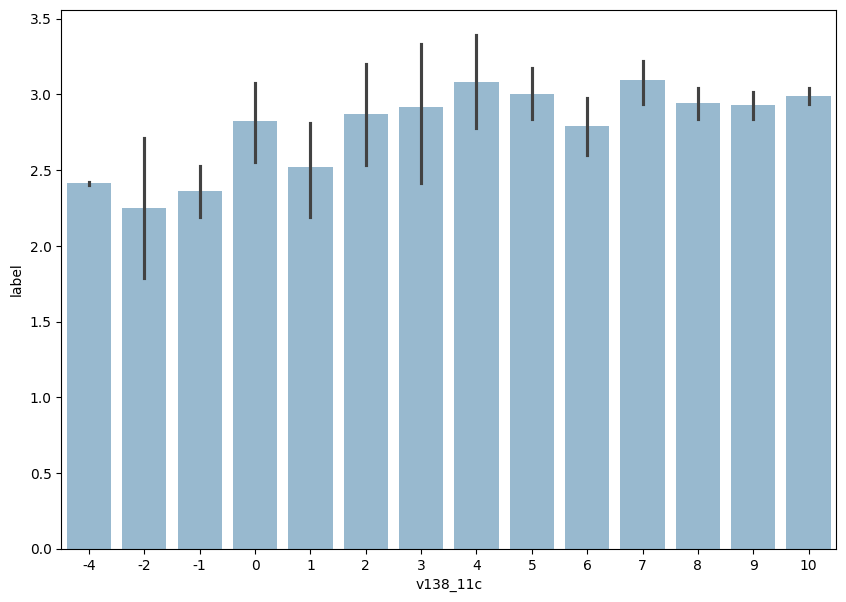

--------------------------------------------------
col: v139


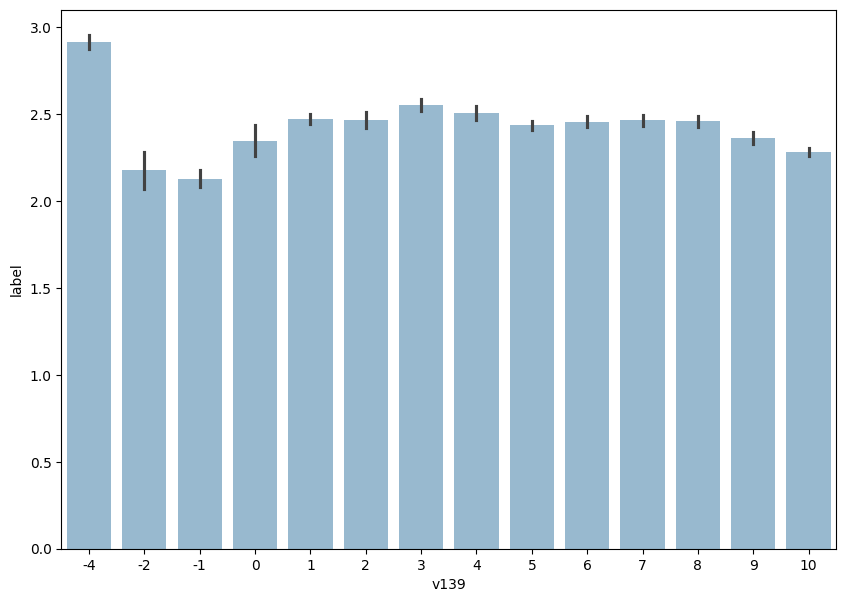

--------------------------------------------------
col: v139_11c


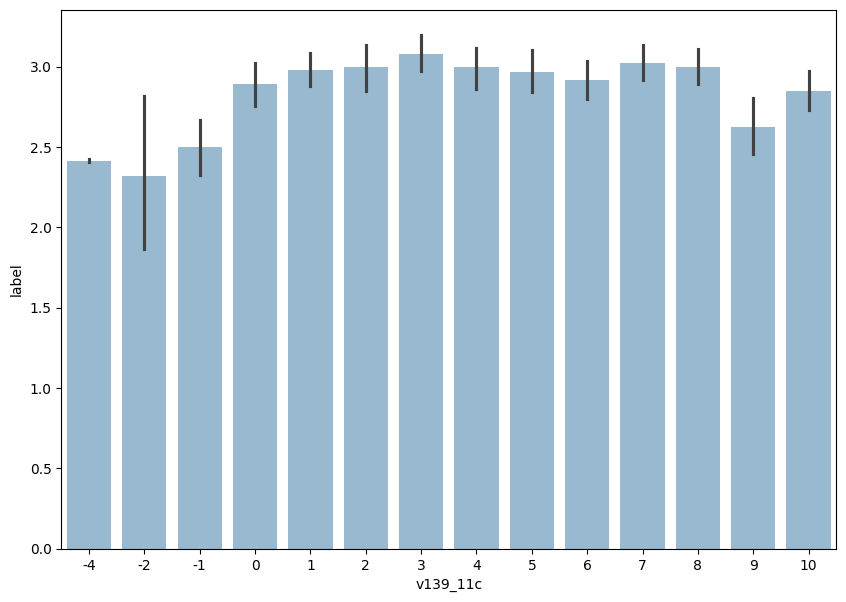

--------------------------------------------------
col: v140


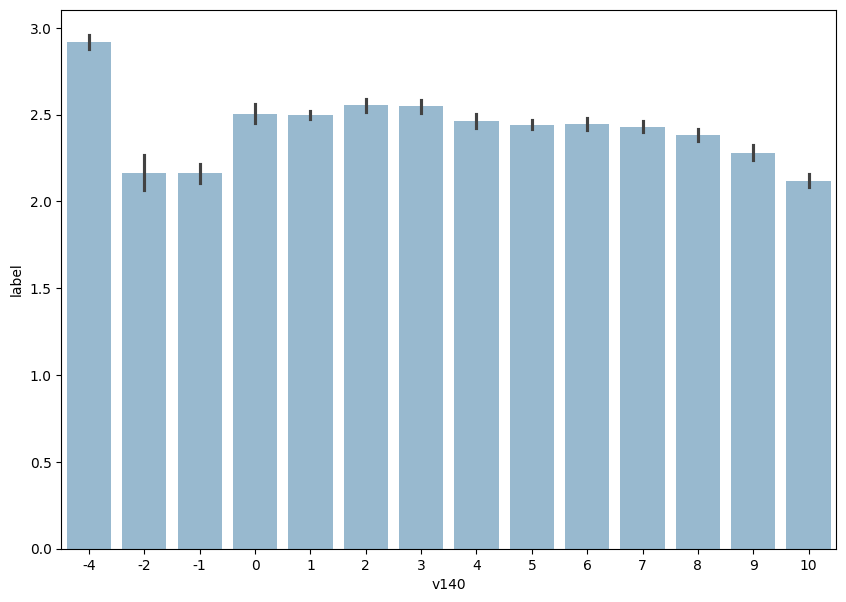

--------------------------------------------------
col: v140_11c


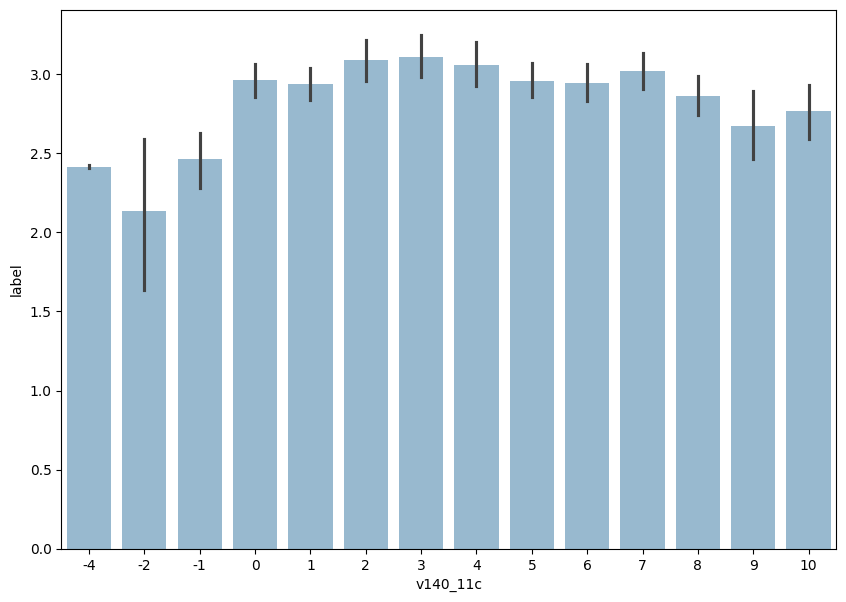

--------------------------------------------------
col: v141


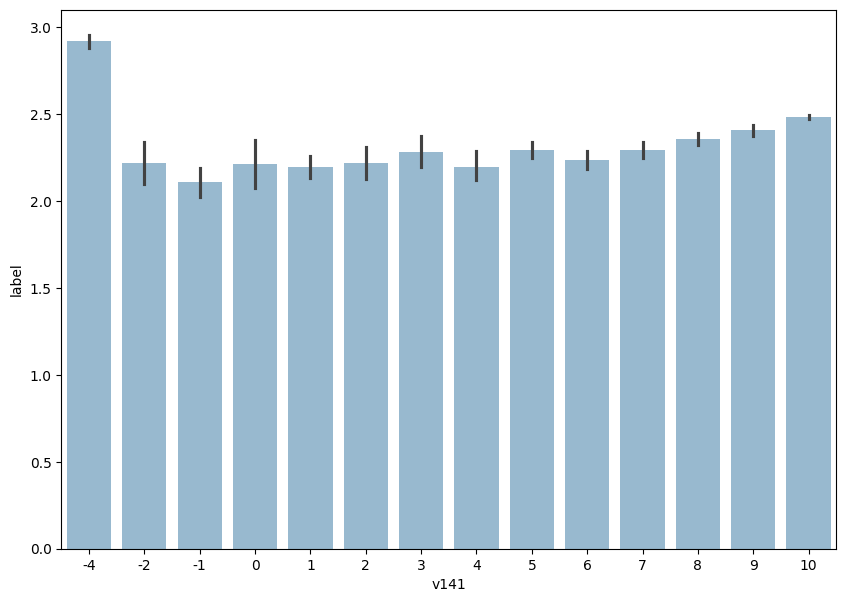

--------------------------------------------------
col: v142


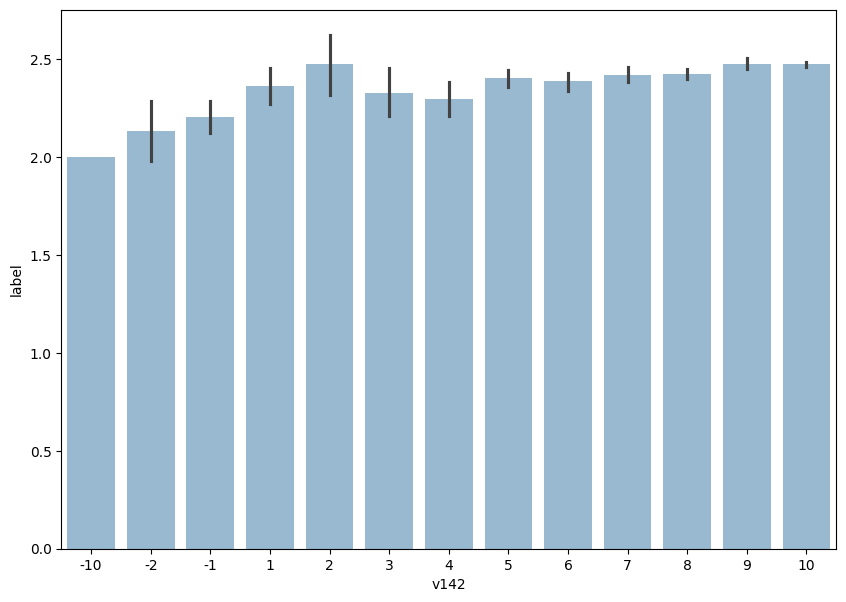

--------------------------------------------------
col: v143


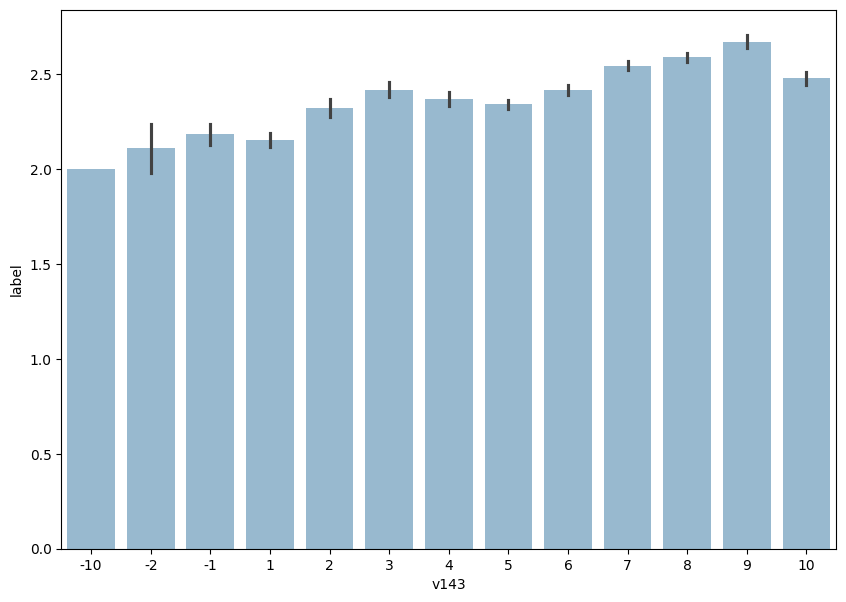

--------------------------------------------------
col: v144


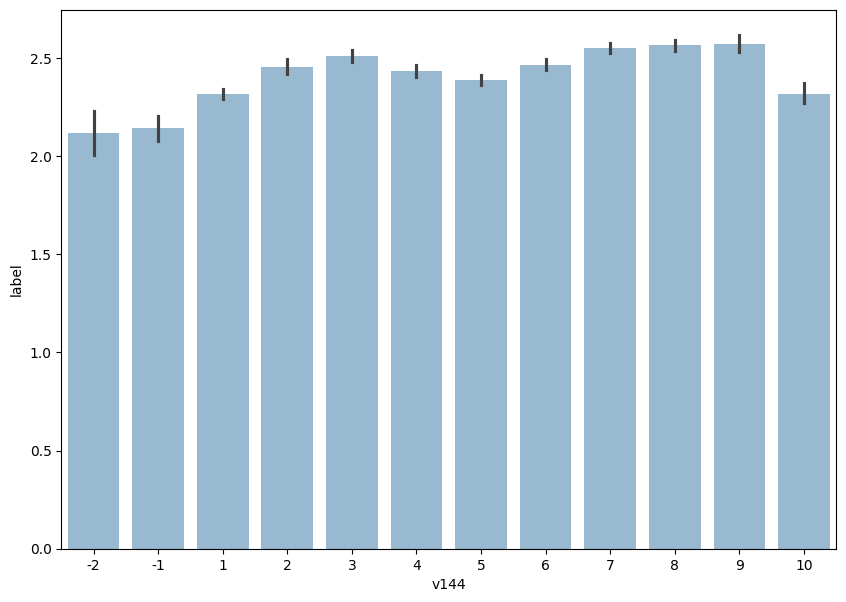

--------------------------------------------------
col: v145


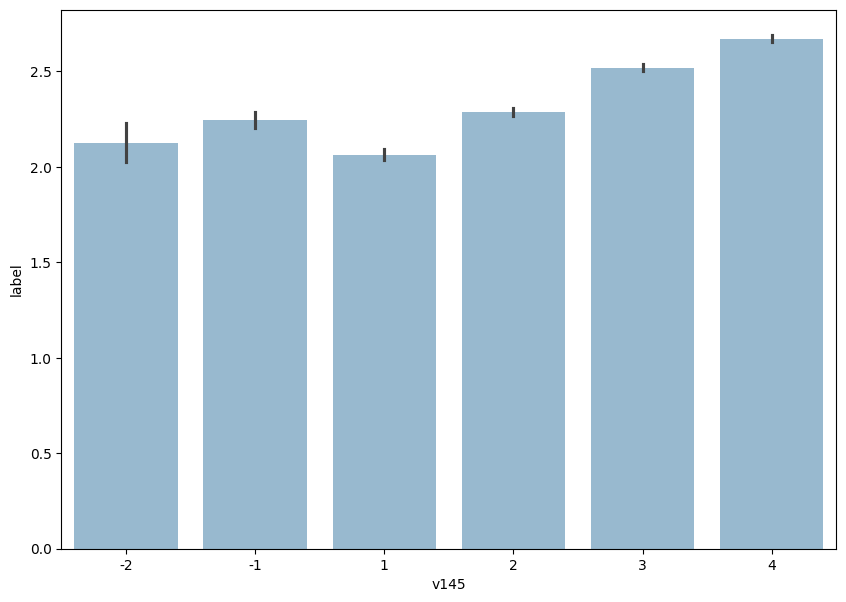

--------------------------------------------------
col: v146


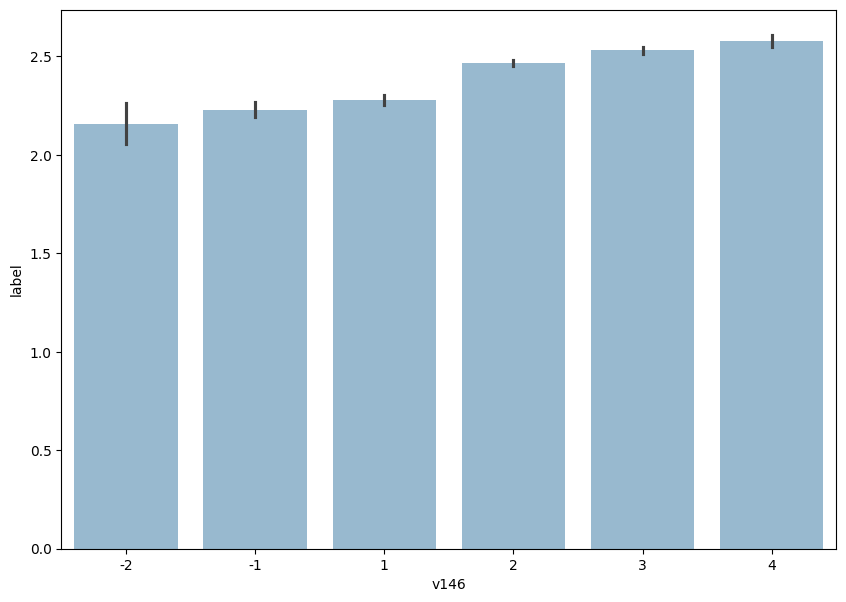

--------------------------------------------------
col: v147


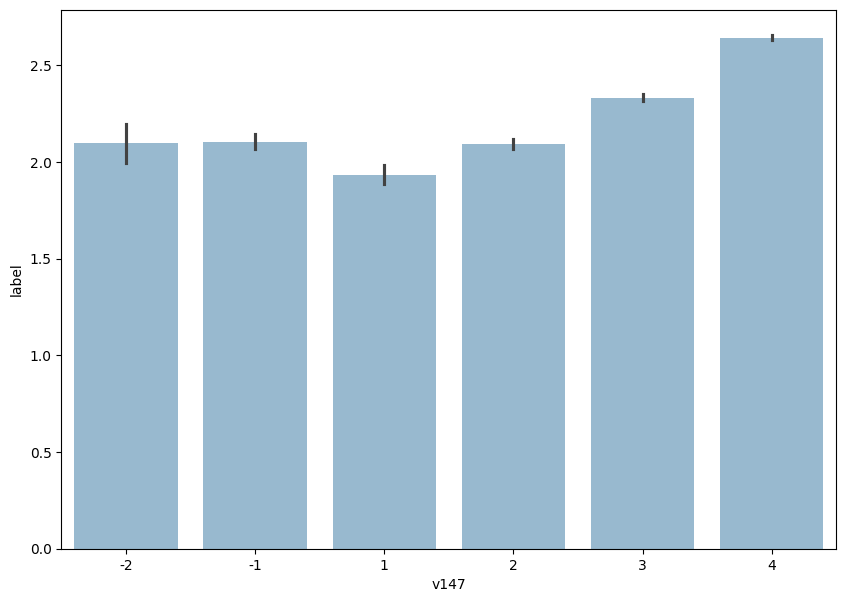

--------------------------------------------------
col: v148


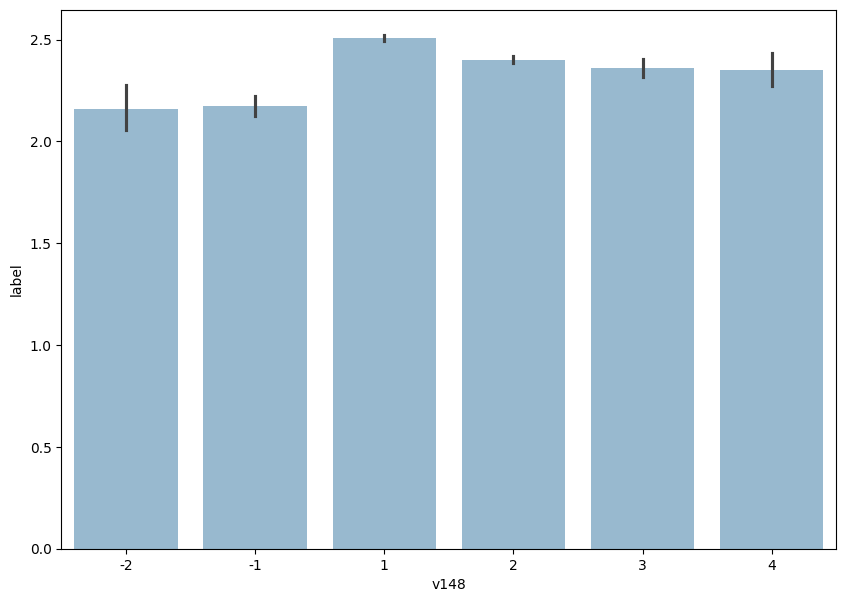

--------------------------------------------------
col: v149


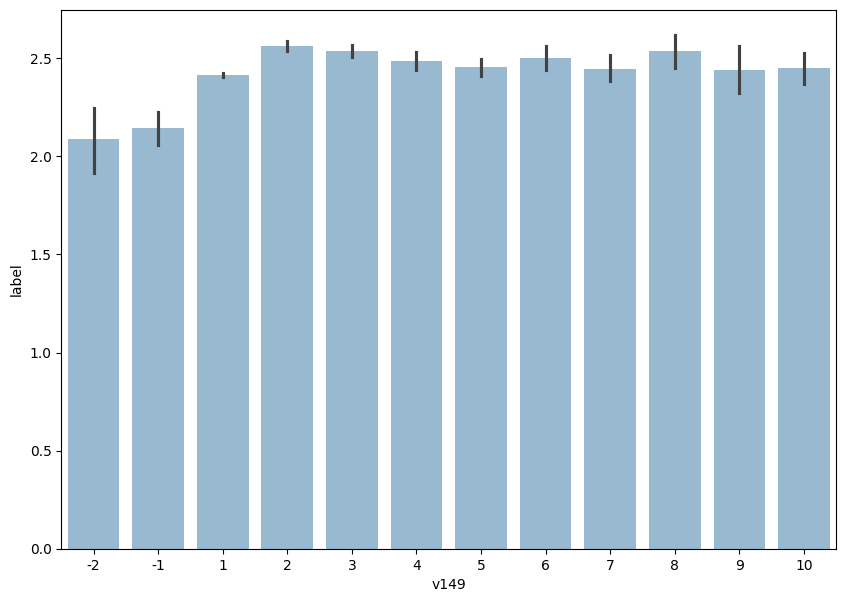

--------------------------------------------------
col: v150


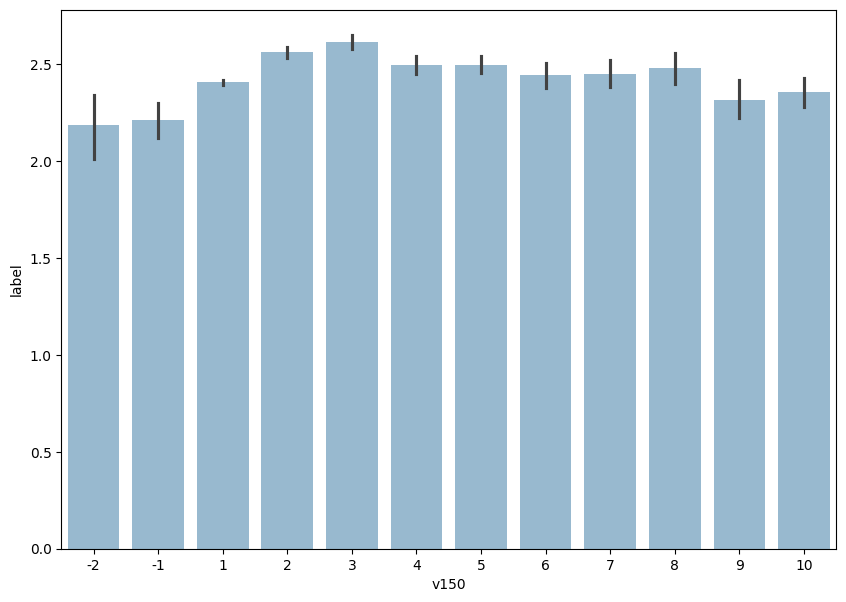

--------------------------------------------------
col: v151


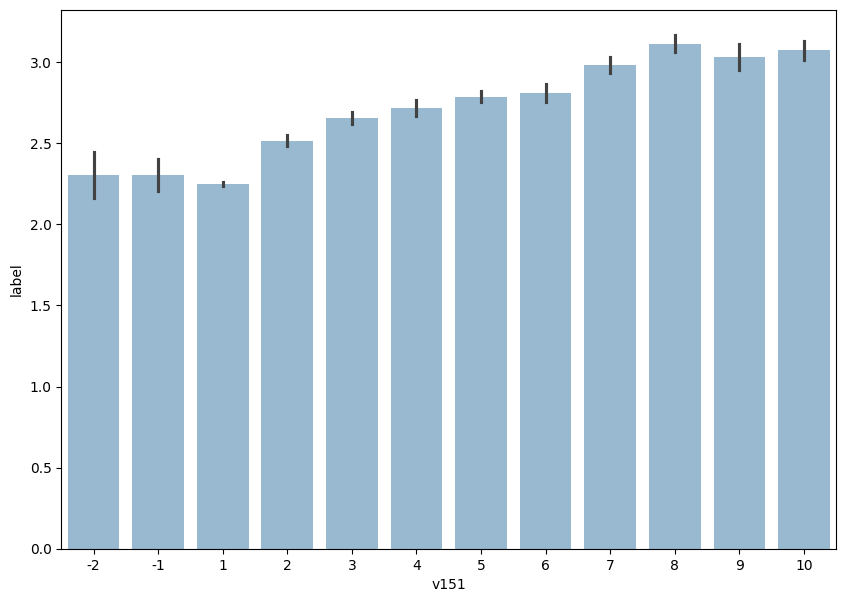

--------------------------------------------------
col: v152


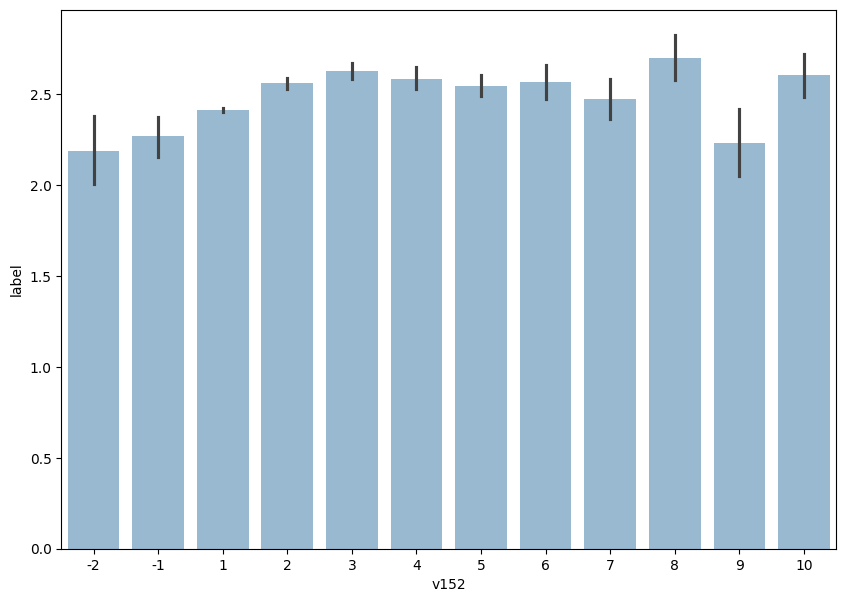

--------------------------------------------------
col: v153


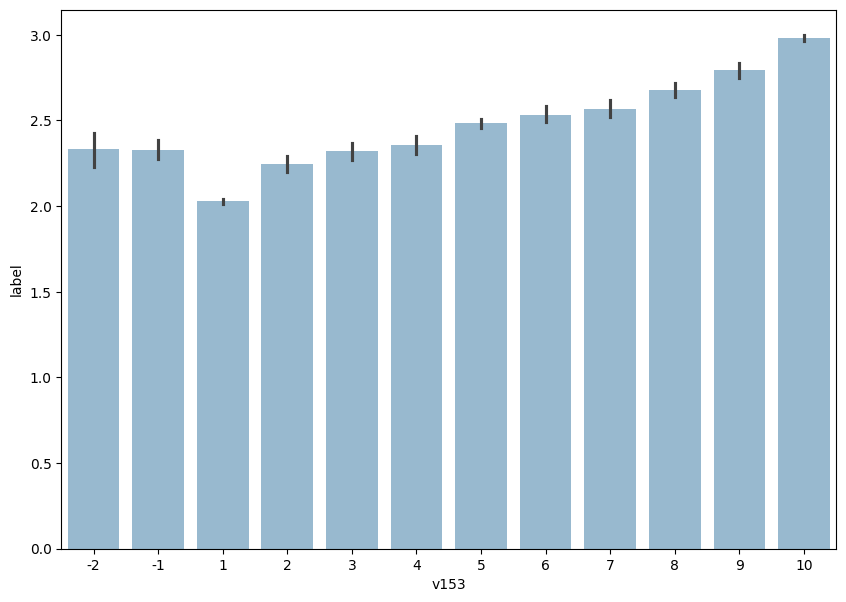

--------------------------------------------------
col: v154


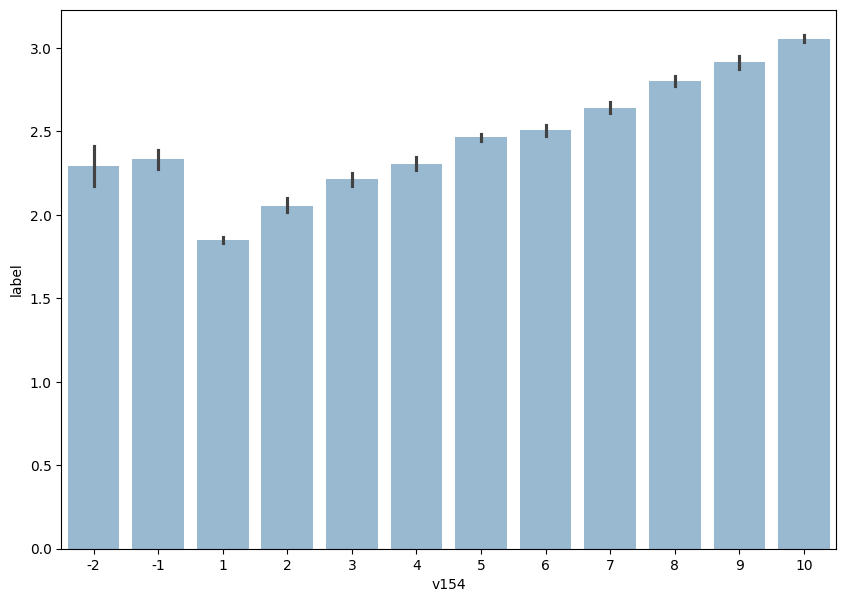

--------------------------------------------------
col: v155


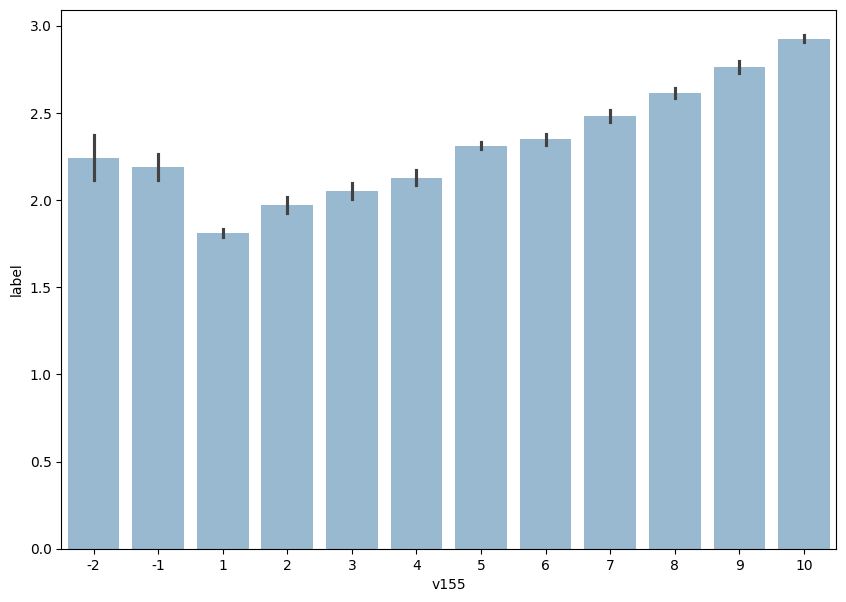

--------------------------------------------------
col: v156


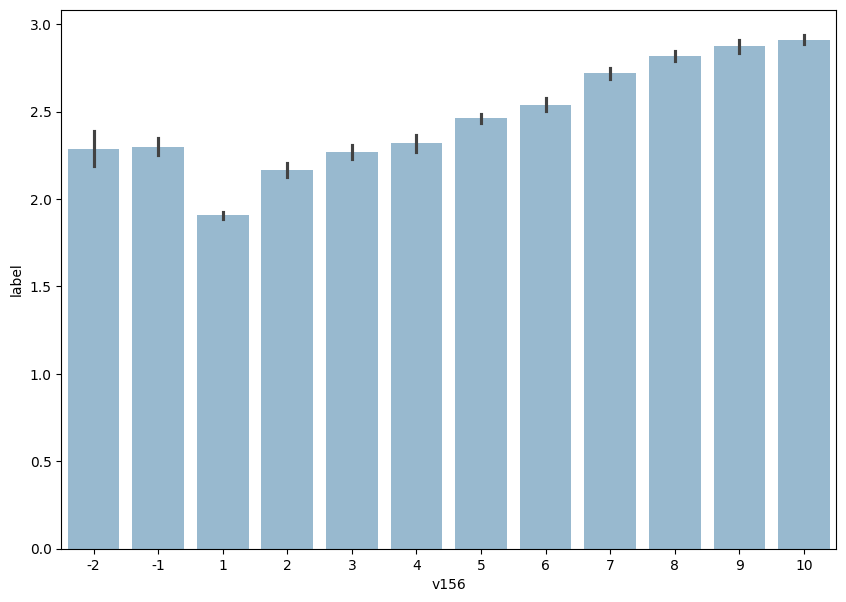

--------------------------------------------------
col: v157


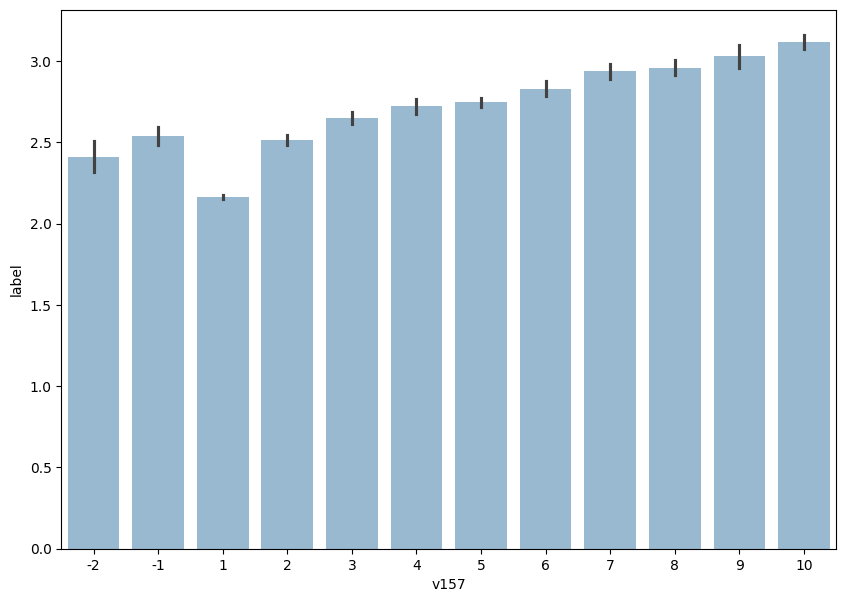

--------------------------------------------------
col: v158


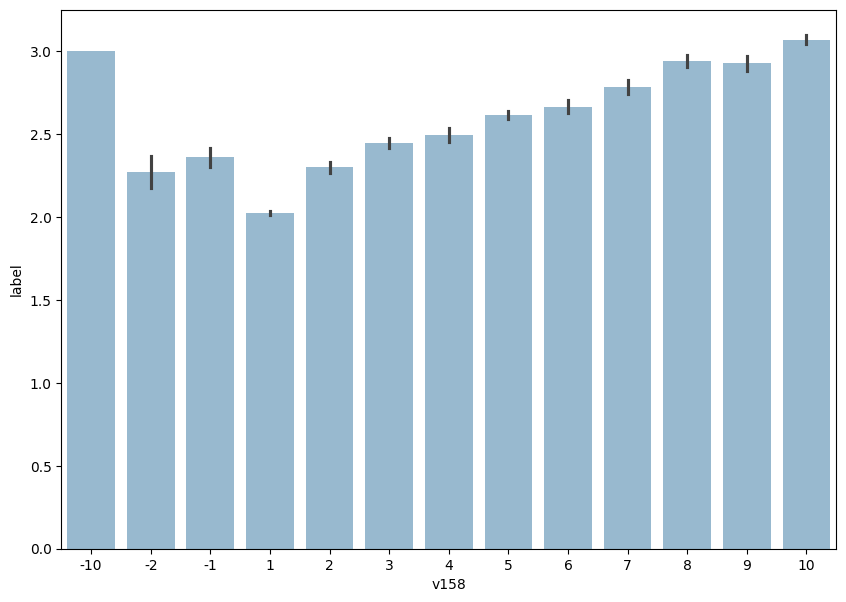

--------------------------------------------------
col: v159


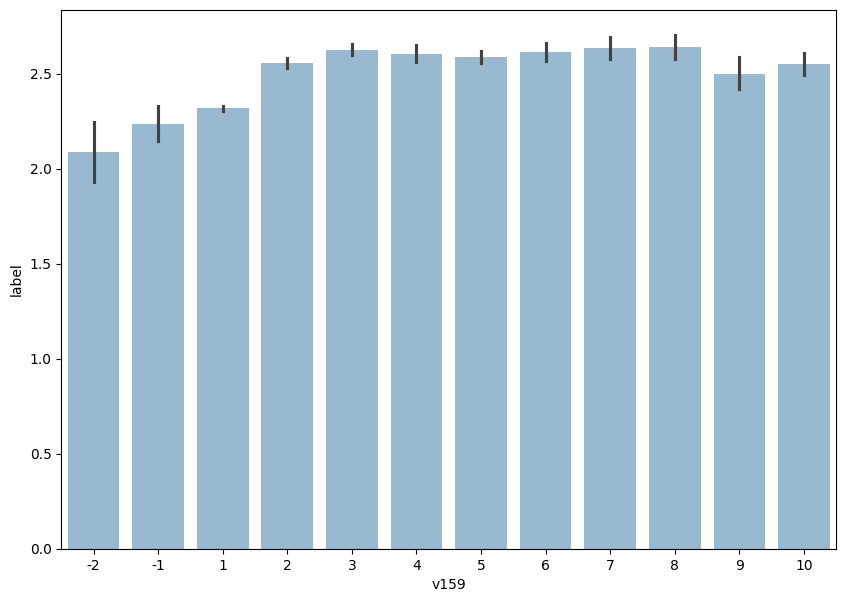

--------------------------------------------------
col: v160


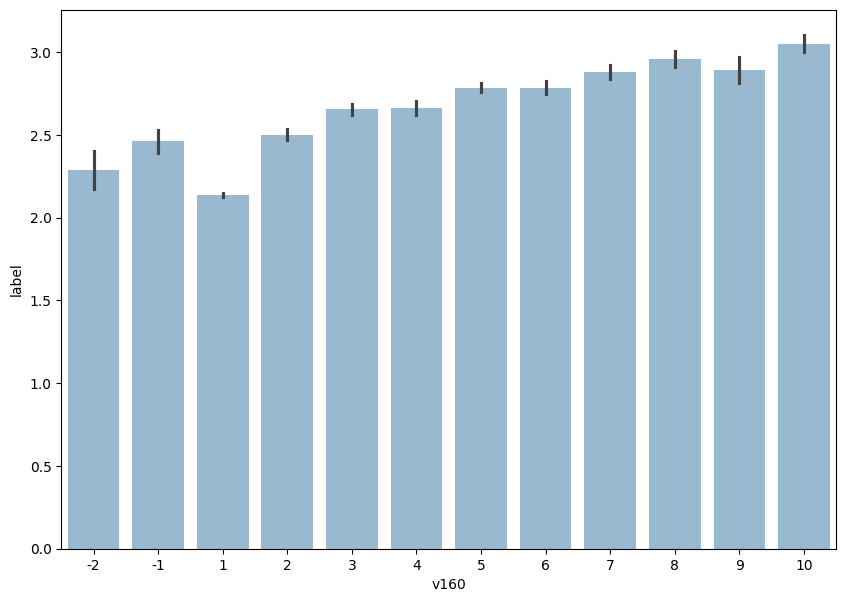

--------------------------------------------------
col: v161


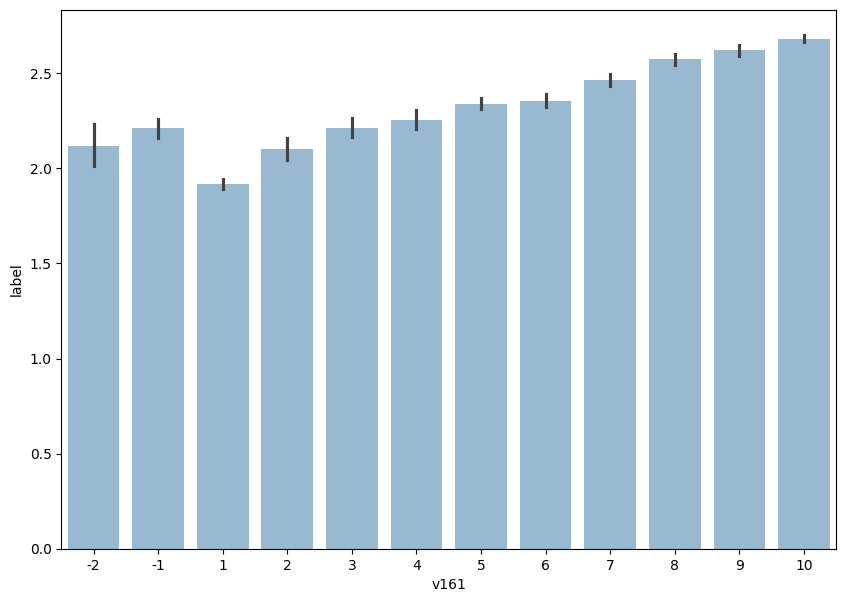

--------------------------------------------------
col: v162


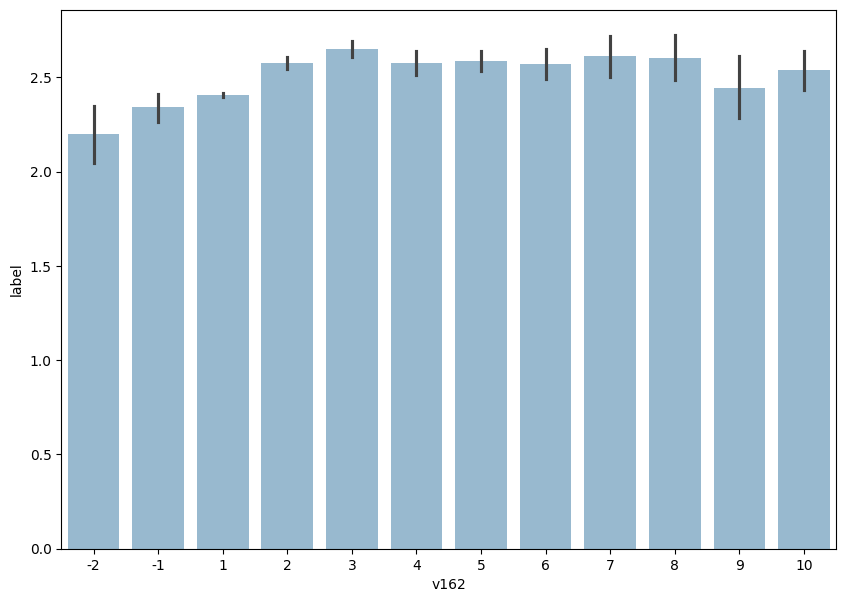

--------------------------------------------------
col: v163


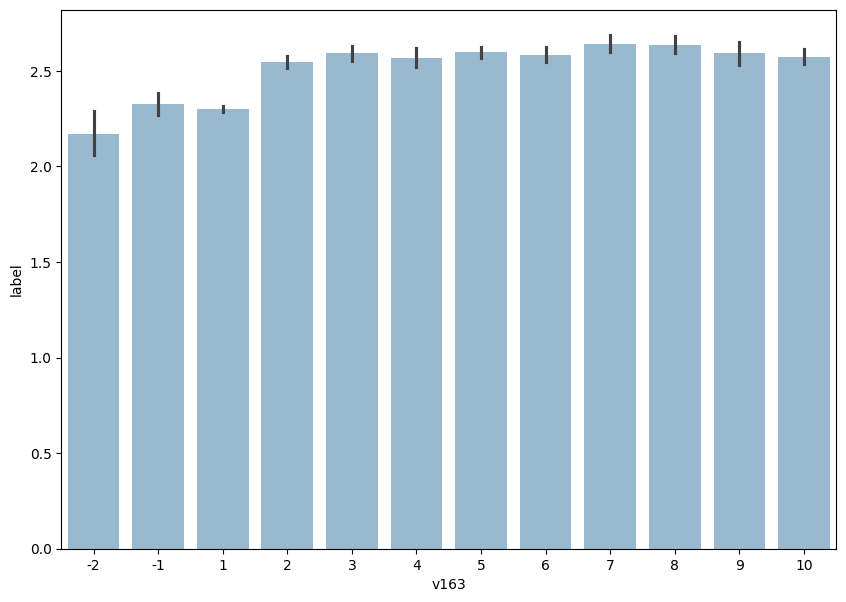

--------------------------------------------------
col: v164


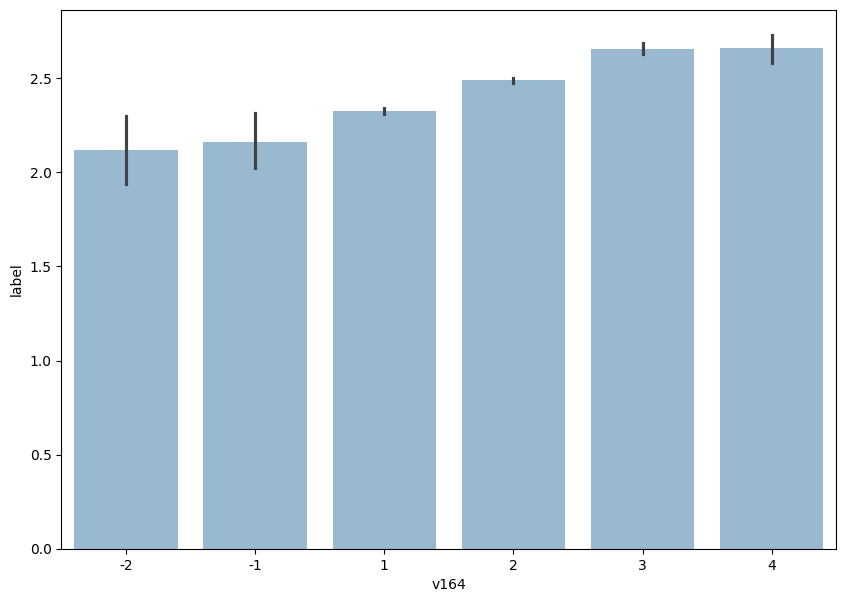

--------------------------------------------------
col: v165


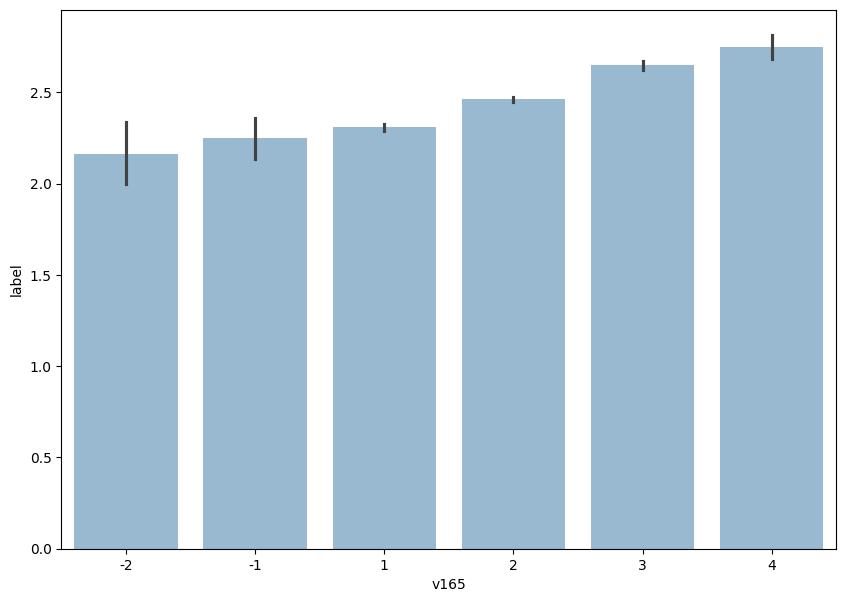

--------------------------------------------------
col: v166


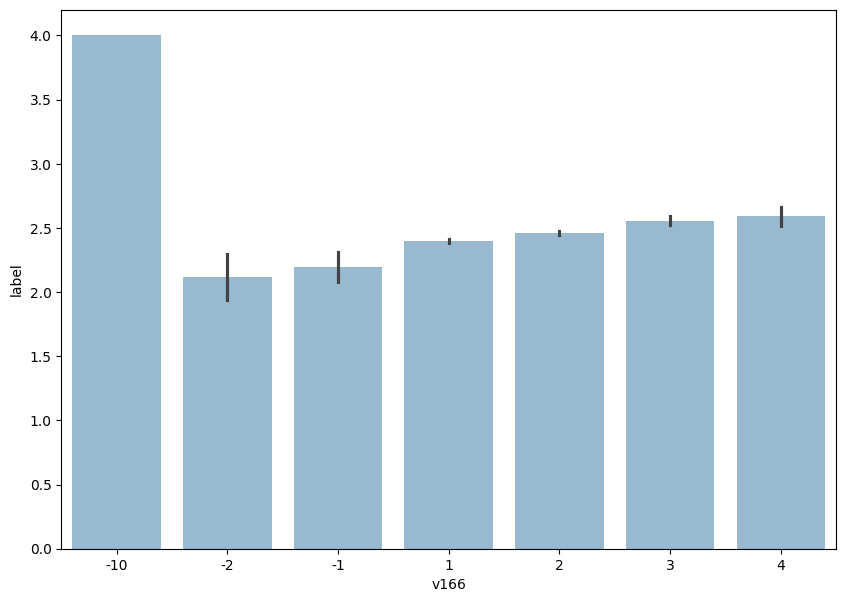

--------------------------------------------------
col: v167


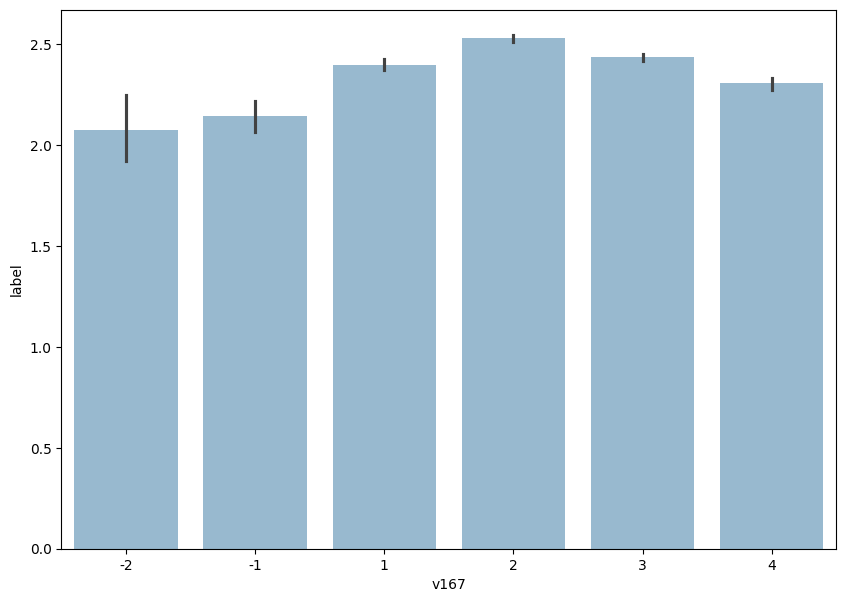

--------------------------------------------------
col: v168


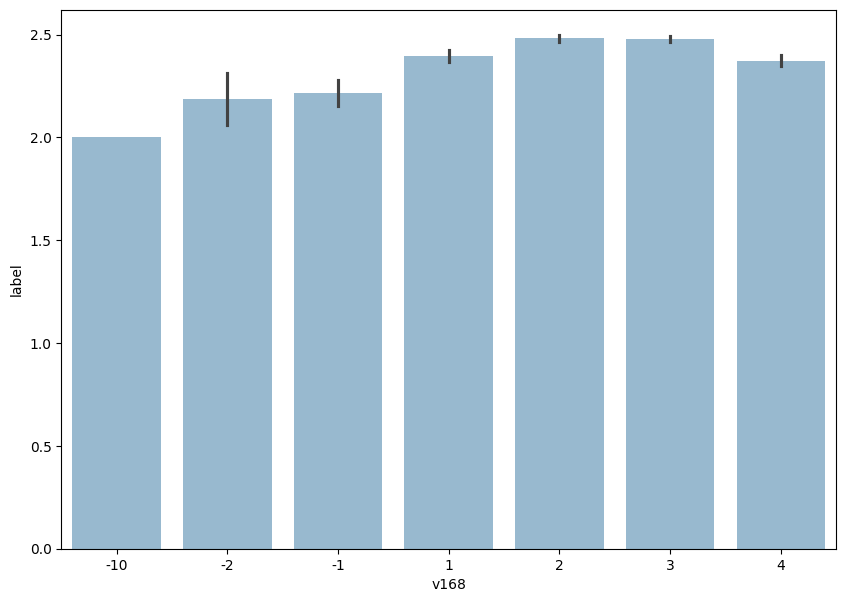

--------------------------------------------------
col: v169


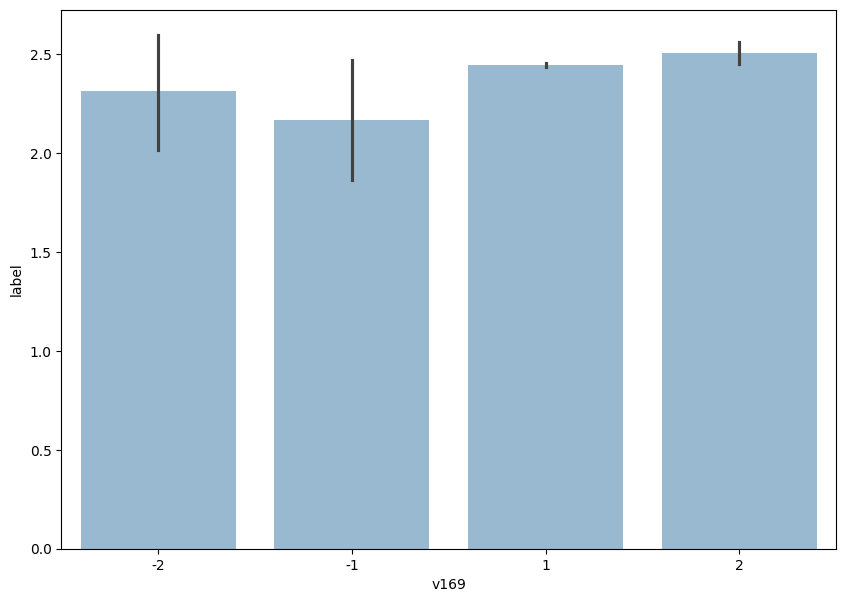

--------------------------------------------------
col: v170


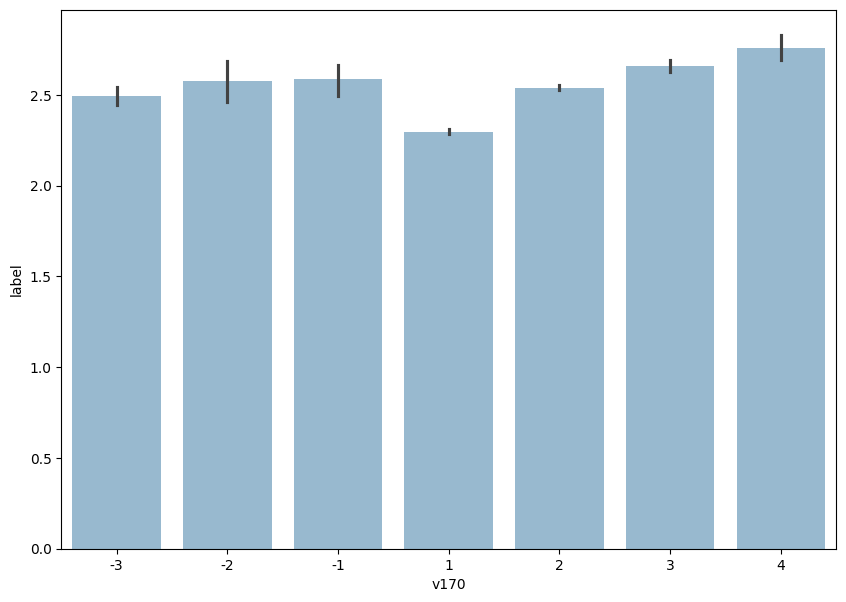

--------------------------------------------------
col: v171


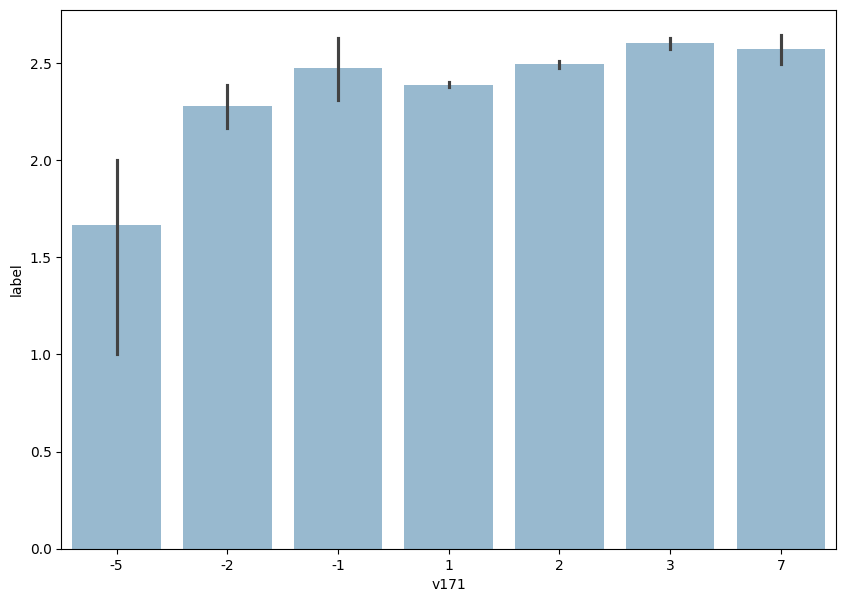

--------------------------------------------------
col: v172


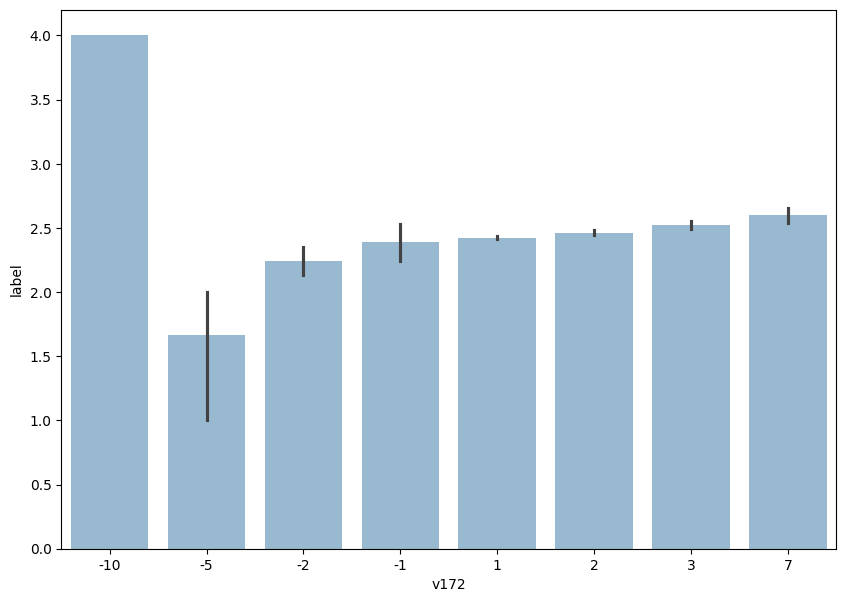

--------------------------------------------------
col: v173


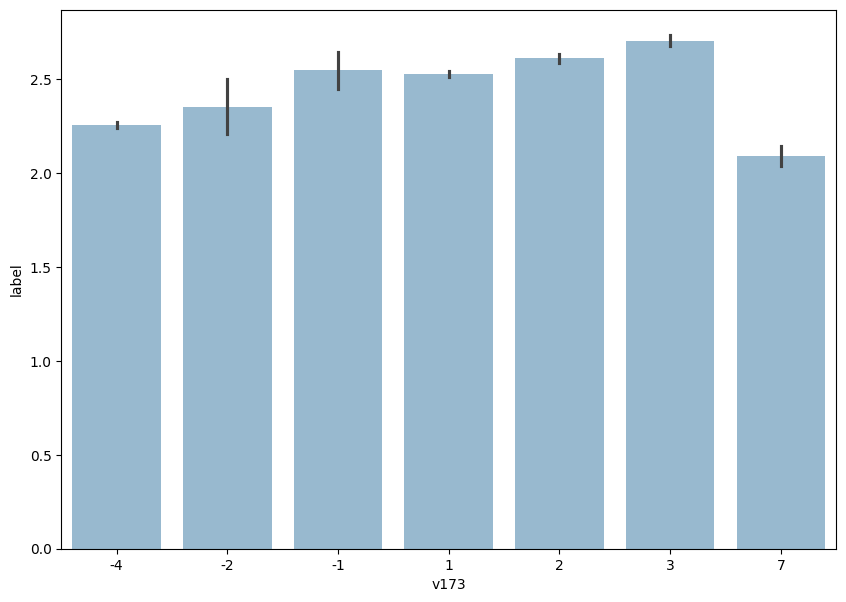

--------------------------------------------------
col: v174_LR


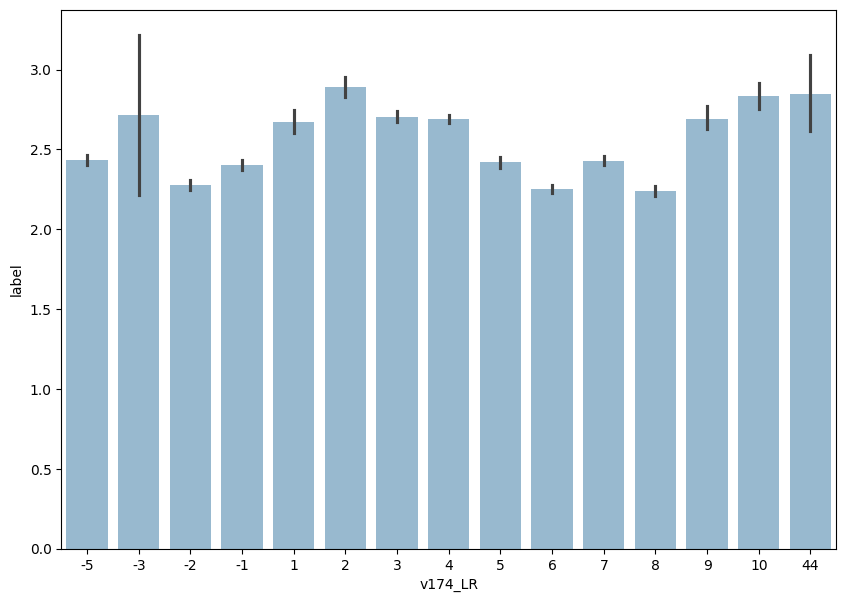

--------------------------------------------------
col: v174_cs


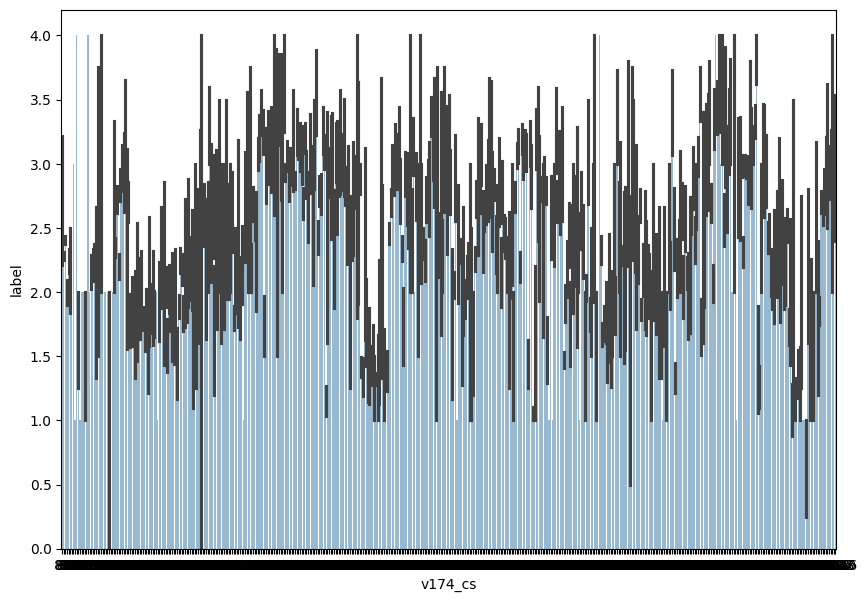

--------------------------------------------------
col: v175_LR


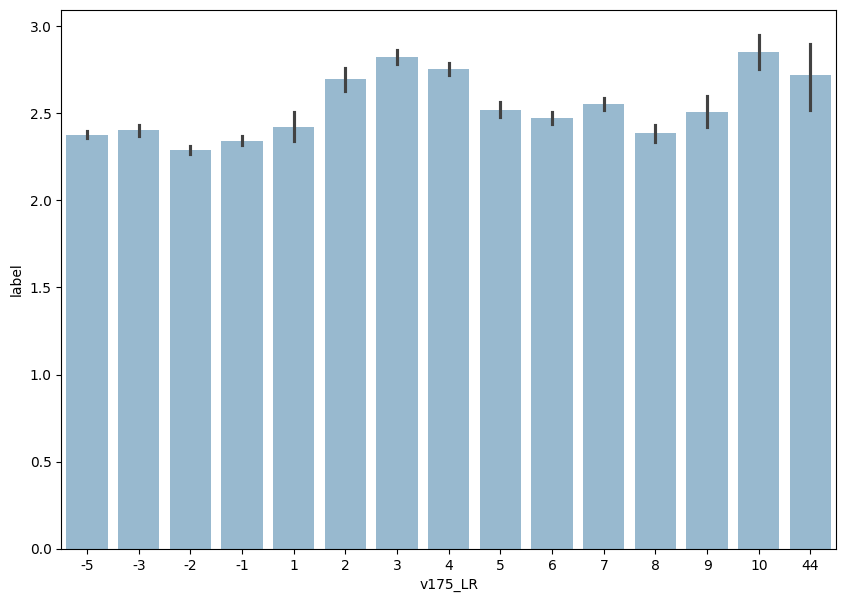

--------------------------------------------------
col: v175_cs


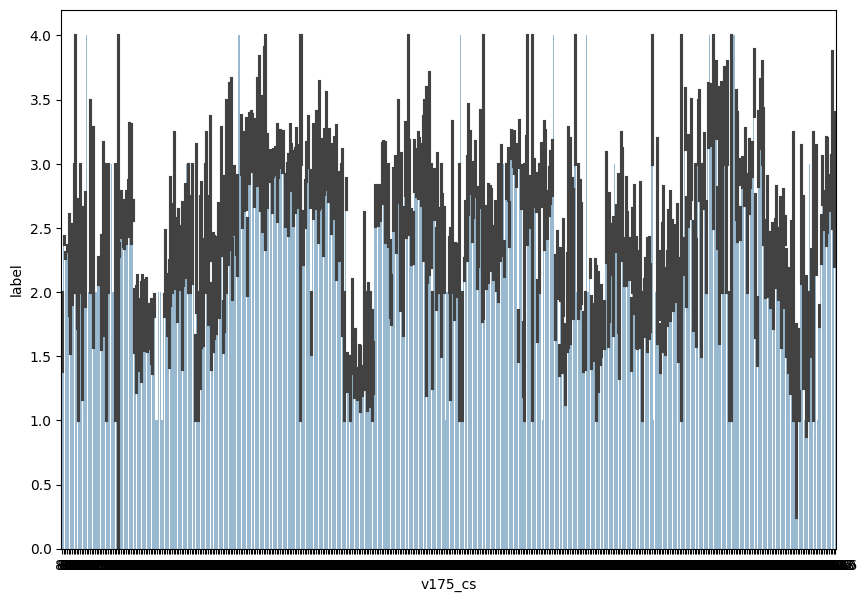

--------------------------------------------------
col: v176


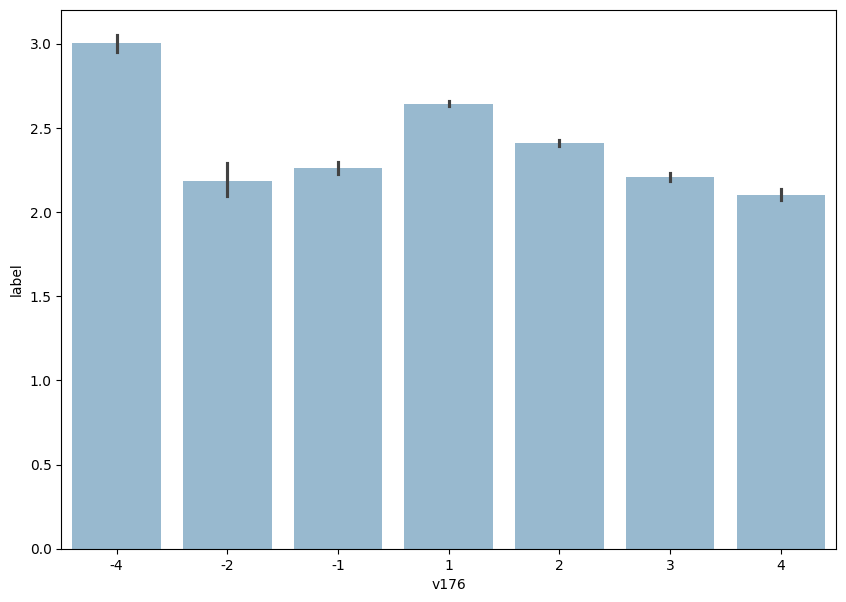

--------------------------------------------------
col: v177


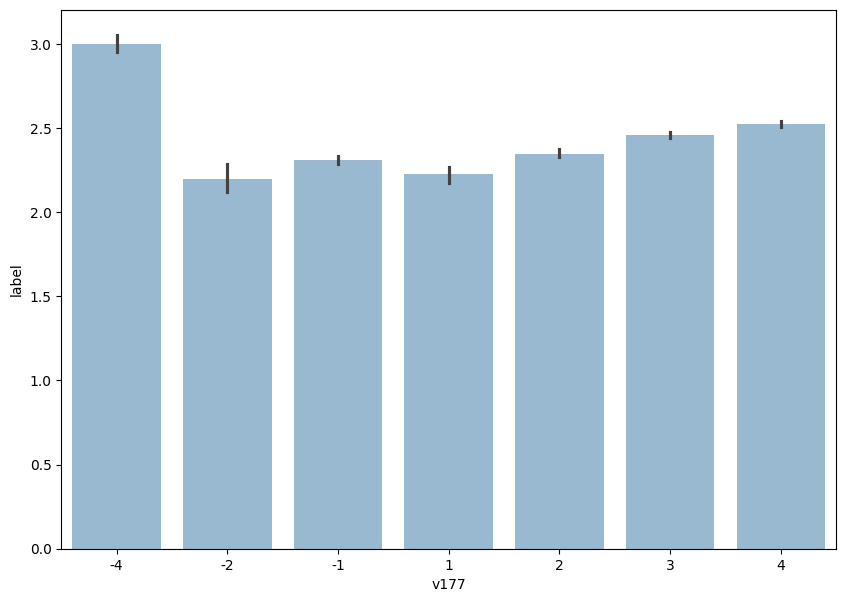

--------------------------------------------------
col: v178


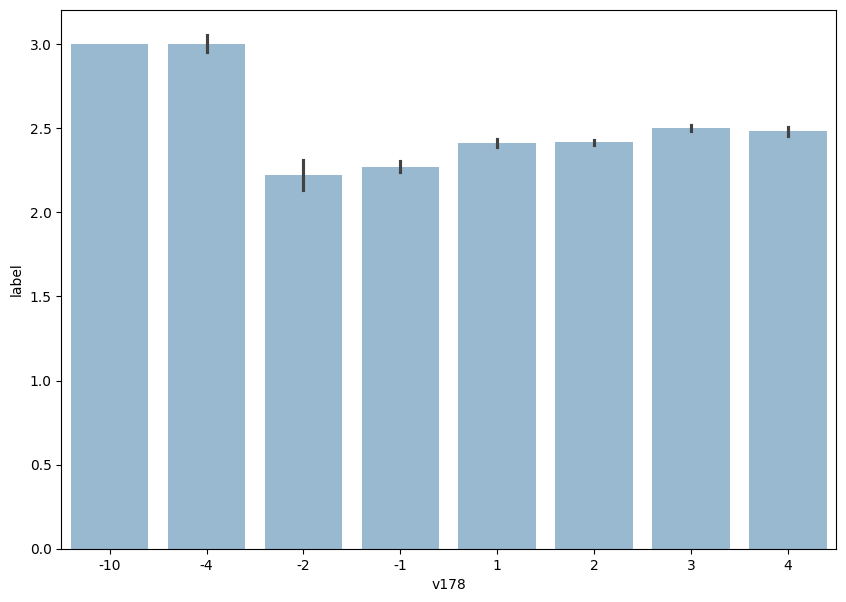

--------------------------------------------------
col: v178_DK


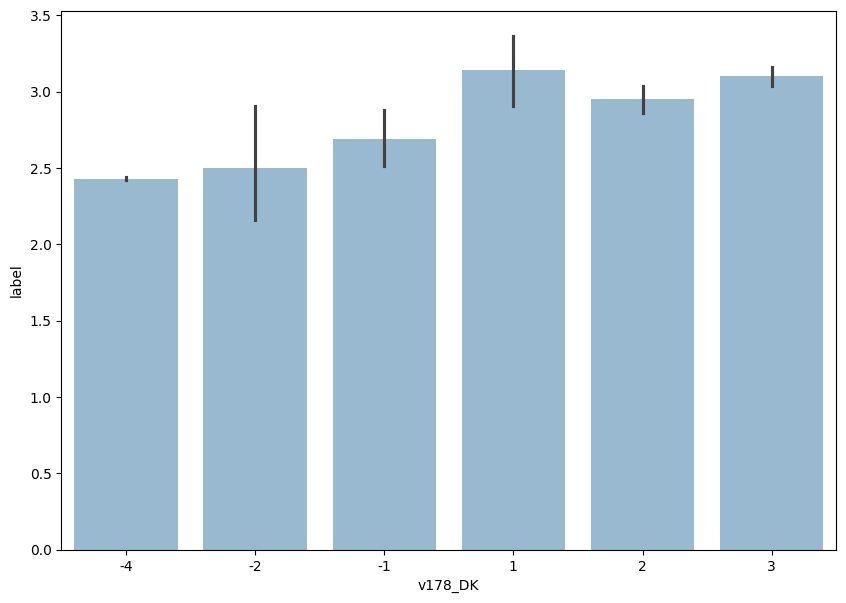

--------------------------------------------------
col: v179


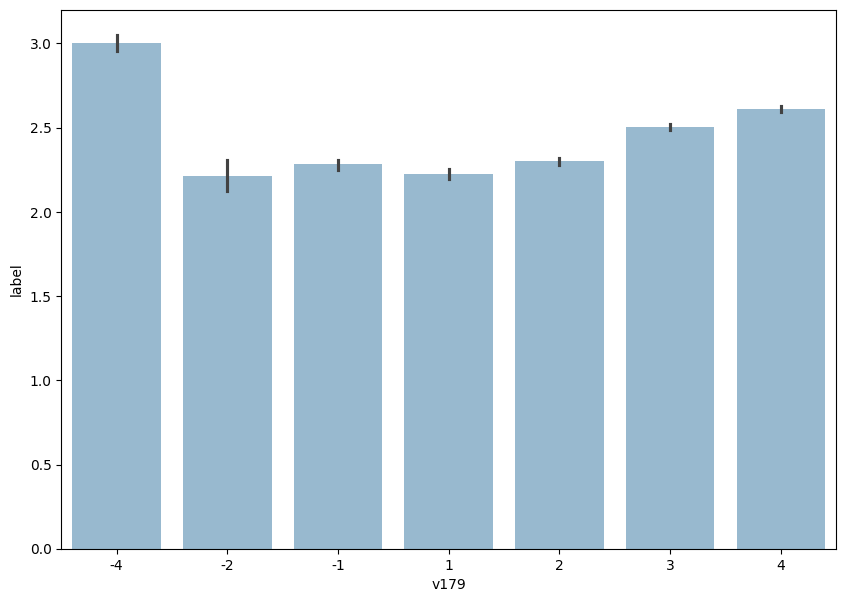

--------------------------------------------------
col: v180


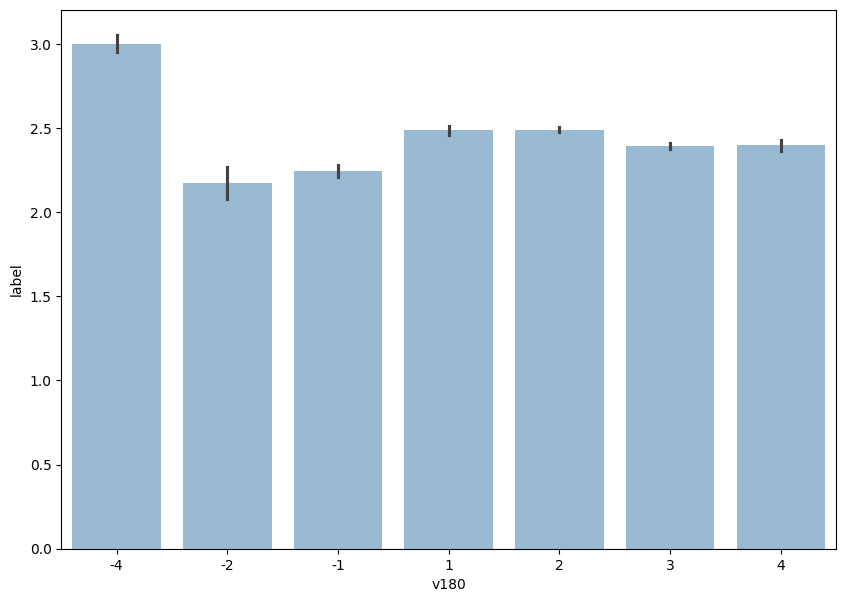

--------------------------------------------------
col: v181


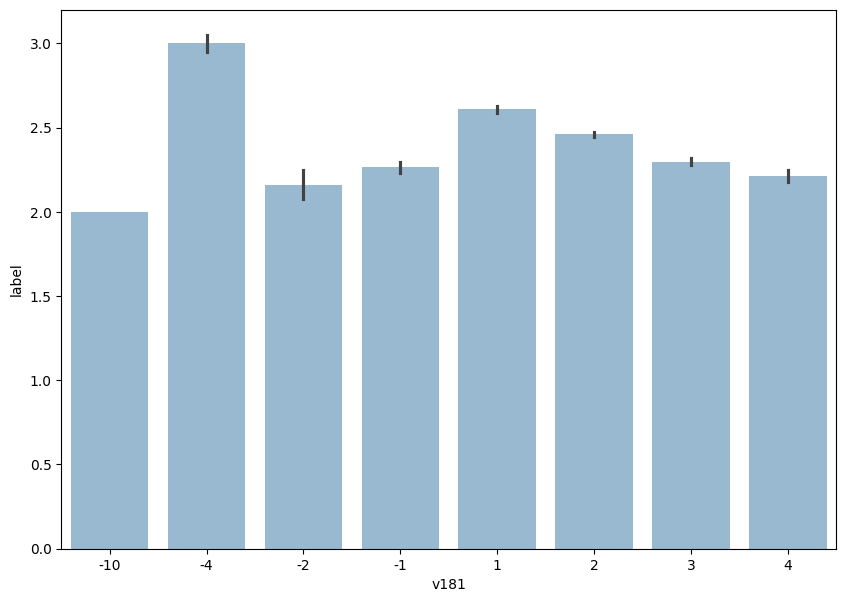

--------------------------------------------------
col: v182


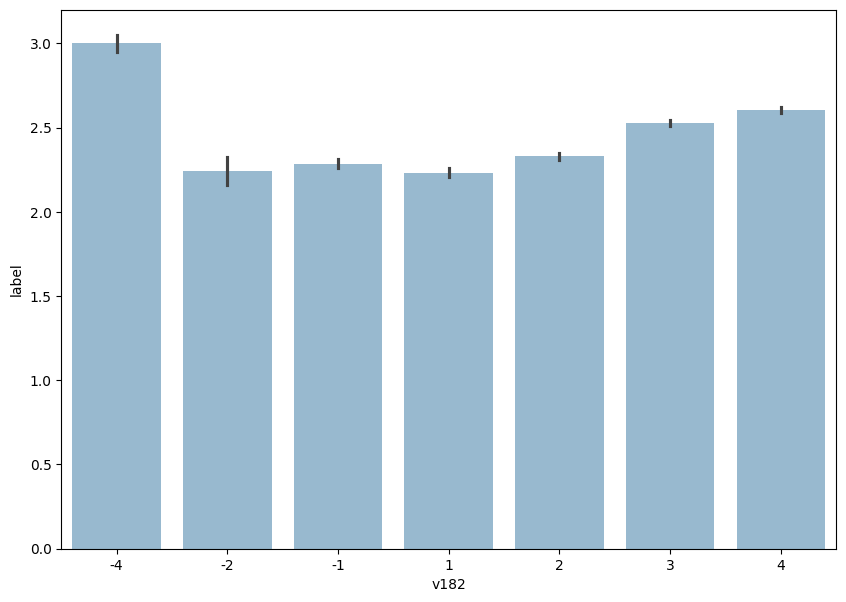

--------------------------------------------------
col: v183


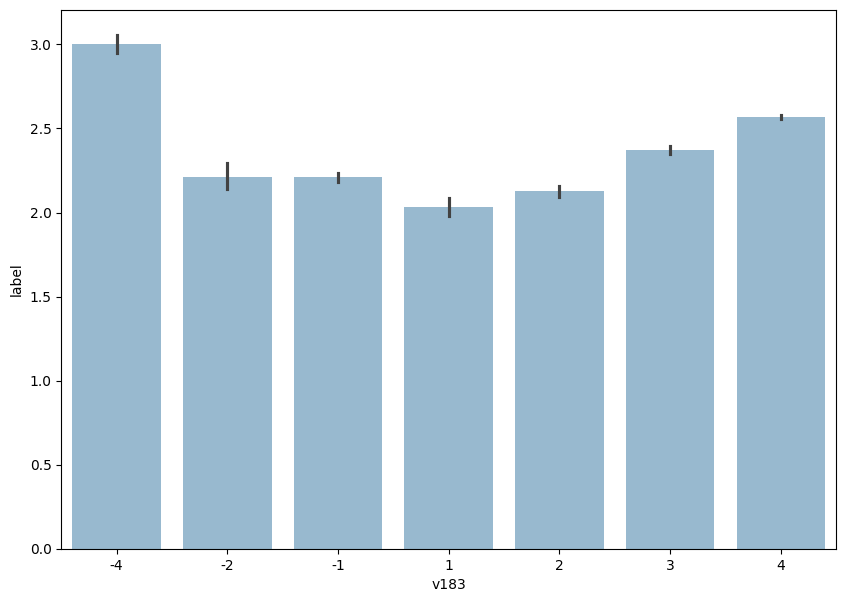

--------------------------------------------------
col: v184


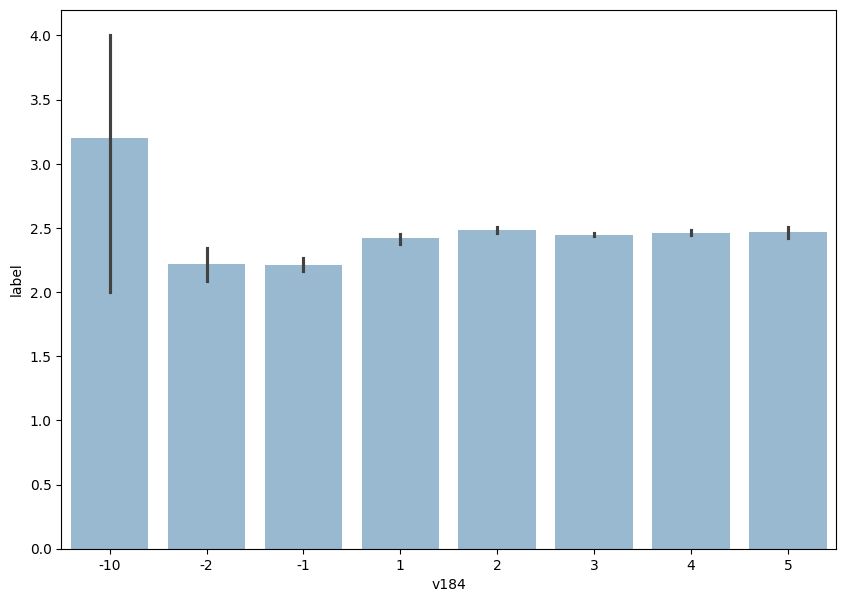

--------------------------------------------------
col: v185


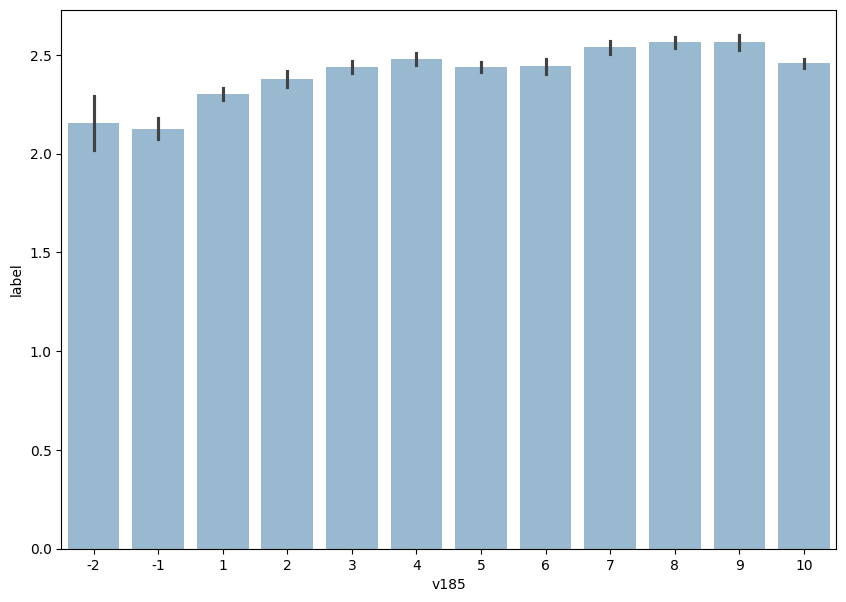

--------------------------------------------------
col: v186


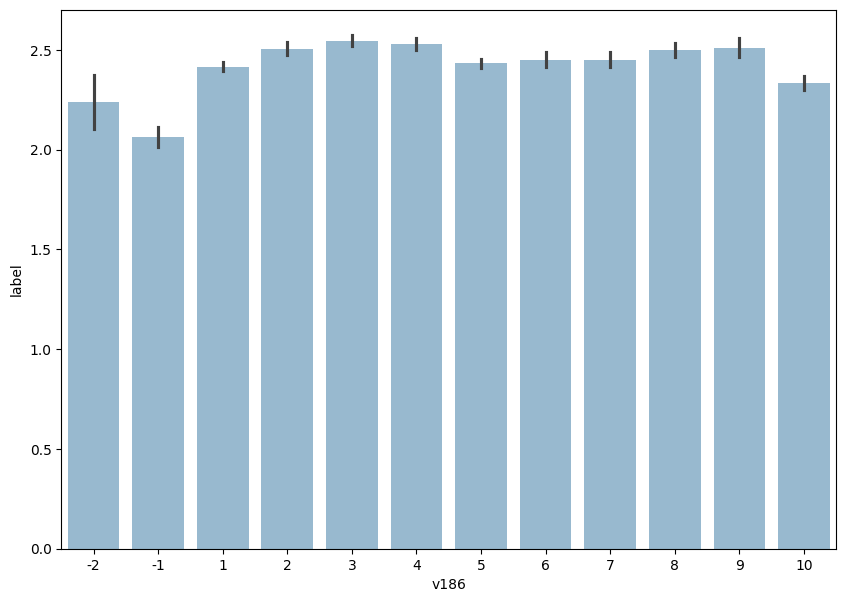

--------------------------------------------------
col: v187


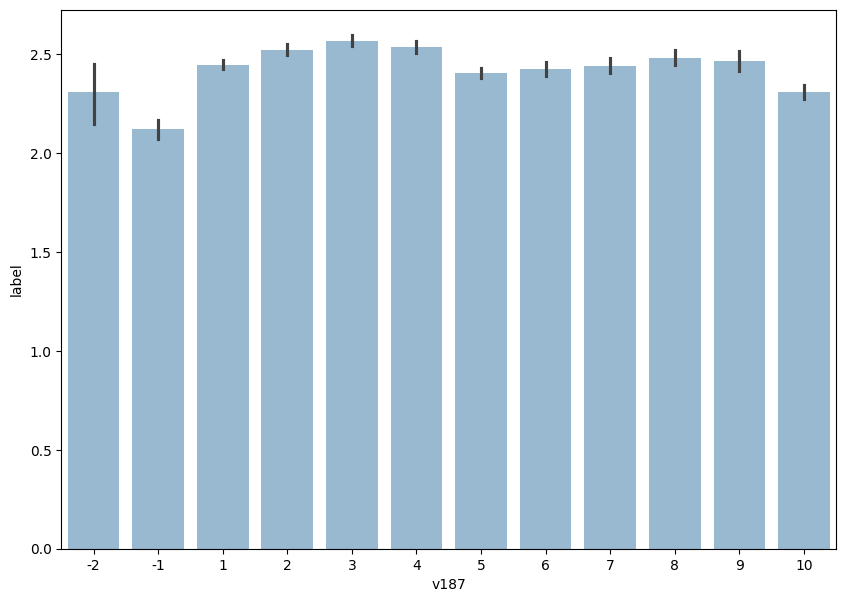

--------------------------------------------------
col: v188


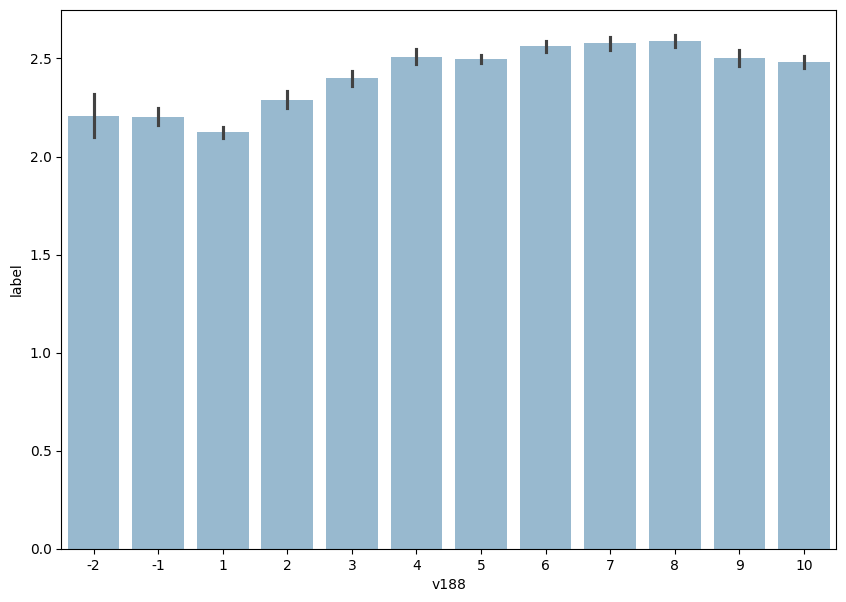

--------------------------------------------------
col: v189


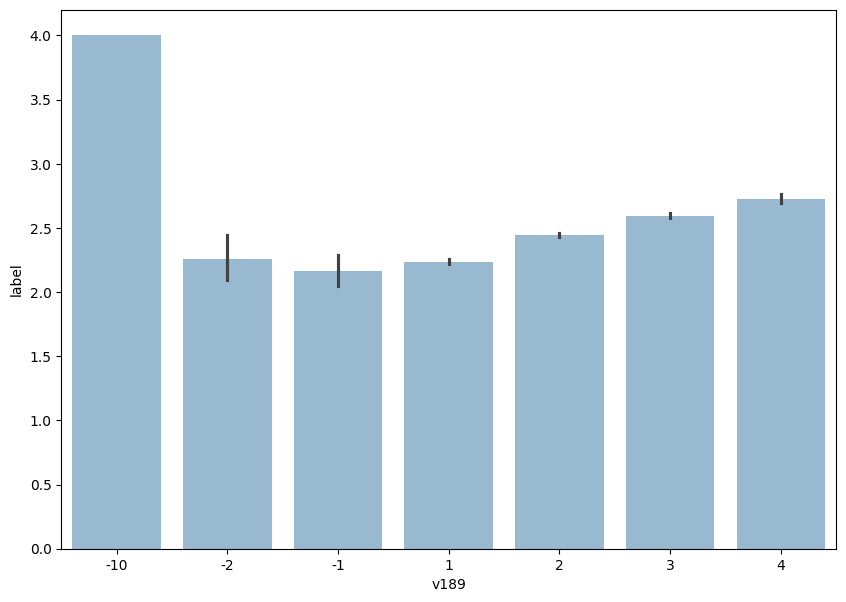

--------------------------------------------------
col: v190


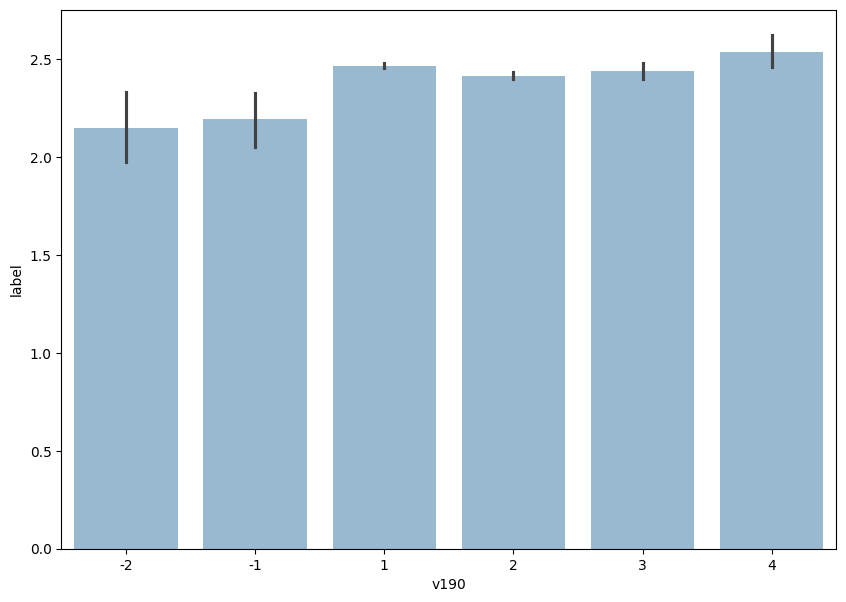

--------------------------------------------------
col: v191


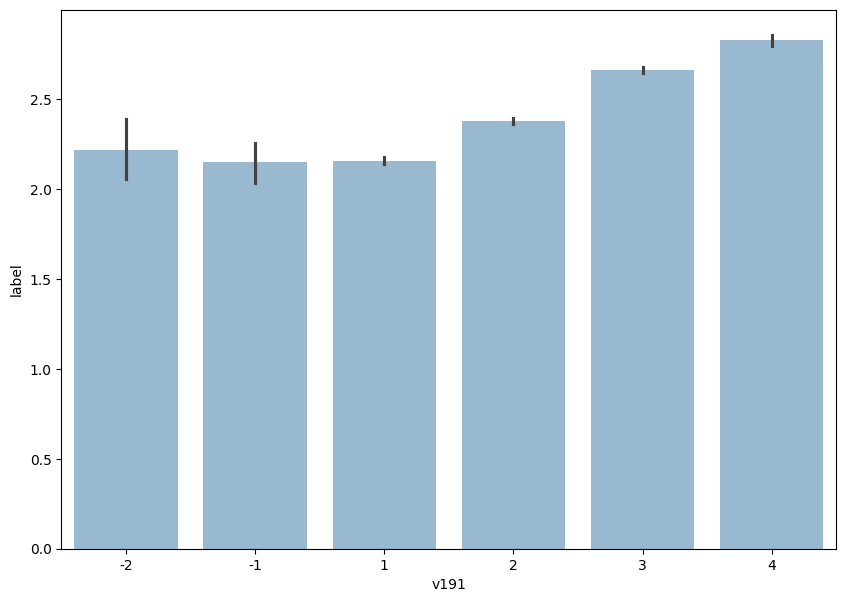

--------------------------------------------------
col: v192


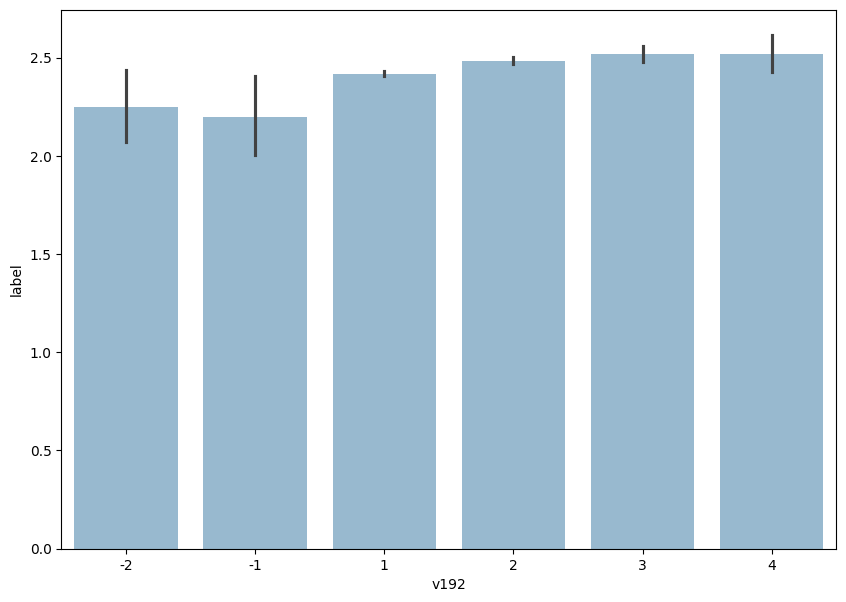

--------------------------------------------------
col: v193


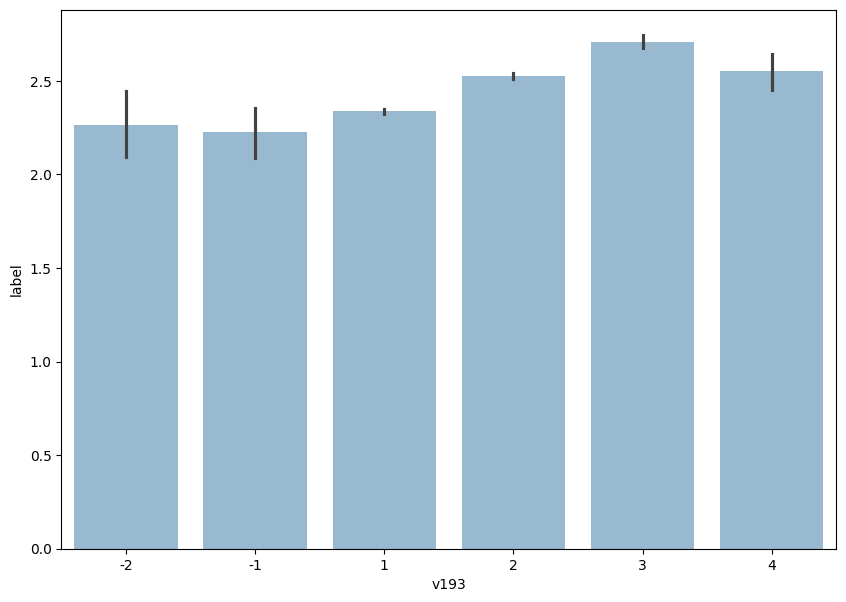

--------------------------------------------------
col: v194


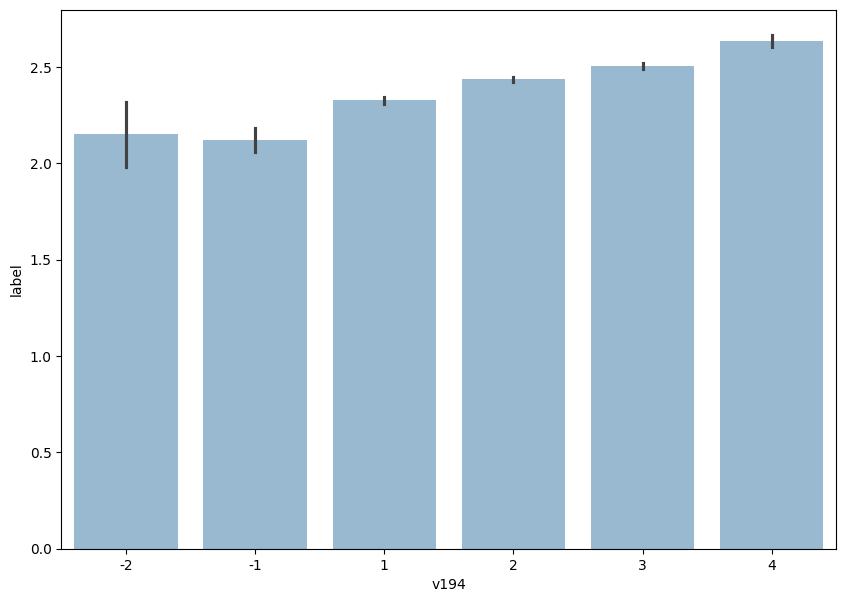

--------------------------------------------------
col: v195


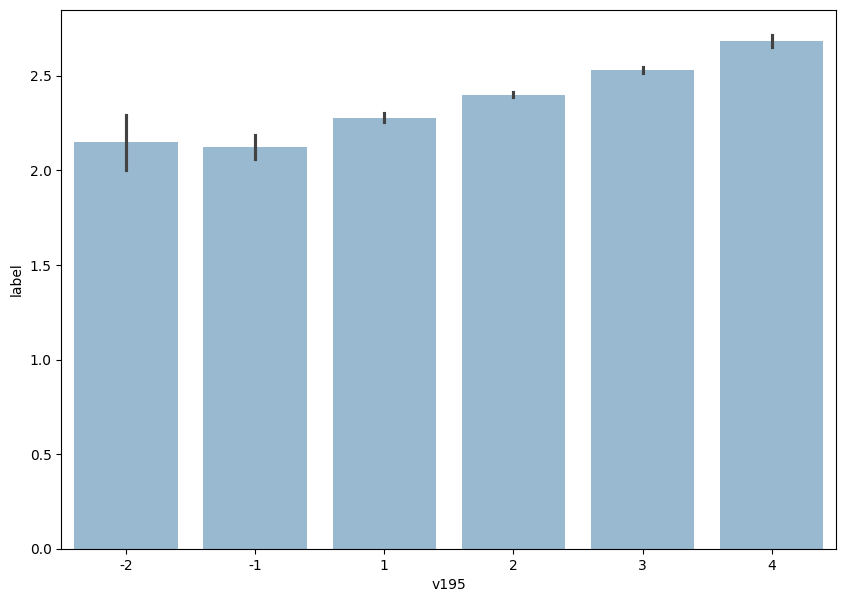

--------------------------------------------------
col: v196


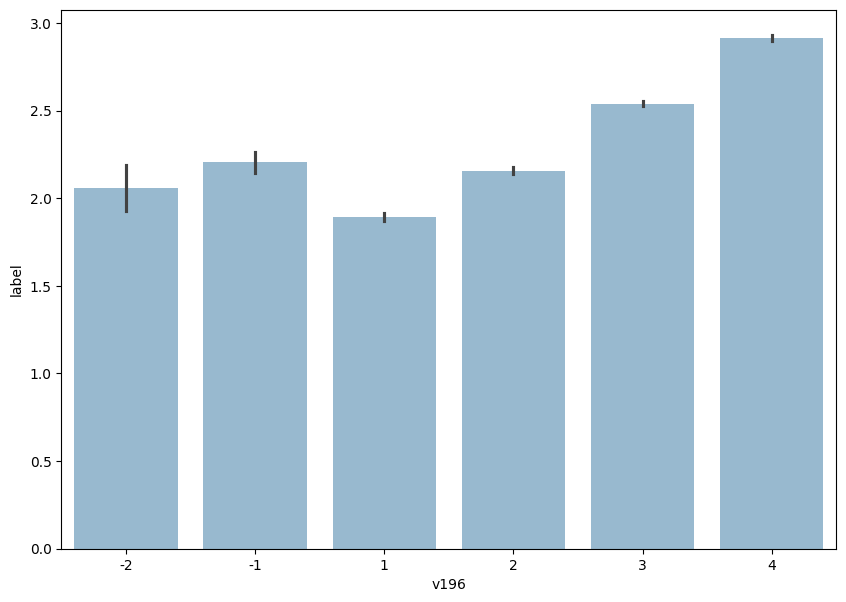

--------------------------------------------------
col: v197


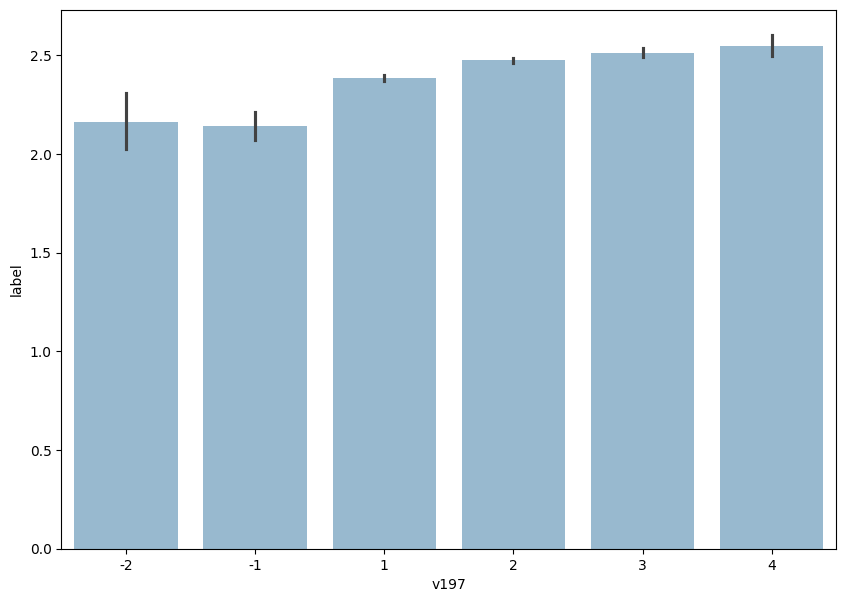

--------------------------------------------------
col: v198


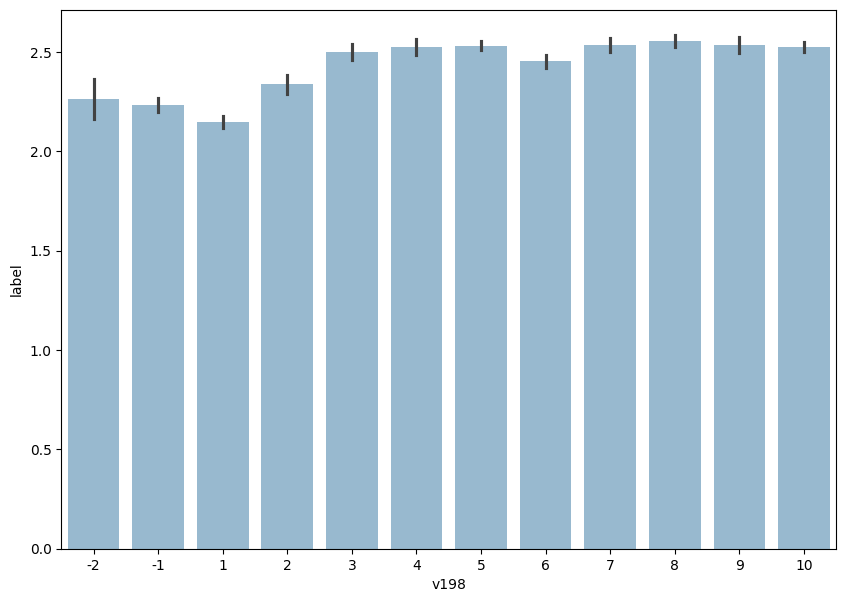

--------------------------------------------------
col: v199


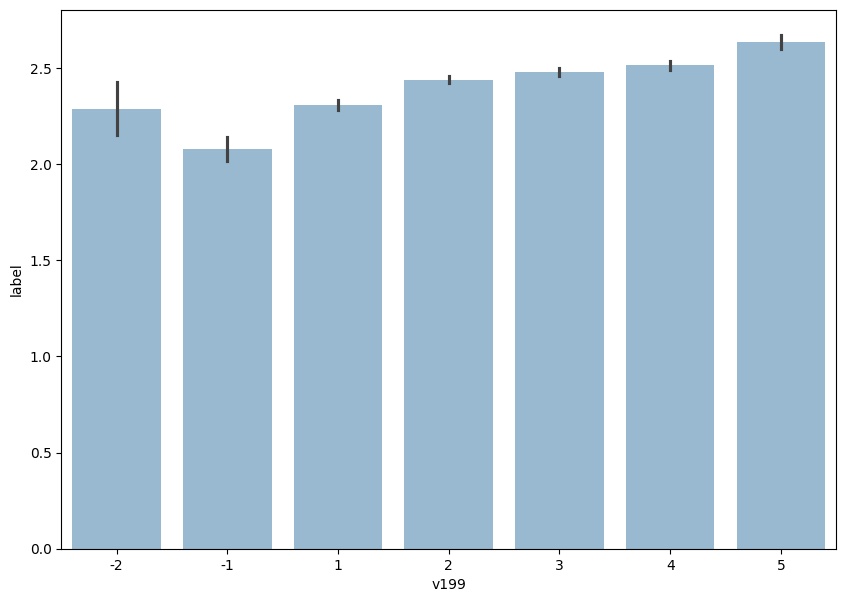

--------------------------------------------------
col: v200


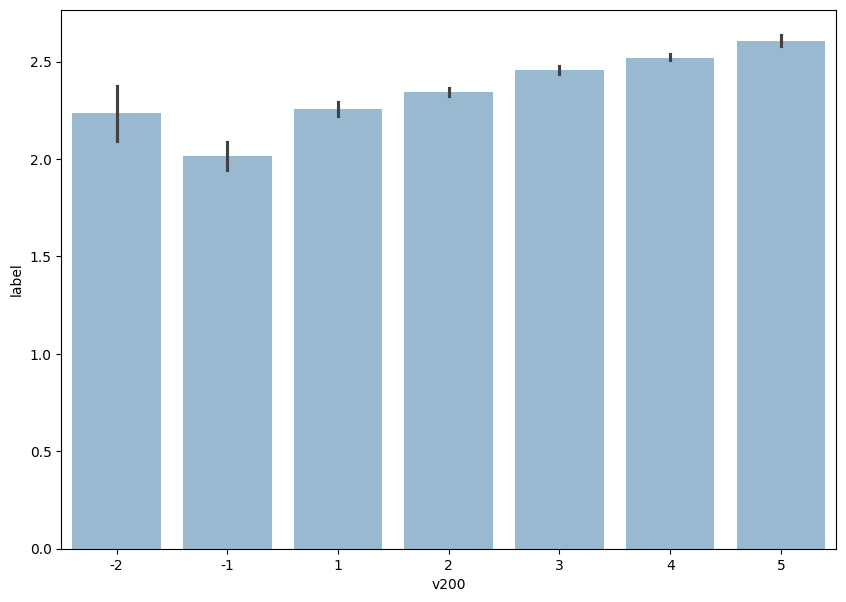

--------------------------------------------------
col: v201


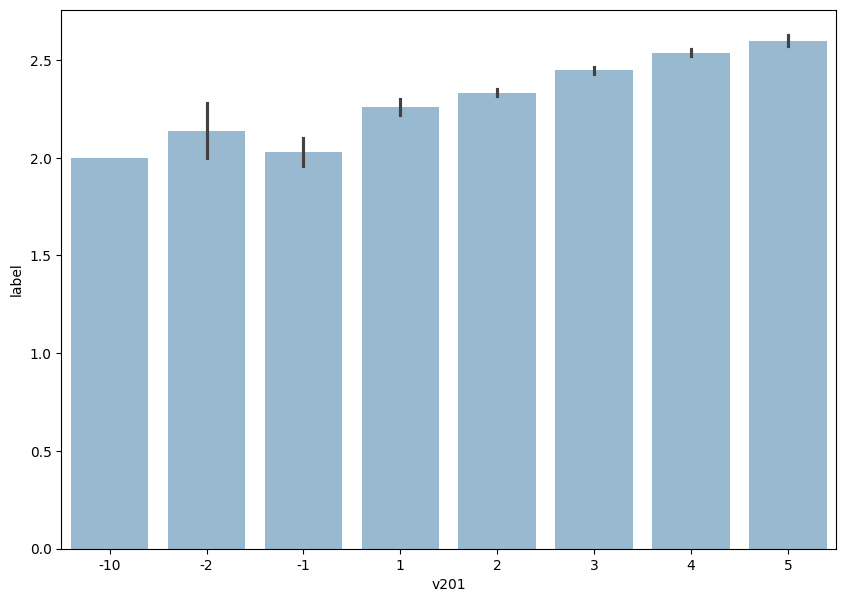

--------------------------------------------------
col: v202


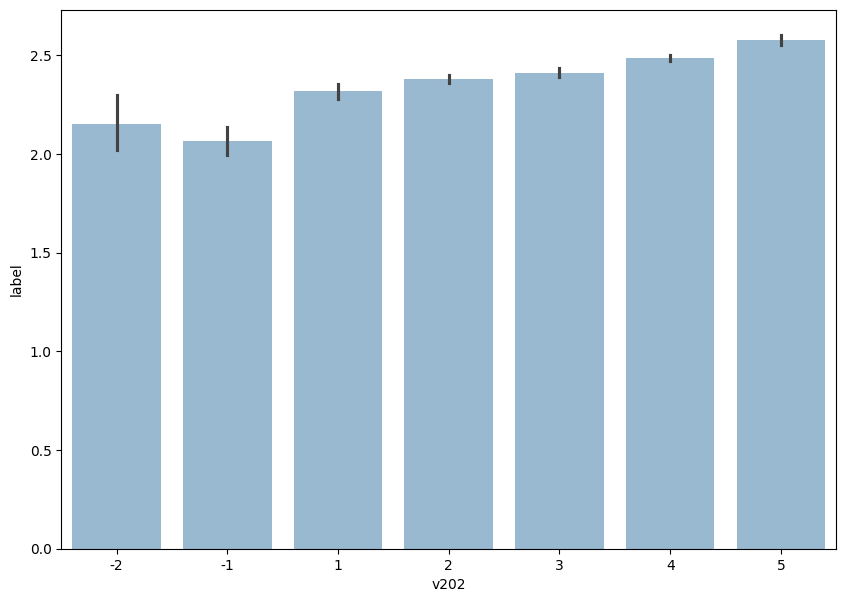

--------------------------------------------------
col: v203


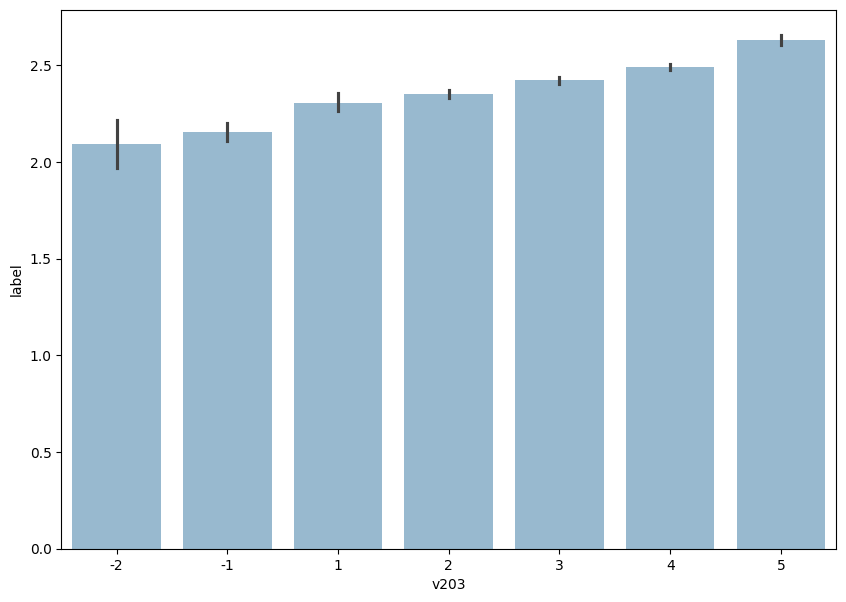

--------------------------------------------------
col: v204


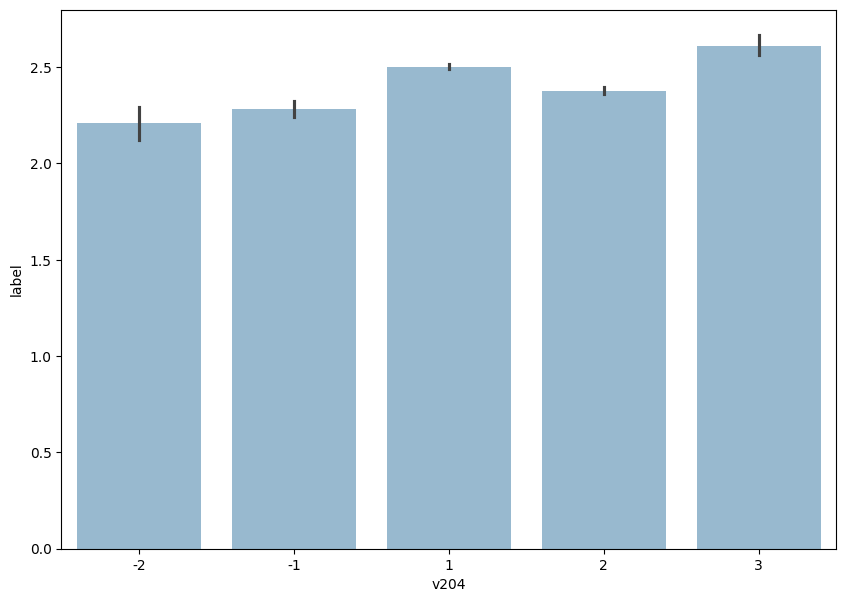

--------------------------------------------------
col: v205


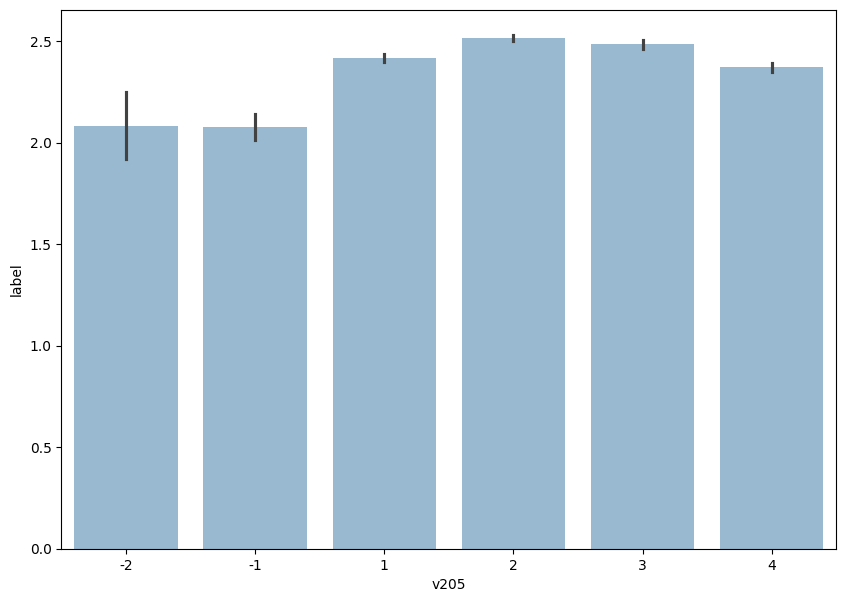

--------------------------------------------------
col: v206


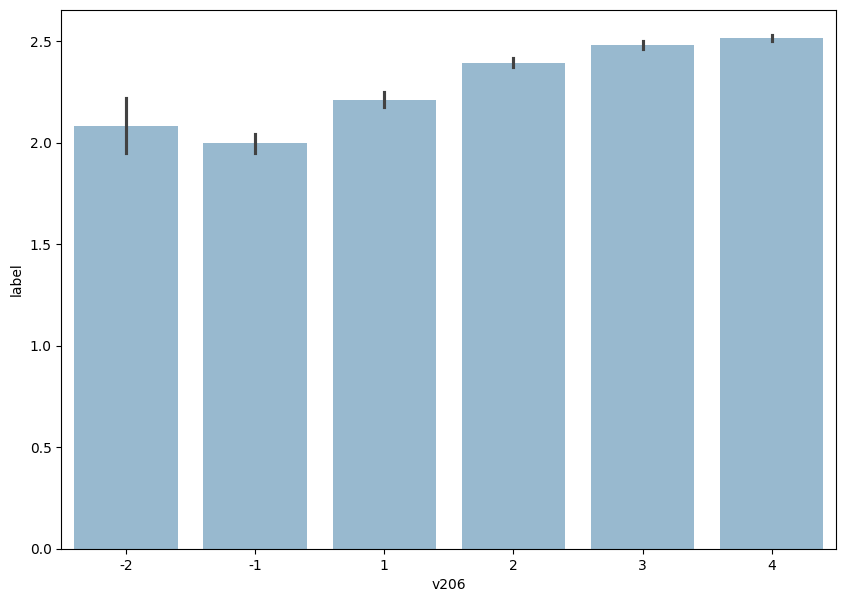

--------------------------------------------------
col: v207


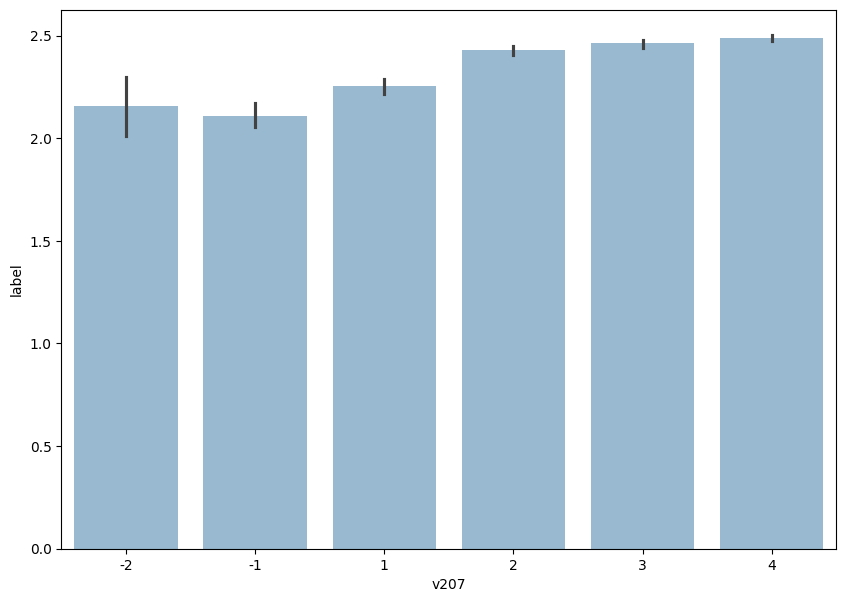

--------------------------------------------------
col: v208


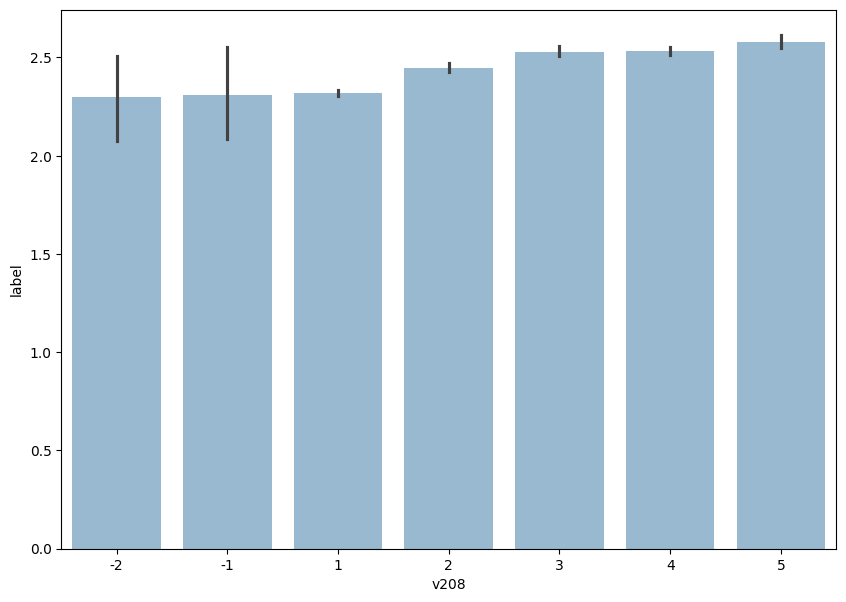

--------------------------------------------------
col: v209


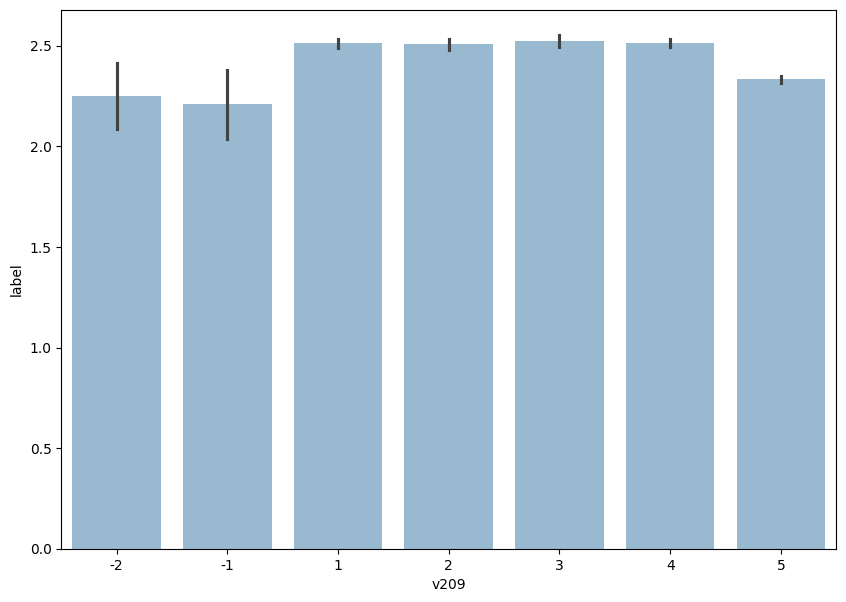

--------------------------------------------------
col: v210


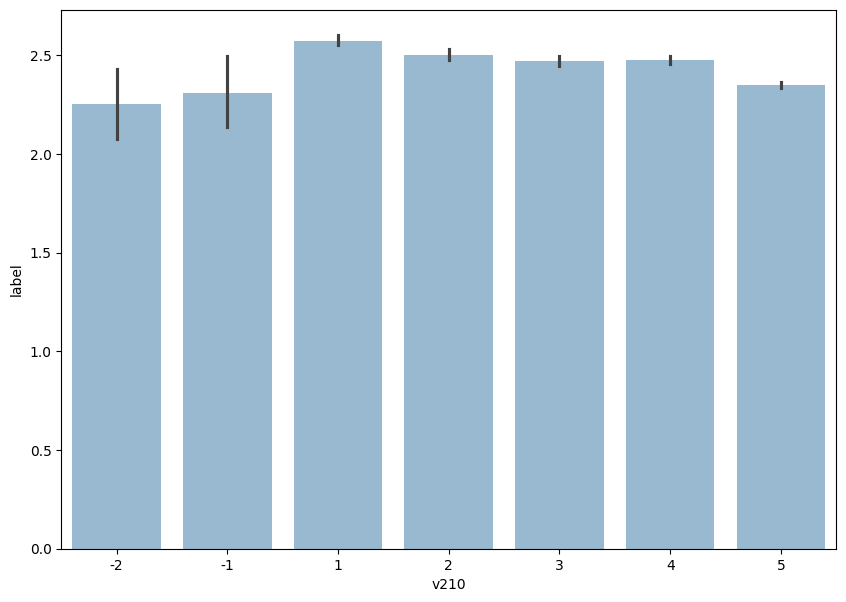

--------------------------------------------------
col: v211


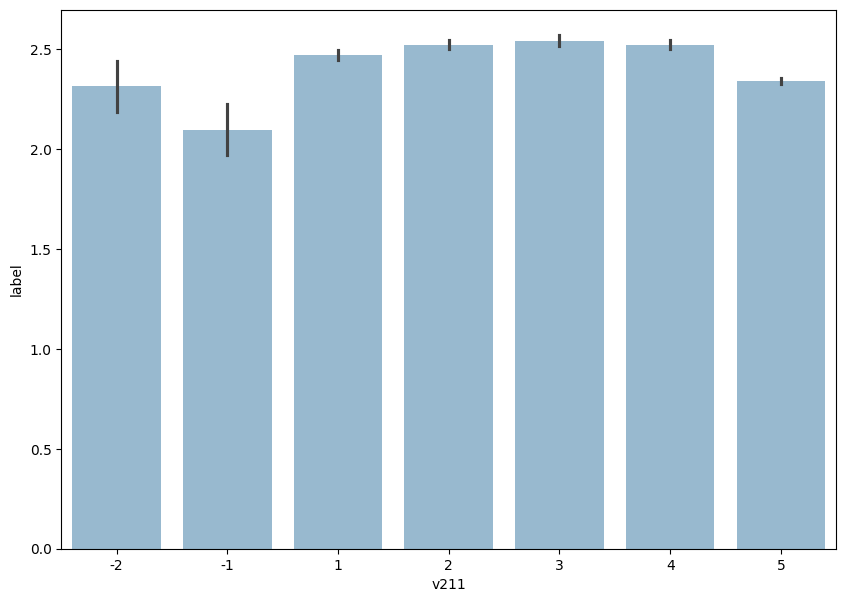

--------------------------------------------------
col: v212


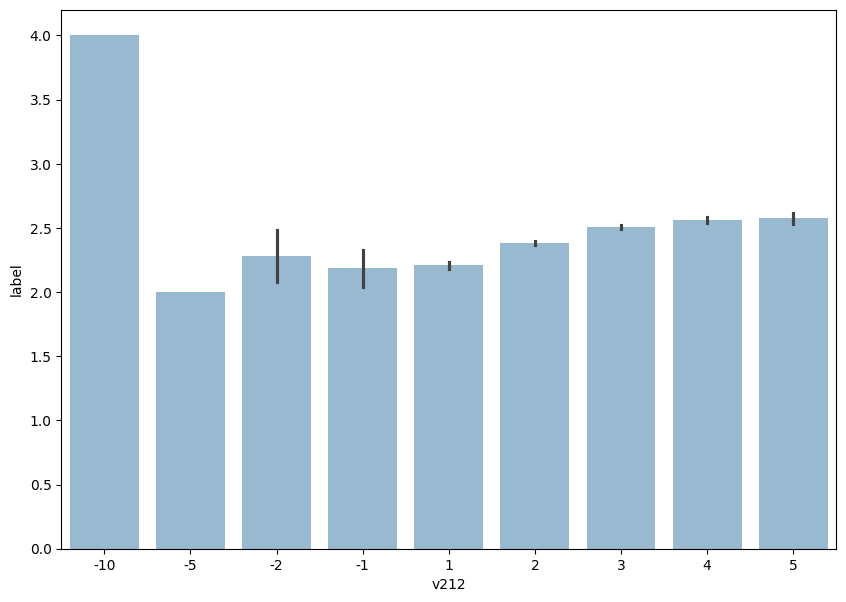

--------------------------------------------------
col: v213


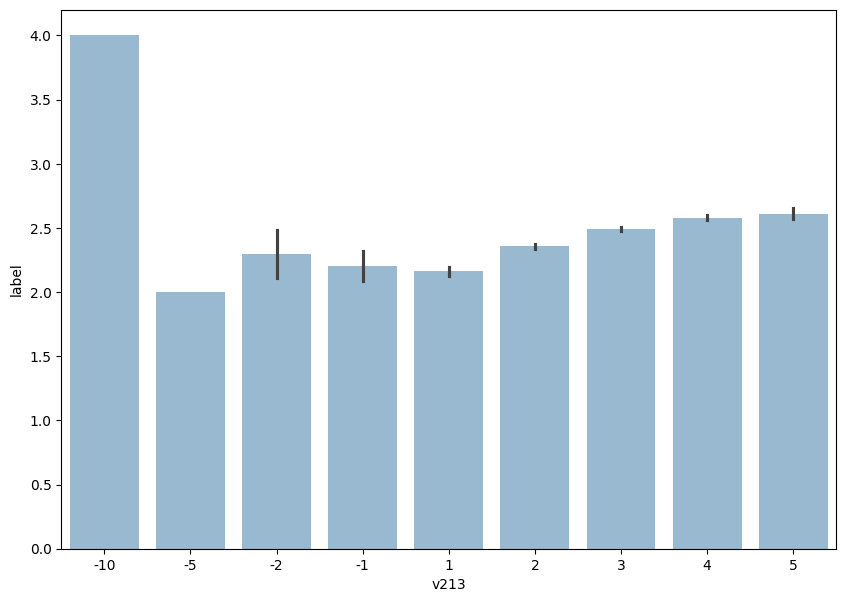

--------------------------------------------------
col: v214


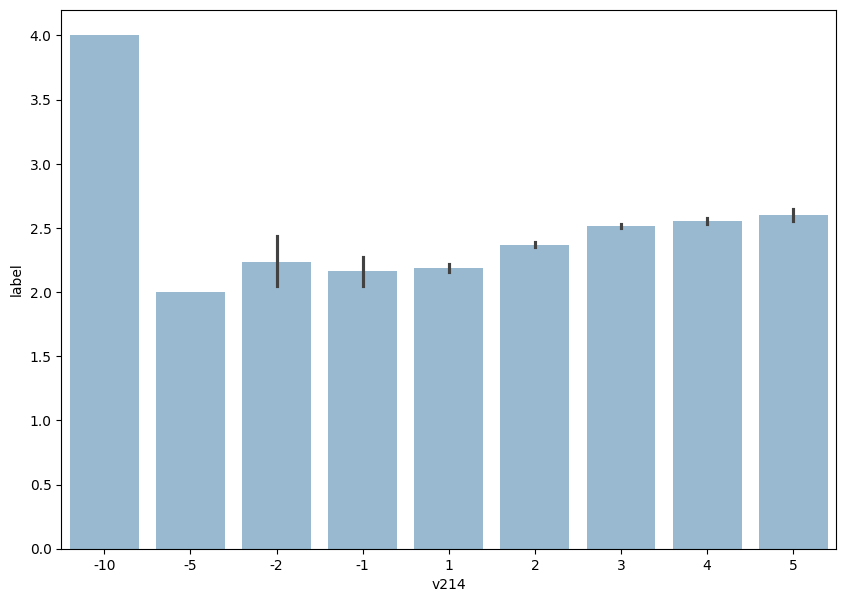

--------------------------------------------------
col: v215


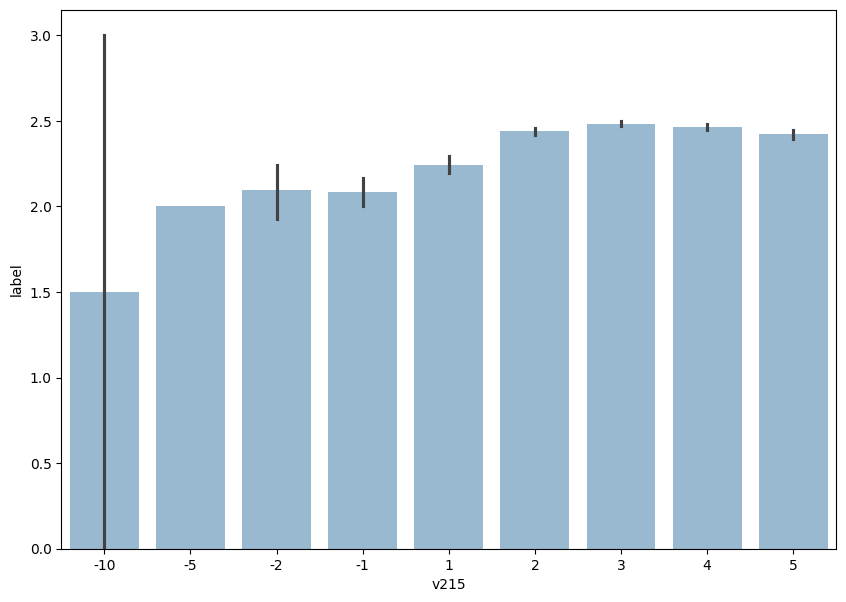

--------------------------------------------------
col: v216


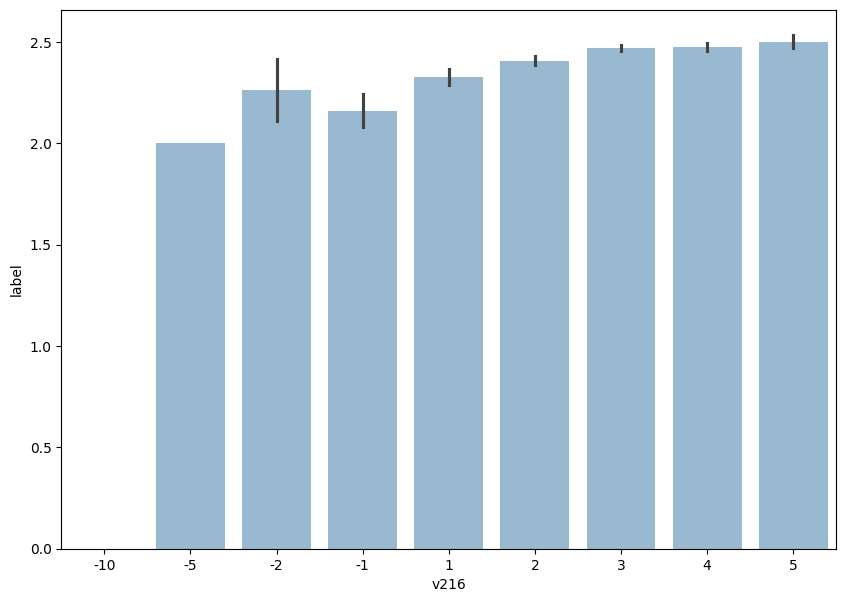

--------------------------------------------------
col: v217


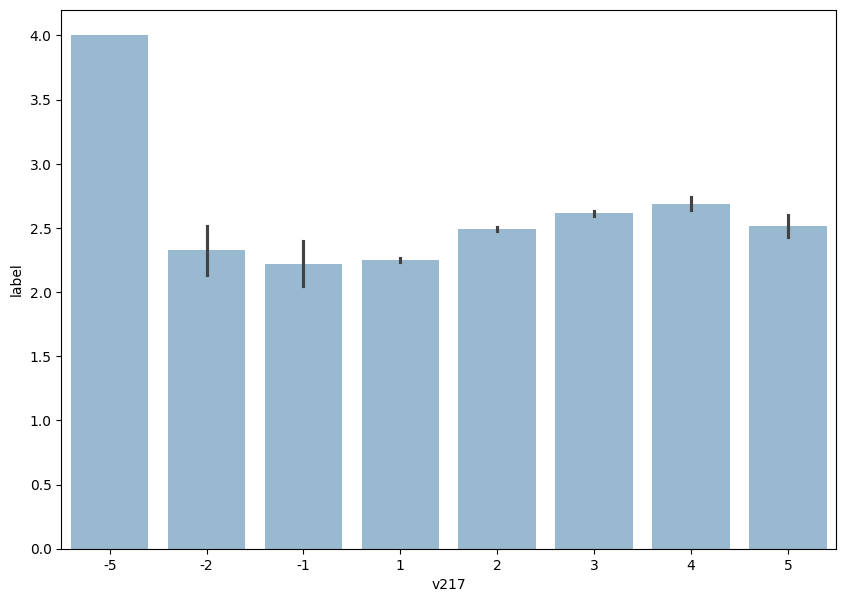

--------------------------------------------------
col: v218


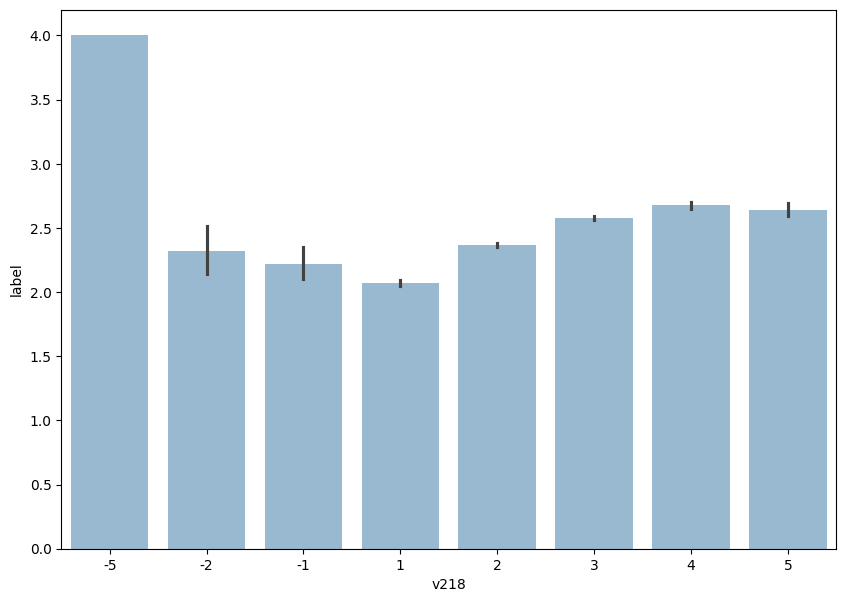

--------------------------------------------------
col: v219


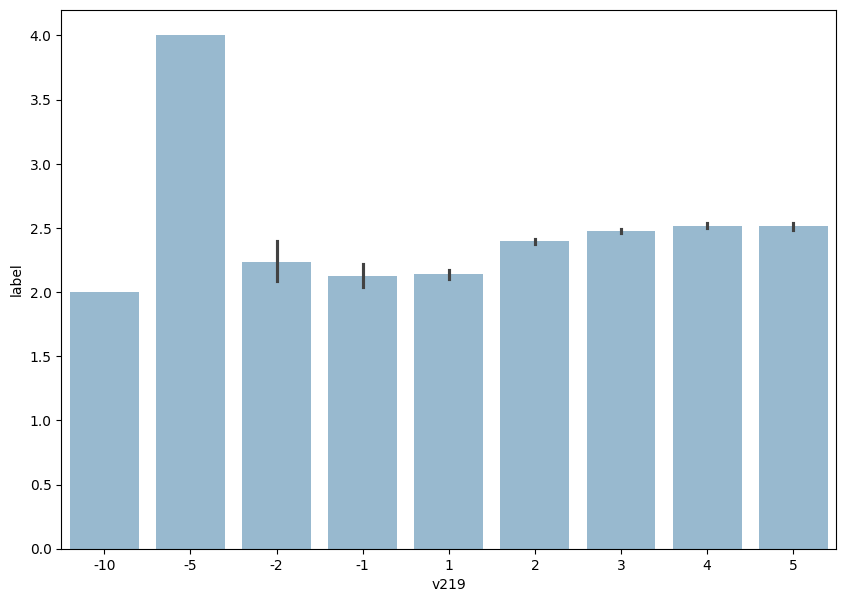

--------------------------------------------------
col: v220


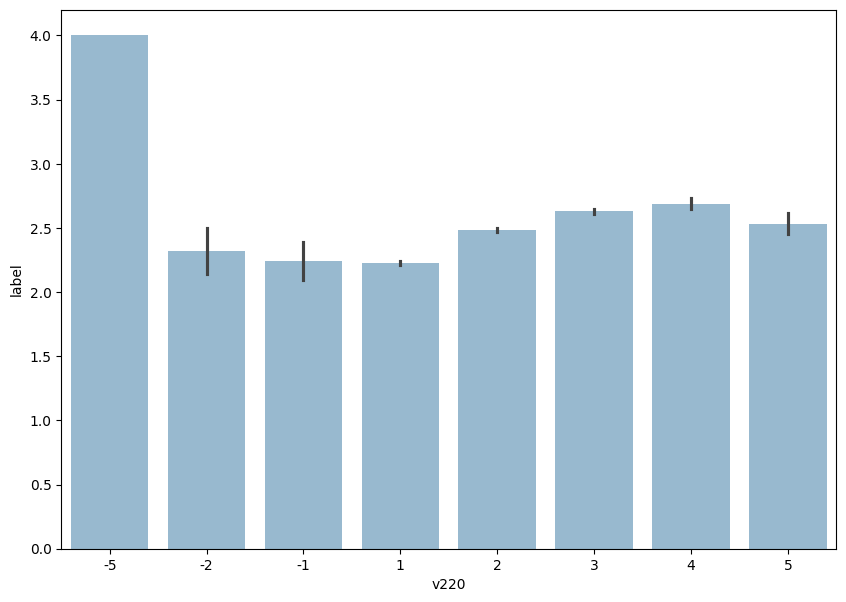

--------------------------------------------------
col: v221


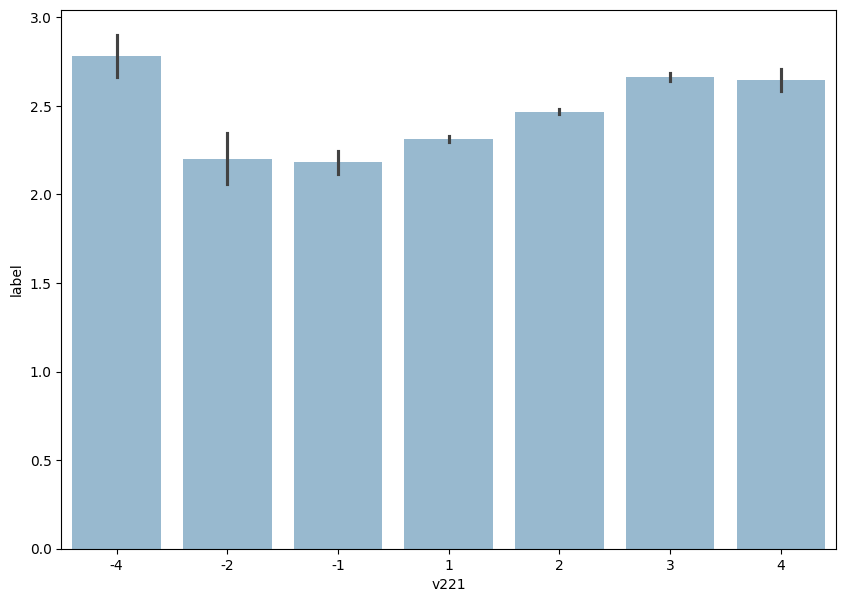

--------------------------------------------------
col: v221_DK


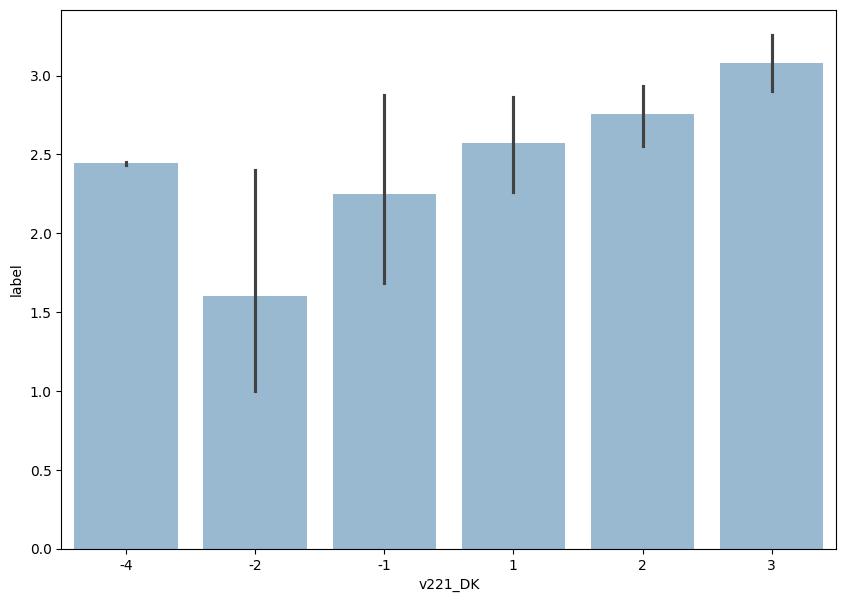

--------------------------------------------------
col: v222


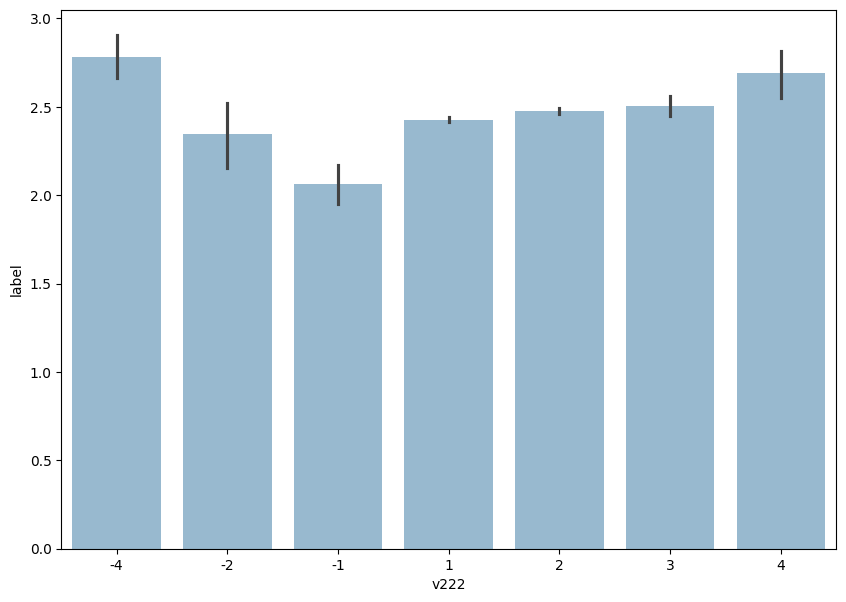

--------------------------------------------------
col: v223


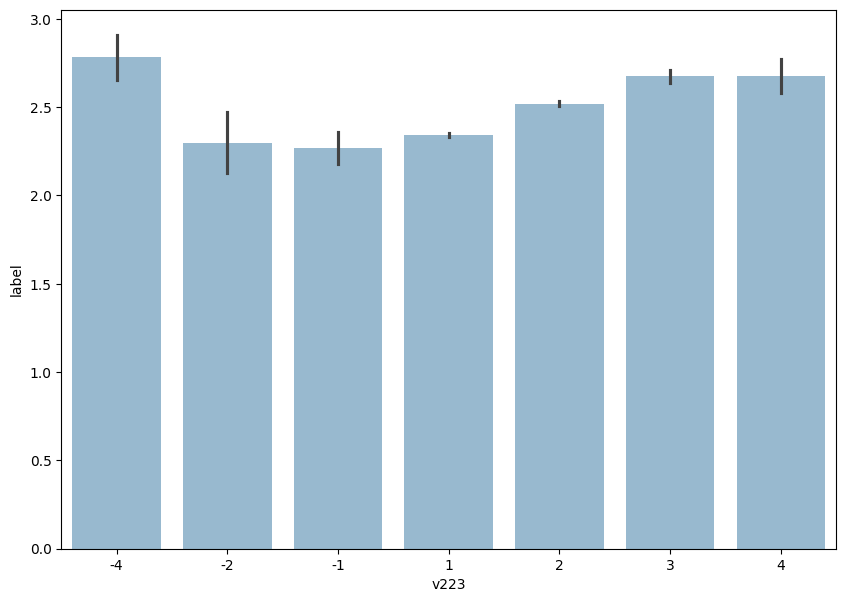

--------------------------------------------------
col: v224


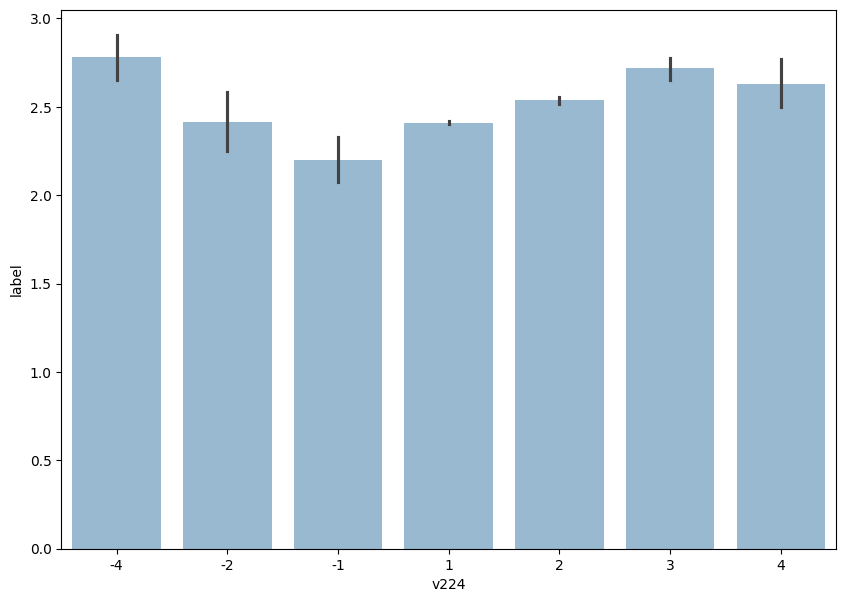

--------------------------------------------------
col: v225


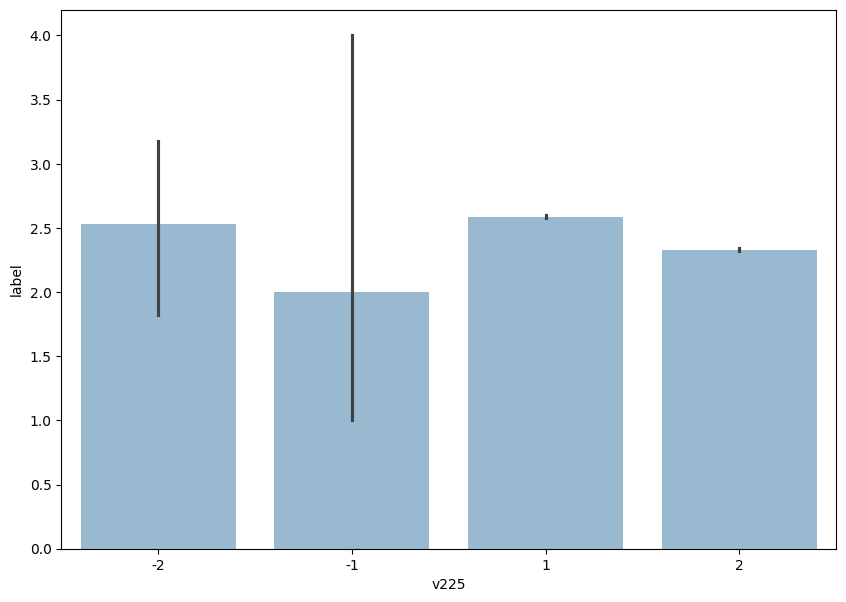

--------------------------------------------------
col: v226


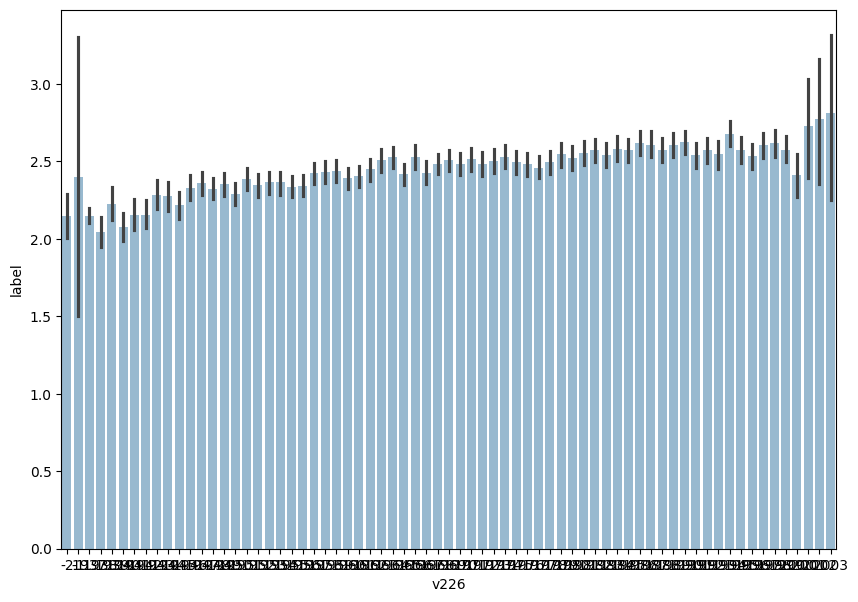

--------------------------------------------------
col: age


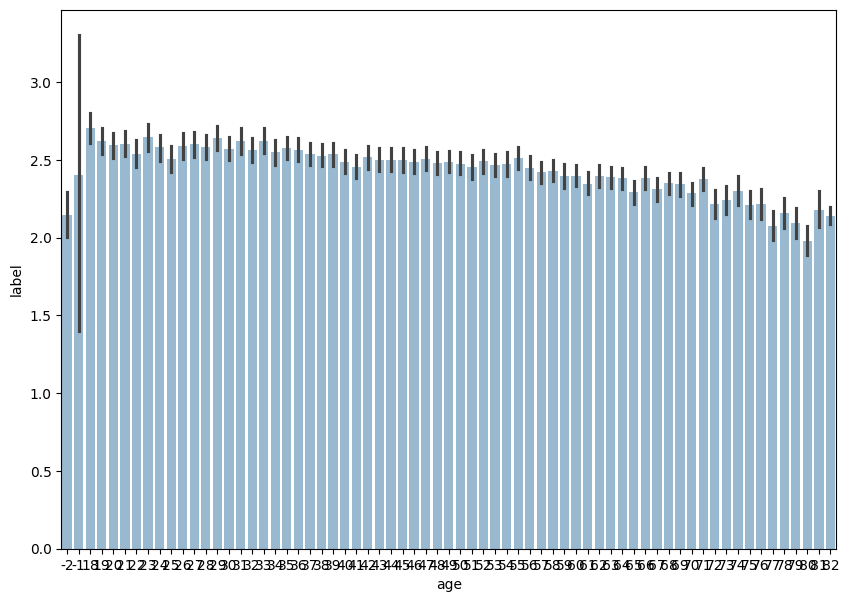

--------------------------------------------------
col: age_r2


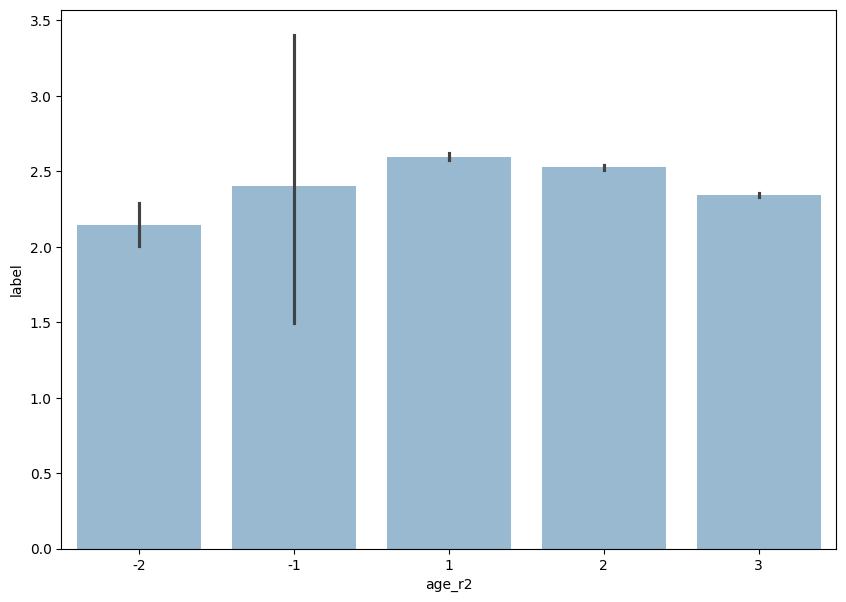

--------------------------------------------------
col: v227


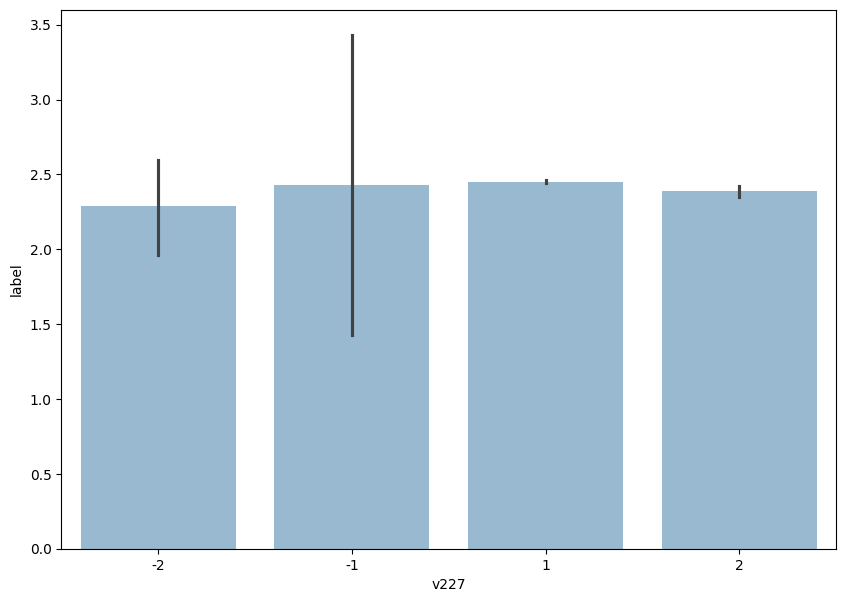

--------------------------------------------------
col: v228b_r


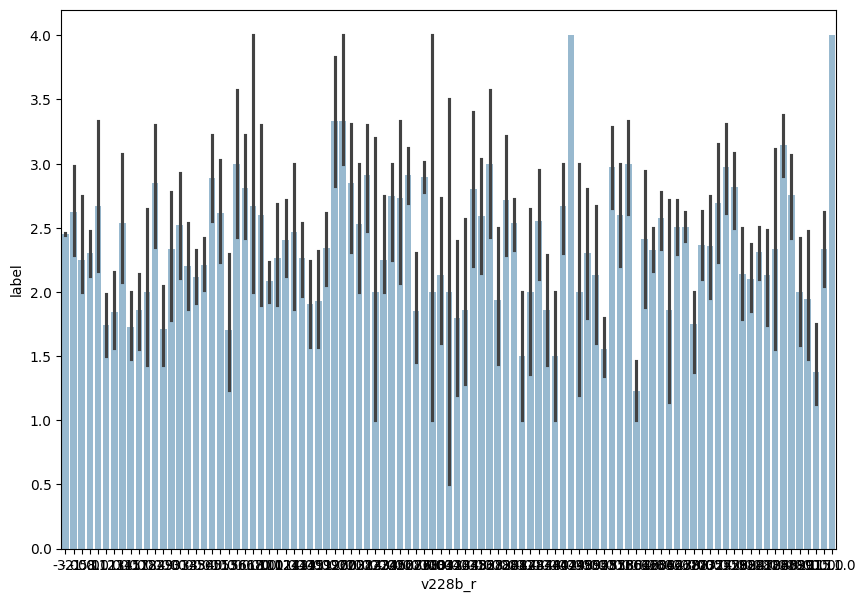

--------------------------------------------------
col: v229


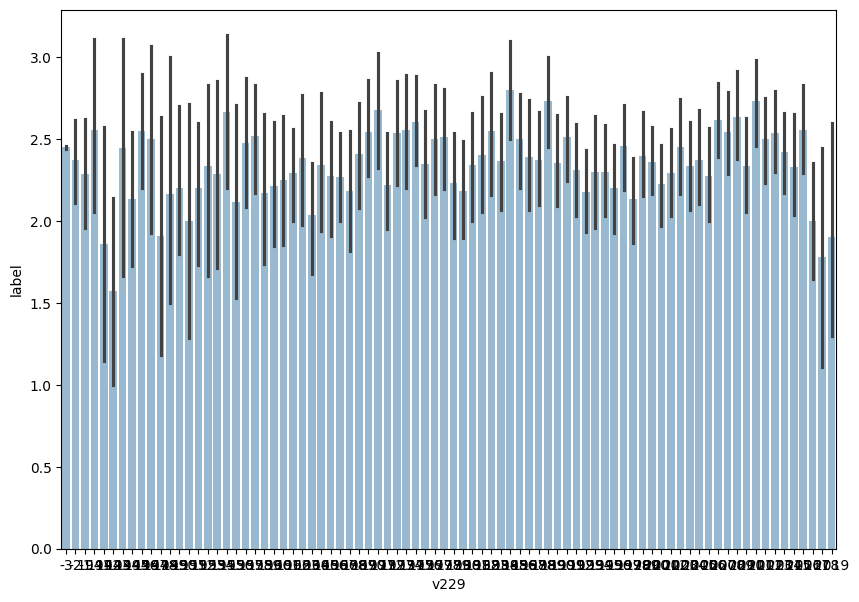

--------------------------------------------------
col: v230


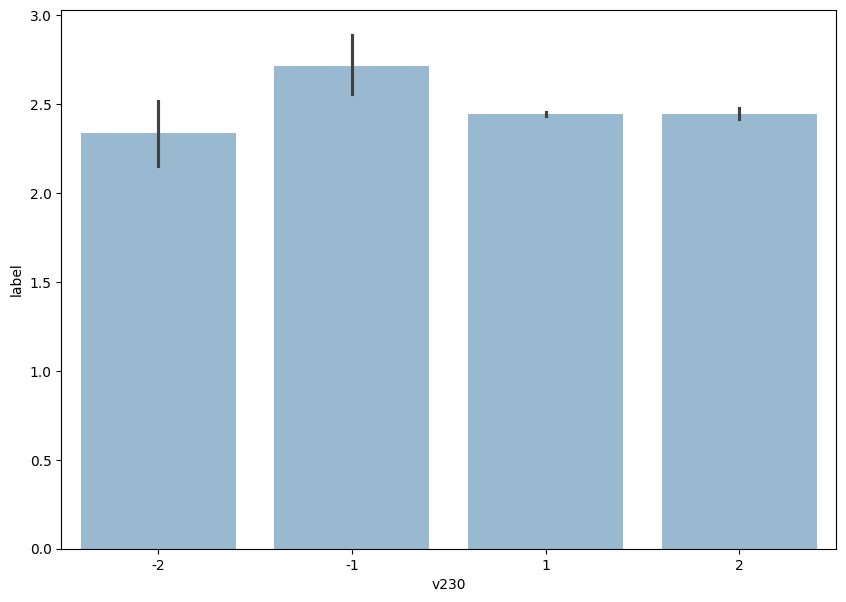

--------------------------------------------------
col: v231b_r


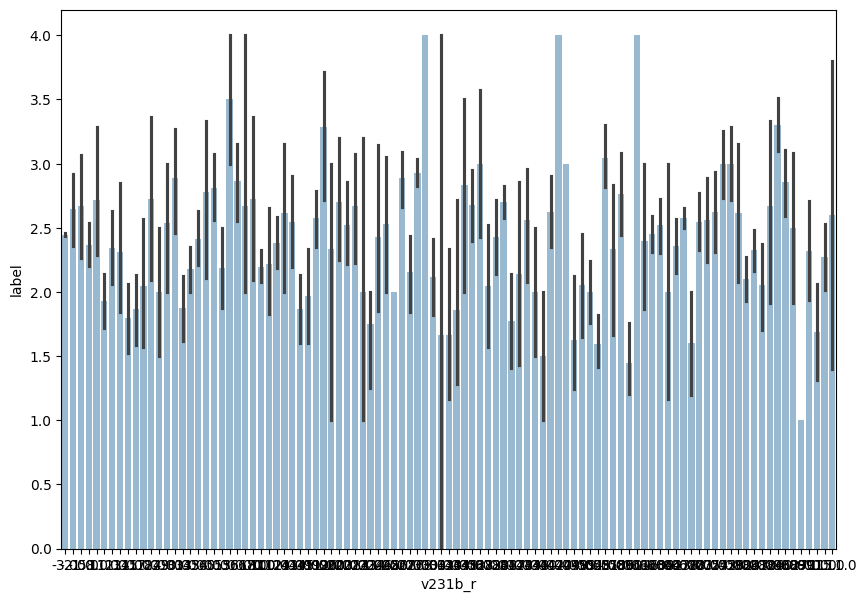

--------------------------------------------------
col: v232


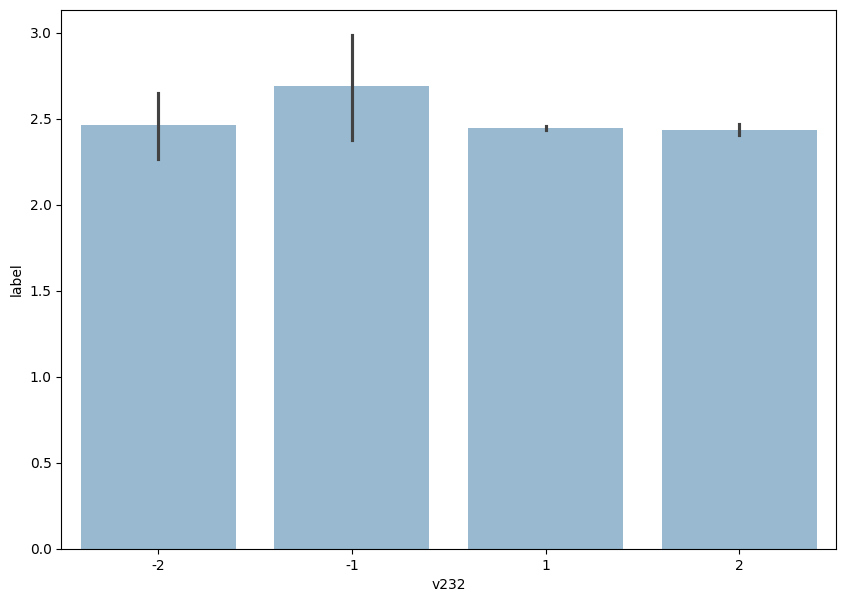

--------------------------------------------------
col: v233b_r


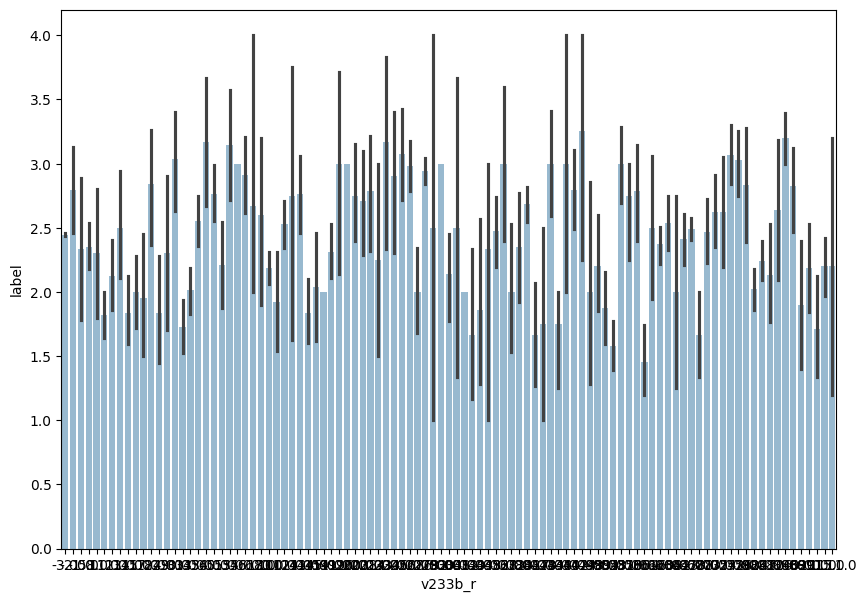

--------------------------------------------------
col: v234


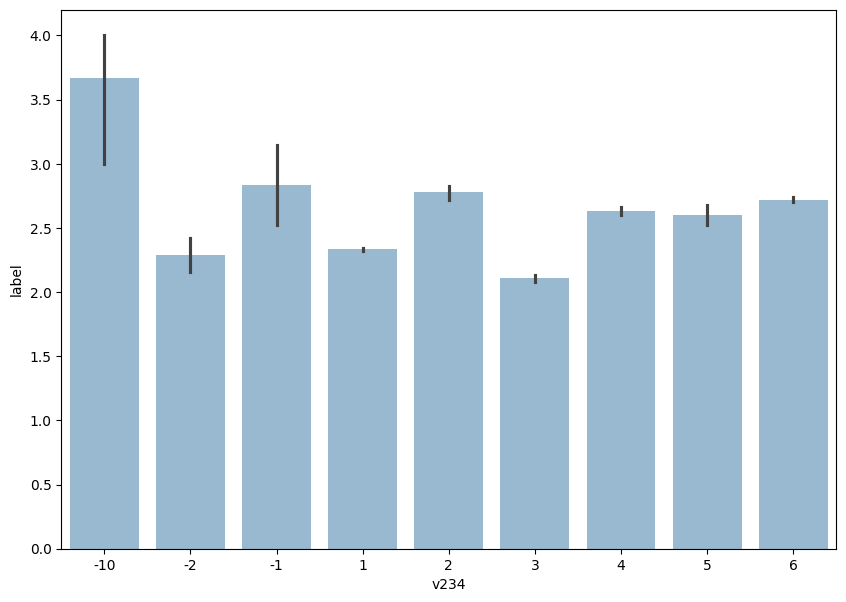

--------------------------------------------------
col: v235


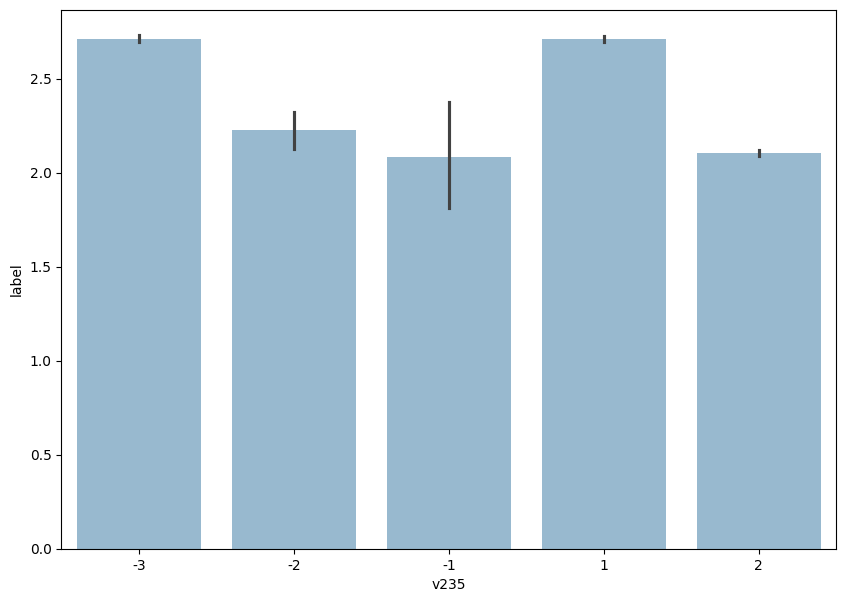

--------------------------------------------------
col: v236


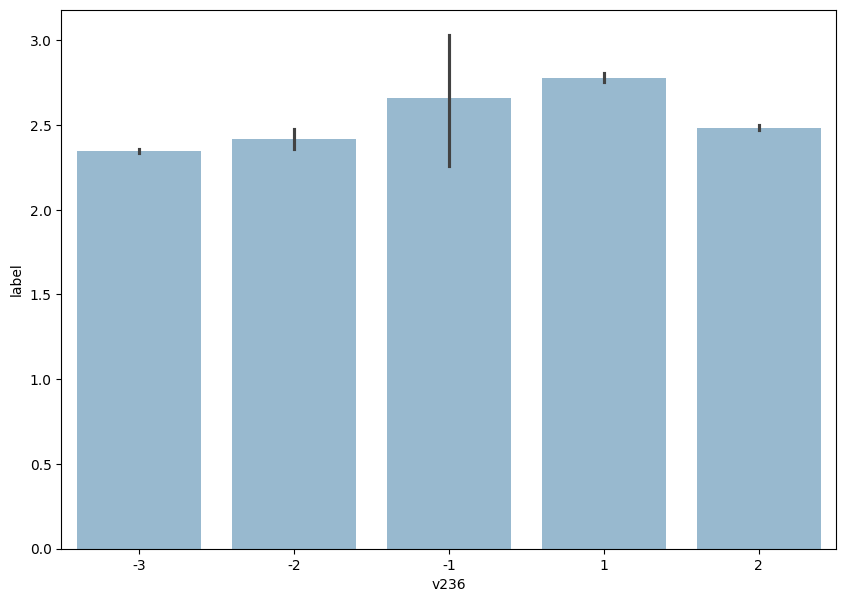

--------------------------------------------------
col: v237


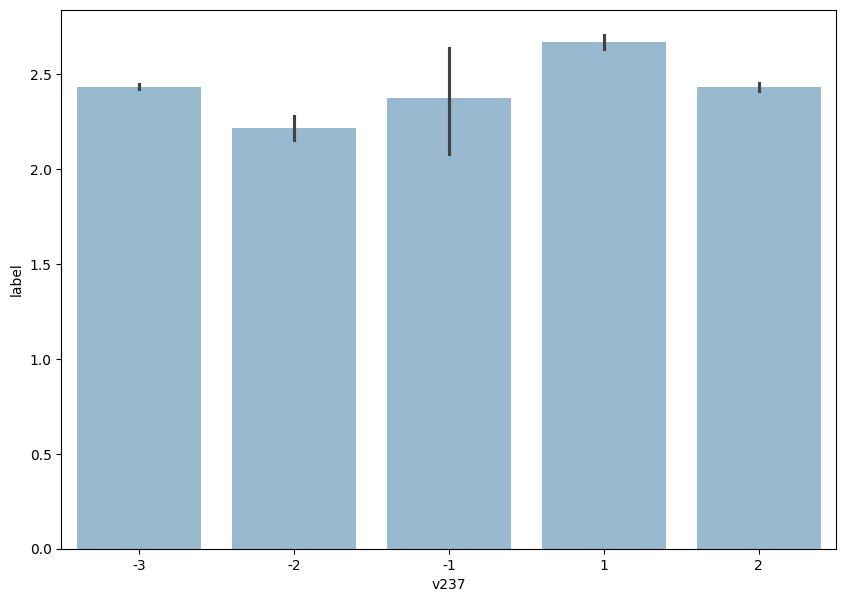

--------------------------------------------------
col: v238


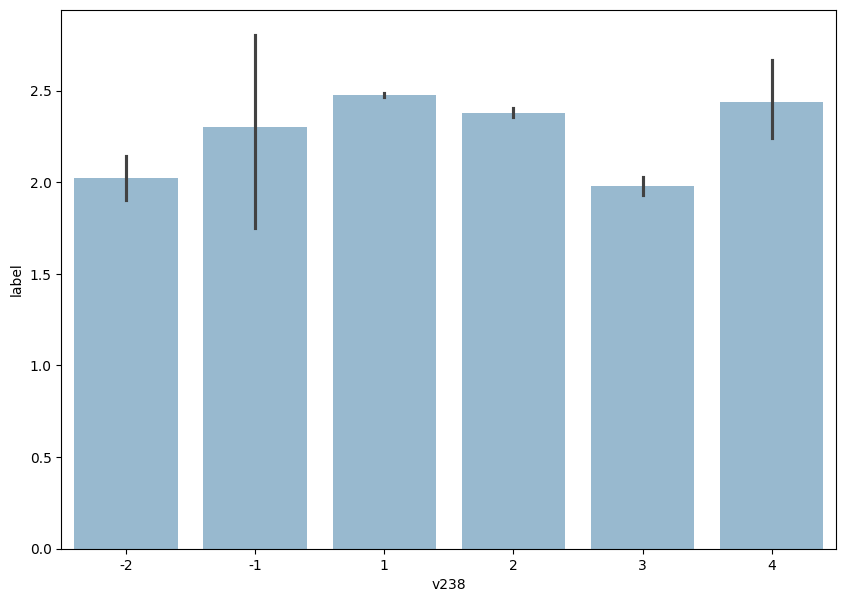

--------------------------------------------------
col: v239_r


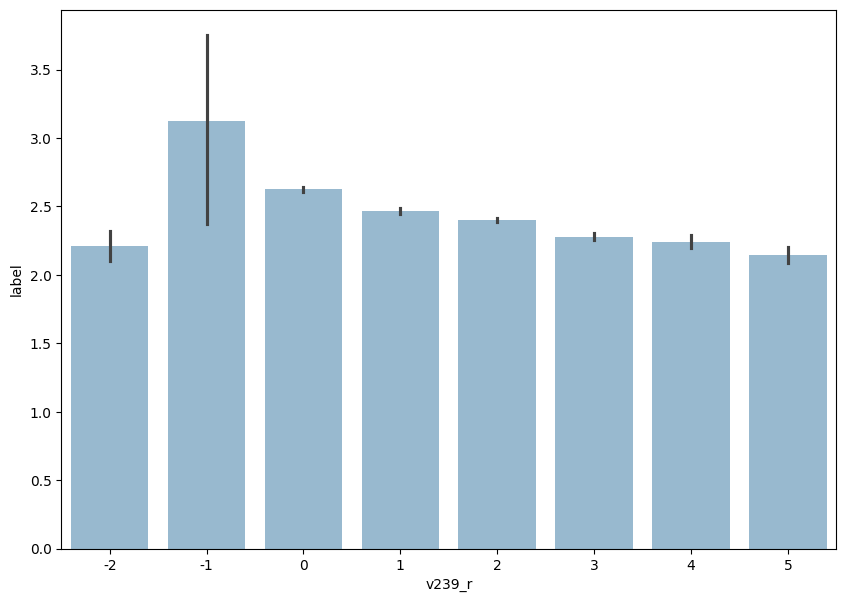

--------------------------------------------------
col: v239a


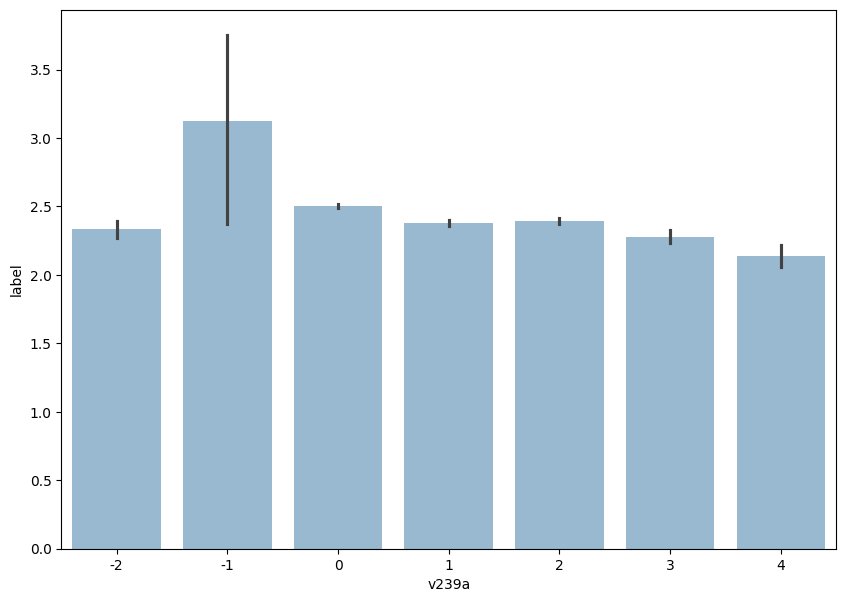

--------------------------------------------------
col: v239b


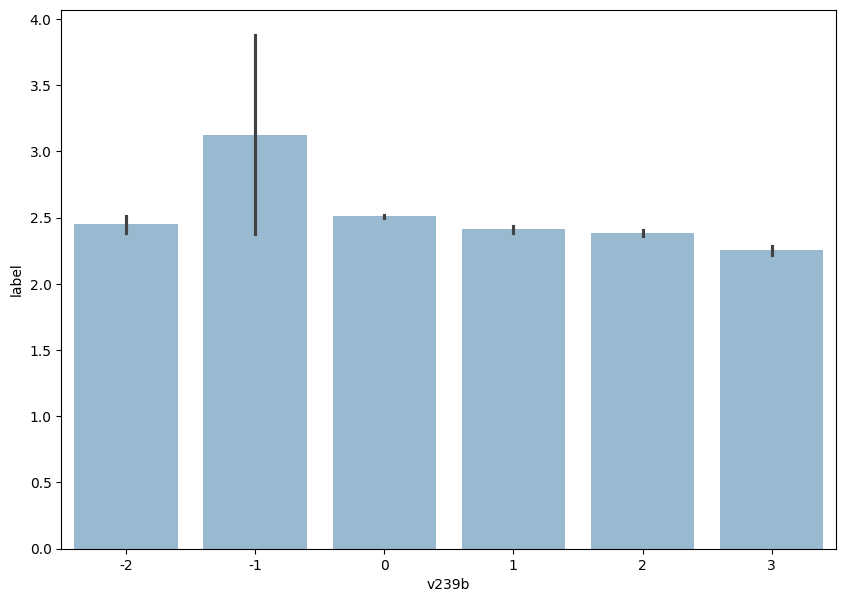

--------------------------------------------------
col: v240


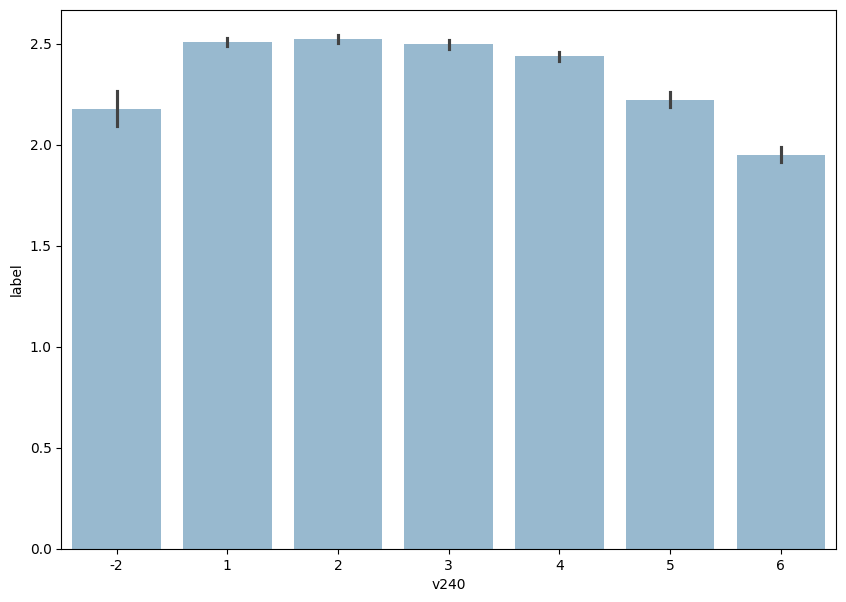

--------------------------------------------------
col: v241


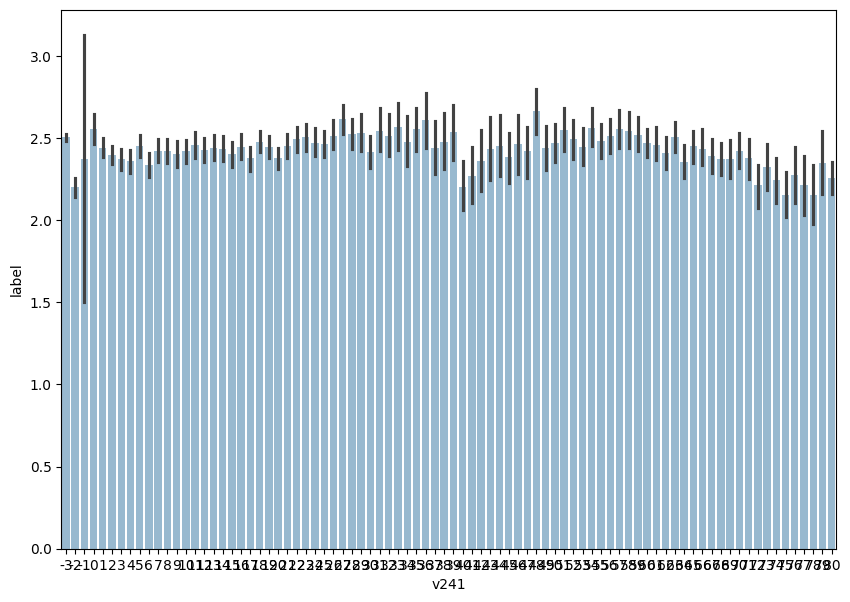

--------------------------------------------------
col: v242


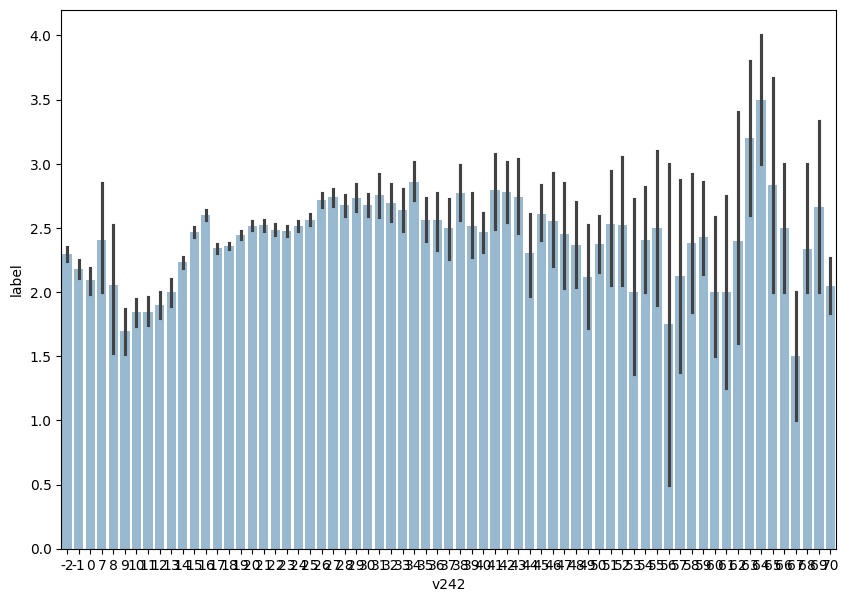

--------------------------------------------------
col: v242_r


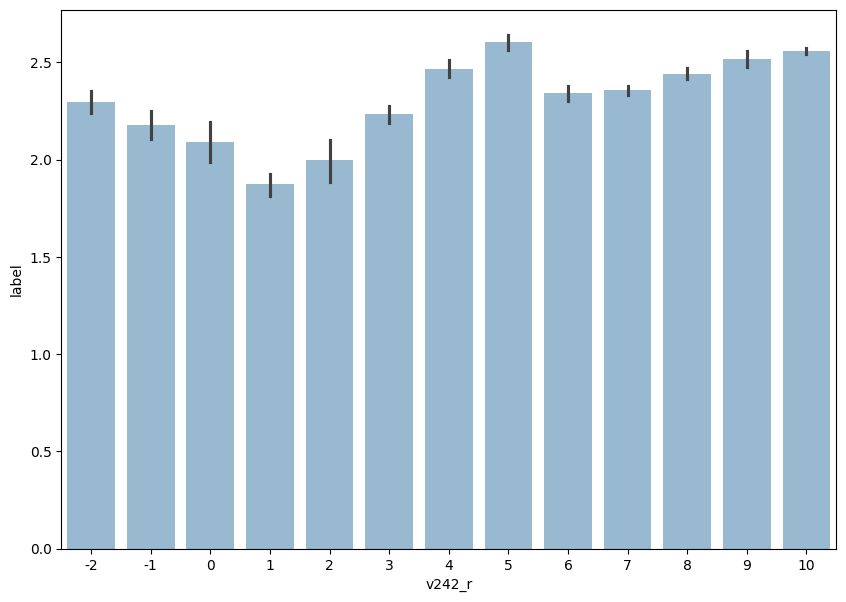

--------------------------------------------------
col: v243_ISCED_3


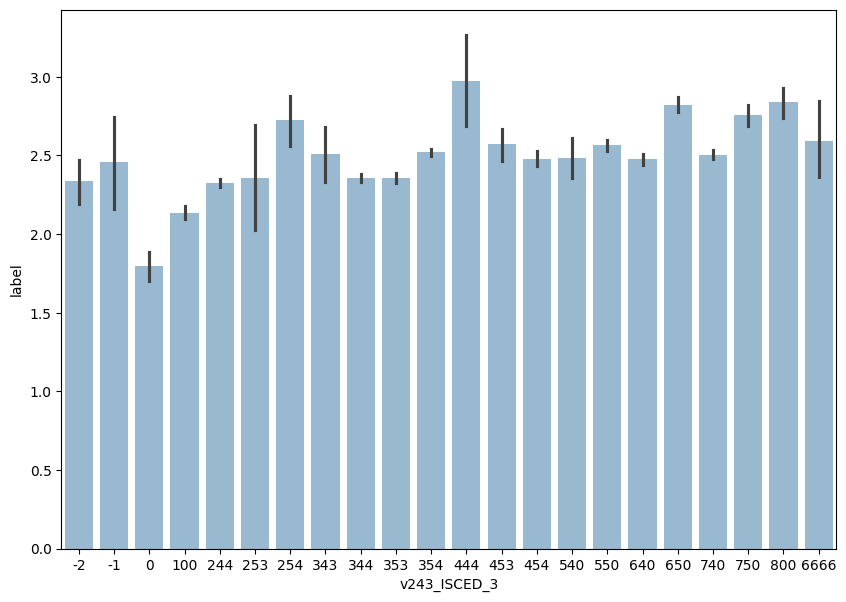

--------------------------------------------------
col: v243_cs


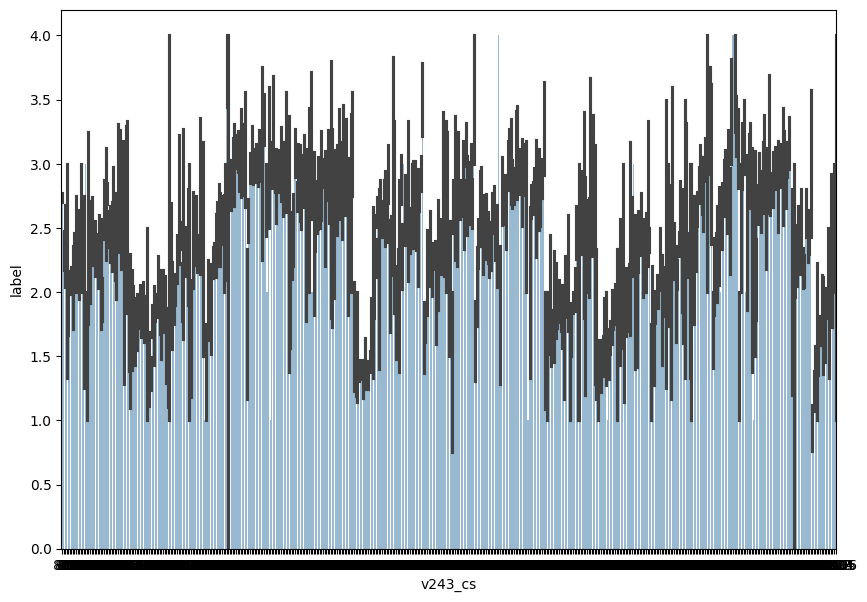

--------------------------------------------------
col: v244


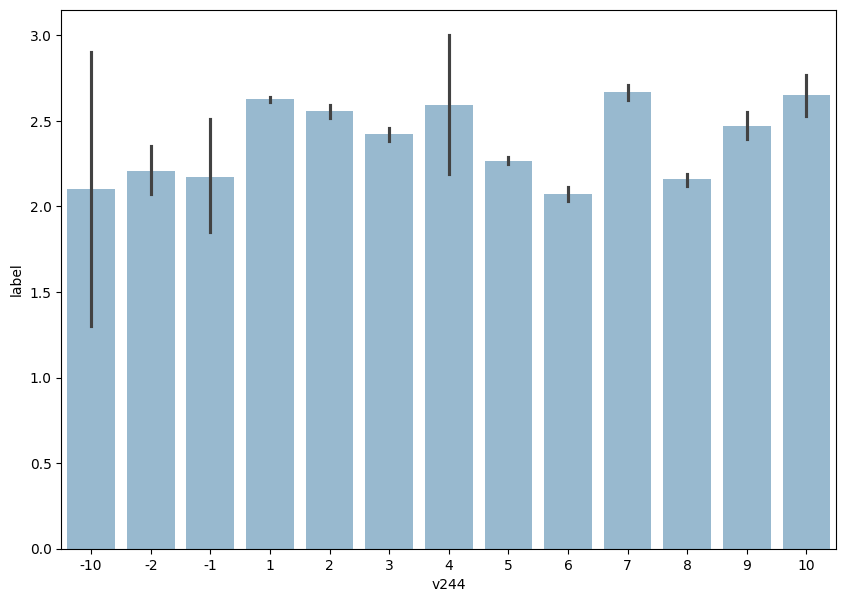

--------------------------------------------------
col: v245


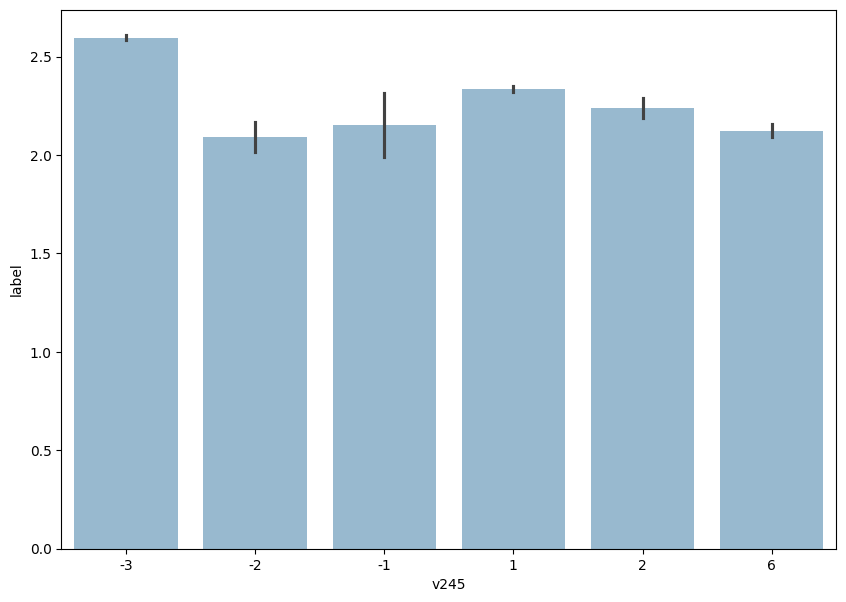

--------------------------------------------------
col: v246_ISCO_2


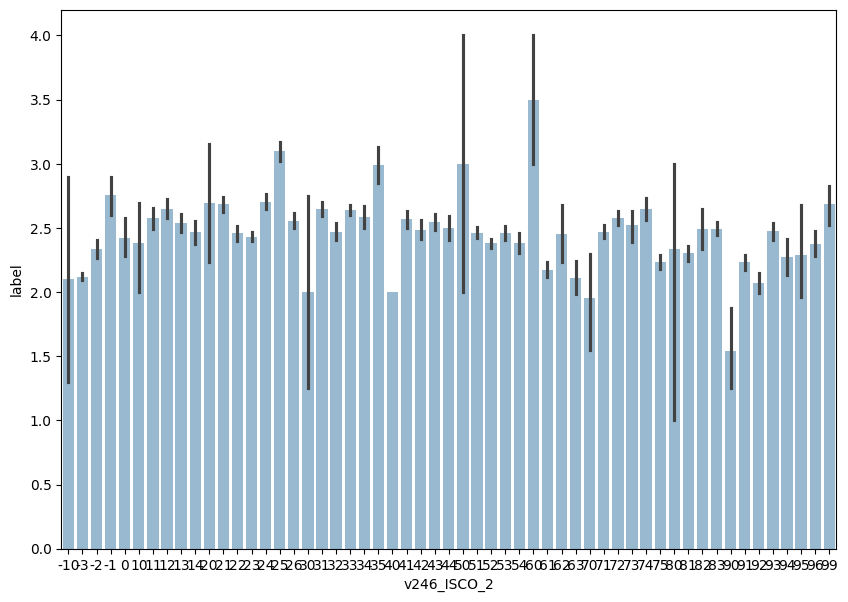

--------------------------------------------------
col: v246_SIOPS


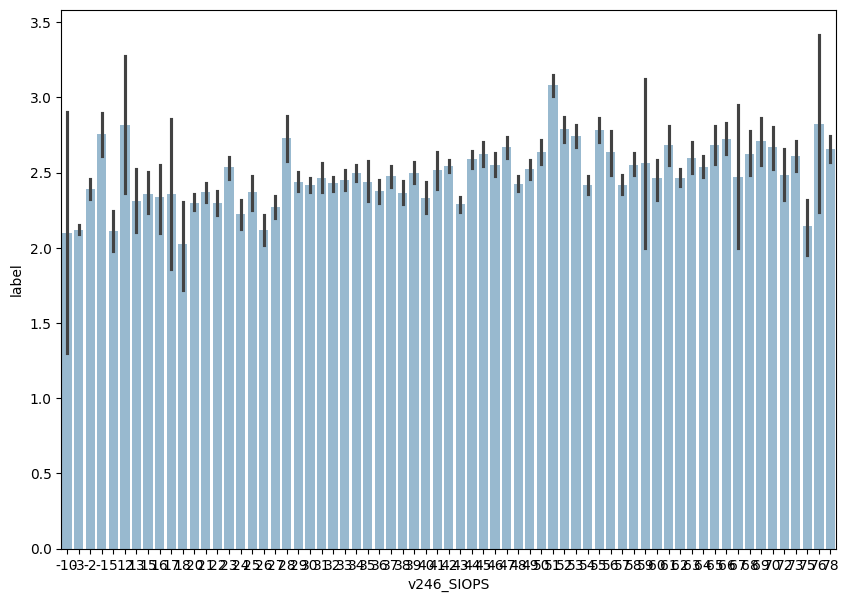

--------------------------------------------------
col: v246_ISEI


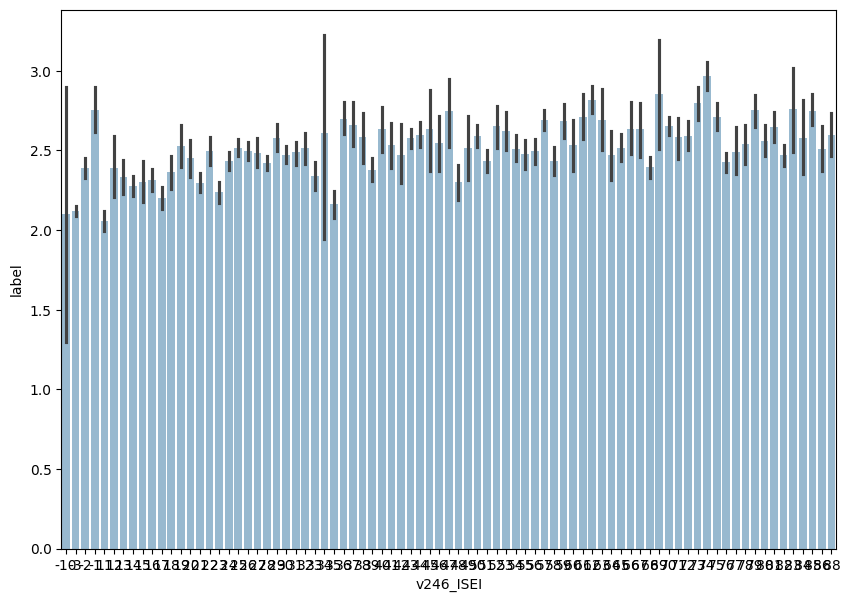

--------------------------------------------------
col: v246_ESeC


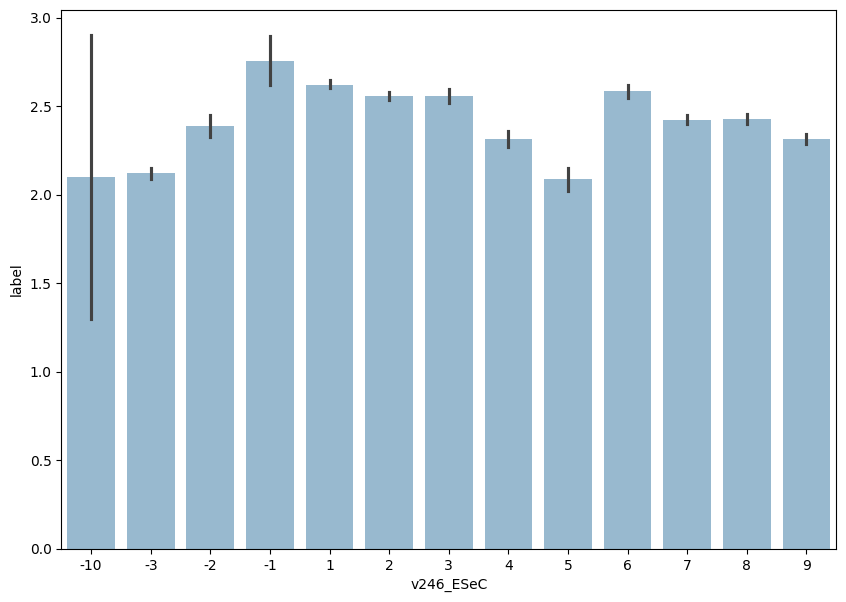

--------------------------------------------------
col: v246_egp


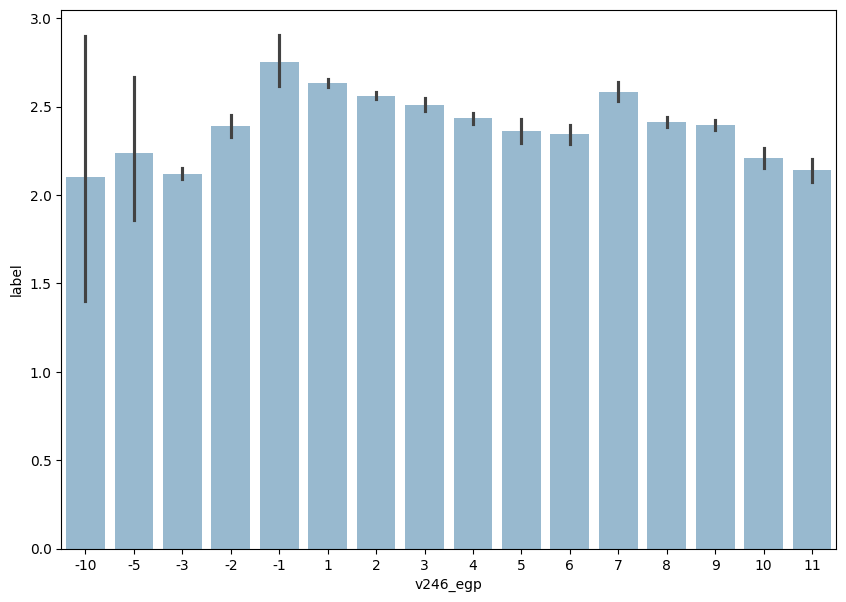

--------------------------------------------------
col: v247


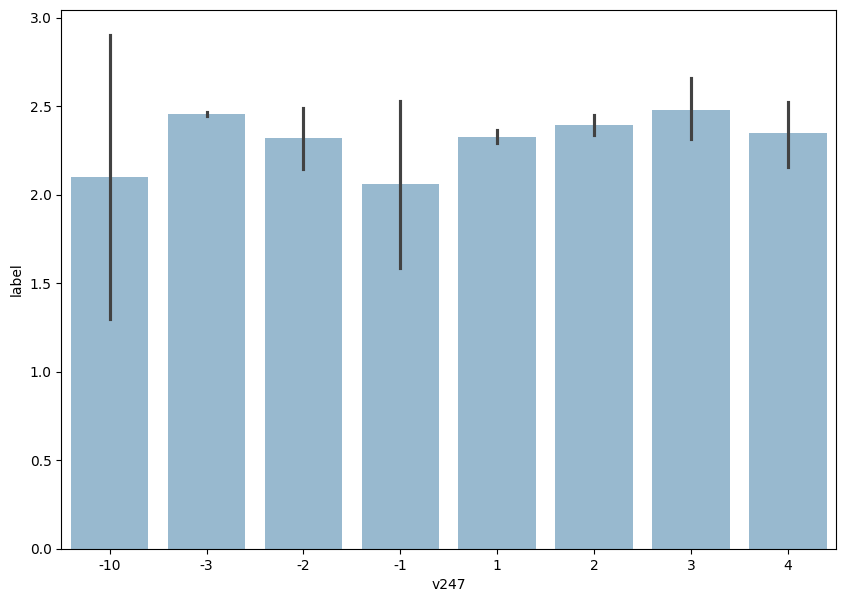

--------------------------------------------------
col: v248


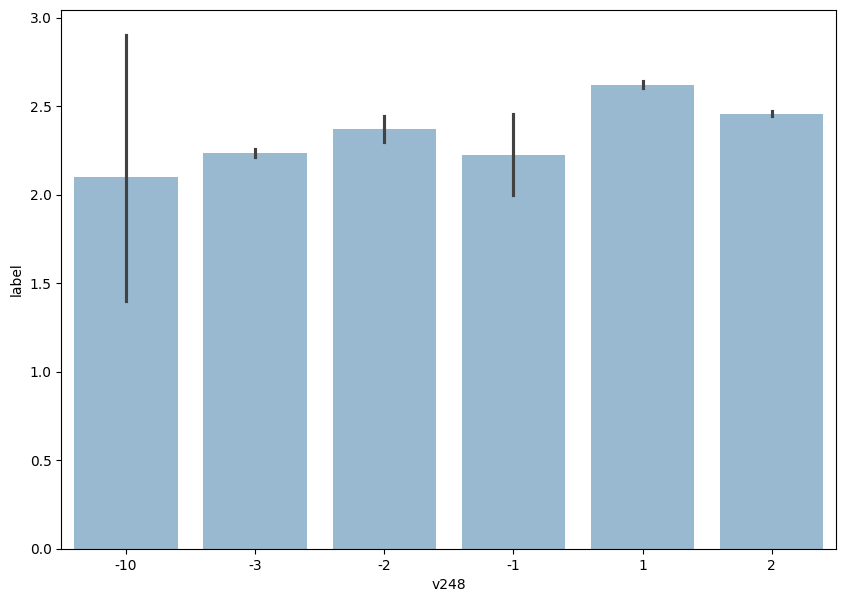

--------------------------------------------------
col: v248a


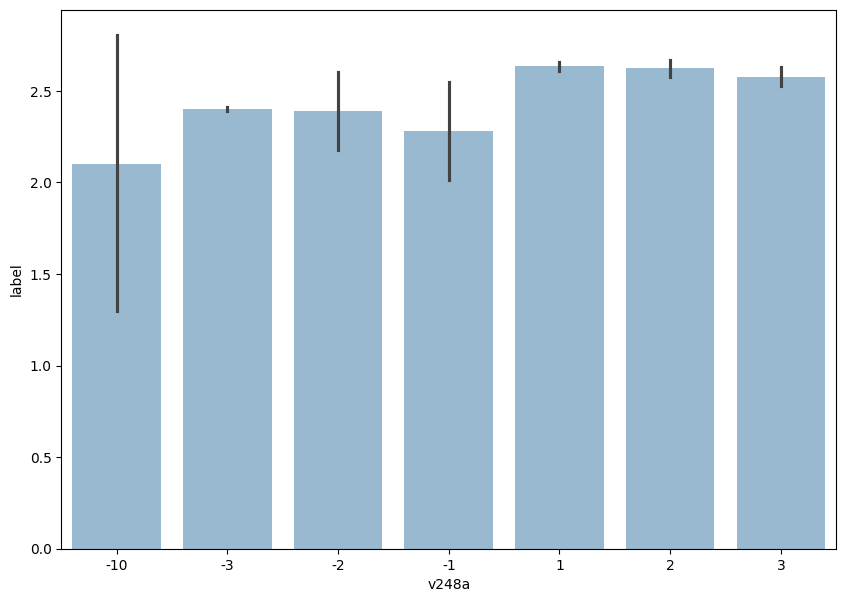

--------------------------------------------------
col: v249


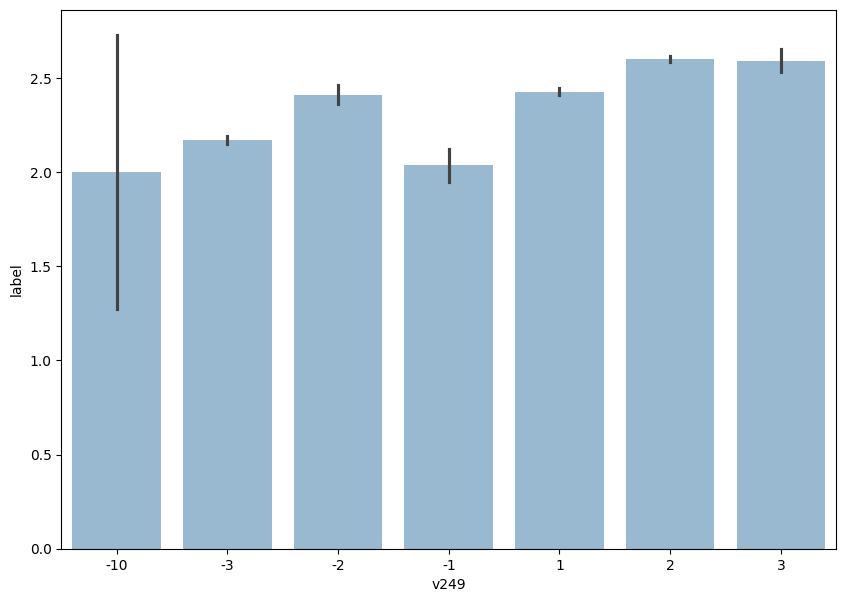

--------------------------------------------------
col: v250


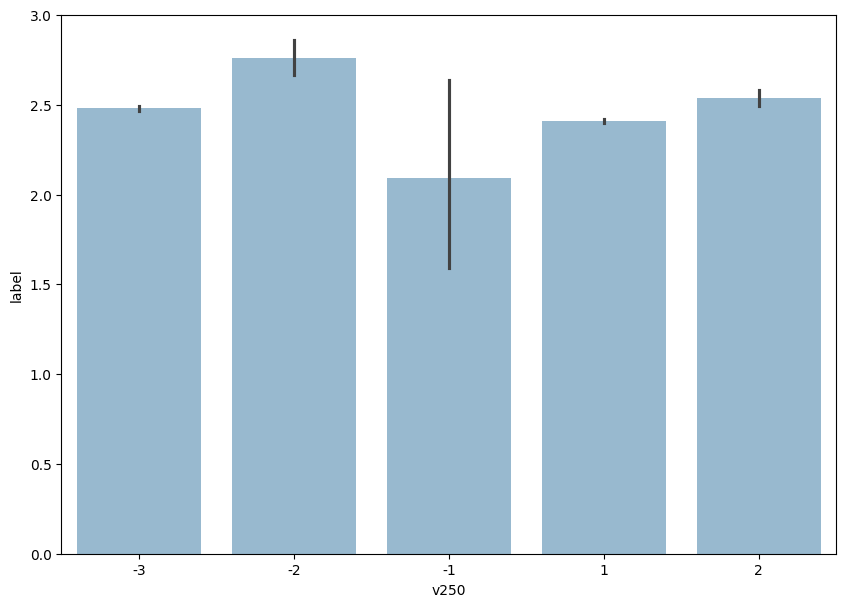

--------------------------------------------------
col: v251b_r


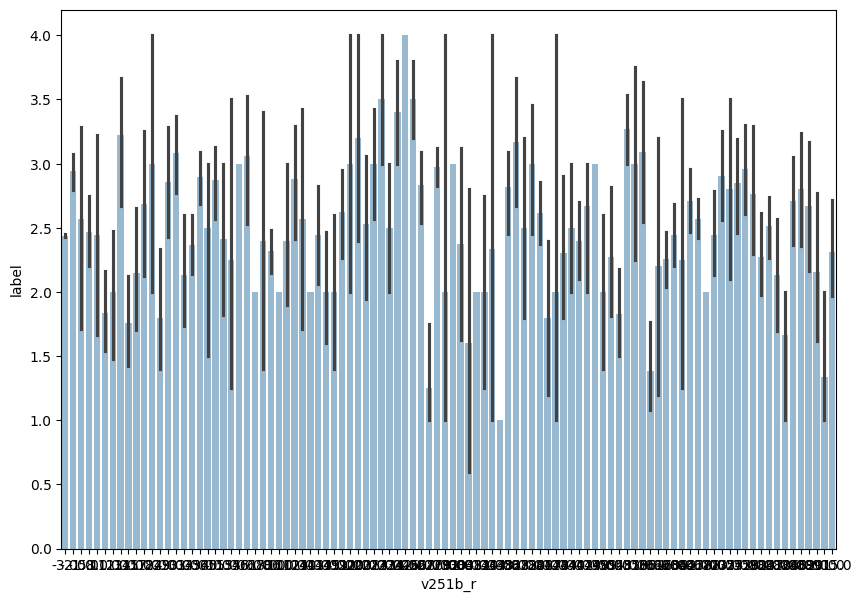

--------------------------------------------------
col: v252_edulvlb


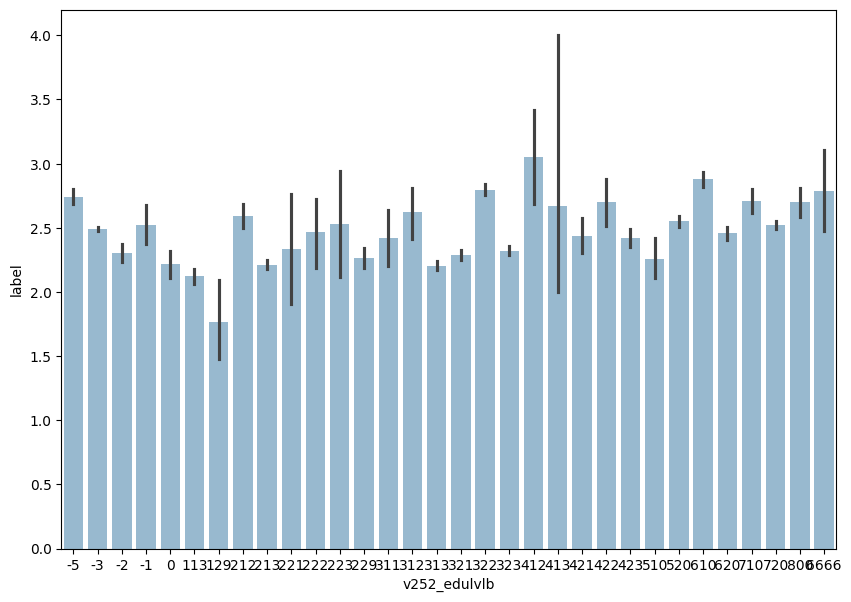

--------------------------------------------------
col: v252_ISCED_2


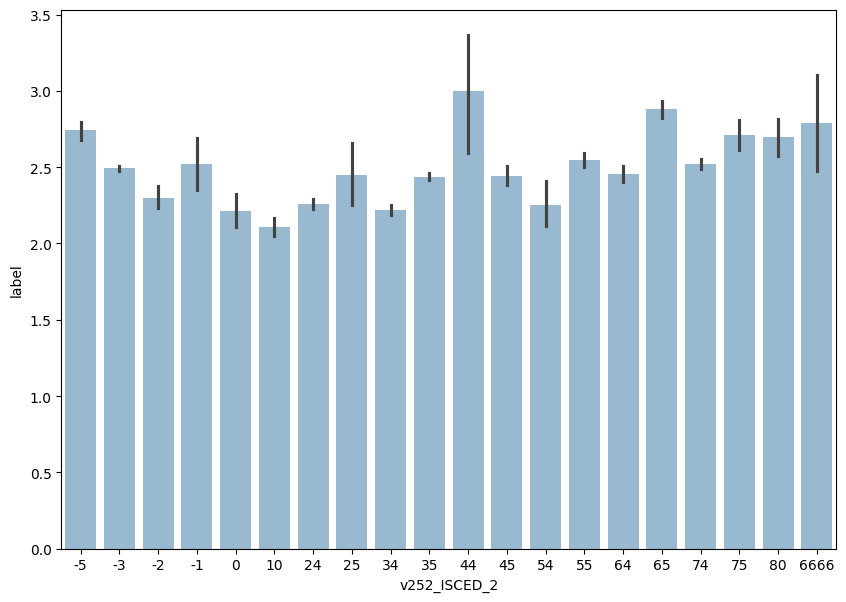

--------------------------------------------------
col: v252_8cat


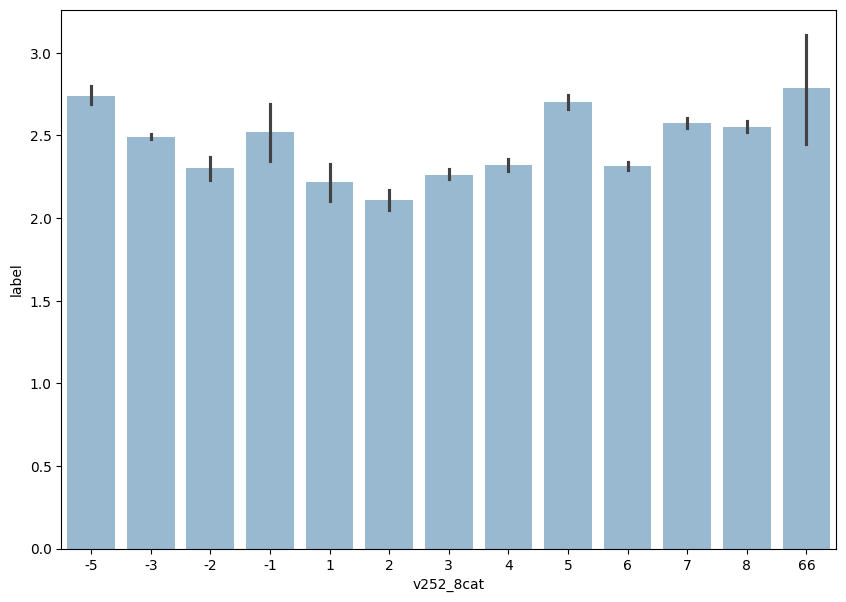

--------------------------------------------------
col: v252_cs


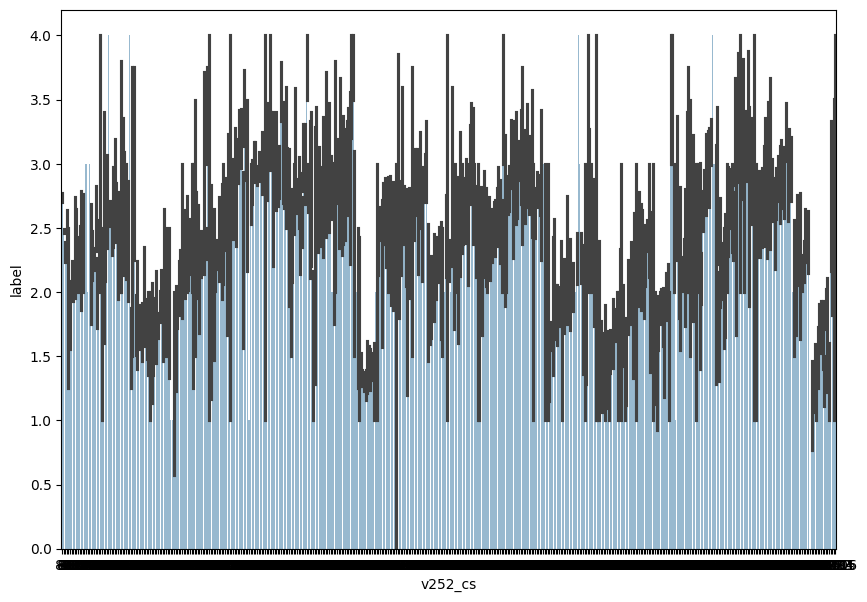

--------------------------------------------------
col: v253


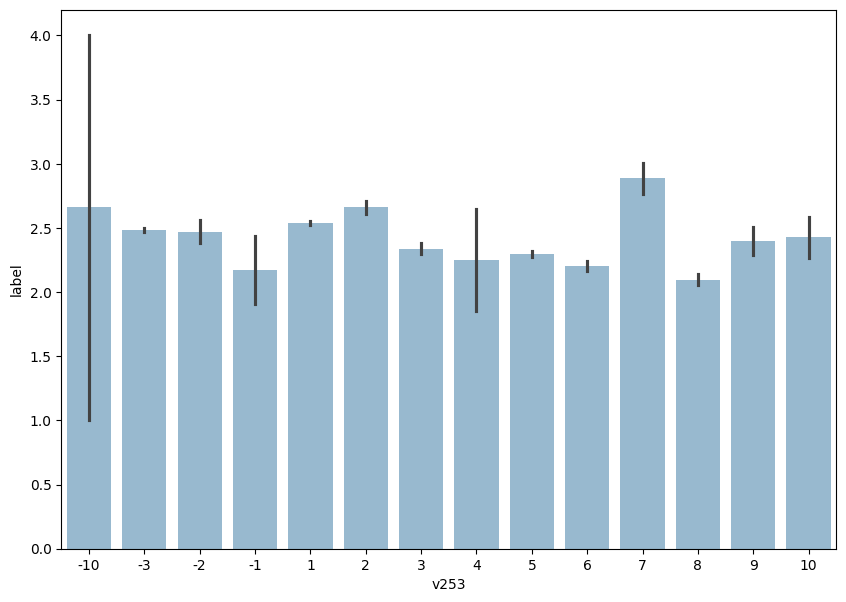

--------------------------------------------------
col: v254


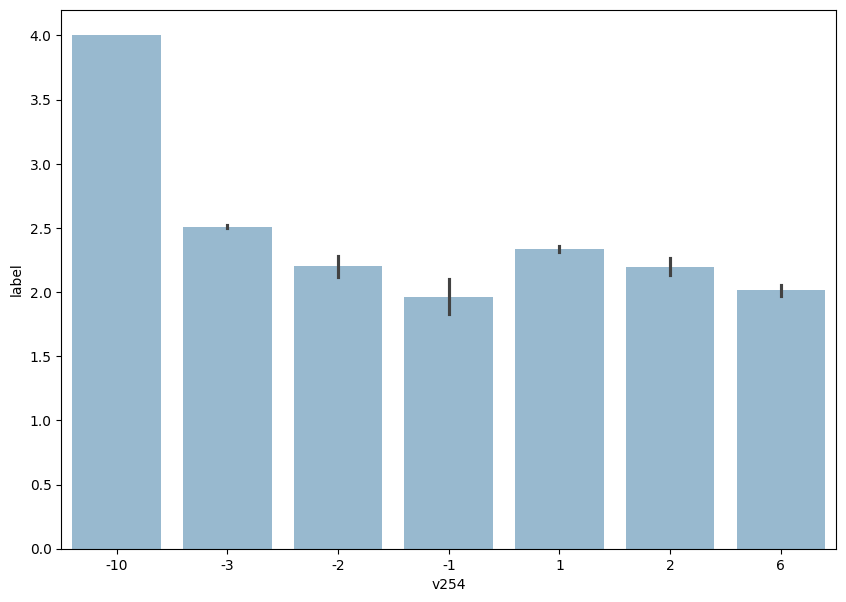

--------------------------------------------------
col: v255_ISCO_2


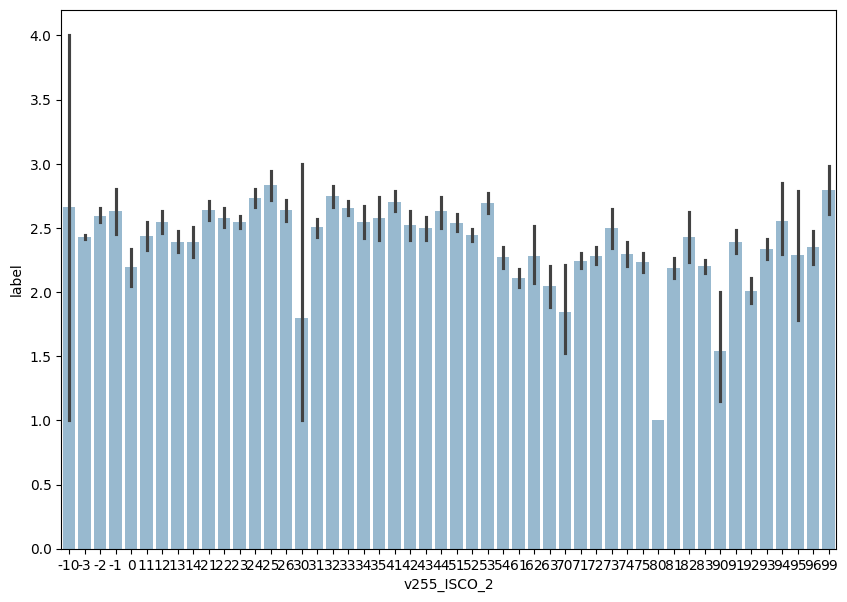

--------------------------------------------------
col: v255_ISEI


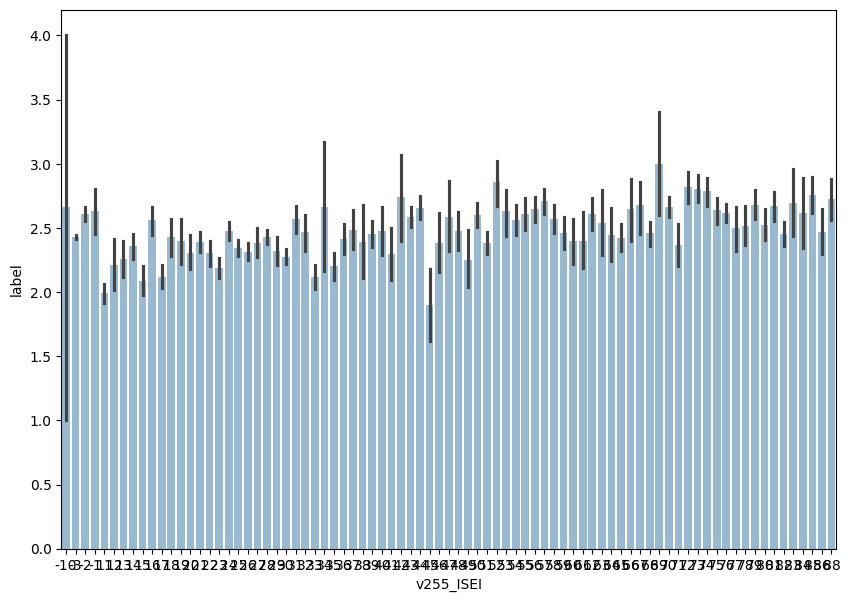

--------------------------------------------------
col: v255_egp


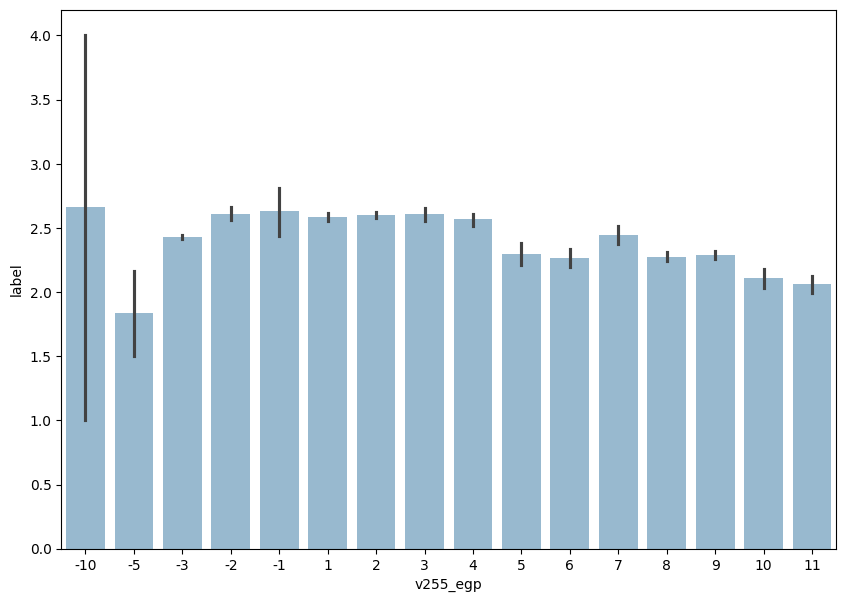

--------------------------------------------------
col: v256


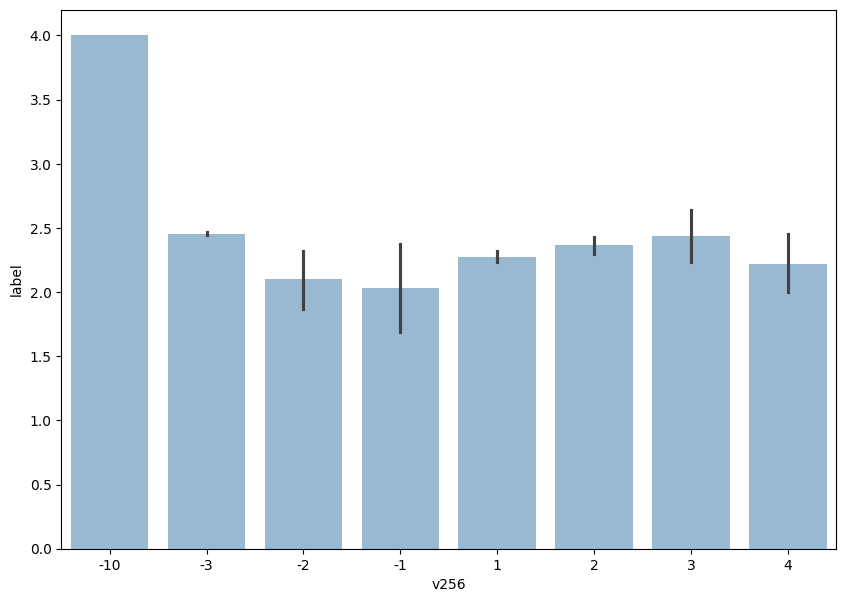

--------------------------------------------------
col: v257


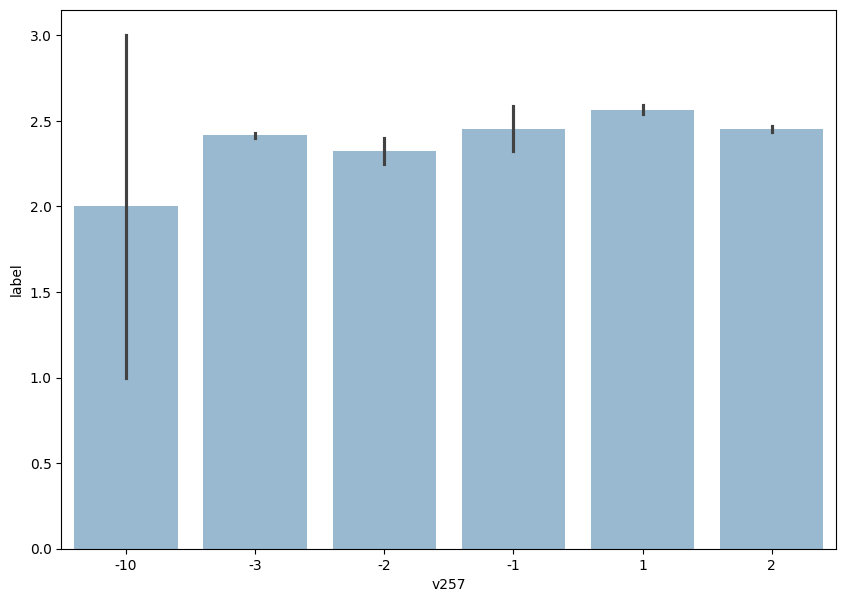

--------------------------------------------------
col: v258


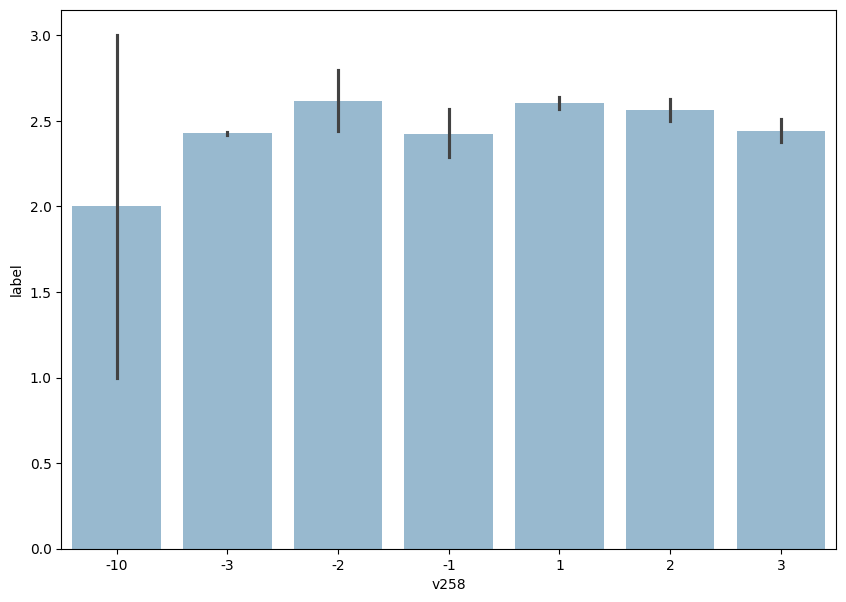

--------------------------------------------------
col: v259


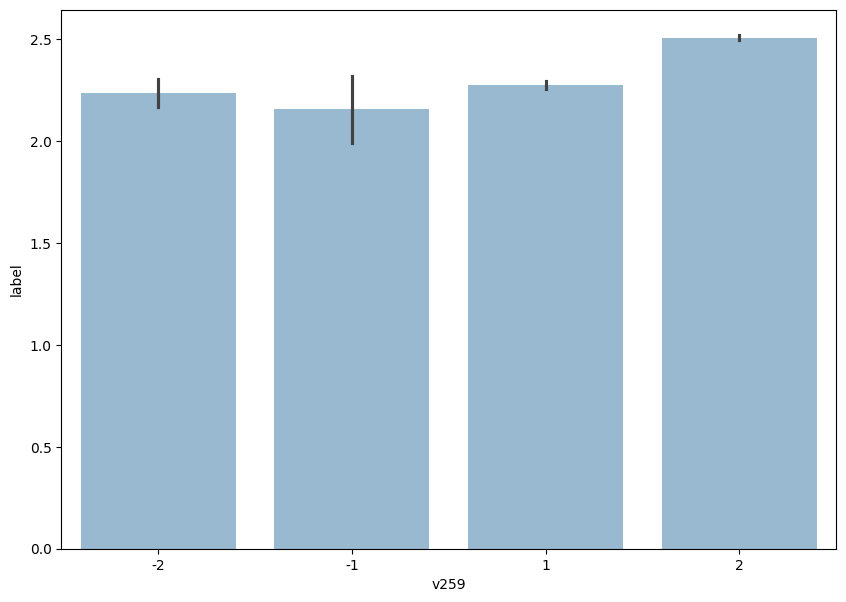

--------------------------------------------------
col: v260


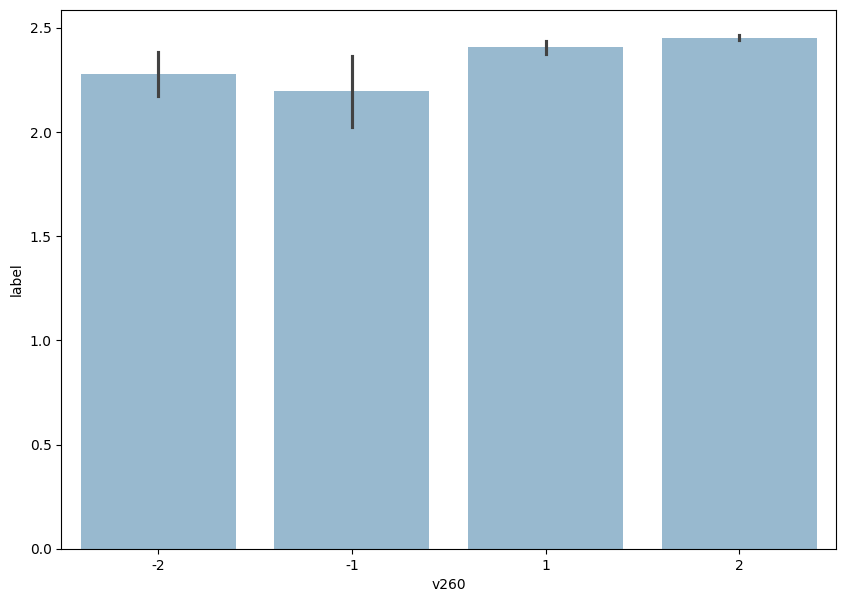

--------------------------------------------------
col: v261


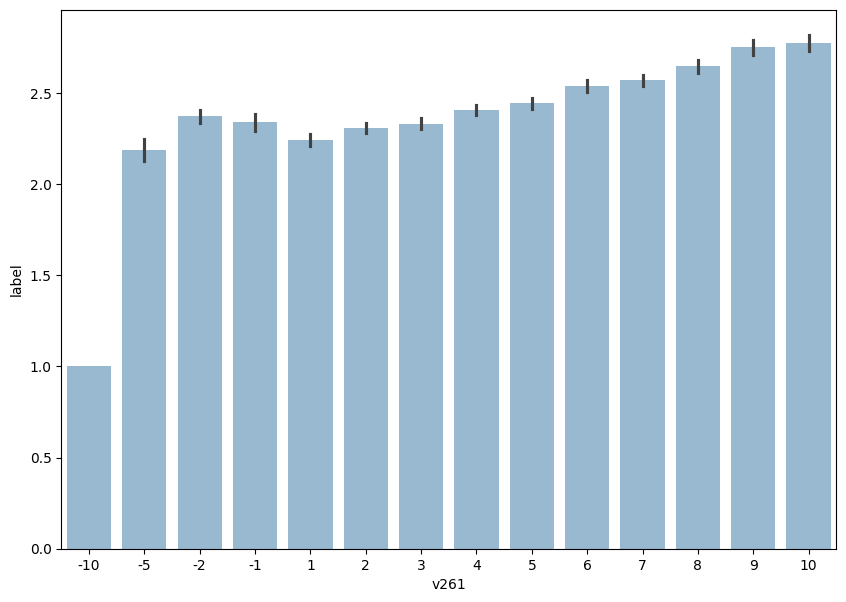

--------------------------------------------------
col: v261_ppp


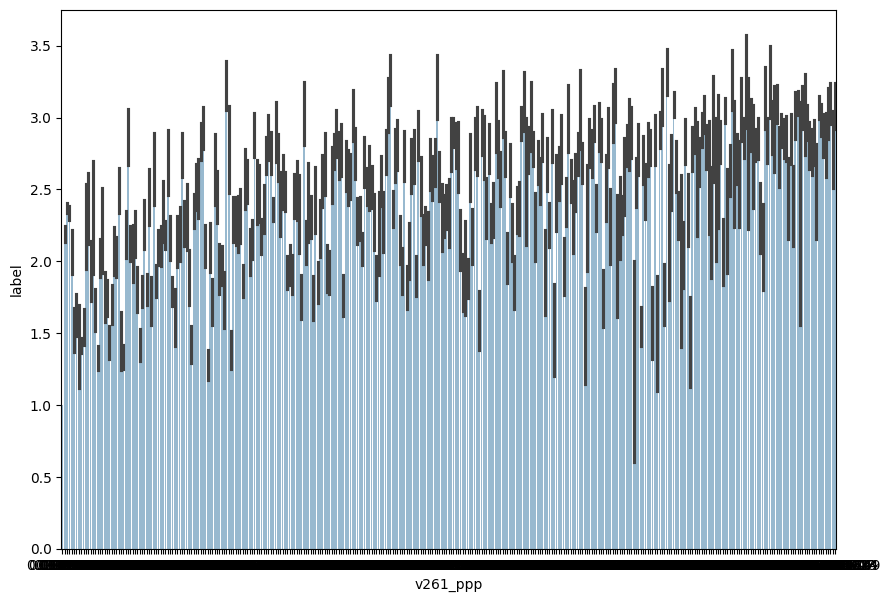

--------------------------------------------------
col: v261_r


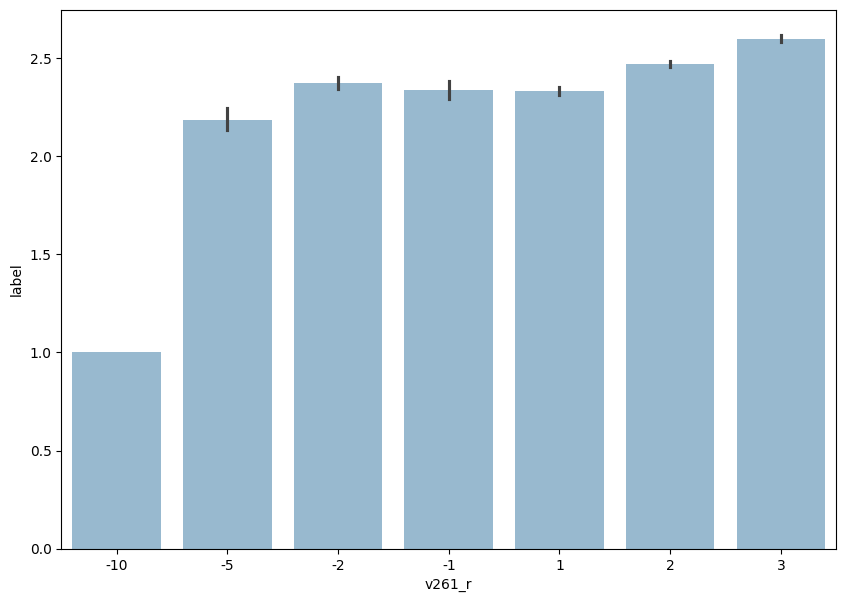

--------------------------------------------------
col: v262_ISCED_1


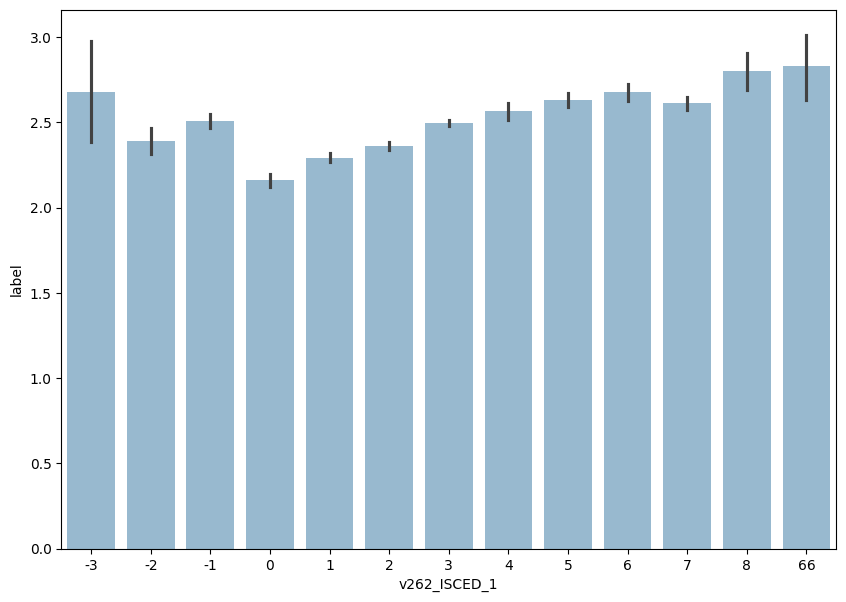

--------------------------------------------------
col: v262_r


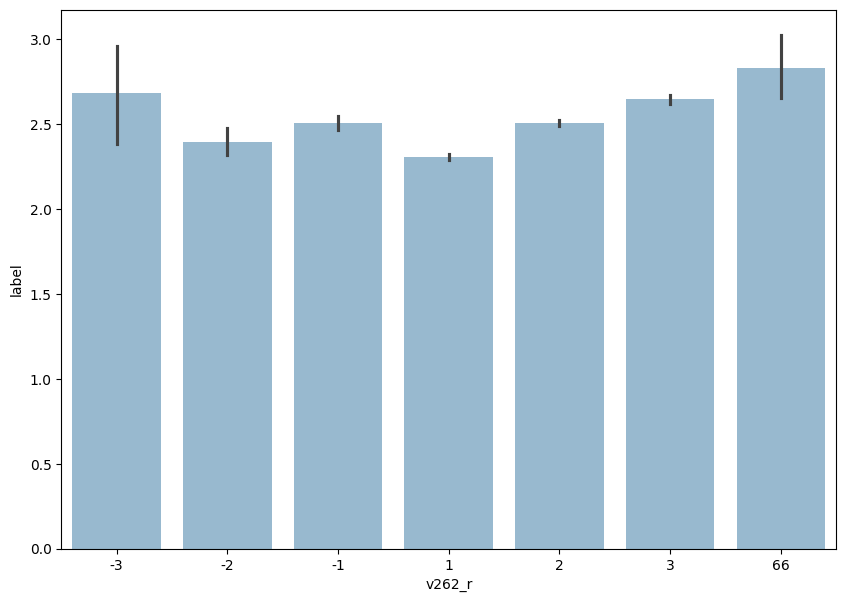

--------------------------------------------------
col: v262_cs


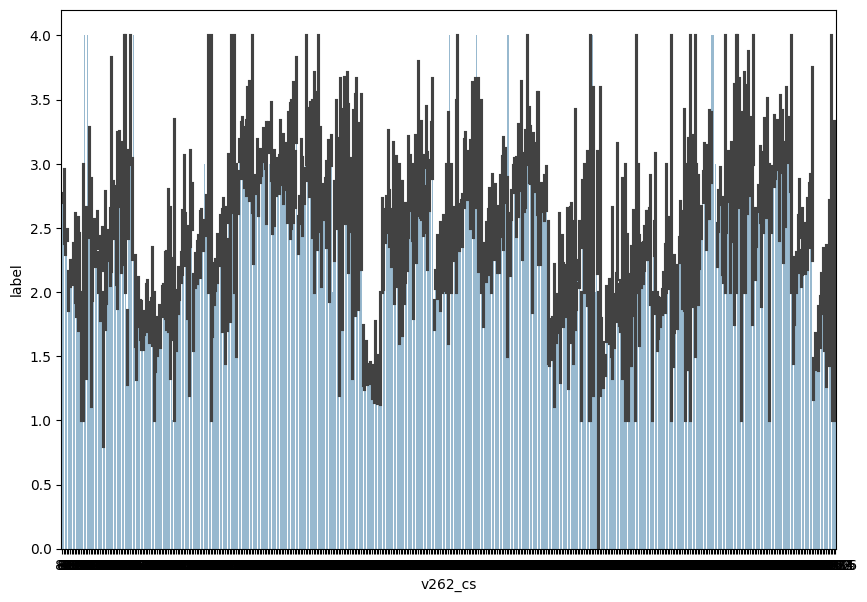

--------------------------------------------------
col: v263_ISCED_2


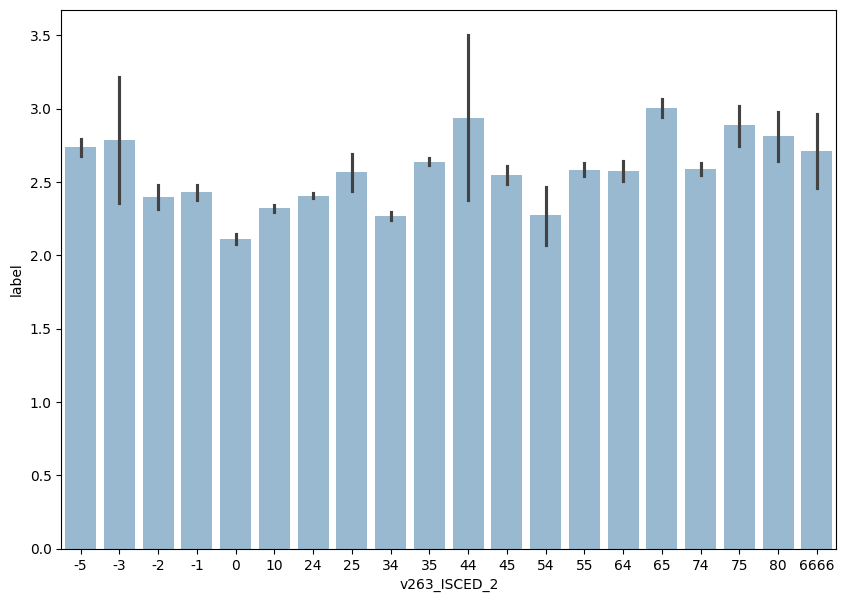

--------------------------------------------------
col: v263_ISCED_1


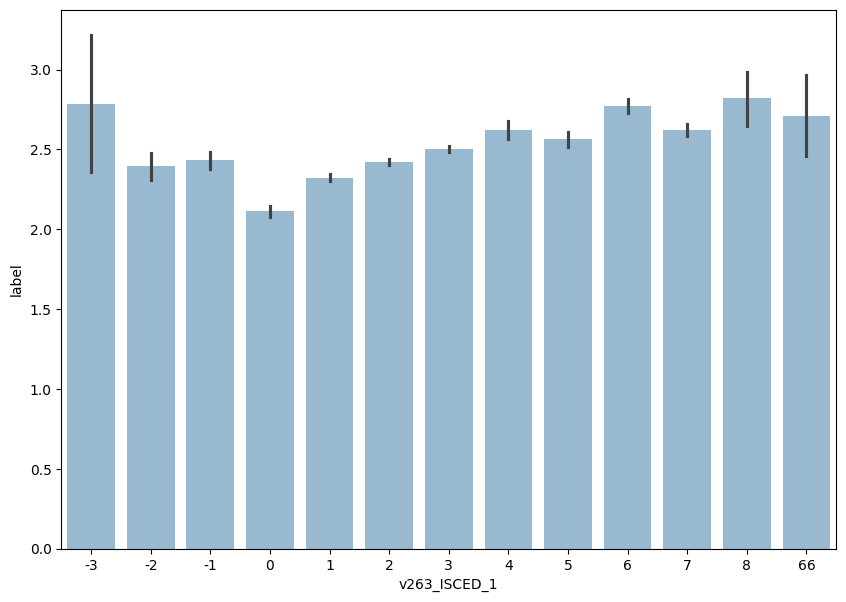

--------------------------------------------------
col: v263_r


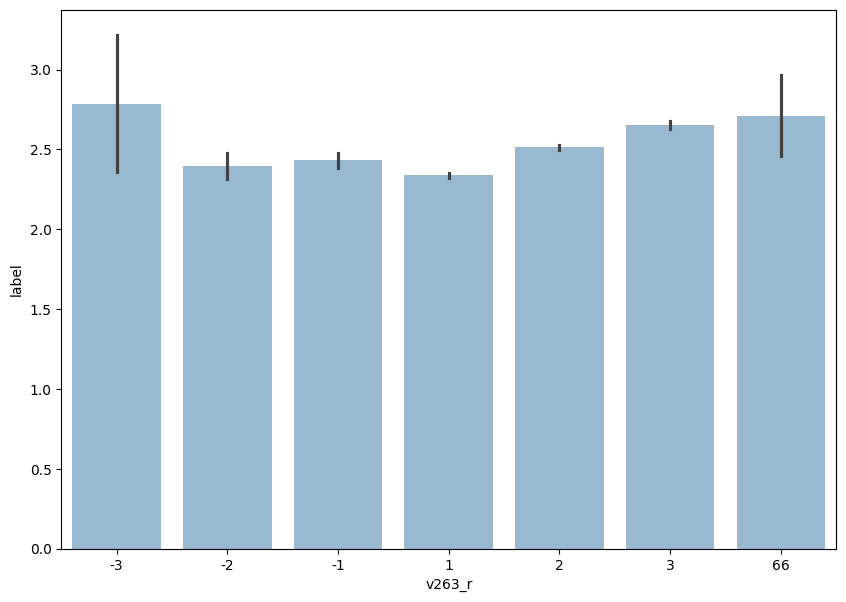

--------------------------------------------------
col: v263_cs


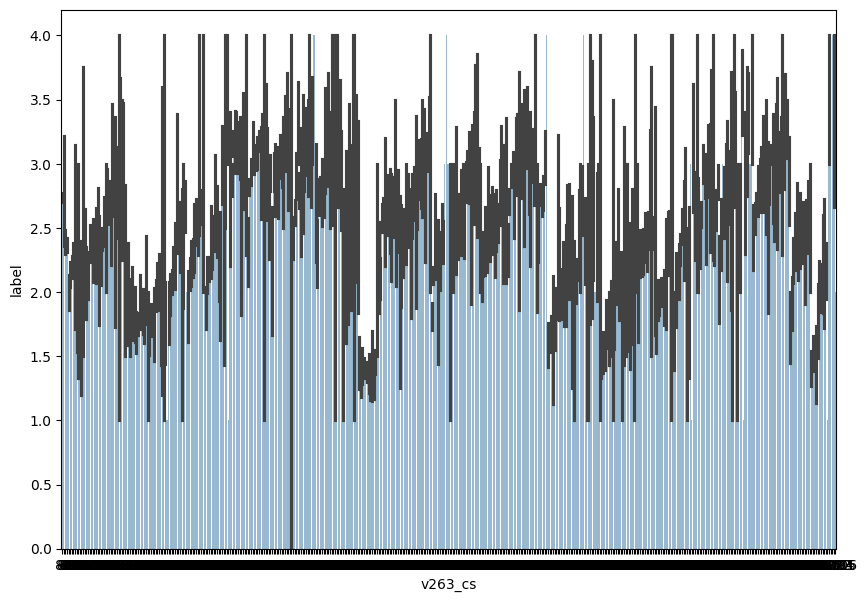

--------------------------------------------------
col: v264


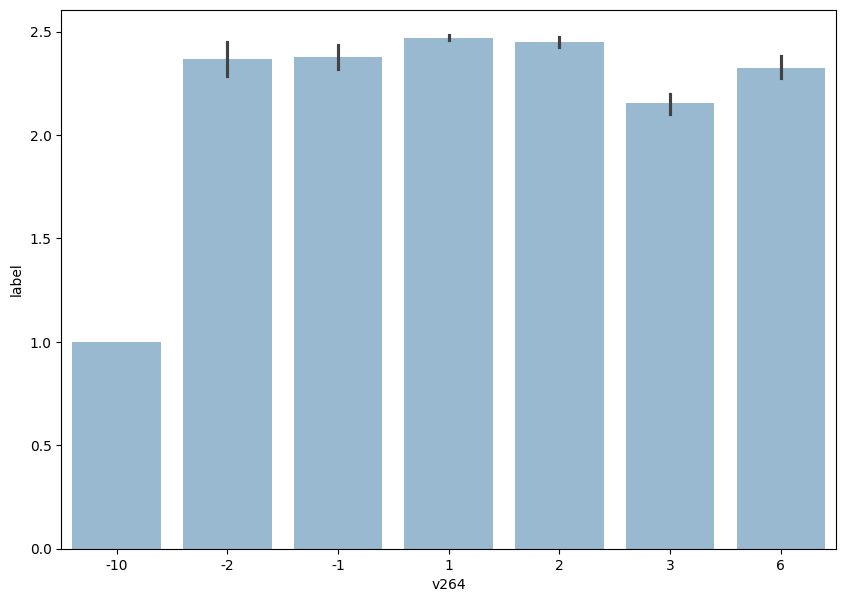

--------------------------------------------------
col: v265


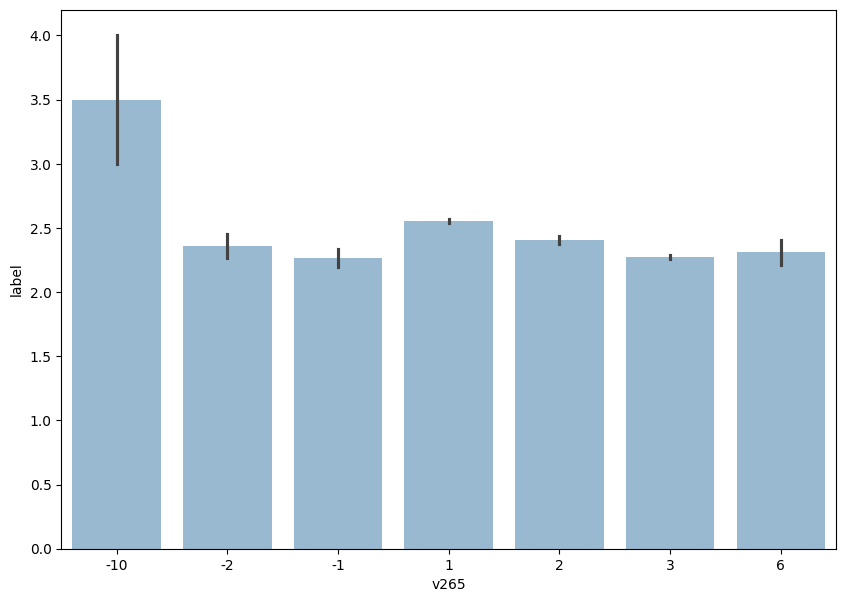

--------------------------------------------------
col: v266


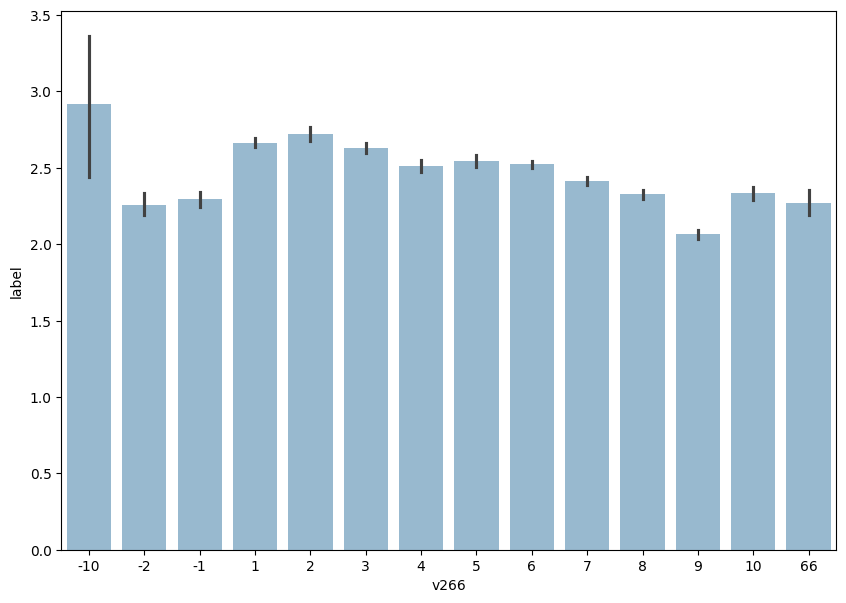

--------------------------------------------------
col: v267


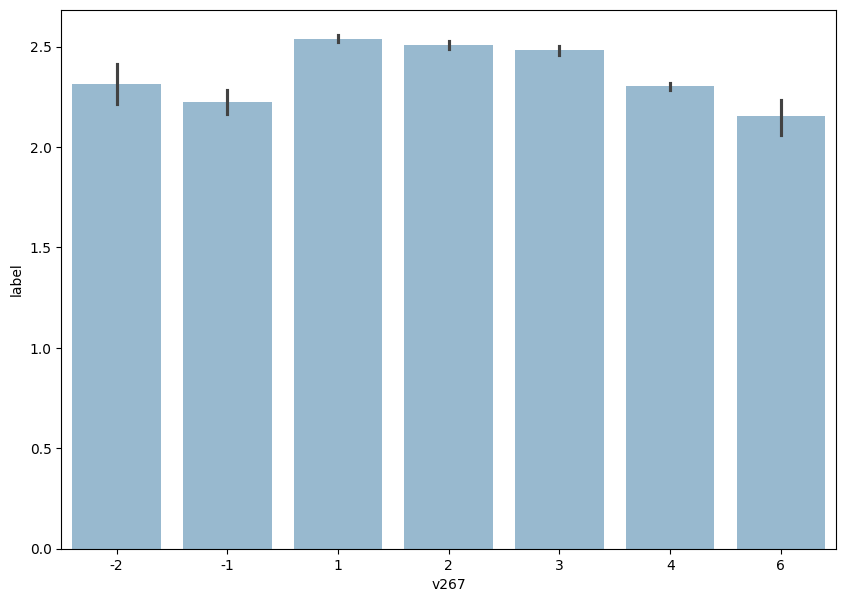

--------------------------------------------------
col: v268


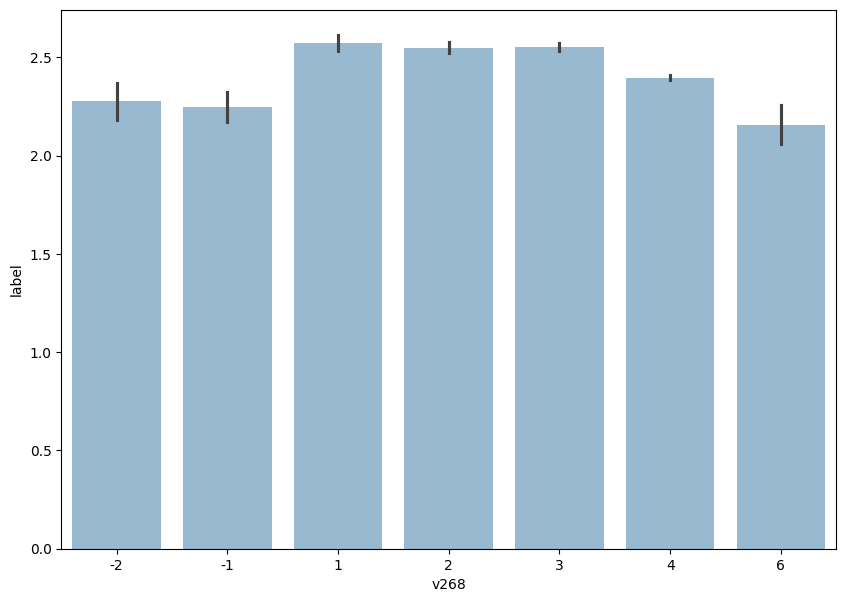

--------------------------------------------------
col: v269


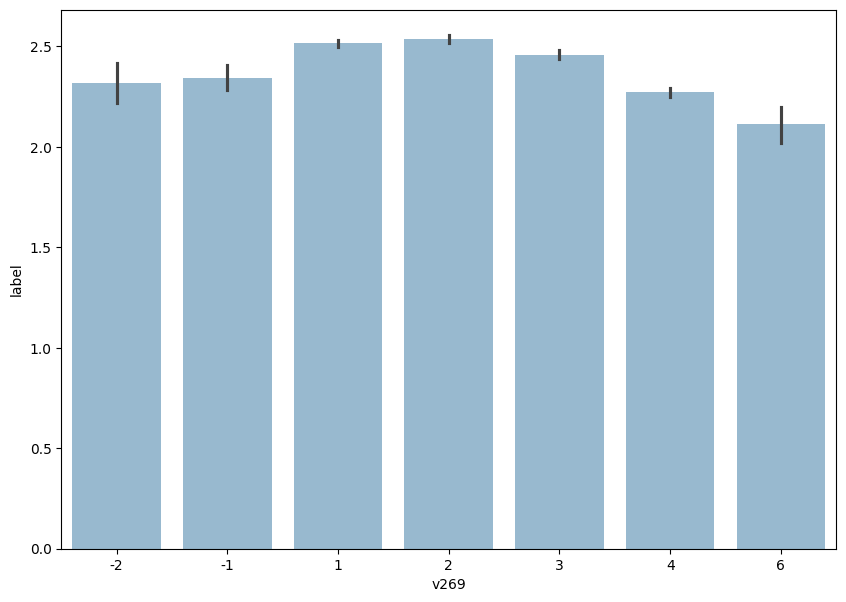

--------------------------------------------------
col: v270


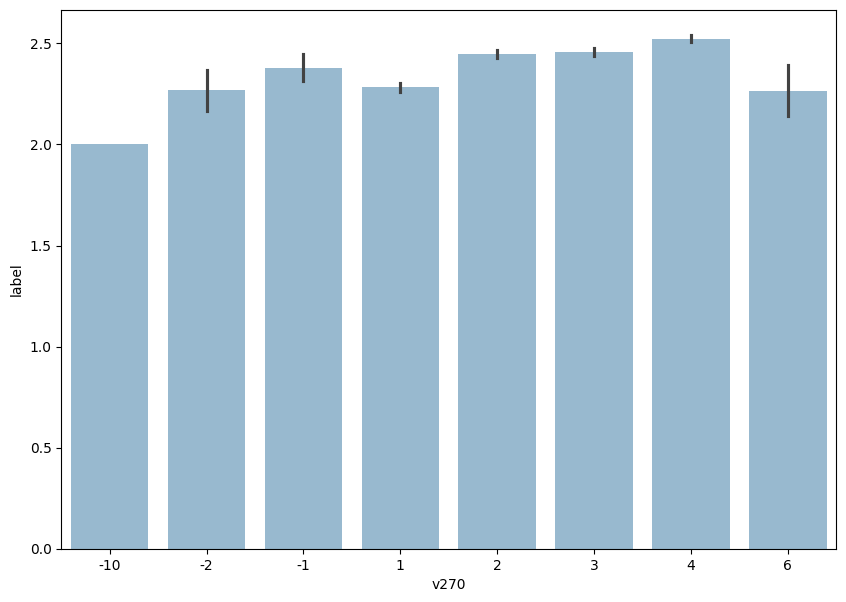

--------------------------------------------------
col: v271


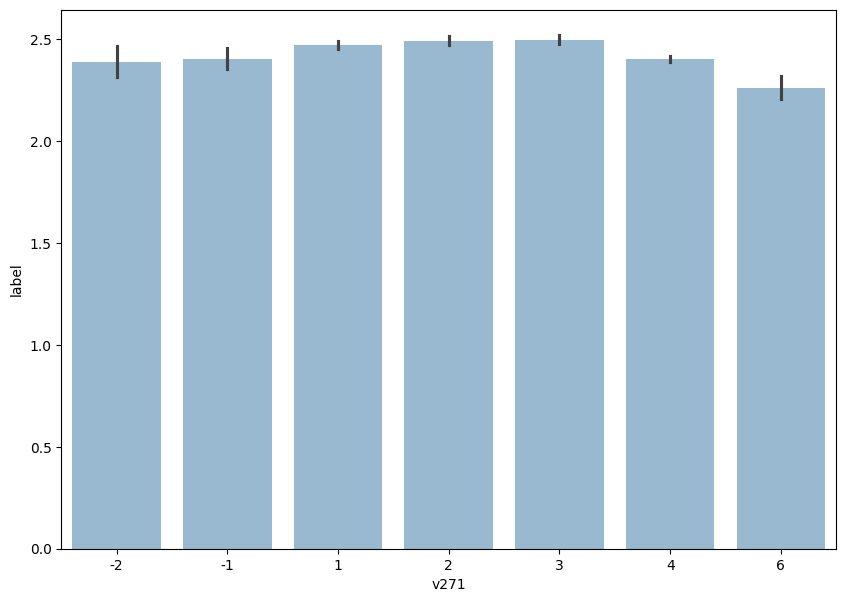

--------------------------------------------------
col: v272


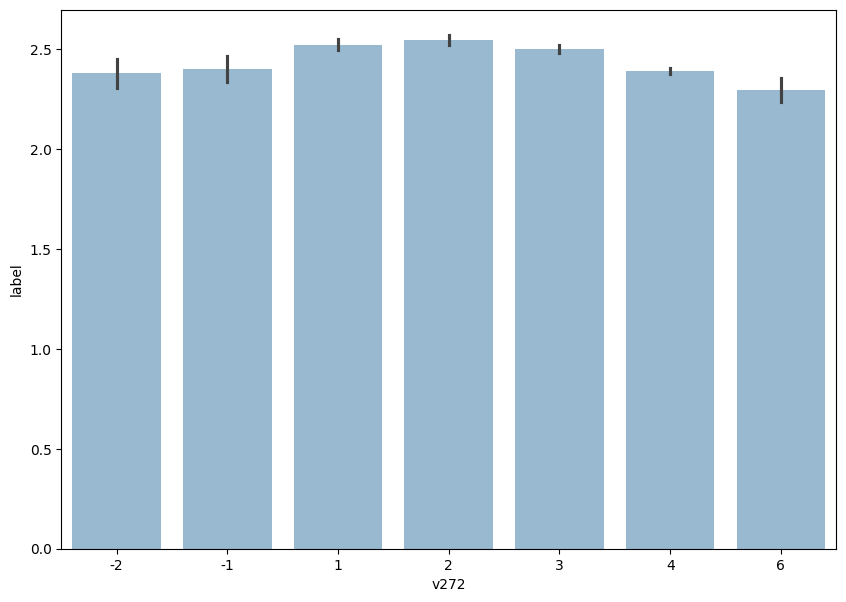

--------------------------------------------------
col: v273


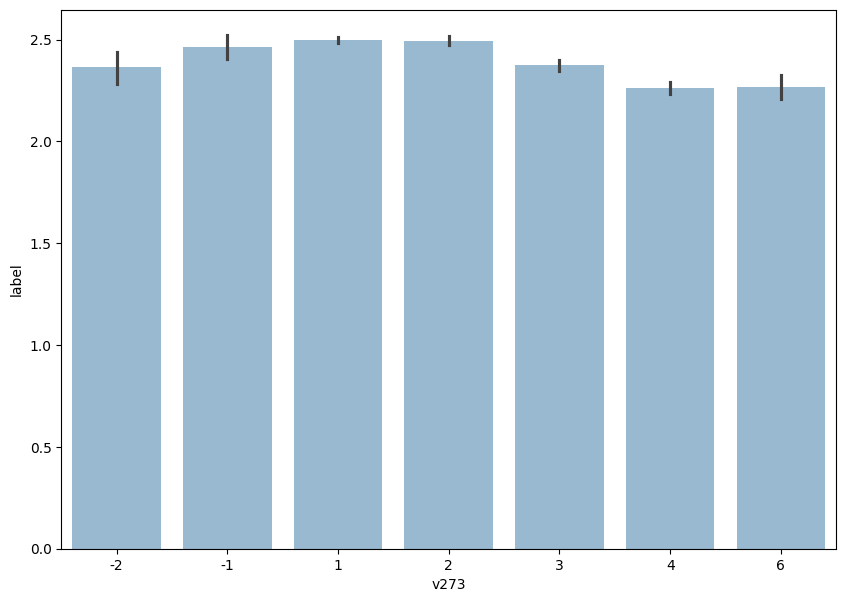

--------------------------------------------------
col: v274


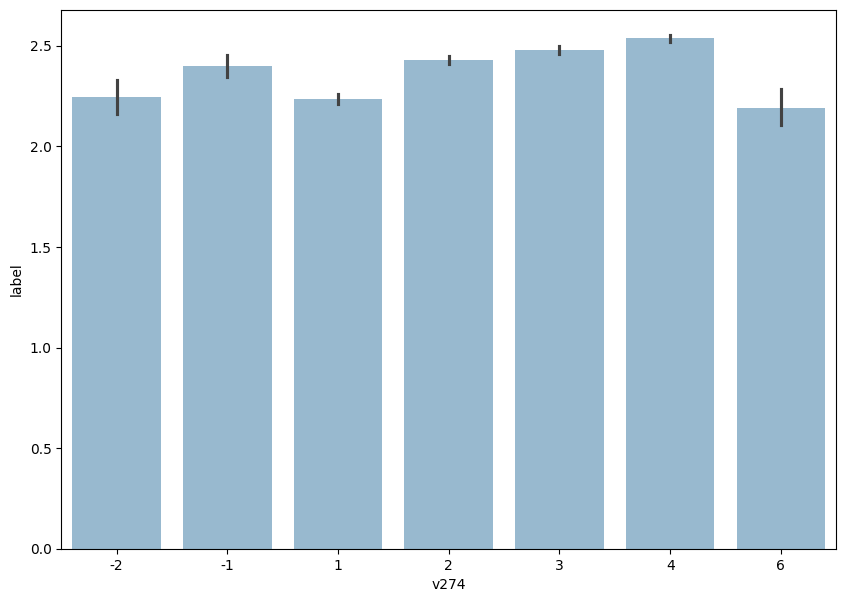

--------------------------------------------------
col: v276_r


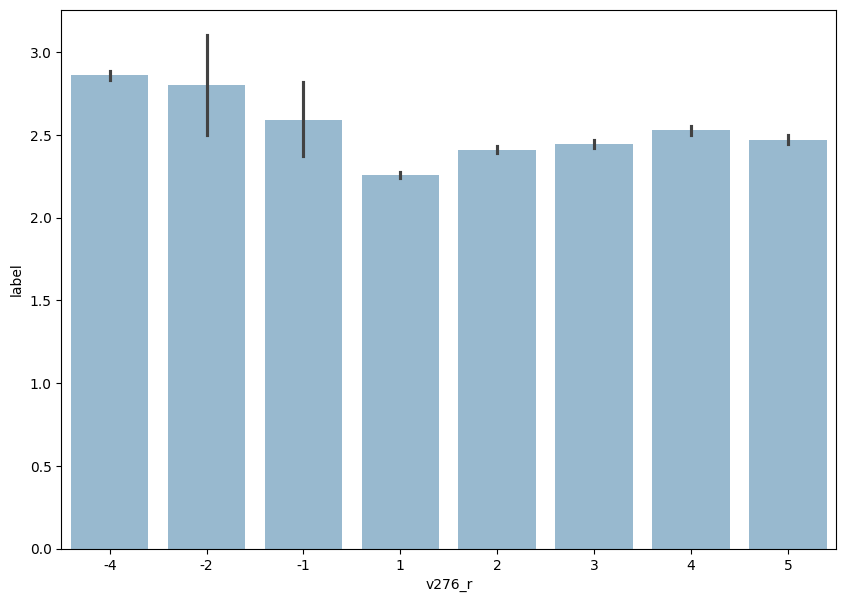

--------------------------------------------------
col: v277


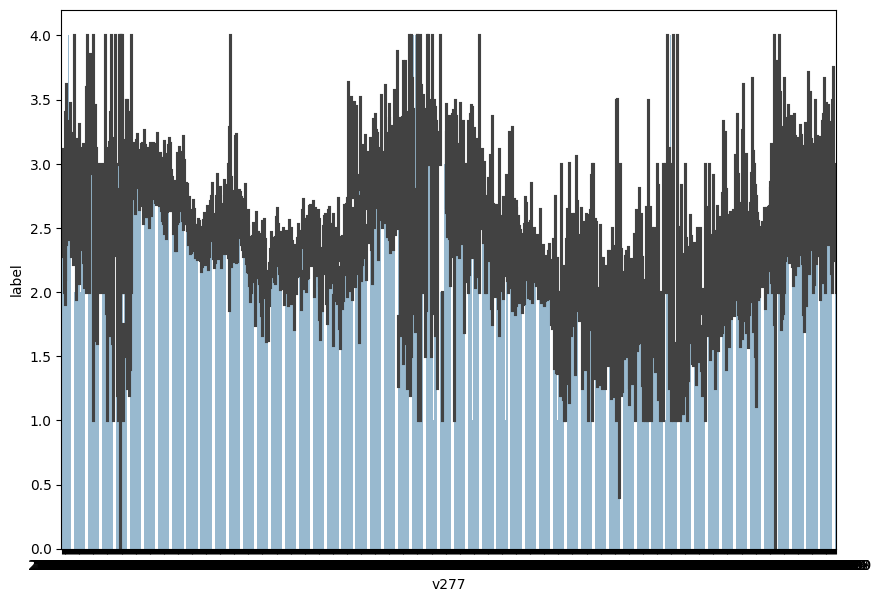

--------------------------------------------------
col: v278b


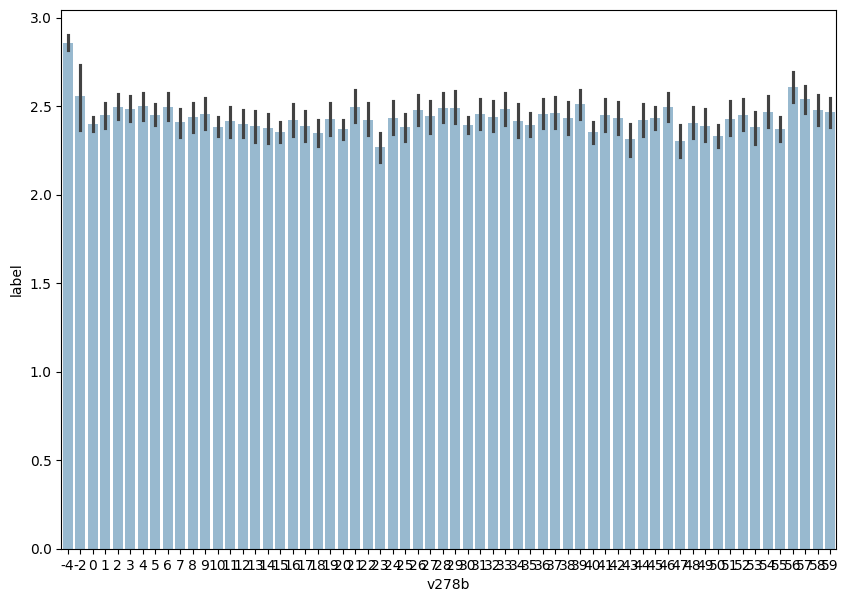

--------------------------------------------------
col: v279b


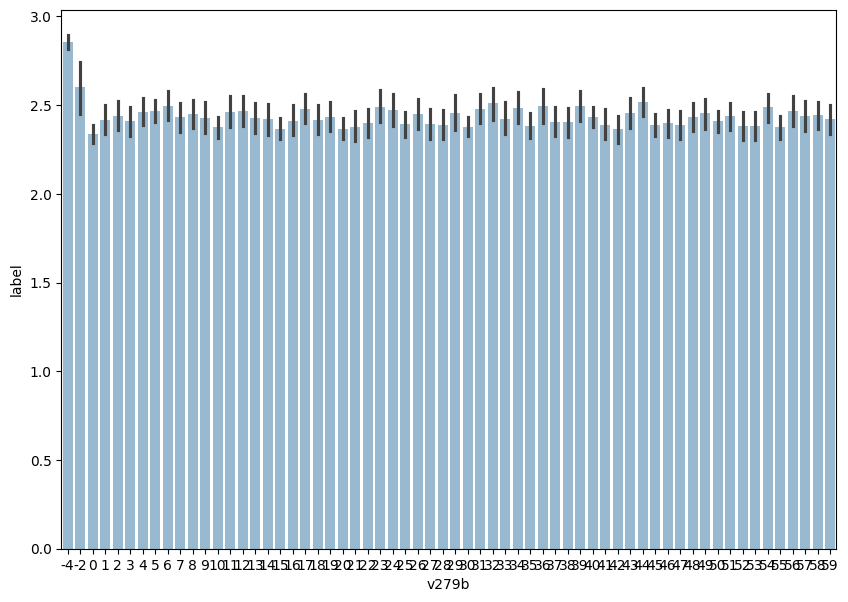

--------------------------------------------------
col: v279c_r


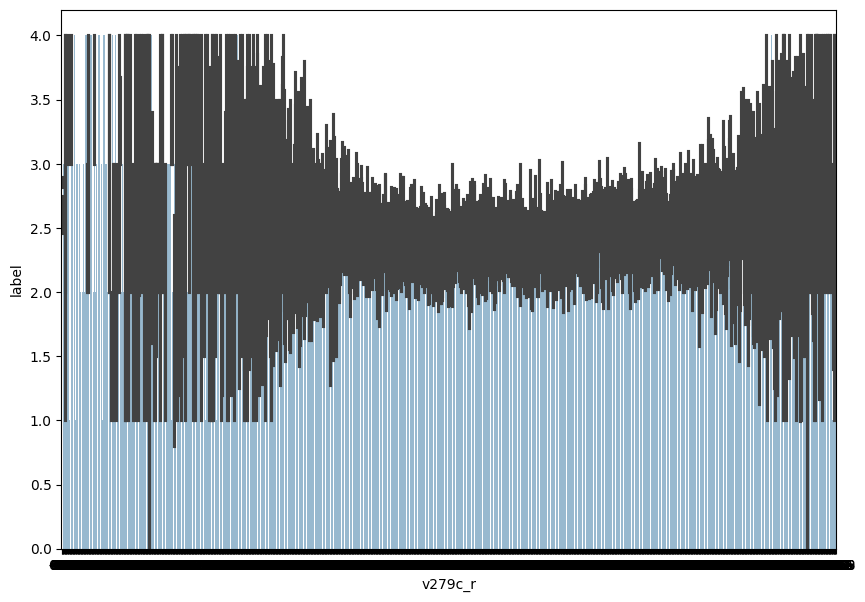

--------------------------------------------------
col: v279d_r


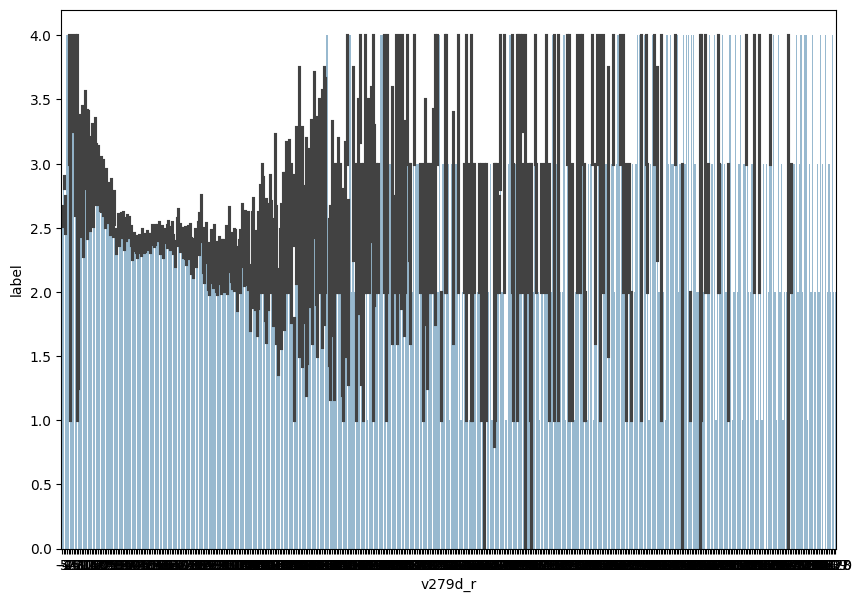

--------------------------------------------------
col: v280


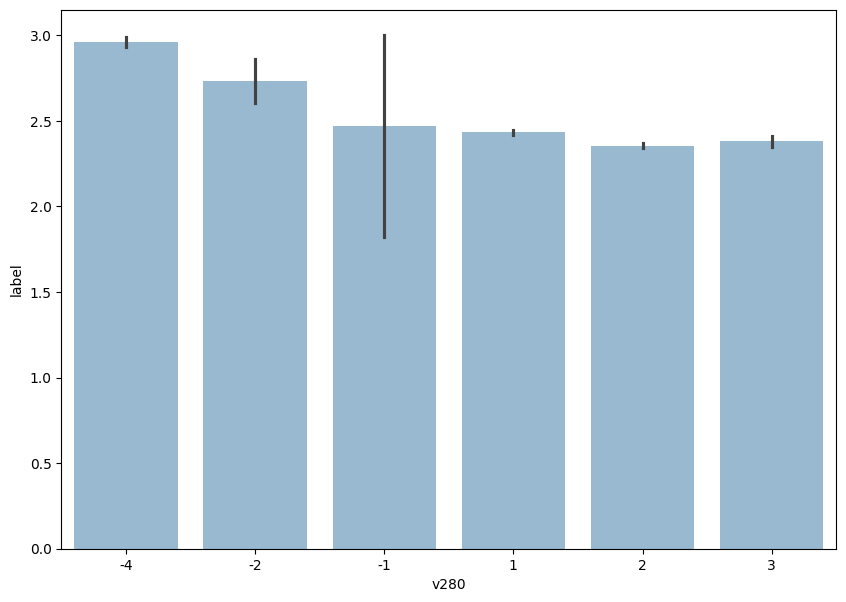

--------------------------------------------------
col: v281a_r


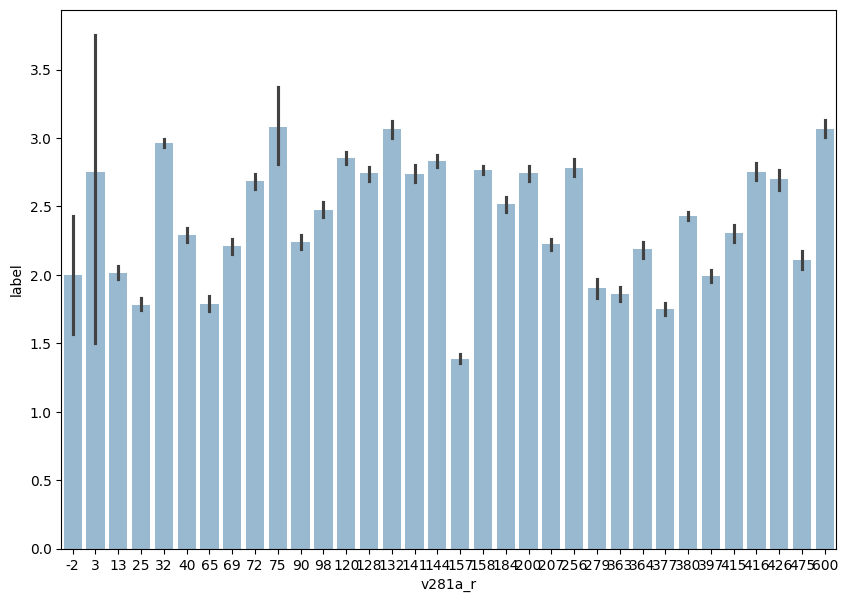

--------------------------------------------------
col: v282


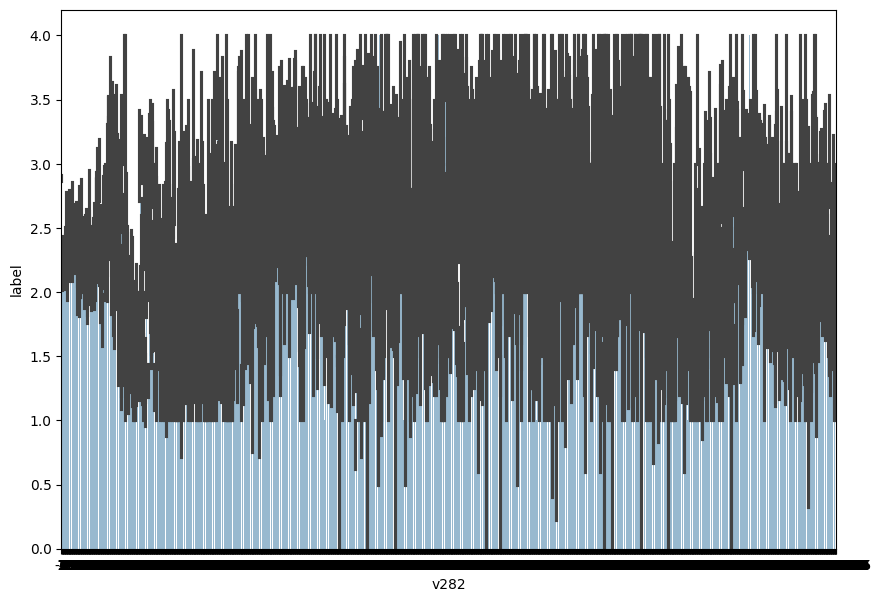

In [5]:
for col in df_train.columns:
    print('-'*50)
    print('col:', col)

    f, ax = plt.subplots(figsize=(10,7))
    sns.barplot(x=col, y= df_y['label'], data=df_train, alpha=0.5)
    plt.show()
